In [1]:
#packages needed
import os
import io
import numpy as np
import pandas as pd
import csv
import spacy
from spacy import displacy
from textblob import TextBlob
#from spacy import en_core_web_sm
import re
import scipy

import nltk


In [490]:
from lexicalrichness import LexicalRichness

In [470]:
import string

In [445]:
nlp = spacy.load("en_core_web_sm") 

In [392]:
stopwords = nltk.corpus.stopwords.words('english')

In [289]:
import matplotlib

In [189]:
import textstat

In [177]:
from textstat.textstat import textstatistics, easy_word_set, legacy_round
#https://www.geeksforgeeks.org/readability-index-pythonnlp/

In [2]:
os.chdir(r"D:\Virtual Machine Backup") # changing directory

In [5]:
# just a test for something I will use later 
string1 = "Original Label 1"
if "Original Label" in string1:
    print("yes")
    
print(string1[-1])

yes
1


# CNN

## Here I read the CNN output txt file
## It is quite messy, as will later be revealed, so it will be cleaned

In [15]:
# here I only will work out how many were misclassified
CNNMasterList = []
with open("VladsOutputCNN.txt", "r", errors='ignore') as file:
    TrecLines = file.readlines()
    
    
#     for line in TrecLines:
#         CNNSample = []
#         x = line.strip() # remove \n and \r if any
#         if "Original Label" in x:
#             CNNSample.append(x[-1])
#         if "Attack failed:Initial" in x:
#             CNNSample.append("WrongLabel")
#         if "Attack failed:Initial" not in x:
#             CNNSample.append("CorrectLabel")
#         CNNMasterList.append(CNNSample)
        
    #FirstLineCounter = True
    CNNSample = []
#     for line in TrecLines:
#             x = line.strip()
#             if FirstLineCounter:
#                 print("yesIgotin")
#                 CNNSample.append(x)
#                 FirstLineCounter = False
#             else:
#                 if "Original Label" not in x:
#                     CNNSample.append(x) 
#                 else: 
#                     CNNMasterList.append(CNNSample)
#                     CNNSample = []
#                     CNNSample.append(x)

    #OrigLabelCounter1 = 0
    #OrigLabelCounter2 = 0
    LineCount = 0
    for line in TrecLines:
            LineCount +=1
            
            x = line.strip()
            if LineCount < 5: print(x)
            
            if "Original Label" in x:
                if len(CNNSample) != 0: #because for the first line, cnnsample length is zero
                    CNNMasterList.append(CNNSample)
                    CNNSample = []
                    CNNSample.append(x)
            
            else:
                CNNSample.append(x)


print(len(CNNMasterList))


Original Label 1
Original words:
Hi, i've just updated from the gulus and I check on other mirrors. It seems there is a little typo in /debian/README file Example: http://gulus.usherbrooke.ca/debian/README ftp://ftp.fr.debian.org/debian/README "Testing, or lenny. Access this release through dists/testing. The current tested development snapshot is named etch. Packages which have been tested in unstable and passed automated tests propogate to this release." etch should be replace by lenny like in the README.html -- Yan Morin Consultant en logiciel libre yan.morin@savoirfairelinux.com 514-994-1556 -- To UNSUBSCRIBE, email to debian-mirrors-REQUEST@lists.debian.org with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org
Attack failed: Not enough valid neighbouring words
7637


In [16]:
print(CNNMasterList[1])

['Original Label 1', 'Original words:', 'Hi, i\'ve just updated from the gulus and I check on other mirrors. It seems there is a little typo in /debian/README file Example: http://gulus.usherbrooke.ca/debian/README ftp://ftp.fr.debian.org/debian/README "Testing, or lenny. Access this release through dists/testing. The current tested development snapshot is named etch. Packages which have been tested in unstable and passed automated tests propogate to this release." etch should be replace by lenny like in the README.html -- Yan Morin Consultant en logiciel libre yan.morin@savoirfairelinux.com 514-994-1556 -- To UNSUBSCRIBE, email to debian-mirrors-REQUEST@lists.debian.org with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org', 'Attack failed: Not enough valid neighbouring words', 'Finished Attacking This Sample, Please Proceed']


# Note, label of 0 is SPAM and label of 1 is HAM. In CNN output there were 5133 spam, 2504 ham. In LSTM output there were 5131 spam, 2504 ham.

In [18]:
Allpossiblelengths = []
#index = 0
for i in CNNMasterList:
    if len(i) not in Allpossiblelengths: Allpossiblelengths.append(len(i))
    
print(Allpossiblelengths)

[5, 9, 13, 7, 11, 4, 129, 29, 17, 31, 49, 35, 15, 21, 95, 27, 41, 39, 111, 19, 249, 23, 119, 437, 159, 33, 61, 59, 43, 45, 117, 37, 87, 153, 25, 369, 81, 97, 101, 53, 89, 77, 65, 109, 67, 69]


## These varying lengths show how messy each email recording was. I manually searched through it and found out the underlying cause was repeated printout of ChaNGed LaBEl YESSS as well as empty elements (as some lines were blank due to how I was printing to VladsOutputCNN and VladsOutputLSTM files from discrete_attack.py

In [ ]:
#so I can't use length to go over the list, I will need to search manually through it

In [21]:
for i in CNNMasterList:
    if len(i) == 9:
        print(i)

['Original Label 0', 'Original words:', '>Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ ---Òµ-----È«--Êµ-Õ½--Ñµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Î» Æ¡Å¡Ï¢Ü¡ Ê± 2007 413 - 14 +86 20 85 9 32 0 89 85 9 32 0 83 10ß£ æ£º+86 20 85 9 32 0 83 Ïµ Ë£Ð¡ Ð¡ Ñ¡Ã£2800Ôª/Ë£Ï·Ñ¡ÑµÑ¡ÍµÈ£ ó£º¸ÒµÎ»Ð¾ß¡Î¼Å¾×¨Ô±Èµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ñ½ÖªÊ¶ÃºÏ¢Ê±Ï¢Ñ³ÎªÊ²ÎªÒªÕ½Ô´ ÎªÏ¢ÒµÉ²Ö£ÎªÒ»Ï¢Ô´ÎªÒµÐºÍ¾ÓªÈ»î¶¯ ÊµÂ¼Ò»Ô¹Í¬Ê±ÎªÒµÍ¬Õ¹Ê²ÒµÈ¸ Ø·Ó¦ÐµÒªÃ¡æ·¶Ñ§ÄµÒµÃµÒ»Ô¹ ÒµÕ¹Í¬Ê±Ò»Ó¦Ë¾ÒµØµã¡¢Ö¹Ë¾æ·¶Ñ§Ë® Æ½ÄµÏµÊ¹ÃµÄ·Õ¹ÃºÒµÕ¹Ù¶È£ÎªË¾ÛºÒµÐ¾ Ä¿Õ¹ÒªÔ¹ÜºÍµÖ·Ò»Ä±Ø±Ã¡ ÒµÏ¢Ä¼Ù£Ï¢Î±×¼Í¹æ·¶? ÒµÇ·ÎªÒ»æ·¶ÄµÆ¶È¶Ò²×¼ Î´Â£ ÏµË¼ Î°Ë¾ÊµÒªÏ¢Æ½Ì¨ÎªÒµÚ¹Ü³Ô´ ÑµÎ³×¨Ç±Ð¾Ä¿Ç°ÒµØ½â£¬ÒµÒª Ô±ÊµÒªÖ´Òµ×´Ò»Ö®Ð§Ä¹ì·¨ È½Ê½ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ù£ 900-12001330-530 Ò»Î½È·ÒµÊ¶ 1Òµ,ÒµÖ±Î³É²æ±¸ÒµÄ¼ 2ÒµÊ¶Ð¸Ô»Øµ 3Ö°ÜµÄ¿ê¶¨Î» 4ÒµÊ¶Ï¹ÒµÄµÉ· ÒµÄµÖ´ 1ÒµÄµÄ²ë´« 2Ê±Úµ

In [ ]:
## Here I remove mul;tiple occurences of ChaNGed LaBEl YESSS

In [37]:
NewCNNMasterWithoutEmptyElements = []
#index = 0
for i in CNNMasterList:
    #NewCNNMasterWithoutEmptyElements.append(i)
    #for j in NewCNNMasterWithoutEmptyElements[index]:
    EachSample = []
    ChangedLabel = 0
    for j in i:
        #if "" in j: NewCNNMasterWithoutEmptyElements[index].remove('')
        if j != "" and ("Finished Attacking This Sample" not in j): 
            if j == 'ChaNGed LaBEl YESSS':
                ChangedLabel += 1
                # i do this because ChaNGed LaBEl YESSS sometimes was printed over 10+ times
                if ChangedLabel == 1: EachSample.append(j) 
            else: EachSample.append(j)
        
    NewCNNMasterWithoutEmptyElements.append(EachSample)
    #index +=1

print(len(NewCNNMasterWithoutEmptyElements))

7637


In [38]:
Allpossiblelengths2 = []
#index = 0
for i in NewCNNMasterWithoutEmptyElements:
    if len(i) not in Allpossiblelengths2: Allpossiblelengths2.append(len(i))
    
print(Allpossiblelengths2)

[4, 7, 6, 5]


In [ ]:
# this shows ChaNGed LaBEl YESSS was the cause as the lengths of 4,6,7 and 5 are what was expected. Lengths
# of 4 and 5 signal failed attack executions. length of 6 signals the email was perturbed but it did not cause
# misclassificatio. length 7 is email was perturbed and caused misclassification

In [42]:
countr = 0
for i in NewCNNMasterWithoutEmptyElements:
    if len(i) == 7: 
        countr+= 1
        if countr<5 : print(i)

['Original Label 0', 'Original words:', '>Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ ---Òµ-----È«--Êµ-Õ½--Ñµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Î» Æ¡Å¡Ï¢Ü¡ Ê± 2007 413 - 14 +86 20 85 9 32 0 89 85 9 32 0 83 10ß£ æ£º+86 20 85 9 32 0 83 Ïµ Ë£Ð¡ Ð¡ Ñ¡Ã£2800Ôª/Ë£Ï·Ñ¡ÑµÑ¡ÍµÈ£ ó£º¸ÒµÎ»Ð¾ß¡Î¼Å¾×¨Ô±Èµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ñ½ÖªÊ¶ÃºÏ¢Ê±Ï¢Ñ³ÎªÊ²ÎªÒªÕ½Ô´ ÎªÏ¢ÒµÉ²Ö£ÎªÒ»Ï¢Ô´ÎªÒµÐºÍ¾ÓªÈ»î¶¯ ÊµÂ¼Ò»Ô¹Í¬Ê±ÎªÒµÍ¬Õ¹Ê²ÒµÈ¸ Ø·Ó¦ÐµÒªÃ¡æ·¶Ñ§ÄµÒµÃµÒ»Ô¹ ÒµÕ¹Í¬Ê±Ò»Ó¦Ë¾ÒµØµã¡¢Ö¹Ë¾æ·¶Ñ§Ë® Æ½ÄµÏµÊ¹ÃµÄ·Õ¹ÃºÒµÕ¹Ù¶È£ÎªË¾ÛºÒµÐ¾ Ä¿Õ¹ÒªÔ¹ÜºÍµÖ·Ò»Ä±Ø±Ã¡ ÒµÏ¢Ä¼Ù£Ï¢Î±×¼Í¹æ·¶? ÒµÇ·ÎªÒ»æ·¶ÄµÆ¶È¶Ò²×¼ Î´Â£ ÏµË¼ Î°Ë¾ÊµÒªÏ¢Æ½Ì¨ÎªÒµÚ¹Ü³Ô´ ÑµÎ³×¨Ç±Ð¾Ä¿Ç°ÒµØ½â£¬ÒµÒª Ô±ÊµÒªÖ´Òµ×´Ò»Ö®Ð§Ä¹ì·¨ È½Ê½ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ù£ 900-12001330-530 Ò»Î½È·ÒµÊ¶ 1Òµ,ÒµÖ±Î³É²æ±¸ÒµÄ¼ 2ÒµÊ¶Ð¸Ô»Øµ 3Ö°ÜµÄ¿ê¶¨Î» 4ÒµÊ¶Ï¹ÒµÄµÉ· ÒµÄµÖ´ 1ÒµÄµÄ²ë´« 2Ê±Úµ

In [ ]:
# I know want to work out how many emails were intially predicted wrong by the WCNN model

In [54]:
BadLabel = []
#countr = 0
for i in NewCNNMasterWithoutEmptyElements:
    IndividSample = []
    for j in i:
        if "Attack failed" in i[-1]:
            IndividSample.append(i[0])
            IndividSample.append(i[-1])
            break
    if len(IndividSample) > 0: BadLabel.append(IndividSample)
print(len(BadLabel))

6516


In [55]:
TwoErrorsList = []
for i in BadLabel:
    if i[-1] not in TwoErrorsList: TwoErrorsList.append(i[-1])
        
print(TwoErrorsList)

['Attack failed: Not enough valid neighbouring words', 'Attack failed:Initial predicted label was wrong']


In [56]:
print(BadLabel[1])

['Original Label 1', 'Attack failed: Not enough valid neighbouring words']


In [59]:
SpamMisclassified = 0
HamMisclassified = 0

for i in BadLabel:
    #NB 0 is spam and 1 is ham
    if (i[0] == "Original Label 0") and (i[-1] == "Attack failed:Initial predicted label was wrong"):
        SpamMisclassified +=1
    if (i[0] == "Original Label 1") and (i[-1] == "Attack failed:Initial predicted label was wrong"):
        HamMisclassified +=1
print(SpamMisclassified)
print(HamMisclassified)

13
50


In [ ]:
## 13 spam and 50 ham were initially wrongly classified (so the attack was not executed on these samples)

In [ ]:
## working out how the number of emails perturbed 

In [148]:
NumWordsChanged = []
Misclassify = []
for i in NewCNNMasterWithoutEmptyElements:
    jIndex = 0
    MiniList = []
    MiniList2 = []
    for j in i:
        if "NuMBer WoRds ChaNGed " in j:
            if "NuMBer WoRds ChaNGed 0" not in j: # because on 48 occasions no words were changed at all
                if (i[0] == "Original Label 0"): 
                    MiniList.append("Spam")
                    MiniList2.append("Spam")
                    Splitj = i[jIndex].split()
                    MiniList.append(int(Splitj[-1]))
                    if 'ChaNGed LaBEl YESSS' in i:
                        MiniList2.append("Yes")
                    else: MiniList2.append("No")
                else: 
                    MiniList.append("Ham")
                    MiniList2.append("Ham")
                    Splitj = i[jIndex].split()
                    MiniList.append(int(Splitj[-1]))
                    if 'ChaNGed LaBEl YESSS' in i:
                        MiniList2.append("Yes")
                    else: MiniList2.append("No")
            #NumWordsChanged.append(i[jIndex])
        jIndex +=1
     
    if len(MiniList) != 0: NumWordsChanged.append(MiniList)
    if len(MiniList2) != 0: Misclassify.append(MiniList2)

In [149]:
#list length should be 1073
print(len(NumWordsChanged))

1073


In [150]:
print(NumWordsChanged[1])

['Spam', 31]


In [154]:
print(len(Misclassify))

1073


In [155]:
print(Misclassify[1])

['Spam', 'Yes']


In [95]:
# preparations for making a violin plot
LabelListForCNNViolPlot = []
NumChangedListForCNNViolPlot = []
MisclassifyListForCNNViolPlot = []
for i in Misclassify:
    LabelListForCNNViolPlot.append(i[0])
    MisclassifyListForCNNViolPlot.append(i[1])
for i in NumWordsChanged:
    NumChangedListForCNNViolPlot.append(i[1])

CNNViolPlotDict = {
    "Original Label": LabelListForCNNViolPlot,
    "Misclassify": MisclassifyListForCNNViolPlot,
    "Number of Words Changed": NumChangedListForCNNViolPlot
}

CNNViolDF = pd.DataFrame(CNNViolPlotDict)

In [100]:
indexForThis = 0
listofLessthanzero = []
for i in NumChangedListForCNNViolPlot:
    if i < 0: listofLessthanzero.append(i)
    indexForThis +=1
print(len(listofLessthanzero))

0


In [96]:
import seaborn as sns

In [97]:
sns.set(style="whitegrid")

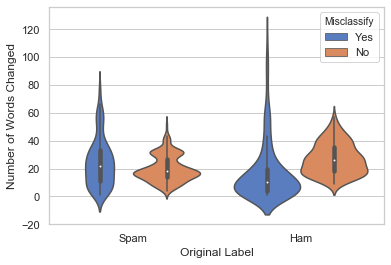

In [99]:
# ax = sns.violinplot(x="Original Label", y="Number of Words Changed", hue="Misclassify",

#                     data=CNNViolDF, palette="muted", split=True)
ax = sns.violinplot(x="Original Label", y="Number of Words Changed", hue="Misclassify",

                    data=CNNViolDF, palette="muted")

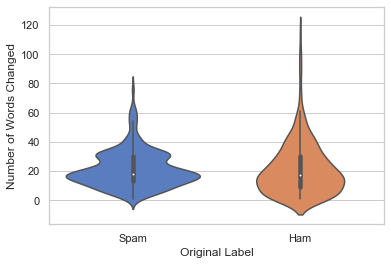

In [101]:
ax = sns.violinplot(x="Original Label", y="Number of Words Changed", 

                    data=CNNViolDF, palette="muted")

In [92]:
SpamNumMisclassify = 0
HamNumMisclassify = 0
countr = 0
for i in Misclassify:
        countr+=1
    #for j in i:
        if countr < 5: print(i)
        if i[0] == "Spam":
            if i[1] == "Yes":
                SpamNumMisclassify +=1
        elif i[0] == "Ham":
            if i[1] == "Yes":
                HamNumMisclassify +=1
print(SpamNumMisclassify) # reveals how many perturbed spam emails caused misclassification
print(HamNumMisclassify)# reveals how many perturbed ham emails caused misclassification

['Spam', 'Yes']
['Spam', 'Yes']
['Ham', 'Yes']
['Ham', 'No']
207
244


In [156]:
print(Misclassify[0:5])

[['Spam', 'Yes'], ['Spam', 'Yes'], ['Ham', 'Yes'], ['Ham', 'No'], ['Spam', 'Yes']]


### here I will gather the number of perturbed words into a list which has [email label, Misclassify?, num words perturbed]

In [160]:
SpamNumChangedWords = []
HamNumChangedWords = []

NewMisclassifyList = []
MisclassifyIndex = 0
for i in NumWordsChanged:
    ListToAddtoNewMisclassify =[]
    TheClassifyElement = Misclassify[MisclassifyIndex]
    #print(TheClassifyElement)
    ListToAddtoNewMisclassify.append(TheClassifyElement[0])
    
    ListToAddtoNewMisclassify.append(TheClassifyElement[1])
    if i[0] == "Spam":
        SpamNumChangedWords.append(i[1])
    else:
        HamNumChangedWords.append(i[1])
    ListToAddtoNewMisclassify.append(i[1])
    NewMisclassifyList.append(ListToAddtoNewMisclassify)
#     ItemInMisclassify = Misclassify[MisclassifyIndex]
#     ItemInMisclassify2 = ItemInMisclassify.append(i)
#     NewMisclassifyList.append(ItemInMisclassify2)
    MisclassifyIndex+=1
print(len(SpamNumChangedWords))
print(len(HamNumChangedWords))
print(len(NewMisclassifyList))
print(NewMisclassifyList[0:5])

642
431
1073
[['Spam', 'Yes', 3], ['Spam', 'Yes', 31], ['Ham', 'Yes', 16], ['Ham', 'No', 36], ['Spam', 'Yes', 10]]


In [162]:
# working out number of words and average words by different scenarios:-
#(misclassfied/classified correctly)
#SPAM/HAM
#perturbed Spam that caused misclassification
#perturbed ham hat caused misclassification
#perturbed spam that did not cause misclassification
#perturbed ham that did not cause misclassification
MisclassifyYes = []
MisclassifyNo = []

MisclassifyYesOrigSpam =[]
MisclassifyYesOrigHam =[]

MisclassifyNoOrigSpam =[]
MisclassifyNoOrigHam =[]

for i in NewMisclassifyList:
    if i[0] == "Spam":
        if i[1] == "Yes":
            MisclassifyYes.append(i[2])
            MisclassifyYesOrigSpam.append(i[2])
        else:
            MisclassifyNo.append(i[2])
            MisclassifyNoOrigSpam.append(i[2])
        
    else:
        if i[1] == "Yes":
            MisclassifyYes.append(i[2])
            MisclassifyYesOrigHam.append(i[2])
        else:
            MisclassifyNo.append(i[2])
            MisclassifyNoOrigHam.append(i[2])
        
print(len(MisclassifyYes)) # should be 451
print(len(MisclassifyNo)) #should be 622
print(len(MisclassifyYesOrigSpam)) # should be 207
print(len(MisclassifyYesOrigHam))# should be 244
print(len(MisclassifyNoOrigSpam))# should be 435
print(len(MisclassifyNoOrigHam))# should be 187

451
622
207
244
435
187


### Calculating means and standard deviations for perturbations per email under the scenarios defined above

In [163]:
x = statistics.mean(MisclassifyYes)
print(x)
a = statistics.stdev(MisclassifyYes)
print(a)

20.558758314855876
19.658370730763146


In [164]:
x = statistics.mean(MisclassifyNo)
print(x)
a = statistics.stdev(MisclassifyNo)
print(a)

22.138263665594856
10.3799097825082


In [165]:

x = statistics.mean(MisclassifyYesOrigSpam)
print(x)
a = statistics.stdev(MisclassifyYesOrigSpam)
print(a)

24.458937198067634
17.245148602470188


In [166]:

x = statistics.mean(MisclassifyYesOrigHam)
print(x)
a = statistics.stdev(MisclassifyYesOrigHam)
print(a)

17.25
20.966340848122993


In [167]:
x = statistics.mean(MisclassifyNoOrigSpam)
print(x)
a = statistics.stdev(MisclassifyNoOrigSpam)
print(a)

20.06206896551724
9.303302537584806


In [168]:
x = statistics.mean(MisclassifyNoOrigHam)
print(x)
a = statistics.stdev(MisclassifyNoOrigHam)
print(a)

26.967914438502675
11.146099054004146


In [157]:
print(SpamNumChangedWords[0])

3


In [145]:
# the total number of words changed, also disaggregated by ham and spam
TotalNumChangedWords = 0
ChangedWithinSpam = 0
ChangedWithinHam = 0
for i in SpamNumChangedWords:
    TotalNumChangedWords+= i
    ChangedWithinSpam+=i
for i in HamNumChangedWords:
    TotalNumChangedWords+= i
    ChangedWithinHam+=i
print(TotalNumChangedWords)
print(ChangedWithinSpam)
print(ChangedWithinHam)

23042
13790
9252


In [72]:
import statistics

In [74]:
print("this is for spam")
x = statistics.mean(SpamNumChangedWords)
print(x)

y = statistics.median(SpamNumChangedWords)
print(y)

z = statistics.mode(SpamNumChangedWords)
print(z)

a = statistics.stdev(SpamNumChangedWords)
print(a)

b = statistics.variance(SpamNumChangedWords)
print(b)

this is for spam
21.4797507788162
18.0
32
12.58594396877794
158.40598558521782


In [75]:
print("this is for ham")
x = statistics.mean(HamNumChangedWords)
print(x)

y = statistics.median(HamNumChangedWords)
print(y)

z = statistics.mode(HamNumChangedWords)
print(z)

a = statistics.stdev(HamNumChangedWords)
print(a)

b = statistics.variance(HamNumChangedWords)
print(b)

this is for ham
21.466357308584687
17
1
18.03905724996133
325.4075864673825


# Working out the average word length and syllabes per perturbed word

## First I construct a list that will be as follows:-
## [original word, perturbed word, original label, causedMisclassification?]

In [327]:
OrigPerturbPairList = []

iCountr=0

for i in NewCNNMasterWithoutEmptyElements:
    
    #PairList = []
    iCountr+=1
    
    if "NuMBer WoRds ChaNGed " in i[-1]:
        if "NuMBer WoRds ChaNGed 0" not in i[-1]:
            LabelMisclassifyList = []
            if (i[0] == "Original Label 0"): LabelMisclassifyList.append("Spam")
            else: LabelMisclassifyList.append("Ham")
            
            if 'ChaNGed LaBEl YESSS' in i: LabelMisclassifyList.append("Yes")
            else: LabelMisclassifyList.append("No")
            
            OriginalWords = i[2].split()
            PerturbWords = i[-2].split()
            WordIndex = 0
            for word in OriginalWords:
                
                # this means the words are clearly different so need to add to list
                PerturbWord = PerturbWords[WordIndex]
                if len(word) != len(PerturbWord):
                    PairList = []
                    PairList.append(word)
                    PairList.append(PerturbWords[WordIndex])
                    PairList2 = PairList + LabelMisclassifyList
                                      
                    OrigPerturbPairList.append(PairList2)
                    if iCountr < 5: print(PairList2)
                #if the words are the same length
                else:
                    
                    CharIndex = 0
                    for character in word:
                        
                        if character != PerturbWord[CharIndex]:
                            PairList = []
                            PairList.append(word)
                            PairList.append(PerturbWords[WordIndex])
                            PairList2 = PairList + LabelMisclassifyList
                            OrigPerturbPairList.append(PairList2)
                            if iCountr < 5: print(PairList2)
                            break
                        
                        CharIndex +=1 
                        
                
                
                WordIndex +=1
    
print(len(OrigPerturbPairList))

23042


In [142]:
print(OrigPerturbPairList[1])

['9', '21.00', 'Spam', 'Yes']


In [169]:
# for conversion into a dataframe
OrigWordList = []
PerturbWordList = []
OrigLabelList = []
Misclassifylabellist = []


for i in OrigPerturbPairList:
    OrigWordList.append(i[0])
    PerturbWordList.append(i[1])
    OrigLabelList.append(i[2])
    Misclassifylabellist.append(i[3])
    
OrigPerturbPairDict = {
    "OriginalWord": OrigWordList,
    "PerturbWord": PerturbWordList,
    "OriginalLabel": OrigLabelList,
    "Misclassify": Misclassifylabellist
}

OrigPerturbPairDF = pd.DataFrame(OrigPerturbPairDict)

In [170]:
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify
0          +86            +27          Spam         Yes
1            9          21.00          Spam         Yes
2            3             3.          Spam         Yes
3      unknown    unspecified          Spam         Yes
4      removed        deleted          Spam         Yes
5      showing        proving          Spam         Yes
6          per           into          Spam         Yes
7        label         emblem          Spam         Yes
8      manager  administrator          Spam         Yes
9         town           city          Spam         Yes

In [171]:
# adding a column for length of original word
OrigPerturbPairDF["LengthOrig"] = OrigPerturbPairDF["OriginalWord"].apply(lambda x: len(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig
0          +86            +27          Spam         Yes           3
1            9          21.00          Spam         Yes           1
2            3             3.          Spam         Yes           1
3      unknown    unspecified          Spam         Yes           7
4      removed        deleted          Spam         Yes           7
5      showing        proving          Spam         Yes           7
6          per           into          Spam         Yes           3
7        label         emblem          Spam         Yes           5
8      manager  administrator          Spam         Yes           7
9         town           city          Spam         Yes           4

In [172]:
# adding a column for length of perturbed word
OrigPerturbPairDF["LengthPert"] = OrigPerturbPairDF["PerturbWord"].apply(lambda x: len(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          +86            +27          Spam         Yes           3   
1            9          21.00          Spam         Yes           1   
2            3             3.          Spam         Yes           1   
3      unknown    unspecified          Spam         Yes           7   
4      removed        deleted          Spam         Yes           7   
5      showing        proving          Spam         Yes           7   
6          per           into          Spam         Yes           3   
7        label         emblem          Spam         Yes           5   
8      manager  administrator          Spam         Yes           7   
9         town           city          Spam         Yes           4   

   LengthPert  
0           3  
1           5  
2           2  
3          11  
4           7  
5           7  
6           4  
7           6  
8          13  
9           4

In [173]:
#function for working out sentiment of text
def SentimentText(text):
    TextBlobText = TextBlob(text)
    #polarity = TextBlobText.sentiment.polarity
    return TextBlobText.sentiment.polarity

In [421]:
##function for working out subjectivity of text
def SubjectivityText(text):
    TextBlobText = TextBlob(text)
    #polarity = TextBlobText.sentiment.polarity
    return TextBlobText.sentiment.subjectivity

In [174]:
#adding column for sentiment of original word
OrigPerturbPairDF["SentimentOrig"] = OrigPerturbPairDF["OriginalWord"].apply(lambda x: SentimentText(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          +86            +27          Spam         Yes           3   
1            9          21.00          Spam         Yes           1   
2            3             3.          Spam         Yes           1   
3      unknown    unspecified          Spam         Yes           7   
4      removed        deleted          Spam         Yes           7   
5      showing        proving          Spam         Yes           7   
6          per           into          Spam         Yes           3   
7        label         emblem          Spam         Yes           5   
8      manager  administrator          Spam         Yes           7   
9         town           city          Spam         Yes           4   

   LengthPert  SentimentOrig  
0           3            0.0  
1           5            0.0  
2           2            0.0  
3          11           -0.1  
4           7            0.0  
5           7            0.0  
6           4            0.0  
7           6            0.0  
8          13            0.0  
9           4            0.0

In [176]:
#adding column for sentiment of perturbed word
OrigPerturbPairDF["SentimentPert"] = OrigPerturbPairDF["PerturbWord"].apply(lambda x: SentimentText(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          +86            +27          Spam         Yes           3   
1            9          21.00          Spam         Yes           1   
2            3             3.          Spam         Yes           1   
3      unknown    unspecified          Spam         Yes           7   
4      removed        deleted          Spam         Yes           7   
5      showing        proving          Spam         Yes           7   
6          per           into          Spam         Yes           3   
7        label         emblem          Spam         Yes           5   
8      manager  administrator          Spam         Yes           7   
9         town           city          Spam         Yes           4   

   LengthPert  SentimentOrig  SentimentPert  
0           3            0.0            0.0  
1           5            0.0            0.0  
2           2            0.0            0.0  
3          11           -0.1            0.0  
4           7            0.0            0.0  
5           7            0.0            0.0  
6           4            0.0            0.0  
7           6            0.0            0.0  
8          13            0.0            0.0  
9           4            0.0            0.0

In [178]:
# syllable count function
def syllables_count(word): 
    return textstatistics().syllable_count(word) 

In [423]:
#adding column for syllable count of original word
OrigPerturbPairDF["SyllableOrig"] = OrigPerturbPairDF["OriginalWord"].apply(lambda x: syllables_count(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          +86            +27          Spam         Yes           3   
1            9          21.00          Spam         Yes           1   
2            3             3.          Spam         Yes           1   
3      unknown    unspecified          Spam         Yes           7   
4      removed        deleted          Spam         Yes           7   
5      showing        proving          Spam         Yes           7   
6          per           into          Spam         Yes           3   
7        label         emblem          Spam         Yes           5   
8      manager  administrator          Spam         Yes           7   
9         town           city          Spam         Yes           4   

   LengthPert  SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  
0           3            0.0            0.0             1             1  
1           5            0.0            0.0             1             1  
2           2            0.0            0.0             1             1  
3          11           -0.1            0.0             2             4  
4           7            0.0            0.0             2             2  
5           7            0.0            0.0             2             2  
6           4            0.0            0.0             1             2  
7           6            0.0            0.0             2             2  
8          13            0.0            0.0             3             5  
9           4            0.0            0.0             1             1

In [198]:
#adding column for syllable count of perturbed word
OrigPerturbPairDF["SyllablePert"] = OrigPerturbPairDF["PerturbWord"].apply(lambda x: syllables_count(x))
OrigPerturbPairDF.head(20)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0           +86            +27          Spam         Yes           3   
1             9          21.00          Spam         Yes           1   
2             3             3.          Spam         Yes           1   
3       unknown    unspecified          Spam         Yes           7   
4       removed        deleted          Spam         Yes           7   
5       showing        proving          Spam         Yes           7   
6           per           into          Spam         Yes           3   
7         label         emblem          Spam         Yes           5   
8       manager  administrator          Spam         Yes           7   
9          town           city          Spam         Yes           4   
10        enter      penetrate          Spam         Yes           5   
11           is        becomes          Spam         Yes           2   
12      country          state          Spam         Yes           7   
13    petroleum       gasoline          Spam         Yes           9   
14  manufacture    fabrication          Spam         Yes          11   
15         sent     dispatched          Spam         Yes           4   
16         from          among          Spam         Yes           4   
17        slave         slavey          Spam         Yes           5   
18        slave         slavey          Spam         Yes           5   
19         plan         regime          Spam         Yes           4   

    LengthPert  SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  
0            3            0.0            0.0             1             1  
1            5            0.0            0.0             1             1  
2            2            0.0            0.0             1             1  
3           11           -0.1            0.0             2             4  
4            7            0.0            0.0             2             2  
5            7            0.0            0.0             2             2  
6            4            0.0            0.0             1             2  
7            6            0.0            0.0             2             2  
8           13            0.0            0.0             3             5  
9            4            0.0            0.0             1             1  
10           9            0.0            0.0             2             3  
11           7            0.0            0.0             1             2  
12           5            0.0            0.0             2             1  
13           8            0.0            0.0             4             2  
14          11            0.0            0.0             4             4  
15          10            0.0            0.0             1             2  
16           5            0.0            0.0             1             1  
17           6            0.0            0.0             1             1  
18           6            0.0            0.0             1             1  
19           6            0.0            0.0             1             1

In [ ]:
# def SubjectivityText(text):
#     TextBlobText = TextBlob(text)
#     #polarity = TextBlobText.sentiment.polarity
#     return TextBlobText.sentiment.subjectivity

In [424]:
#adding column for subjectivity score of original word
OrigPerturbPairDF["SubjectivityOrig"] = OrigPerturbPairDF["OriginalWord"].apply(lambda x: SubjectivityText(x))
OrigPerturbPairDF.head(10)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          +86            +27          Spam         Yes           3   
1            9          21.00          Spam         Yes           1   
2            3             3.          Spam         Yes           1   
3      unknown    unspecified          Spam         Yes           7   
4      removed        deleted          Spam         Yes           7   
5      showing        proving          Spam         Yes           7   
6          per           into          Spam         Yes           3   
7        label         emblem          Spam         Yes           5   
8      manager  administrator          Spam         Yes           7   
9         town           city          Spam         Yes           4   

   LengthPert  SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  \
0           3            0.0            0.0             1             1   
1           5            0.0            0.0             1             1   
2           2            0.0            0.0             1             1   
3          11           -0.1            0.0             2             4   
4           7            0.0            0.0             2             2   
5           7            0.0            0.0             2             2   
6           4            0.0            0.0             1             2   
7           6            0.0            0.0             2             2   
8          13            0.0            0.0             3             5   
9           4            0.0            0.0             1             1   

   SubjectivityOrig  
0               0.0  
1               0.0  
2               0.0  
3               0.6  
4               0.0  
5               0.0  
6               0.0  
7               0.0  
8               0.0  
9               0.0

In [425]:
#adding column for subjectivity score of perturbed word
OrigPerturbPairDF["SubjectivityPert"] = OrigPerturbPairDF["PerturbWord"].apply(lambda x: SubjectivityText(x))
OrigPerturbPairDF.head(20)

OriginalWord    PerturbWord OriginalLabel Misclassify  LengthOrig  \
0           +86            +27          Spam         Yes           3   
1             9          21.00          Spam         Yes           1   
2             3             3.          Spam         Yes           1   
3       unknown    unspecified          Spam         Yes           7   
4       removed        deleted          Spam         Yes           7   
5       showing        proving          Spam         Yes           7   
6           per           into          Spam         Yes           3   
7         label         emblem          Spam         Yes           5   
8       manager  administrator          Spam         Yes           7   
9          town           city          Spam         Yes           4   
10        enter      penetrate          Spam         Yes           5   
11           is        becomes          Spam         Yes           2   
12      country          state          Spam         Yes           7   
13    petroleum       gasoline          Spam         Yes           9   
14  manufacture    fabrication          Spam         Yes          11   
15         sent     dispatched          Spam         Yes           4   
16         from          among          Spam         Yes           4   
17        slave         slavey          Spam         Yes           5   
18        slave         slavey          Spam         Yes           5   
19         plan         regime          Spam         Yes           4   

    LengthPert  SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  \
0            3            0.0            0.0             1             1   
1            5            0.0            0.0             1             1   
2            2            0.0            0.0             1             1   
3           11           -0.1            0.0             2             4   
4            7            0.0            0.0             2             2   
5            7            0.0            0.0             2             2   
6            4            0.0            0.0             1             2   
7            6            0.0            0.0             2             2   
8           13            0.0            0.0             3             5   
9            4            0.0            0.0             1             1   
10           9            0.0            0.0             2             3   
11           7            0.0            0.0             1             2   
12           5            0.0            0.0             2             1   
13           8            0.0            0.0             4             2   
14          11            0.0            0.0             4             4   
15          10            0.0            0.0             1             2   
16           5            0.0            0.0             1             1   
17           6            0.0            0.0             1             1   
18           6            0.0            0.0             1             1   
19           6            0.0            0.0             1             1   

    SubjectivityOrig  SubjectivityPert  
0                0.0               0.0  
1                0.0               0.0  
2                0.0               0.0  
3                0.6               0.0  
4                0.0               0.0  
5                0.0               0.0  
6                0.0               0.0  
7                0.0               0.0  
8                0.0               0.0  
9                0.0               0.0  
10               0.0               0.0  
11               0.0               0.0  
12               0.0               0.0  
13               0.0               0.0  
14               0.0               0.0  
15               0.0               0.0  
16               0.0               0.0  
17               0.0               0.0  
18               0.0               0.0  
19               0.0               0.0

In [427]:
#conversion into csv so I can run Cohen's d tests in R with effsize package
OrigPerturbPairDF.to_csv(r'D:\Virtual Machine Backup\WCNNOrigPerturbPairDF.csv', index = False)

In [341]:
#check if ChaNGed or LaBEl or YESSS within perturb or original

#this method was got from https://stackoverflow.com/questions/21319929/how-to-determine-whether-a-pandas-column-contains-a-particular-value
print(OrigPerturbPairDF[OrigPerturbPairDF['OriginalWord']=='ChaNGed'].index.tolist())
print(OrigPerturbPairDF[OrigPerturbPairDF['OriginalWord']=='LaBEl'].index.tolist())
print(OrigPerturbPairDF[OrigPerturbPairDF['OriginalWord']=='YESSS'].index.tolist())

print(OrigPerturbPairDF[OrigPerturbPairDF['PerturbWord']=='ChaNGed'].index.tolist())
print(OrigPerturbPairDF[OrigPerturbPairDF['PerturbWord']=='LaBEl'].index.tolist())
print(OrigPerturbPairDF[OrigPerturbPairDF['PerturbWord']=='YESSS'].index.tolist())

#since 6 empty lists are printed, those words were not in there

#LeiAdvEx
print(OrigPerturbPairDF[OrigPerturbPairDF['OriginalWord']=='LeiAdvEx'].index.tolist())
print(OrigPerturbPairDF[OrigPerturbPairDF['PerturbWord']=='LeiAdvEx'].index.tolist())

[]
[]
[]
[]
[]
[]
[]
[]


In [426]:
OrigPerturbPairDF.describe()

LengthOrig    LengthPert  SentimentOrig  SentimentPert  SyllableOrig  \
count  23042.000000  23042.000000   23042.000000   23042.000000  23042.000000   
mean       5.103854      6.303967       0.018136       0.008563      1.547652   
std        3.734520      3.445301       0.112071       0.084499      0.948438   
min        1.000000      1.000000      -1.000000      -1.000000      0.000000   
25%        3.000000      4.000000       0.000000       0.000000      1.000000   
50%        4.000000      6.000000       0.000000       0.000000      1.000000   
75%        7.000000      8.000000       0.000000       0.000000      2.000000   
max       60.000000     49.000000       1.000000       1.000000      7.000000   

       SyllablePert  SubjectivityOrig  SubjectivityPert  
count  23042.000000      23042.000000      23042.000000  
mean       1.888768          0.051960          0.035846  
std        1.085789          0.184228          0.155874  
min        0.000000          0.000000          0.000000  
25%        1.000000          0.000000          0.000000  
50%        2.000000          0.000000          0.000000  
75%        2.000000          0.000000          0.000000  
max        7.000000          1.000000          1.000000

## Stop words in original that were perturbed

In [394]:
numOfRows = OrigPerturbPairDF.shape[0]

CNNorigStopSeriesObj = OrigPerturbPairDF.apply(lambda x: True if x['OriginalWord'].lower() in stopwords else False , axis=1)
CNNpertStopSeriesObj = OrigPerturbPairDF.apply(lambda x: True if x['PerturbWord'].lower() in stopwords else False , axis=1)

CNNorignumOfRowsWithStop = len(CNNorigStopSeriesObj[CNNorigStopSeriesObj == True].index)
CNNPercentStopOrig = (CNNorignumOfRowsWithStop/numOfRows)*100

print(CNNPercentStopOrig)

CNNpertnumOfRowsWithStop = len(CNNpertStopSeriesObj[CNNpertStopSeriesObj == True].index)
CNNPercentStopPert = (CNNpertnumOfRowsWithStop/numOfRows)*100

print(CNNPercentStopPert)

36.36837080114573
19.360298585192258


In [405]:
print(CNNorignumOfRowsWithStop)
print(CNNpertnumOfRowsWithStop)

8380
4461


### Readability of single words seems inappropriate

In [185]:
def Readbility(text):
    return textstat.flesch_reading_ease(text)

In [199]:
print(Readbility("manufacture"))

-132.59


In [201]:
print(len(easy_word_set))

2941


In [ ]:
## instead I work out the percentage of words within easy_word_set from textstat package

In [202]:
numOfRows = OrigPerturbPairDF.shape[0]

OrigCommonSeriesObj = OrigPerturbPairDF.apply(lambda x: True if x['OriginalWord'] in easy_word_set else False , axis=1)
PertCommonSeriesObj = OrigPerturbPairDF.apply(lambda x: True if x['PerturbWord'] in easy_word_set else False , axis=1)

orignumOfRowsWithCommon = len(OrigCommonSeriesObj[OrigCommonSeriesObj == True].index)
PercentCommonOrig = (orignumOfRowsWithCommon/numOfRows)*100
print(PercentCommonOrig)

pertnumOfRowsWithCommon = len(PertCommonSeriesObj[PertCommonSeriesObj == True].index)
PercentCommonPert = (pertnumOfRowsWithCommon/numOfRows)*100
print(PercentCommonPert)


48.368197205103726
31.620519052165612


In [240]:
print(numOfRows)

23042


In [ ]:
## working out percent of mono, di and trisyllabic words

In [183]:
numOfRows = OrigPerturbPairDF.shape[0]

# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'SyllableOrig' column is 1,2 or 3
MONOseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllableOrig'] == 1 else False , axis=1)
DIseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllableOrig'] == 2 else False , axis=1)
TRIseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllableOrig'] == 3 else False , axis=1)
 
# Count number of True in series
numOfRowsWithMONO = len(MONOseriesObj[MONOseriesObj == True].index)
PercentMONO = (numOfRowsWithMONO/numOfRows)*100
print(PercentMONO)
numOfRowsWithDI = len(DIseriesObj[DIseriesObj == True].index)
PercentDI = (numOfRowsWithDI/numOfRows)*100
print(PercentDI)
numOfRowsWithTRI = len(TRIseriesObj[TRIseriesObj == True].index)
PercentTRI = (numOfRowsWithTRI/numOfRows)*100
print(PercentTRI)

58.093915458727544
23.431125770332436
9.508723201111016


In [184]:
numOfRows = OrigPerturbPairDF.shape[0]

# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'Age' column is more than 30
pertMONOseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllablePert'] == 1 else False , axis=1)
pertDIseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllablePert'] == 2 else False , axis=1)
pertTRIseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['SyllablePert'] == 3 else False , axis=1)
 
# Count number of True in series
pertnumOfRowsWithMONO = len(pertMONOseriesObj[pertMONOseriesObj == True].index)
pertPercentMONO = (pertnumOfRowsWithMONO/numOfRows)*100
print(pertPercentMONO)
pertnumOfRowsWithDI = len(pertDIseriesObj[pertDIseriesObj == True].index)
pertPercentDI = (pertnumOfRowsWithDI/numOfRows)*100
print(pertPercentDI)
pertnumOfRowsWithTRI = len(pertTRIseriesObj[pertTRIseriesObj == True].index)
pertPercentTRI = (pertnumOfRowsWithTRI/numOfRows)*100
print(pertPercentTRI)

39.50611926048086
32.514538668518355
15.185313774845932


## BNC Word Frequency List 

In [ ]:
## extracting words from the word frequency list from Leech et al 2001 (http://ucrel.lancs.ac.uk/bncfreq/flists.html)
## note my version had been preprocessed

In [365]:
BNCWORDList = []
BNCWORDListnotlowercase = []
BNCPoSList = []
BNCFreqList = []
with open("BNCfreqlist.txt", "r", errors='ignore') as file:
    BNCLines = file.readlines()
    
    #LSTMSample = []
   # LineCount = 0
    for line in BNCLines:
           # LineCount +=1
            
            x = line.strip()
            x2 = x.split()
            
            if len(x2) == 3:
                BNCWORDList.append(x2[0].lower())
                BNCWORDListnotlowercase.append(x2[0])
                BNCPoSList.append(x2[1])
                BNCFreqList.append(int(x2[-1]))
            
            if len(x2) > 3: # some words are actually phrases like "as well as"
                
                x3 = []
                x3 = x2[:-2] # should be all the words
                stringWord = ""
                for i in x3:
                    stringWord += i + " "
                
                StringWord = stringWord[:-1] # up to last element because last element will be a trailing whitespace
                
                BNCWORDList.append(StringWord.lower())
                BNCWORDListnotlowercase.append(StringWord)
                print(x2[:-2])
                print(x2[-2])
                print(x2[-1])
                BNCPoSList.append(x2[-2])
                BNCFreqList.append(int(x2[-1]))
                #print(" the line beginning with '" + str(x2[0]) + " " + str(x2[1]) + "' does not have line length 3")
                #break



print(len(BNCWORDList))
print(len(BNCWORDListnotlowercase))
print(len(BNCPoSList))
print(len(BNCFreqList))

['out', 'of']
Prep
491
['per', 'cent']
NoC
382
['such', 'as']
Prep
321
['of', 'course']
Adv
310
['at', 'least']
Adv
257
['for', 'example']
Adv
239
['so', 'that']
Conj
197
['because', 'of']
Prep
178
['as', 'well', 'as']
Prep
176
['rather', 'than']
Prep
169
['according', 'to']
Prep
157
['as', 'if']
Conj
157
['used', '(to)']
VMod
156
['up', 'to']
Prep
152
['at', 'all']
Adv
148
['more', 'than']
Adv
148
['in', 'order']
ClO
131
['away', 'from']
Prep
120
['a', 'bit']
Adv
119
['as', 'well']
Adv
113
['each', 'other']
Pron
108
['a', 'little']
Adv
104
['in', 'terms', 'of']
Prep
102
['up', 'to']
Adv
94
['on', 'to']
Prep
92
['no', 'longer']
Adv
88
['even', 'if']
Conj
87
['no', 'one']
Pron
81
['due', 'to']
Prep
78
['for', 'instance']
Adv
74
['as', 'to']
Prep
73
['instead', 'of']
Prep
72
['in', 'particular']
Adv
67
['in', 'front', 'of']
Prep
66
['apart', 'from']
Prep
65
['all', 'right']
Adv
64
['even', 'though']
Conj
59
['sort', 'of']
Adv
59
['as', 'though']
Conj
54
['subject', 'to']
Prep
51
['along'

In [227]:
print(BNCWORDList[1:100])

['of', 'and', 'a', 'in', 'to', 'it', 'is', 'to', 'was', 'I', 'for', 'that', 'you', 'he', 'be', 'with', 'on', 'by', 'at', 'have', 'are', 'not', 'this', "'s", 'but', 'had', 'they', 'his', 'from', 'she', 'that', 'which', 'or', 'we', "'s", 'an', "~n't", 'were', 'as', 'do', 'been', 'their', 'has', 'would', 'there', 'what', 'will', 'all', 'if', 'can', 'her', 'said', 'who', 'one', 'so', 'up', 'as', 'them', 'some', 'when', 'could', 'him', 'into', 'its', 'then', 'two', 'out', 'time', 'my', 'about', 'did', 'your', 'now', 'me', 'no', 'other', 'only', 'just', 'more', 'these', 'also', 'people', 'know', 'any', 'first', 'see', 'very', 'new', 'may', 'well', 'should', 'her', 'like', 'than', 'how', 'get', 'way', 'one', 'our']


In [230]:
if "of" in BNCWORDList:
    print("True")
else: print("False")

True


In [366]:
#if nothing is lowercase for original here are the percentage for original words in the list
originalBNCseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['OriginalWord'] in BNCWORDListnotlowercase else False , axis=1)
OrignumOfRowsWithBNC = len(originalBNCseriesObj[originalBNCseriesObj == True].index)
OriginPercentBNC = (OrignumOfRowsWithBNC/numOfRows)*100
print(OriginPercentBNC)

78.99921881781096


In [367]:
#if nothing is lowercase for perturb here are the percentage for perturbed words in the list
pertBNCseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['PerturbWord'] in BNCWORDListnotlowercase else False , axis=1)
pertnumOfRowsWithBNC = len(pertBNCseriesObj[pertBNCseriesObj == True].index)
pertPercentBNC = (pertnumOfRowsWithBNC/numOfRows)*100
print(pertPercentBNC)

56.55325058588664


In [400]:
# with lowercasing here are the results for original words in the list
originalBNCseriesObjlower = OrigPerturbPairDF.apply(lambda x: True if x['OriginalWord'].lower() in BNCWORDList else False , axis=1)
OrignumOfRowsWithBNClower = len(originalBNCseriesObjlower[originalBNCseriesObjlower == True].index)
OriginPercentBNClower = (OrignumOfRowsWithBNClower/numOfRows)*100
print(OriginPercentBNClower)


82.38868153806094


In [238]:
originalBNCseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['OriginalWord'] in BNCWORDList else False , axis=1)
OrignumOfRowsWithBNC = len(originalBNCseriesObj[originalBNCseriesObj == True].index)
OriginPercentBNC = (OrignumOfRowsWithBNC/numOfRows)*100
print(OriginPercentBNC)

78.37427306657409


In [399]:
# with lowercasing here are the results for perturbed words in the frequency list
pertBNCseriesObjlower = OrigPerturbPairDF.apply(lambda x: True if x['PerturbWord'].lower() in BNCWORDList else False , axis=1)
pertnumOfRowsWithBNClower = len(pertBNCseriesObjlower[pertBNCseriesObjlower == True].index)
pertPercentBNClower = (pertnumOfRowsWithBNClower/numOfRows)*100
print(pertPercentBNClower)

57.863900703063976


In [239]:
pertBNCseriesObj = OrigPerturbPairDF.apply(lambda x: True if x['PerturbWord'] in BNCWORDList else False , axis=1)
pertnumOfRowsWithBNC = len(pertBNCseriesObj[pertBNCseriesObj == True].index)
pertPercentBNC = (pertnumOfRowsWithBNC/numOfRows)*100
print(pertPercentBNC)

57.863900703063976


In [246]:
print(originalBNCseriesObjlower)

0        False
1         True
2         True
3         True
4         True
         ...  
23037     True
23038     True
23039     True
23040     True
23041    False
Length: 23042, dtype: bool


In [ ]:
## counting on how many instances were both the original and perturbed word in the frequency list 

In [250]:
CountHowManyPairBothinBNC = 0

IndexNavigateBNC = 0
for i in originalBNCseriesObjlower:
    
    if (i == True) and (i == pertBNCseriesObjlower[IndexNavigateBNC]):
        CountHowManyPairBothinBNC+=1 
    
    IndexNavigateBNC += 1
    
print(CountHowManyPairBothinBNC )

12821


In [ ]:
## the below cell will return the static tags of original words and perturbed words for all words
## as well as just for stopwords

In [403]:
FreqPairList = []

# print(len(BNCWORDList))
# print(len(BNCPoSList))
# print(len(BNCFreqList))

CNNstopwordPoschangeList = []

IndexForPert = 0
for k in originalBNCseriesObjlower:
    
    ListToAddtoFreqPairList = []
    ListToAddtoStopWords = []
    
    if k == True: # means that element (word) is within the BNC list
        
        
        if pertBNCseriesObjlower[IndexForPert] == True: # if the perturb word is in the BNC list
            OriginalWord = OrigPerturbPairDF['OriginalWord'].iloc[IndexForPert].lower()
            PerturbWord = OrigPerturbPairDF['PerturbWord'].iloc[IndexForPert].lower()
            
            #IndexOriginalPart1 = [i for i, e in enumerate(BNCWORDList) if e == OriginalWord]   
            #just in case if it appears more than once in BNC list, i take the highest frequency of appearance
            #IndexOriginalPart2 = IndexOriginalPart1[0]
            IndexOriginalPart2 = BNCWORDList.index(OriginalWord)
            IndexPertPart2 = BNCWORDList.index(PerturbWord)
        
            ListToAddtoFreqPairList.append(BNCFreqList[IndexOriginalPart2])
            ListToAddtoFreqPairList.append(BNCPoSList[IndexOriginalPart2])
            
            if OriginalWord in stopwords: 
                ListToAddtoStopWords.append(BNCPoSList[IndexOriginalPart2])
                ListToAddtoStopWords.append(BNCPoSList[IndexPertPart2])
           
            #IndexPertPart1 = [i for i, e in enumerate(BNCWORDList) if e == PerturbWord]
            #IndexPertPart2 = IndexPertPart1[0]
            
            ListToAddtoFreqPairList.append(BNCFreqList[IndexPertPart2])
            ListToAddtoFreqPairList.append(BNCPoSList[IndexPertPart2])
    
    IndexForPert+=1
    #print("this is indexforpert " + str(IndexForPert))
    if len(ListToAddtoFreqPairList) > 0: FreqPairList.append(ListToAddtoFreqPairList)
    if len(ListToAddtoStopWords) > 0:CNNstopwordPoschangeList.append(ListToAddtoStopWords)
        
print(len(FreqPairList))


12821


In [404]:
print(CNNstopwordPoschangeList[0:5])
print(len(CNNstopwordPoschangeList))

[['Verb', 'Verb'], ['Prep', 'Prep'], ['Pron', 'Pron'], ['Verb', 'Verb'], ['Prep', 'Prep']]
7846


In [410]:
# preparing the static POS tag changes for stopwords to plot as a sorted bar chart
stopPOSnameList = []
stopPOScountList = []

for i in CNNstopwordPoschangeList:
    if i[-1] not in stopPOSnameList:
        stopPOSnameList.append(i[-1])
        stopPOScountList.append(1)
    if i[-1] in stopPOSnameList:
        
        IndexForStopcount= stopPOSnameList.index(i[-1])
        #IndexForcount= POSnameList.index(POSstring)
        stopPOScountList[IndexForStopcount] +=1
        
POSdictforstopDF = {
    "POSchange": stopPOSnameList,
    "Frequency": stopPOScountList
}
POSstopdataframe = pd.DataFrame(POSdictforstopDF)
sort_by_Freq_stopCNN = POSstopdataframe.sort_values('Frequency',ascending=False)
print(sort_by_Freq_stopCNN.head(n=3))


#ax.set_xticklabels(sort_by_Freq["Frequency"])

  POSchange  Frequency
1      Prep       3768
7      Conj       1053
0      Verb        801


Text(0.5, 0, 'Part-of-Speech Tag Change (Before>After)')

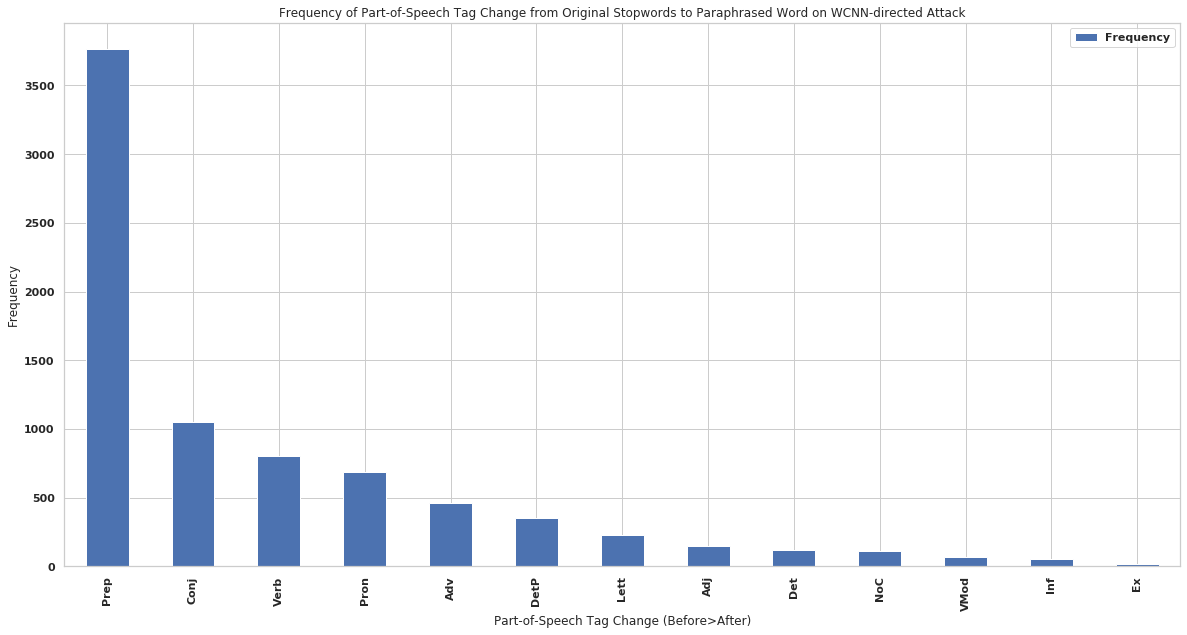

In [411]:
sort_by_Freq_stopCNN.plot.bar(x="POSchange", y="Frequency", figsize=(20,10))
plt.title('Frequency of Part-of-Speech Tag Change from Original Stopwords to Paraphrased Word on WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag Change (Before>After)')

In [261]:
print(FreqPairList[0][0])

63


### Getting different scenarios for frequency of perturbed word compared to original word (the same frequency, the perturb word being more common in BNC corpus and the original word being more common in BNC corpus)

In [262]:
PerturbMoreCommon = 0
OriginalMoreCommon = 0
PerturbOriginalTheSameFreq = 0

for i in FreqPairList:
    if i[0] < i[2]: PerturbMoreCommon+=1
    elif i[0] > i[2]: OriginalMoreCommon+=1
    elif i[0] == i[2]: PerturbOriginalTheSameFreq+=1

print(PerturbMoreCommon)
print(OriginalMoreCommon)
print(PerturbOriginalTheSameFreq)

1991
10793
37


In [264]:
print(FreqPairList[0])
if FreqPairList[0][1] == FreqPairList[0][3]: print("yes")

[63, 'Verb', 11, 'Verb']
yes


In [ ]:
## getting the index of words where the two static POS tags differed

In [268]:
IFposthesamecount = 0
IndexWhereNotTheSame = []

CountforifsamePOS = 0
for i in FreqPairList:
    if i[1] == i[3]:
            IFposthesamecount+=1  
    else: IndexWhereNotTheSame.append(CountforifsamePOS)
          
    CountforifsamePOS +=1
    
print((IFposthesamecount))
print(len(IndexWhereNotTheSame))

10667
2154


In [ ]:
# creating a dictionary storing the string POS transformation as the key and frequency of this perturbation as the value
# this dictionary was then converted to two lists, one with the keys and the other with the values, in the same order
# so then these can be plotted

In [281]:
DictForChangedPOS = {}

POSnameList = []
POScountList = []


for i in IndexWhereNotTheSame:
    POSstring = ""
    OriginalWordPOS = FreqPairList[i][1]
    PertWordPOS = FreqPairList[i][-1]
    POSstring = OriginalWordPOS + ">" + PertWordPOS
    #check if POSstring in DictForChangedPOS as a key
    
    if POSstring not in POSnameList:
        POSnameList.append(POSstring)
        POScountList.append(1)
    else:
        IndexForcount= POSnameList.index(POSstring)
        POScountList[IndexForcount] +=1
    
    if POSstring not in DictForChangedPOS:
        DictForChangedPOS[POSstring] = 1
    else:
        DictForChangedPOS[POSstring] += 1
        
print(len(DictForChangedPOS))
print(DictForChangedPOS)

print(len(POSnameList))
print(POSnameList)

print(len(POScountList))
print(POScountList)

49
{'DetP>Adj': 56, 'Pron>Lett': 218, 'Ex>Adv': 43, 'Inf>Prep': 616, 'Conj>Adv': 37, 'Adj>DetP': 25, 'Verb>Adj': 30, 'Det>DetP': 304, 'Conj>Prep': 78, 'Adj>Adv': 24, 'Adv>Prep': 13, 'Pron>NoC': 7, 'Ord>DetP': 6, 'Adv>Adj': 100, 'NoC>Adj': 19, 'NoC>Verb': 74, 'Prep>Verb': 22, 'Det>NoC': 111, 'Prep>Inf': 51, 'DetP>Det': 79, 'Adj>Verb': 19, 'Verb>NoC': 44, 'Neg>Adv': 14, 'Ord>Adv': 16, 'Num>NoC': 14, 'Adv>DetP': 5, 'Pron>Det': 4, 'Verb>Prep': 1, 'NoC>NoP-': 1, 'Adv>Ex': 19, 'Lett>Pron': 2, 'DetP>Adv': 9, 'Prep>Conj': 41, 'Prep>Ord': 3, 'NoC>Num': 15, 'NoP->NoP': 4, 'NoC>NoP': 2, 'Adj>NoC': 4, 'NoC>Pron': 5, 'Conj>DetP': 2, 'Adv>Conj': 4, 'Prep>Adj': 3, 'Prep>Adv': 1, 'Conj>NoC': 1, 'Det>Pron': 3, 'Ord>Adj': 1, 'Verb>NoP': 1, 'Uncl>Int': 2, 'NoC>Det': 1}
49
['DetP>Adj', 'Pron>Lett', 'Ex>Adv', 'Inf>Prep', 'Conj>Adv', 'Adj>DetP', 'Verb>Adj', 'Det>DetP', 'Conj>Prep', 'Adj>Adv', 'Adv>Prep', 'Pron>NoC', 'Ord>DetP', 'Adv>Adj', 'NoC>Adj', 'NoC>Verb', 'Prep>Verb', 'Det>NoC', 'Prep>Inf', 'DetP>Det'

In [282]:
POSdictforDF = {
    "POSchange": POSnameList,
    "Frequency": POScountList
}
POSdataframe = pd.DataFrame(POSdictforDF)
sort_by_Freq = POSdataframe.sort_values('Frequency',ascending=False)
print(sort_by_Freq.head(n=3))

   POSchange  Frequency
3   Inf>Prep        616
7   Det>DetP        304
1  Pron>Lett        218


In [293]:
sort_by_Freq.head()

POSchange  Frequency
3    Inf>Prep        616
7    Det>DetP        304
1   Pron>Lett        218
17    Det>NoC        111
13    Adv>Adj        100

In [290]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

Text(0.5, 0, 'Part-of-Speech Tag Change (Before>After)')

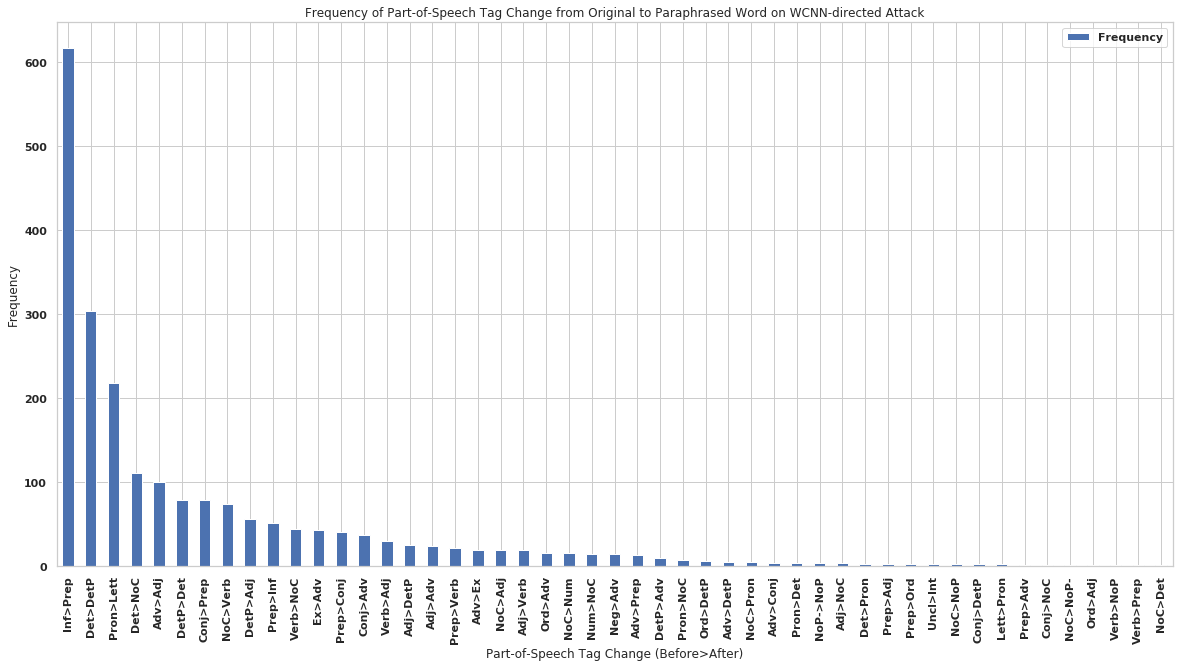

In [390]:
sort_by_Freq.plot.bar(x="POSchange", y="Frequency", figsize=(20,10))
plt.title('Frequency of Part-of-Speech Tag Change from Original to Paraphrased Word on WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag Change (Before>After)')
#ax.set_xticklabels(sort_by_Freq["Frequency"])

In [ ]:
## failed attempt earlier which did not plot the POS transformations sorted by frequency 

In [276]:
 
SortedDict = sorted(DictForChangedPOS.values(), reverse=True)
print(SortedDict)

[616, 304, 218, 111, 100, 79, 78, 74, 56, 51, 44, 43, 41, 37, 30, 25, 24, 22, 19, 19, 19, 16, 15, 14, 14, 13, 9, 7, 6, 5, 5, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


In [277]:
#https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
import matplotlib.pyplot as plt

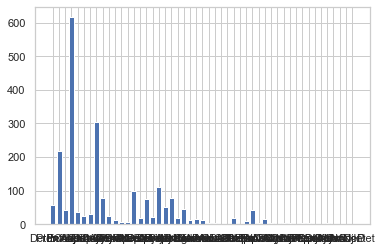

In [279]:
plt.bar(range(len(DictForChangedPOS)), list(DictForChangedPOS.values()), align='center')
plt.xticks(range(len(DictForChangedPOS)), list(DictForChangedPOS.keys()))
plt.show()

In [249]:
listtest = [1,2,3,4,5,2]
# indextest = ""
#if 4 in listtest:
indextest = [i for i, e in enumerate(listtest) if e == 2]   
print(indextest)

[1, 5]


### Seeing how often the lemma of the original word was perturbed

In [876]:
#OrigPerturbPairDF
numOfRowsLemma = OrigPerturbPairDF.shape[0]
LemmaIndex = 0

LemmOrigPertList = []

for i in range(numOfRowsLemma):
    
    PairToAdd = []
    Orig = []
    Pert= []
    
    OriginalWord = OrigPerturbPairDF["OriginalWord"].iloc[LemmaIndex].strip(string.punctuation)
    PertWord = OrigPerturbPairDF["PerturbWord"].iloc[LemmaIndex].strip(string.punctuation)
    
    nlporf = nlp(OriginalWord)
    nlpPert = nlp(PertWord)
    
    for token in nlporf:
        Orig.append(token.lemma_)
        
    for token in nlpPert:
        Pert.append(token.lemma_)
        
    PairToAdd.append(Orig)
    PairToAdd.append(Pert)
    LemmOrigPertList.append(PairToAdd)
    
    LemmaIndex+=1
    
print(len(LemmOrigPertList))

23042


In [ ]:
## Now I have a list with lists containing the lemmatized original word and perturbed word

In [877]:
LemmOrigPertList[0]

[['86'], ['27']]

In [890]:
LemmOrigPertList[0][1]

['27']

In [879]:
# this calculates on how many occasions the number of tokens identified by spacy in the original and perturbed word differed
# these 114 instances will be excluded as mentioned in the Results section
IndexDiffLength = []

#Notsamelemma = []

IndexCountr = 0
for i in LemmOrigPertList:
    if len(i[0]) != len(i[1]):
        IndexDiffLength.append(IndexCountr)
    IndexCountr+=1
    
print(len(IndexDiffLength))

114


In [880]:
IndexCountr = 0
for i in LemmOrigPertList:
    
    if IndexCountr in IndexDiffLength:
        print(i[0], i[1])
    
    IndexCountr+=1

[] ['ãƒ', '»']
['-PRON-'] ['-PRON-', '/', '-PRON-']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['ãƒ', '»']
[] ['ãƒ', '»']
[] ['ãƒ', '»']
['-PRON-'] ['-PRON-', '/', '-PRON-']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['and']
[] ['and']
['i'] ['i', '-', 'i']
[] ['and']
['-PRON-'] ['-PRON-', '/', '-PRON-']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['â‚¬']
[] ['and']
[] ['â‚¬']
[] ['â‚¬']
[] ['â‚¬']
[] ['â‚¬']
[] ['â‚¬']
[] ['â‚¬']
[] ['â‚¬']
[] ['â€', '¦']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['ãƒ', '»']
['-PRON-'] ['-PRON-', '/', '-PRON-']
['percent'] []
[] ['â‚¬']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['and']
['70'] ['55', '-', '70']
['percent'] []
[] ['and']
['percent'] []
['-PRON-'] ['-PRON-', '/', '-PRON-']
['i'] ['i', '-', 'i']
['percent'] []
['-PRON-'] ['-PRON-', '/', '-PRON-']
['percent'] []
[] ['and']
[] ['â€', '™']
['-PRON-'] ['-PRON-', '/', '-PRON-']
[] ['â‚¬']
[] ['and']
[] ['â‚¬']
['i'] ['i', '-', 'i']
[] ['and']
['i'] ['i', '-', 'i']
['percentage'] []
[] ['and']
[] ['and']
[] 

In [881]:
IndexCountr = 0
# trying to see how many unique token lengths were recognised in the perturbed words
TokenLengthsLemm = []

for i in LemmOrigPertList:
    
    if IndexCountr not in IndexDiffLength:
        #print(i[0], i[1])
        if len(i[0]) not in TokenLengthsLemm: TokenLengthsLemm.append(len(i[0]))
    
    IndexCountr+=1
    
print(len(TokenLengthsLemm))    

5


In [882]:
print(TokenLengthsLemm)

[1, 0, 3, 2, 5]


In [899]:
# the zero lengths mean that punctuation was perturbed. So Now I wish to see on how many occasions this occured
IndexCountr = 0

ZeroLemmTokenCount = 0

for i in LemmOrigPertList:
    
    if IndexCountr not in IndexDiffLength:
        #print(i[0], i[1])
        #if len(i[0]) not in TokenLengthsLemm: TokenLengthsLemm.append(len(i[0]))
        if len(i[0]) == 0 or len(i[1]) == 0: ZeroLemmTokenCount+=1
        
    
    IndexCountr+=1
    
print((ZeroLemmTokenCount)) 

853


In [ ]:
## this will calculate on how many occasions the lemmatized original and perturbed token was the same

In [903]:
IndexCountr = 0

CountLemmTheSame = 0

LEmmaTokentheSameList = []

for i in LemmOrigPertList:
    print(i)
    print(i[0])
    if len(i[0]) == 0 or len(i[1]) == 0:
        IndexCountr+=1
        continue #skip those which were punctuation that were perturbed
    
    if IndexCountr not in IndexDiffLength:

        OrigTokens = i[0]
        LengthOfOrigToken = len(OrigTokens)
        print(IndexCountr)
        PertTokens = i[1]
        if len(PertTokens) != LengthOfOrigToken:
            IndexCountr+=1
            continue
        
        TokenIndex = 0
        TokenTheSameCounter = 0
        for j in OrigTokens:
            # here I check if all the tokens have the same length, for me to recognise it as having had the same lemma
            if j == PertTokens[TokenIndex]: TokenTheSameCounter+=1
            
            TokenIndex+=1 
        if TokenTheSameCounter == LengthOfOrigToken:
            LEmmaTokentheSameList.append(i)
            CountLemmTheSame+=1
    
    IndexCountr+=1
print(CountLemmTheSame)

[['86'], ['27']]
['86']
0
[['9'], ['21.00']]
['9']
1
[['3'], ['3']]
['3']
2
[['unknown'], ['unspecified']]
['unknown']
3
[['remove'], ['delete']]
['remove']
4
[['show'], ['prove']]
['show']
5
[['per'], ['into']]
['per']
6
[['label'], ['emblem']]
['label']
7
[['manager'], ['administrator']]
['manager']
8
[['town'], ['city']]
['town']
9
[['enter'], ['penetrate']]
['enter']
10
[['be'], ['become']]
['be']
11
[['country'], ['state']]
['country']
12
[['petroleum'], ['gasoline']]
['petroleum']
13
[['manufacture'], ['fabrication']]
['manufacture']
14
[['send'], ['dispatch']]
['send']
15
[['from'], ['among']]
['from']
16
[['slave'], ['slavey']]
['slave']
17
[['slave'], ['slavey']]
['slave']
18
[['plan'], ['regime']]
['plan']
19
[['former'], ['previous']]
['former']
20
[['bear'], ['borne']]
['bear']
21
[['survive'], ['escape']]
['survive']
22
[['indigenous'], ['autochthonous']]
['indigenous']
23
[['many'], ['large']]
['many']
24
[['accompany'], ['accompagnie']]
['accompany']
25
[['soldier'], ['p

760
[['middle', '-', 'income'], ['medium', '-', 'income']]
['middle', '-', 'income']
761
[['dollar'], ['buck']]
['dollar']
762
[['of'], ['from']]
['of']
763
[['profit'], ['beneficiary']]
['profit']
764
[['cut'], ['cutback']]
['cut']
765
[['design'], ['conceived']]
['design']
766
[['public'], ['governmental']]
['public']
767
[['relation'], ['relacione']]
['relation']
768
[['undercut'], ['undermine']]
['undercut']
769
[['of'], ['from']]
['of']
770
[['reach'], ['arrive']]
['reach']
771
[['big'], ['large']]
['big']
772
[['market'], ['mercados']]
['market']
773
[['in'], ['at']]
['in']
774
[['for'], ['per']]
['for']
775
[['a'], ['another']]
['a']
776
[['fully'], ['altogether']]
['fully']
777
[['for'], ['into']]
['for']
778
[['year'], ['century']]
['year']
779
[['country'], ['economy']]
['country']
780
[['around'], ['throughout']]
['around']
781
[['drug'], ['medication']]
['drug']
782
[['declare'], ['proclaim']]
['declare']
783
[['regional'], ['gional']]
['regional']
784
[['flexibility'], ['r

[]
[['overriding'], ['overarching']]
['overriding']
1339
[['people'], ['citizen']]
['people']
1340
[['purely'], ['exclusively']]
['purely']
1341
[['where'], ['wherever']]
['where']
1342
[['assumption'], ['guess']]
['assumption']
1343
[['file'], ['fichier']]
['file']
1344
[[], []]
[]
[['file'], ['dossier']]
['file']
1346
[['file'], ['dossier']]
['file']
1347
[['be'], ['stand']]
['be']
1348
[['use'], ['employ']]
['use']
1349
[['build'], ['erect']]
['build']
1350
[['share'], ['pool']]
['share']
1351
[['library'], ['bookstore']]
['library']
1352
[['and'], ['nor']]
['and']
1353
[['use'], ['utilise']]
['use']
1354
[['current'], ['present']]
['current']
1355
[['only'], ['alone']]
['only']
1356
[['file'], ['record']]
['file']
1357
[['all'], ['every']]
['all']
1358
[['file'], ['dossier']]
['file']
1359
[['be'], ['exist']]
['be']
1360
[['compile'], ['tabulate']]
['compile']
1361
[['at'], ['during']]
['at']
1362
[['-PRON-'], ['-PRON-']]
['-PRON-']
1363
[['though'], ['despite']]
['though']
1364
[[

2016
[['issue'], ['dispense']]
['issue']
2017
[['license'], ['permission']]
['license']
2018
[['in'], ['among']]
['in']
2019
[['first'], ['firstly']]
['first']
2020
[['resigns'], ['resignation']]
['resigns']
2021
[['build'], ['erect']]
['build']
2022
[['Thursday'], ['friday']]
['Thursday']
2023
[['as'], ['because']]
['as']
2024
[['have'], ['get']]
['have']
2025
[['academic'], ['scholastic']]
['academic']
2026
[['rare'], ['scarce']]
['rare']
2027
[['examine'], ['discusse']]
['examine']
2028
[['civil'], ['civilian']]
['civil']
2029
[['right'], ['droit']]
['right']
2030
[['commercial', '-', 'free'], ['ad', '-', 'free']]
['commercial', '-', 'free']
2031
[['1'], ['4']]
['1']
2032
[['enable'], ['allows']]
['enable']
2033
[['credit'], ['appropriation']]
['credit']
2034
[['generate'], ['create']]
['generate']
2035
[['by'], ['via']]
['by']
2036
[['lender'], ['financier']]
['lender']
2037
[['lender'], ['financier']]
['lender']
2038
[['from'], ['among']]
['from']
2039
[['loan'], ['debt']]
['loan'

[['2'], ['2']]
['2']
2653
[['3'], ['5']]
['3']
2654
[['chart'], ['erection']]
['chart']
2655
[['generate'], ['engender']]
['generate']
2656
[['charts'], ['erection']]
['charts']
2657
[['organizational'], ['institutional']]
['organizational']
2658
[['directory'], ['repertoire']]
['directory']
2659
[['text'], ['version']]
['text']
2660
[['deliver'], ['offer']]
['deliver']
2661
[['to'], ['from']]
['to']
2662
[['of'], ['among']]
['of']
2663
[['with'], ['against']]
['with']
2664
[['would'], ['ought']]
['would']
2665
[['to'], ['into']]
['to']
2666
[['57'], ['58']]
['57']
2667
[['security'], ['warranty']]
['security']
2668
[['and'], ['nor']]
['and']
2669
[['2'], ['1']]
['2']
2670
[['configure'], ['configurator']]
['configure']
2671
[['talk'], ['debate']]
['talk']
2672
[['shirt'], ['sweater']]
['shirt']
2673
[['0.60'], ['0.70']]
['0.60']
2674
[['2.15'], ['14.15']]
['2.15']
2675
[['be'], ['become']]
['be']
2676
[['mysterious'], ['enigmatic']]
['mysterious']
2677
[['not'], ['never']]
['not']
267

['at']
3498
[['with'], ['among']]
['with']
3499
[['by'], ['via']]
['by']
3500
[['version'], ['text']]
['version']
3501
[['on'], ['onto']]
['on']
3502
[['have'], ['be']]
['have']
3503
[['arrive'], ['land']]
['arrive']
3504
[['and'], ['nor']]
['and']
3505
[['certainly'], ['admittedly']]
['certainly']
3506
[['must'], ['ought']]
['must']
3507
[['project'], ['proposal']]
['project']
3508
[['-PRON-'], ['doyou']]
['-PRON-']
3509
[['-PRON-'], ['doyou']]
['-PRON-']
3510
[['awesome'], ['wondrous']]
['awesome']
3511
[['also'], ['furthermore']]
['also']
3512
[['have'], ['re']]
['have']
3513
[['incredible'], ['unthinkable']]
['incredible']
3514
[['of'], ['in']]
['of']
3515
[['interested'], ['involve']]
['interested']
3516
[['company'], ['ï¬rms']]
['company']
3517
[['-PRON-'], ['-PRON-']]
['-PRON-']
3518
[['minute'], ['mins']]
['minute']
3519
[['complete'], ['exhaustive']]
['complete']
3520
[['and'], ['nor']]
['and']
3521
[['project'], ['programme']]
['project']
3522
[['-PRON-'], ['y']]
['-PRON-']
3

[['fork'], ['ponye']]
['fork']
4333
[['problem'], ['difficulty']]
['problem']
4334
[['with'], ['among']]
['with']
4335
[[], []]
[]
[['mysql'], ['mssql']]
['mysql']
4337
[['display'], ['exhibit']]
['display']
4338
[['-PRON-'], ['-PRON-']]
['-PRON-']
4339
[['when'], ['wherever']]
['when']
4340
[['go'], ['go']]
['go']
4341
[['on'], ['during']]
['on']
4342
[['-PRON-'], ['-PRON-']]
['-PRON-']
4343
[['track'], ['trail']]
['track']
4344
[['make'], ['perform']]
['make']
4345
[['a'], ['another']]
['a']
4346
[['at'], ['into']]
['at']
4347
[['-PRON-'], ['-PRON-']]
['-PRON-']
4348
[['program'], ['programme']]
['program']
4349
[['to'], ['from']]
['to']
4350
[['print'], ['fingerprint']]
['print']
4351
[['for'], ['per']]
['for']
4352
[[], []]
[]
[['1'], ['2']]
['1']
4354
[['1'], ['1']]
['1']
4355
[['line'], ['accordance']]
['line']
4356
[['line'], ['consonance']]
['line']
4357
[['3'], ['3']]
['3']
4358
[[], []]
[]
[[], []]
[]
[['-PRON-'], ['-PRON-']]
['-PRON-']
4361
[['too'], ['overly']]
['too']
4362

[['from'], ['among']]
['from']
5104
[['bulk'], ['mass']]
['bulk']
5105
[['model'], ['template']]
['model']
5106
[['shipping'], ['seafare']]
['shipping']
5107
[['discount'], ['reduction']]
['discount']
5108
[['and'], ['nor']]
['and']
5109
[['encouraged'], ['emboldened']]
['encouraged']
5110
[['appointment'], ['appointee']]
['appointment']
5111
[['include'], ['comprise']]
['include']
5112
[['at'], ['during']]
['at']
5113
[[], []]
[]
[['much'], ['very']]
['much']
5115
[[], []]
[]
[['well'], ['ok']]
['well']
5117
[['-PRON-'], ['-PRON-']]
['-PRON-']
5118
[['subscribe'], ['accede']]
['subscribe']
5119
[['to'], ['into']]
['to']
5120
[['people'], ['individual']]
['people']
5121
[['in'], ['throughout']]
['in']
5122
[['would'], ['ought']]
['would']
5123
[['for'], ['per']]
['for']
5124
[['server'], ['servant']]
['server']
5125
[['get'], ['obtain']]
['get']
5126
[['into'], ['onto']]
['into']
5127
[['activity'], ['activite']]
['activity']
5128
[['in'], ['among']]
['in']
5129
[['be'], ['become']]
['

[['and'], ['nor']]
['and']
5697
[['natural'], ['normal']]
['natural']
5698
[['2'], ['3']]
['2']
5699
[['clinical'], ['medical']]
['clinical']
5700
[['development'], ['growth']]
['development']
5701
[[], []]
[]
[['to'], ['into']]
['to']
5703
[['efficacy'], ['profitability']]
['efficacy']
5704
[['rapidly'], ['promptly']]
['rapidly']
5705
[[], ['ãƒ', '»']]
[]
[['3'], ['5']]
['3']
5707
[['framework'], ['background']]
['framework']
5708
[['to'], ['from']]
['to']
5709
[['of'], ['among']]
['of']
5710
[['who'], ['whom']]
['who']
5711
[['reward'], ['gratify']]
['reward']
5712
[['leadership'], ['leader']]
['leadership']
5713
[['among'], ['amongst']]
['among']
5714
[[], []]
[]
[['discussion'], ['deliberation']]
['discussion']
5716
[[], []]
[]
[['-PRON-'], ['-PRON-']]
['-PRON-']
5718
[['fall'], ['collapse']]
['fall']
5719
[['-PRON-'], ['-PRON-']]
['-PRON-']
5720
[['not'], ["n't"]]
['not']
5721
[['not'], ["n't"]]
['not']
5722
[['and'], ['nor']]
['and']
5723
[['after'], ['upon']]
['after']
5724
[['w

[['-PRON-'], ['doyou']]
['-PRON-']
6388
[['to'], ['from']]
['to']
6389
[['for'], ['per']]
['for']
6390
[[], []]
[]
[[], []]
[]
[['value'], ['security']]
['value']
6393
[['to'], ['from']]
['to']
6394
[['on'], ['towards']]
['on']
6395
[['-PRON-'], ['y']]
['-PRON-']
6396
[[], []]
[]
[[], []]
[]
[['have'], ['re']]
['have']
6399
[['check'], ['verify']]
['check']
6400
[['-PRON-'], ['-PRON-']]
['-PRON-']
6401
[['show'], ['demonstrate']]
['show']
6402
[['for'], ['per']]
['for']
6403
[['at'], ['during']]
['at']
6404
[['line'], ['accordance']]
['line']
6405
[['line'], ['accordance']]
['line']
6406
[['9'], ['9.0']]
['9']
6407
[['-PRON-'], ['-PRON-']]
['-PRON-']
6408
[['be'], ['be']]
['be']
6409
[['would'], ['d']]
['would']
6410
[['exist'], ['constitute']]
['exist']
6411
[['value'], ['eigenvalue']]
['value']
6412
[['on'], ['for']]
['on']
6413
[['-PRON-'], ['y']]
['-PRON-']
6414
[['think'], ['imagine']]
['think']
6415
[['be'], ['become']]
['be']
6416
[['useful'], ['fruitful']]
['useful']
6417
[['in

7011
[['with'], ['under']]
['with']
7012
[['now'], ['presently']]
['now']
7013
[['en'], ['at']]
['en']
7014
[['always'], ['repeatedly']]
['always']
7015
[['giggle'], ['chuckle']]
['giggle']
7016
[['at'], ['under']]
['at']
7017
[['even'], ['again']]
['even']
7018
[['now'], ['currently']]
['now']
7019
[['at'], ['in']]
['at']
7020
[['take'], ['bring']]
['take']
7021
[['6'], ['6:00']]
['6']
7022
[['month'], ['mth']]
['month']
7023
[['and'], ['nor']]
['and']
7024
[['now'], ['already']]
['now']
7025
[['be'], ['become']]
['be']
7026
[['big'], ['large']]
['big']
7027
[['buy'], ['bribed']]
['buy']
7028
[['-PRON-'], ['-PRON-']]
['-PRON-']
7029
[['from'], ['of']]
['from']
7030
[['giggle'], ['chuckle']]
['giggle']
7031
[['at'], ['during']]
['at']
7032
[['public'], ['pubic']]
['public']
7033
[['now'], ['currently']]
['now']
7034
[['at'], ['in']]
['at']
7035
[['take'], ['come']]
['take']
7036
[['6'], ['6:00']]
['6']
7037
[['now'], ['already']]
['now']
7038
[['buy'], ['bribed']]
['buy']
7039
[['-PRON

['licensing']
7649
[['email'], ['mail']]
['email']
7650
[['send'], ['dispatch']]
['send']
7651
[['point'], ['puntos']]
['point']
7652
[['draft'], ['project']]
['draft']
7653
[['be'], ['become']]
['be']
7654
[['go'], ['go']]
['go']
7655
[['nowhere'], ['everywhere']]
['nowhere']
7656
[['director'], ['manager']]
['director']
7657
[['50'], ['50,000']]
['50']
7658
[['clean'], ['healthier']]
['clean']
7659
[['emission'], ['programme']]
['emission']
7660
[['and'], ['nor']]
['and']
7661
[['10'], ['10:00']]
['10']
7662
[['alert'], ['alarm']]
['alert']
7663
[['-PRON-'], ['-PRON-']]
['-PRON-']
7664
[['open', '-', 'source'], ['closed', '-', 'source']]
['open', '-', 'source']
7665
[['billion'], ['trillion']]
['billion']
7666
[['contact'], ['relationship']]
['contact']
7667
[['print'], ['printer']]
['print']
7668
[['could'], ['wo']]
['could']
7669
[['get'], ['achieve']]
['get']
7670
[['or'], ['nor']]
['or']
7671
[['server'], ['waiter']]
['server']
7672
[['an'], ['a']]
['an']
7673
[['3'], ['4']]
['3'

[[], []]
[]
[[], []]
[]
[[], []]
[]
[['through'], ['throughout']]
['through']
8383
[['list'], ['roster']]
['list']
8384
[['docs'], ['medic']]
['docs']
8385
[['for'], ['per']]
['for']
8386
[['a'], ['another']]
['a']
8387
[['to'], ['from']]
['to']
8388
[['cope'], ['meet']]
['cope']
8389
[['with'], ['against']]
['with']
8390
[['more'], ['high']]
['more']
8391
[[], []]
[]
[['be'], ['happen']]
['be']
8393
[['accessible'], ['approachable']]
['accessible']
8394
[['able'], ['competent']]
['able']
8395
[['-PRON-'], ['-PRON-']]
['-PRON-']
8396
[['frame'], ['fabric']]
['frame']
8397
[['think'], ['feel']]
['think']
8398
[['only'], ['alone']]
['only']
8399
[['work'], ['collaborate']]
['work']
8400
[['there'], ['here']]
['there']
8401
[['be'], ['re']]
['be']
8402
[['top', '-', 'level'], ['high', '-', 'level']]
['top', '-', 'level']
8403
[['activity'], ['potency']]
['activity']
8404
[['category'], ['kind']]
['category']
8405
[['activity'], ['activite']]
['activity']
8406
[['each'], ['every']]
['each'

9055
[['for'], ['at']]
['for']
9056
[['29'], ['26']]
['29']
9057
[['en'], ['at']]
['en']
9058
[['effective'], ['eï¬€ective']]
['effective']
9059
[['as'], ['since']]
['as']
9060
[['work'], ['travail']]
['work']
9061
[[], []]
[]
[['in'], ['at']]
['in']
9063
[['in'], ['among']]
['in']
9064
[['for'], ['per']]
['for']
9065
[['have'], ['be']]
['have']
9066
[['country'], ['economy']]
['country']
9067
[['be'], ['remain']]
['be']
9068
[['even'], ['still']]
['even']
9069
[['available'], ['disposable']]
['available']
9070
[['for'], ['per']]
['for']
9071
[['for'], ['per']]
['for']
9072
[['to'], ['from']]
['to']
9073
[['development'], ['novedade']]
['development']
9074
[['and'], ['or']]
['and']
9075
[['and'], ['nor']]
['and']
9076
[['host'], ['greet']]
['host']
9077
[['drug'], ['medication']]
['drug']
9078
[['government'], ['gouvernement']]
['government']
9079
[['and'], ['nor']]
['and']
9080
[['bring'], ['deliver']]
['bring']
9081
[['legal'], ['forensic']]
['legal']
9082
[['about'], ['toward']]
['a

[['385'], ['385.00']]
['385']
9692
[[], ['and']]
[]
[['with'], ['among']]
['with']
9694
[['recover'], ['recuperate']]
['recover']
9695
[['health'], ['heath']]
['health']
9696
[['at'], ['under']]
['at']
9697
[['can'], ['ca']]
['can']
9698
[['transfer'], ['divestiture']]
['transfer']
9699
[['quality'], ['highquality']]
['quality']
9700
[[], ['and']]
[]
[['cure'], ['heal']]
['cure']
9702
[['immediately'], ['directly']]
['immediately']
9703
[['be'], ['be']]
['be']
9704
[['accredited'], ['authorise']]
['accredited']
9705
[[], ['and']]
[]
[['-PRON-'], ['-PRON-']]
['-PRON-']
9707
[['effective'], ['efficient']]
['effective']
9708
[['confidential'], ['covert']]
['confidential']
9709
[['value'], ['prize']]
['value']
9710
[['use'], ['utilize']]
['use']
9711
[['now'], ['currently']]
['now']
9712
[['-PRON-'], ['doyou']]
['-PRON-']
9713
[['opportunity'], ['possibility']]
['opportunity']
9714
[['drug'], ['medicament']]
['drug']
9715
[['at'], ['among']]
['at']
9716
[['a'], ['another']]
['a']
9717
[['l

['month']
10337
[['and'], ['nor']]
['and']
10338
[['be'], ['become']]
['be']
10339
[['buy'], ['bribed']]
['buy']
10340
[['from'], ['to']]
['from']
10341
[['civil'], ['civilian']]
['civil']
10342
[['investigate'], ['explore']]
['investigate']
10343
[['and'], ['nor']]
['and']
10344
[['ultimately'], ['finally']]
['ultimately']
10345
[['totally'], ['completely']]
['totally']
10346
[['unequalle'], ['unequale']]
['unequalle']
10347
[['be'], ['be']]
['be']
10348
[['stop'], ['cease']]
['stop']
10349
[['on'], ['onto']]
['on']
10350
[['try'], ['attempt']]
['try']
10351
[['no'], ['no']]
['no']
10352
[['word'], ['expression']]
['word']
10353
[['2'], ['2']]
['2']
10354
[['product'], ['produto']]
['product']
10355
[['here'], ['there']]
['here']
10356
[['detail'], ['information']]
['detail']
10357
[['password'], ['username']]
['password']
10358
[['in'], ['throughout']]
['in']
10359
[['who'], ['whom']]
['who']
10360
[['contain'], ['include']]
['contain']
10361
[[], ['and']]
[]
[[], ['and']]
[]
[['subr

10973
[['fine'], ['nicest']]
['fine']
10974
[['incomparably'], ['infinitely']]
['incomparably']
10975
[['craft'], ['drafted']]
['craft']
10976
[['luxury'], ['glamour']]
['luxury']
10977
[['all'], ['each']]
['all']
10978
[['affordable'], ['approachable']]
['affordable']
10979
[['of'], ['among']]
['of']
10980
[['different'], ['divergent']]
['different']
10981
[['model'], ['template']]
['model']
10982
[['of'], ['in']]
['of']
10983
[['save'], ['store']]
['save']
10984
[['life'], ['inhabit']]
['life']
10985
[['be'], ['happen']]
['be']
10986
[['lie'], ['lie']]
['lie']
10987
[['in'], ['throughout']]
['in']
10988
[['3'], ['3']]
['3']
10989
[['04'], ['01']]
['04']
10990
[['woman'], ['femmes']]
['woman']
10991
[['worship'], ['cult']]
['worship']
10992
[['-PRON-'], ['y']]
['-PRON-']
10993
[['can'], ['may']]
['can']
10994
[['beautiful'], ['gorgeous']]
['beautiful']
10995
[['inside'], ['within']]
['inside']
10996
[[], []]
[]
[['suddenly'], ['unexpectedly']]
['suddenly']
10998
[['lift'], ['revoke']]

11744
[['with'], ['from']]
['with']
11745
[['on'], ['towards']]
['on']
11746
[['add'], ['incorporated']]
['add']
11747
[['monitoring'], ['oversee']]
['monitoring']
11748
[['logic'], ['rationale']]
['logic']
11749
[['to'], ['into']]
['to']
11750
[['public'], ['pubic']]
['public']
11751
[['if'], ['unless']]
['if']
11752
[['report'], ['relationship']]
['report']
11753
[['in'], ['onto']]
['in']
11754
[['and'], ['nor']]
['and']
11755
[['subversion'], ['destabilization']]
['subversion']
11756
[['commit'], ['devote']]
['commit']
11757
[['message'], ['ad']]
['message']
11758
[[], []]
[]
[['monitoring'], ['supervise']]
['monitoring']
11760
[['logic'], ['rationale']]
['logic']
11761
[['public'], ['pubic']]
['public']
11762
[['if'], ['upon']]
['if']
11763
[['for'], ['per']]
['for']
11764
[['email'], ['mail']]
['email']
11765
[['limit'], ['curtail']]
['limit']
11766
[['have'], ['re']]
['have']
11767
[['and'], ['nor']]
['and']
11768
[['to'], ['from']]
['to']
11769
[['of'], ['among']]
['of']
11770
[

12316
[['click'], ['ding']]
['click']
12317
[['forward'], ['shipping']]
['forward']
12318
[['for'], ['towards']]
['for']
12319
[['local'], ['regional']]
['local']
12320
[['active'], ['vibrant']]
['active']
12321
[['broadcasting'], ['disseminate']]
['broadcasting']
12322
[['and'], ['nor']]
['and']
12323
[['attack'], ['assault']]
['attack']
12324
[['parameter'], ['parametre']]
['parameter']
12325
[['to'], ['from']]
['to']
12326
[['improve'], ['enhance']]
['improve']
12327
[['client'], ['customer']]
['client']
12328
[['computer'], ['team']]
['computer']
12329
[['or'], ['and']]
['or']
12330
[['after'], ['upon']]
['after']
12331
[['available'], ['disposable']]
['available']
12332
[['for'], ['per']]
['for']
12333
[['many'], ['numerous']]
['many']
12334
[['language'], ['declaration']]
['language']
12335
[[], []]
[]
[['friend'], ['buddy']]
['friend']
12337
[[], []]
[]
[['impotence'], ['impotency']]
['impotence']
12339
[['affect'], ['touch']]
['affect']
12340
[['140'], ['141']]
['140']
12341
[[

[['winning'], ['receipt']]
['winning']
12930
[['safely'], ['reliably']]
['safely']
12931
[['get'], ['learn']]
['get']
12932
[['dedicated'], ['devoted']]
['dedicated']
12933
[['and'], ['nor']]
['and']
12934
[['join'], ['endorse']]
['join']
12935
[['thousand'], ['hundred']]
['thousand']
12936
[['happy'], ['felicitous']]
['happy']
12937
[['store'], ['shop']]
['store']
12938
[['-PRON-'], ['doyou']]
['-PRON-']
12939
[['with'], ['among']]
['with']
12940
[['all'], ['every']]
['all']
12941
[['remedy'], ['recourse']]
['remedy']
12942
[['health'], ['heath']]
['health']
12943
[['client'], ['clientele']]
['client']
12944
[['from'], ['among']]
['from']
12945
[['seek'], ['attempt']]
['seek']
12946
[['local'], ['regional']]
['local']
12947
[['certainly'], ['admittedly']]
['certainly']
12948
[['medicine'], ['medicament']]
['medicine']
12949
[['high'], ['big']]
['high']
12950
[['quality'], ['capacity']]
['quality']
12951
[['to'], ['into']]
['to']
12952
[['order'], ['goal']]
['order']
12953
[['be'], ['h

['short']
13797
[['several'], ['various']]
['several']
13798
[[], []]
[]
[['official'], ['oficial']]
['official']
13800
[['should'], ['would']]
['should']
13801
[['probably'], ['possibly']]
['probably']
13802
[['in'], ['onto']]
['in']
13803
[['as'], ['since']]
['as']
13804
[[], []]
[]
[['13'], ['12']]
['13']
13806
[['13'], ['11']]
['13']
13807
[['by'], ['via']]
['by']
13808
[['with'], ['among']]
['with']
13809
[['for'], ['at']]
['for']
13810
[['and'], ['or']]
['and']
13811
[['corporation'], ['enterprise']]
['corporation']
13812
[['ability'], ['capacity']]
['ability']
13813
[['in'], ['at']]
['in']
13814
[['technology'], ['technologie']]
['technology']
13815
[['offer'], ['give']]
['offer']
13816
[['trading'], ['bargaining']]
['trading']
13817
[['trading'], ['negotiate']]
['trading']
13818
[['here'], ['currently']]
['here']
13819
[['be'], ['re']]
['be']
13820
[['requirement'], ['imperative']]
['requirement']
13821
[['who'], ['whom']]
['who']
13822
[['apply'], ['implement']]
['apply']
1382

[['per'], ['at']]
['per']
14445
[['item'], ['topic']]
['item']
14446
[['be'], ['become']]
['be']
14447
[['pill'], ['tablet']]
['pill']
14448
[['diverse'], ['different']]
['diverse']
14449
[['90'], ['1990']]
['90']
14450
[['per'], ['for']]
['per']
14451
[['onto'], ['on']]
['onto']
14452
[['pill'], ['pad']]
['pill']
14453
[['per'], ['for']]
['per']
14454
[['item'], ['topic']]
['item']
14455
[['or'], ['nor']]
['or']
14456
[['per'], ['at']]
['per']
14457
[['whet'], ['satiates']]
['whet']
14458
[['whet'], ['satiates']]
['whet']
14459
[['per'], ['at']]
['per']
14460
[['vicious'], ['sadistic']]
['vicious']
14461
[['pill'], ['pad']]
['pill']
14462
[['per'], ['at']]
['per']
14463
[['other'], ['various']]
['other']
14464
[['or'], ['and']]
['or']
14465
[['4'], ['5']]
['4']
14466
[['be'], ['become']]
['be']
14467
[['per'], ['at']]
['per']
14468
[['item'], ['topic']]
['item']
14469
[['passionate'], ['eager']]
['passionate']
14470
[['now'], ['currently']]
['now']
14471
[['no'], ['no']]
['no']
14472


['an']
15133
[['independently'], ['separately']]
['independently']
15134
[['with'], ['into']]
['with']
15135
[['few'], ['several']]
['few']
15136
[['extra'], ['supplementary']]
['extra']
15137
[['hour'], ['timetable']]
['hour']
15138
[['per'], ['at']]
['per']
15139
[['and'], ['or']]
['and']
15140
[['people'], ['human']]
['people']
15141
[['find'], ['arrive']]
['find']
15142
[['-PRON-'], ['-PRON-']]
['-PRON-']
15143
[['say'], ['state']]
['say']
15144
[['in'], ['among']]
['in']
15145
[['-PRON-'], ['doyou']]
['-PRON-']
15146
[['friend'], ['pal']]
['friend']
15147
[['and'], ['nor']]
['and']
15148
[['to'], ['into']]
['to']
15149
[['on'], ['onto']]
['on']
15150
[['if'], ['whether']]
['if']
15151
[['few'], ['rare']]
['few']
15152
[['hundred'], ['100']]
['hundred']
15153
[['-PRON-'], ['-PRON-']]
['-PRON-']
15154
[['time'], ['duration']]
['time']
15155
[['and'], ['nor']]
['and']
15156
[['on'], ['for']]
['on']
15157
[['-PRON-'], ['y']]
['-PRON-']
15158
[['income'], ['revenue']]
['income']
15159


[['offer'], ['offre']]
['offer']
15771
[['even'], ['still']]
['even']
15772
[['opportunity'], ['advisability']]
['opportunity']
15773
[['drug'], ['medicament']]
['drug']
15774
[['low'], ['minimal']]
['low']
15775
[['product'], ['output']]
['product']
15776
[['without'], ['unless']]
['without']
15777
[['compromise'], ['undermine']]
['compromise']
15778
[['no'], ['no']]
['no']
15779
[['prompt'], ['swift']]
['prompt']
15780
[['fast'], ['quick']]
['fast']
15781
[['high'], ['big']]
['high']
15782
[['of'], ['among']]
['of']
15783
[['fake'], ['doctor']]
['fake']
15784
[['and'], ['or']]
['and']
15785
[['product'], ['output']]
['product']
15786
[['with'], ['among']]
['with']
15787
[['order'], ['injunction']]
['order']
15788
[['delivery'], ['implementation']]
['delivery']
15789
[['get'], ['obtain']]
['get']
15790
[['license'], ['licence']]
['license']
15791
[['basically'], ['principally']]
['basically']
15792
[['-PRON-'], ['-PRON-']]
['-PRON-']
15793
[['somewhere'], ['anywhere']]
['somewhere']
1

[['late'], ['new']]
['late']
16535
[['report'], ['relationship']]
['report']
16536
[['of'], ['from']]
['of']
16537
[['configuration'], ['configurator']]
['configuration']
16538
[['tool'], ['instrument']]
['tool']
16539
[['coverage'], ['insurance']]
['coverage']
16540
[['to'], ['from']]
['to']
16541
[['where'], ['wherever']]
['where']
16542
[['time'], ['duration']]
['time']
16543
[['available'], ['disposable']]
['available']
16544
[['for'], ['towards']]
['for']
16545
[['test'], ['exam']]
['test']
16546
[['be'], ['become']]
['be']
16547
[['-PRON-'], ['y']]
['-PRON-']
16548
[['have'], ['re']]
['have']
16549
[['response'], ['riposte']]
['response']
16550
[['comment'], ['observer']]
['comment']
16551
[['in'], ['throughout']]
['in']
16552
[['unit'], ['unity']]
['unit']
16553
[['answer'], ['reaction']]
['answer']
16554
[['compiler'], ['compilation']]
['compiler']
16555
[['be'], ['become']]
['be']
16556
[['should'], ['ought']]
['should']
16557
[['be'], ['remain']]
['be']
16558
[['of'], ['among

['ensure']
17284
[['of'], ['in']]
['of']
17285
[['private'], ['particular']]
['private']
17286
[['be'], ['happen']]
['be']
17287
[['ready'], ['available']]
['ready']
17288
[['bulk'], ['mass']]
['bulk']
17289
[['with'], ['from']]
['with']
17290
[['huge'], ['massive']]
['huge']
17291
[['advancement'], ['upliftment']]
['advancement']
17292
[['in'], ['onto']]
['in']
17293
[['mens'], ['womens']]
['mens']
17294
[['benefit'], ['perk']]
['benefit']
17295
[['of'], ['for']]
['of']
17296
[['thick'], ['dense']]
['thick']
17297
[['all'], ['each']]
['all']
17298
[['for'], ['at']]
['for']
17299
[['-PRON-'], ['-PRON-']]
['-PRON-']
17300
[['start'], ['initiate']]
['start']
17301
[['today'], ['tonight']]
['today']
17302
[['25'], ['2500']]
['25']
17303
[['a'], ['another']]
['a']
17304
[[], []]
[]
[['main'], ['principale']]
['main']
17306
[['of'], ['from']]
['of']
17307
[['make'], ['lend']]
['make']
17308
[['additional'], ['additonal']]
['additional']
17309
[[], []]
[]
[['repository'], ['deposit']]
['repo

['any']
17963
[['link'], ['hyperlink']]
['link']
17964
[['-PRON-'], ['-PRON-']]
['-PRON-']
17965
[['could'], ['would']]
['could']
17966
[[], []]
[]
[['-PRON-'], ['-PRON-']]
['-PRON-']
17968
[[], []]
[]
[['have'], ['re']]
['have']
17970
[['once'], ['formerly']]
['once']
17971
[['-PRON-'], ['-PRON-']]
['-PRON-']
17972
[['for'], ['on']]
['for']
17973
[['every'], ['any']]
['every']
17974
[['man'], ['human']]
['man']
17975
[['of'], ['for']]
['of']
17976
[['different'], ['diverse']]
['different']
17977
[['unique'], ['unrepeatable']]
['unique']
17978
[['-PRON-'], ['doyou']]
['-PRON-']
17979
[['feel'], ['think']]
['feel']
17980
[['improve'], ['enhance']]
['improve']
17981
[['safe'], ['saugus']]
['safe']
17982
[['secure'], ['sure']]
['secure']
17983
[['very'], ['quite']]
['very']
17984
[['private'], ['particular']]
['private']
17985
[['of'], ['among']]
['of']
17986
[['on'], ['onto']]
['on']
17987
[['or'], ['nor']]
['or']
17988
[['son'], ['filho']]
['son']
17989
[['overschedule'], ['overcommitte

18844
[['bogus'], ['fictional']]
['bogus']
18845
[['unreliable'], ['unsafe']]
['unreliable']
18846
[['simply'], ['purely']]
['simply']
18847
[['fraud'], ['swindle']]
['fraud']
18848
[['strongly'], ['robustly']]
['strongly']
18849
[['medical'], ['clinical']]
['medical']
18850
[['product'], ['output']]
['product']
18851
[['visit'], ['tour']]
['visit']
18852
[['site'], ['site']]
['site']
18853
[['of'], ['for']]
['of']
18854
[['of'], ['from']]
['of']
18855
[['low'], ['scant']]
['low']
18856
[['quality'], ['highquality']]
['quality']
18857
[['fraud'], ['swindle']]
['fraud']
18858
[['enormous'], ['massive']]
['enormous']
18859
[['2', '-', '3'], ['2', '-', '5']]
['2', '-', '3']
18860
[['in'], ['at']]
['in']
18861
[['shop'], ['boutique']]
['shop']
18862
[['unlicensed'], ['unauthorized']]
['unlicensed']
18863
[['product'], ['output']]
['product']
18864
[['-PRON-'], ['-PRON-']]
['-PRON-']
18865
[['license'], ['licence']]
['license']
18866
[['of'], ['among']]
['of']
18867
[['fraud'], ['swindle']]

19538
[['price'], ['prize']]
['price']
19539
[['payment'], ['entitlement']]
['payment']
19540
[['scatter'], ['litter']]
['scatter']
19541
[[], []]
[]
[[], []]
[]
[['just'], ['merely']]
['just']
19544
[['at'], ['under']]
['at']
19545
[['price'], ['cost']]
['price']
19546
[['element'], ['component']]
['element']
19547
[['feel'], ['think']]
['feel']
19548
[['possible'], ['conceivable']]
['possible']
19549
[['investment'], ['capital']]
['investment']
19550
[['service'], ['branch']]
['service']
19551
[['medication'], ['medicament']]
['medication']
19552
[['renew'], ['revitalize']]
['renew']
19553
[['health'], ['heath']]
['health']
19554
[['and'], ['nor']]
['and']
19555
[['shop'], ['babyshop']]
['shop']
19556
[['somewhere'], ['elsewhere']]
['somewhere']
19557
[['local'], ['regional']]
['local']
19558
[['deliver'], ['provide']]
['deliver']
19559
[['high'], ['big']]
['high']
19560
[['quality'], ['highquality']]
['quality']
19561
[['distant'], ['peripheral']]
['distant']
19562
[['part'], ['piec

[['wish'], ['desire']]
['wish']
20115
[['pricey'], ['costly']]
['pricey']
20116
[['watch'], ['monitor']]
['watch']
20117
[['or'], ['nor']]
['or']
20118
[['for'], ['at']]
['for']
20119
[['big'], ['major']]
['big']
20120
[['name'], ['noms']]
['name']
20121
[['low'], ['slight']]
['low']
20122
[['pharmaceutical'], ['medicament']]
['pharmaceutical']
20123
[['specifically'], ['speciï¬cally']]
['specifically']
20124
[['establish'], ['generate']]
['establish']
20125
[['every'], ['each']]
['every']
20126
[['shop'], ['garage']]
['shop']
20127
[['for'], ['into']]
['for']
20128
[['bogus'], ['fictional']]
['bogus']
20129
[['unreliable'], ['unsafe']]
['unreliable']
20130
[['simply'], ['purely']]
['simply']
20131
[['fraud'], ['swindle']]
['fraud']
20132
[['strongly'], ['robustly']]
['strongly']
20133
[['medical'], ['clinical']]
['medical']
20134
[['product'], ['output']]
['product']
20135
[['visit'], ['tour']]
['visit']
20136
[['site'], ['site']]
['site']
20137
[['of'], ['for']]
['of']
20138
[['of'],

[['quality'], ['highquality']]
['quality']
20814
[['fraud'], ['swindle']]
['fraud']
20815
[['enormous'], ['massive']]
['enormous']
20816
[['2', '-', '3'], ['2', '-', '5']]
['2', '-', '3']
20817
[['in'], ['at']]
['in']
20818
[['shop'], ['boutique']]
['shop']
20819
[['unlicensed'], ['unauthorized']]
['unlicensed']
20820
[['product'], ['output']]
['product']
20821
[['-PRON-'], ['-PRON-']]
['-PRON-']
20822
[['license'], ['licence']]
['license']
20823
[['of'], ['among']]
['of']
20824
[['fraud'], ['swindle']]
['fraud']
20825
[['shop'], ['boutique']]
['shop']
20826
[['and'], ['nor']]
['and']
20827
[['pharmaceutical'], ['medicament']]
['pharmaceutical']
20828
[['specifically'], ['speciï¬cally']]
['specifically']
20829
[['establish'], ['generate']]
['establish']
20830
[['every'], ['each']]
['every']
20831
[['shop'], ['garage']]
['shop']
20832
[['for'], ['into']]
['for']
20833
[['bogus'], ['fictional']]
['bogus']
20834
[['unreliable'], ['unsafe']]
['unreliable']
20835
[['simply'], ['purely']]
['

21399
[['02'], ['01']]
['02']
21400
[['then'], ['afterwards']]
['then']
21401
[['sunny'], ['glossy']]
['sunny']
21402
[['subscribe'], ['concurred']]
['subscribe']
21403
[['information'], ['message']]
['information']
21404
[['with'], ['among']]
['with']
21405
[['visit'], ['tour']]
['visit']
21406
[['e', '-', 'mail'], ['e', '-', 'mail']]
['e', '-', 'mail']
21407
[['to'], ['into']]
['to']
21408
[['385'], ['385.00']]
['385']
21409
[['loan'], ['debt']]
['loan']
21410
[['approval'], ['ratification']]
['approval']
21411
[['be'], ['become']]
['be']
21412
[['-PRON-'], ['doyou']]
['-PRON-']
21413
[['pre', '-', 'qualified'], ['pre', '-', 'select']]
['pre', '-', 'qualified']
21414
[['-PRON-'], ['doyou']]
['-PRON-']
21415
[['off'], ['out']]
['off']
21416
[['current'], ['topical']]
['current']
21417
[['low'], ['scant']]
['low']
21418
[['no'], ['no']]
['no']
21419
[['obligation'], ['homework']]
['obligation']
21420
[[], []]
[]
[['present'], ['introduce']]
['present']
21422
[['meds'], ['medicament']]


22014
[['prize'], ['sakharov']]
['prize']
22015
[['remit'], ['reimburse']]
['remit']
22016
[['-PRON-'], ['doyou']]
['-PRON-']
22017
[['-PRON-'], ['y']]
['-PRON-']
22018
[['motive'], ['mobile']]
['motive']
22019
[['abuse'], ['mistreatment']]
['abuse']
22020
[['-PRON-'], ['-PRON-']]
['-PRON-']
22021
[['congratulation'], ['salutation']]
['congratulation']
22022
[['-PRON-'], ['-PRON-']]
['-PRON-']
22023
[['lottery'], ['casino']]
['lottery']
22024
[['send'], ['forwarded']]
['send']
22025
[['04'], ['0.04']]
['04']
22026
[['4'], ['3']]
['4']
22027
[['2007'], ['2007']]
['2007']
22028
[['at'], ['during']]
['at']
22029
[['cloudy'], ['foggy']]
['cloudy']
22030
[['then'], ['afterwards']]
['then']
22031
[['to'], ['into']]
['to']
22032
[['very'], ['hugely']]
['very']
22033
[['be'], ['re']]
['be']
22034
[['subscribe'], ['concurred']]
['subscribe']
22035
[['to'], ['into']]
['to']
22036
[['information'], ['info']]
['information']
22037
[['with'], ['from']]
['with']
22038
[['e', '-', 'mail'], ['e', '-',

22705
[['low'], ['scant']]
['low']
22706
[['quality'], ['highquality']]
['quality']
22707
[['fraud'], ['swindle']]
['fraud']
22708
[['enormous'], ['massive']]
['enormous']
22709
[['2', '-', '3'], ['2', '-', '5']]
['2', '-', '3']
22710
[['in'], ['at']]
['in']
22711
[['shop'], ['boutique']]
['shop']
22712
[['unlicensed'], ['unauthorized']]
['unlicensed']
22713
[['product'], ['output']]
['product']
22714
[['-PRON-'], ['-PRON-']]
['-PRON-']
22715
[['license'], ['licence']]
['license']
22716
[['of'], ['among']]
['of']
22717
[['fraud'], ['swindle']]
['fraud']
22718
[['shop'], ['boutique']]
['shop']
22719
[['and'], ['nor']]
['and']
22720
[['pharmaceutical'], ['medicament']]
['pharmaceutical']
22721
[['specifically'], ['speciï¬cally']]
['specifically']
22722
[['establish'], ['generate']]
['establish']
22723
[['every'], ['each']]
['every']
22724
[['shop'], ['garage']]
['shop']
22725
[['for'], ['into']]
['for']
22726
[['bogus'], ['fictional']]
['bogus']
22727
[['unreliable'], ['unsafe']]
['unrel

In [ ]:
## so on 1250 occasions, the lemmatized original and perturbed word had all the exact same tokens 

In [ ]:
#if no punctuation is removed on 961 occasions out of 23042, the two words were tokens as diff length tokens (even though hypothetically there 
# should be one token each, but spacy's token disambiguation is not perfect)
# if punctuation is removed, on only 114 occasions were the tokens not the same length

In [904]:
print(LEmmaTokentheSameList)

[[['3'], ['3']], [['-PRON-'], ['-PRON-']], [['2007'], ['2007']], [['-PRON-'], ['-PRON-']], [['2'], ['2']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['low', '-', 'cost'], ['low', '-', 'cost']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['be'], ['be']], [['be'], ['be']], [['no'], ['no']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['be'], ['be']], [['-PRON-'], ['-PRON-']], [['no'], ['no']], [['be'], ['be']], [['no'], ['no']], [['2000'], ['2000']], [['ft'], ['ft']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['know'], ['know']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['no'], ['no']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['-PRON-'], ['-PRON-']], [['button'], ['button']], [['-PRON-'], ['-P

## Making the Table to be used for Whole-Email comparisons (Cohen's d) of text metrics, semantics, syntactic

In [ ]:
#NuMBer WoRds ChaNGed
#NuMBer WoRds ChaNGed 0
#ChaNGed LaBEl YESSS in i

In [657]:
NewCNNMasterWithoutEmptyElements[0:4]

[['Original Label 0',
  'Original words:',
  'Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAAAAgIAAgACAgICAgMDAwP8AAAD/AP//AAAA//8A/wD/ /////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMwAAZgAAmQAAzAAA/wAzAAAzMwAzZgAzmQAzzAAz/wBm AABmMwBmZgBmmQBmzABm/wCZAACZMwCZZgCZmQCZzACZ/wDMAADMMwDMZgDMmQDMzADM/wD/AAD/ MwD/ZgD/mQD/zAD//zMAADMAMzMAZjMAmTMAzDMA/zMzADMzMzMzZjMzmTMzzDMz/zNmADNmMzNm ZjNmmTNmzDNm/zOZADOZMzOZZjOZmTOZzDOZ/zPMADPMMzPMZjPMmTPMzDPM/zP/ADP/MzP/ZjP/ mTP/zDP//2YAAGYAM2YAZmYAmWYAzGYA/2YzAGYzM2YzZmYzmWYzzGYz/2ZmAGZmM2ZmZmZmmWZm zGZm/2aZAGaZM2aZZmaZmWaZzGaZ/2bMAGbMM2bMZmbMmWbMzGbM/2b/AGb/M2b/Zmb/mWb/zGb/ /5kAAJkAM5kAZpkAmZkAzJkA/5kzAJkzM5kzZpkzmZkzzJkz/5lmAJlmM5lmZplmmZlmzJlm/5mZ AJmZM5mZZpmZmZmZzJmZ/5nMAJnMM5nMZpnMmZnMzJnM/5n/AJn/M5n/Zpn/mZn/zJn//8wAAMwA M8wAZswAmcwAzMwA/8wzAMwzM8wzZswzmcwzzMwz/8xmAMxmM8xmZsxmmcxmzMxm/8yZAMyZM8yZ ZsyZmcyZzMyZ/8zMAMzMM8zMZszMmczMzMzM/8z/AMz/M8z/Zsz/mcz/zMz///8AAP8AM/8AZv8A mf8AzP8A//8zAP8zM/

In [433]:
CNNwholeOriginalEmail = []
CNNwholePerturbEmail = []
CNNwholeOrigLabel = []
CNNwholeMisclassify = []

for i in NewCNNMasterWithoutEmptyElements:
      
        
    if "NuMBer WoRds ChaNGed" in i[-1]: # means the attack was executed
        if "NuMBer WoRds ChaNGed 0" not in i[-1]:  # filters by emails where the attack was executed and there was at least 1 word perturbed 
            CNNwholeOriginalEmail.append(i[2])
            CNNwholePerturbEmail.append(i[-2])
            if "ChaNGed LaBEl YESSS" in i: # means the perturbed email caused misclassification
                CNNwholeMisclassify.append("Yes")
            else:CNNwholeMisclassify.append("No")
            if (i[0] == "Original Label 0"): CNNwholeOrigLabel.append("Spam") # 0 meant spam and 1 meant ham
            else: CNNwholeOrigLabel.append("Ham") 
            
print(len(CNNwholeOriginalEmail)) 
print(len(CNNwholePerturbEmail))
print(len(CNNwholeOrigLabel))
print(len(CNNwholeMisclassify))

1073
1073
1073
1073


In [437]:
print(CNNwholeOriginalEmail[1])

251839499/ Image with unknown copyright status removed Infobox begins / Infobox Settlement /official_name /other&nbsp;-&nbsp; //--> Image with unknown copyright status removed Infobox begins Infobox Settlement /official_name /other_name /native_name for cities whose native name is not in English /nickname /settlement_type For Town or Village Leave blank for the default City /motto /image_skyline Freetown.jpg /imagesize /image_caption View of Freetown from Tower Hill /image_flag /flag_size /image_seal /seal_size /image_shield /shield_size /city_logo /citylogo_size /image_map Sl map.gif /mapsize /map_caption Map of Sierra Leone showing the capital Freetown /image_map1 /mapsize1 /map_caption1 /pushpin_map the name of a location map as per http en.wikipedia.org wiki Template Location_map /pushpin_label_position the position of the pushpin label left, right, top, bottom, none /pushpin_map_caption /pushpin_mapsize /subdivision_type Country /subdivision_name Sierra Leone /subdivision_type1 /s

In [440]:
print(CNNwholePerturbEmail[0:4])

['>Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ ---Òµ-----È«--Êµ-Õ½--Ñµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Î» Æ¡Å¡Ï¢Ü¡ Ê± 2007 413 - 14 +86 20 85 9 32 0 89 85 9 32 0 83 10ß£ æ£º+86 20 85 9 32 0 83 Ïµ Ë£Ð¡ Ð¡ Ñ¡Ã£2800Ôª/Ë£Ï·Ñ¡ÑµÑ¡ÍµÈ£ ó£º¸ÒµÎ»Ð¾ß¡Î¼Å¾×¨Ô±Èµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ñ½ÖªÊ¶ÃºÏ¢Ê±Ï¢Ñ³ÎªÊ²ÎªÒªÕ½Ô´ ÎªÏ¢ÒµÉ²Ö£ÎªÒ»Ï¢Ô´ÎªÒµÐºÍ¾ÓªÈ»î¶¯ ÊµÂ¼Ò»Ô¹Í¬Ê±ÎªÒµÍ¬Õ¹Ê²ÒµÈ¸ Ø·Ó¦ÐµÒªÃ¡æ·¶Ñ§ÄµÒµÃµÒ»Ô¹ ÒµÕ¹Í¬Ê±Ò»Ó¦Ë¾ÒµØµã¡¢Ö¹Ë¾æ·¶Ñ§Ë® Æ½ÄµÏµÊ¹ÃµÄ·Õ¹ÃºÒµÕ¹Ù¶È£ÎªË¾ÛºÒµÐ¾ Ä¿Õ¹ÒªÔ¹ÜºÍµÖ·Ò»Ä±Ø±Ã¡ ÒµÏ¢Ä¼Ù£Ï¢Î±×¼Í¹æ·¶? ÒµÇ·ÎªÒ»æ·¶ÄµÆ¶È¶Ò²×¼ Î´Â£ ÏµË¼ Î°Ë¾ÊµÒªÏ¢Æ½Ì¨ÎªÒµÚ¹Ü³Ô´ ÑµÎ³×¨Ç±Ð¾Ä¿Ç°ÒµØ½â£¬ÒµÒª Ô±ÊµÒªÖ´Òµ×´Ò»Ö®Ð§Ä¹ì·¨ È½Ê½ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ù£ 900-12001330-530 Ò»Î½È·ÒµÊ¶ 1Òµ,ÒµÖ±Î³É²æ±¸ÒµÄ¼ 2ÒµÊ¶Ð¸Ô»Øµ 3Ö°ÜµÄ¿ê¶¨Î» 4ÒµÊ¶Ï¹ÒµÄµÉ· ÒµÄµÖ´ 1ÒµÄµÄ²ë´« 2Ê±ÚµÒªÊ¶ 3Ö°ÒµÄ½É«Î» 4ÒµÓµÐ¾ ÒµÄµÐ´ë´¦ 1 2Ä

In [439]:
print(CNNwholeOrigLabel[0:4])

['Spam', 'Spam', 'Ham', 'Ham']


In [438]:
print(CNNwholeMisclassify[0:4])

['Yes', 'Yes', 'Yes', 'No']


In [441]:
CNNwholeOrigPertDict = {
   "OriginalEmail": CNNwholeOriginalEmail,
   "PerturbEmail": CNNwholePerturbEmail,
   "OriginalLabel": CNNwholeOrigLabel,
   "Misclassify":CNNwholeMisclassify 
}

CNNwholeCohenDdataframe = pd.DataFrame(CNNwholeOrigPertDict)
CNNwholeCohenDdataframe.head(10)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   
5  251839499 //A boomerang is a simple wooden imp...   
6  # New Ticket Created by "Alek Storm" # Please ...   
7  Hello all, I'm trying to use cor.test across a...   
8  http://www.nytimes.com/2007/04/08/washington/0...   
9  How''d You Like To Grab A Thousand Bucks In Th...   

                                        PerturbEmail OriginalLabel Misclassify  
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam         Yes  
1  251839499/ Image with unspecified copyright st...          Spam         Yes  
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham         Yes  
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham          No  
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam         Yes  
5  251839499 //A boomerang is a simple wooden imp...          Spam         Yes  
6  # New Ticket Created via "Alek Storm" # Please...           Ham         Yes  
7  hi all, I'm trying into use cor.test across a ...           Ham          No  
8  http://www.nytimes.com/2007/04/08/washington/0...           Ham         Yes  
9  How''d You Like To Grab A Thousand Bucks In Th...          Spam         Yes

In [442]:
# adding columns for lengths of original and perturbed emails
CNNwholeCohenDdataframe['LengthOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: len(x) - x.count(" "))
CNNwholeCohenDdataframe['LengthPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: len(x) - x.count(" "))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  
0         Yes        2267        2272  
1         Yes        3831        3881  
2         Yes        1525        1550  
3          No         785         841  
4         Yes        2110        2112

In [446]:
#function for calculating characters per sentence
def CharPerSentence(x):
    LengthEmail = len(x) - x.count(" ")
    email = nlp(x)
    SentenceCountr = 0
    for sent in email.sents:
        SentenceCountr += 1
    CharPerSent = LengthEmail/SentenceCountr
    return CharPerSent

In [447]:
#checking if it works
print(CharPerSentence("Iamsentence1,yes.Iamtwo.Iam thrrree!"))

11.666666666666666


In [448]:
# adding columns for characters per sentence of original and perturbed emails
CNNwholeCohenDdataframe['CharSentOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: CharPerSentence(x))
CNNwholeCohenDdataframe['CharSentPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: CharPerSentence(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  
0         Yes        2267        2272     20.241071     19.929825  
1         Yes        3831        3881     33.605263     34.345133  
2         Yes        1525        1550     52.586207     62.000000  
3          No         785         841     41.315789     42.050000  
4         Yes        2110        2112      3.153961      3.138187

In [450]:
#function for characters per word 
def CharPerWord(x):
    LengthEmail = len(x) - x.count(" ")
    ListSplitElements = x.split()
    NumTokens = len(ListSplitElements)
    CharPerWord = LengthEmail/NumTokens

    return CharPerWord
print(CharPerWord("I am sentence1, yes.I am two.I am thrrree!"))

4.375


In [451]:
# adding columns for characters per word of original and perturbed emails
CNNwholeCohenDdataframe['CharWordOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: CharPerWord(x))
CNNwholeCohenDdataframe['CharWordPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: CharPerWord(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  
0     14.816993     14.849673  
1      7.134078      7.227188  
2      5.407801      5.496454  
3      4.435028      4.751412  
4     12.559524     12.571429

In [452]:
#syllables_count
CNNwholeCohenDdataframe['SyllOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: syllables_count(x))
CNNwholeCohenDdataframe['SyllPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: syllables_count(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  
0     14.816993     14.849673       181       181  
1      7.134078      7.227188      1064      1074  
2      5.407801      5.496454       405       413  
3      4.435028      4.751412       249       263  
4     12.559524     12.571429       170       170

In [454]:
#function for syllables per sentence
def SyllPerSent(email):
    EmailSyllables = textstatistics().syllable_count(email)
    emailnlp = nlp(email)
    SentenceCountr = 0
    for sent in emailnlp.sents:
        SentenceCountr += 1
    SyllPerSent = EmailSyllables/SentenceCountr
    return SyllPerSent

In [455]:
# adding columns for syllables per sentence of original and perturbed emails
CNNwholeCohenDdataframe['SyllSentOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SyllPerSent(x))
CNNwholeCohenDdataframe['SyllSentPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SyllPerSent(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  
0     14.816993     14.849673       181       181      1.616071      1.587719  
1      7.134078      7.227188      1064      1074      9.333333      9.504425  
2      5.407801      5.496454       405       413     13.965517     16.520000  
3      4.435028      4.751412       249       263     13.105263     13.150000  
4     12.559524     12.571429       170       170      0.254111      0.252600

In [456]:
#function for syllables per word of input text
def SyllPerWord(x):
    EmailSyllables = textstatistics().syllable_count(x)
    
    ListSplitElements = x.split()
    NumTokens = len(ListSplitElements)
    SyllPerWord = EmailSyllables/NumTokens

    return SyllPerWord

In [457]:
# adding columns for syllables per word of original and perturbed emails
CNNwholeCohenDdataframe['SyllWordOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SyllPerWord(x))
CNNwholeCohenDdataframe['SyllWordPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SyllPerWord(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0     14.816993     14.849673       181       181      1.616071      1.587719   
1      7.134078      7.227188      1064      1074      9.333333      9.504425   
2      5.407801      5.496454       405       413     13.965517     16.520000   
3      4.435028      4.751412       249       263     13.105263     13.150000   
4     12.559524     12.571429       170       170      0.254111      0.252600   

   SyllWordOrig  SyllWordPert  
0      1.183007      1.183007  
1      1.981378      2.000000  
2      1.436170      1.464539  
3      1.406780      1.485876  
4      1.011905      1.011905

In [458]:
#will return the percent of words within a text that are monosyllabic
def PercentMonoWords(x):
    ListofWords = x.split()
    LengthofList = len(ListofWords)
    HowManyMonoWords = 0
    for i in ListofWords:
        if syllables_count(i) == 1:HowManyMonoWords +=1
    PercentMono = (HowManyMonoWords/LengthofList)*100
    return PercentMono
print(PercentMonoWords("I am the one"))

100.0


In [463]:
# adding columns for percent monosyllabic words of original and perturbed emails
CNNwholeCohenDdataframe['PercentMonoOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentMonoWords(x))
CNNwholeCohenDdataframe['PercentMonoPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentMonoWords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0     14.816993     14.849673       181       181      1.616071      1.587719   
1      7.134078      7.227188      1064      1074      9.333333      9.504425   
2      5.407801      5.496454       405       413     13.965517     16.520000   
3      4.435028      4.751412       249       263     13.105263     13.150000   
4     12.559524     12.571429       170       170      0.254111      0.252600   

   SyllWordOrig  SyllWordPert  PercentMonoOrig  PercentMonoPert  
0      1.183007      1.183007        88.235294        88.235294  
1      1.981378      2.000000        52.327747        51.769088  
2      1.436170      1.464539        65.248227        63.475177  
3      1.406780      1.485876        56.497175        51.412429  
4      1.011905      1.011905        87.500000        87.500000

In [460]:
##will return the percent of words within a text that are disyllabic
def PercentDiWords(x):
    ListofWords = x.split()
    LengthofList = len(ListofWords)
    HowManyMonoWords = 0
    for i in ListofWords:
        if syllables_count(i) == 2:HowManyMonoWords +=1
    PercentDi = (HowManyMonoWords/LengthofList)*100
    return PercentDi
print(PercentDiWords("Perturbed man"))

50.0


In [464]:
# adding columns for percent disyllabic words of original and perturbed emails
CNNwholeCohenDdataframe['PercentDiOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentDiWords(x))
CNNwholeCohenDdataframe['PercentDiPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentDiWords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0     14.816993     14.849673       181       181      1.616071      1.587719   
1      7.134078      7.227188      1064      1074      9.333333      9.504425   
2      5.407801      5.496454       405       413     13.965517     16.520000   
3      4.435028      4.751412       249       263     13.105263     13.150000   
4     12.559524     12.571429       170       170      0.254111      0.252600   

   SyllWordOrig  SyllWordPert  PercentMonoOrig  PercentMonoPert  \
0      1.183007      1.183007        88.235294        88.235294   
1      1.981378      2.000000        52.327747        51.769088   
2      1.436170      1.464539        65.248227        63.475177   
3      1.406780      1.485876        56.497175        51.412429   
4      1.011905      1.011905        87.500000        87.500000   

   PercentDiOrig  PercentDiPert  
0       5.228758       5.228758  
1      23.836127      23.836127  
2      22.695035      23.758865  
3      19.774011      22.598870  
4       1.190476       1.190476

In [461]:
##will return the percent of words within a text that are trisyllabic
def PercentTriWords(x):
    ListofWords = x.split()
    LengthofList = len(ListofWords)
    HowManyMonoWords = 0
    for i in ListofWords:
        if syllables_count(i) == 3:HowManyMonoWords +=1
    PercentTri = (HowManyMonoWords/LengthofList)*100
    return PercentTri
print(PercentTriWords("Furniture"))
print(PercentTriWords("big Furniture"))

100.0
50.0


In [465]:
# adding columns for percent trisyllabic words of original and perturbed emails
CNNwholeCohenDdataframe['PercentTriOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentTriWords(x))
CNNwholeCohenDdataframe['PercentTriPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentTriWords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  SyllSentOrig  SyllSentPert  SyllWordOrig  \
0     14.816993     14.849673  ...      1.616071      1.587719      1.183007   
1      7.134078      7.227188  ...      9.333333      9.504425      1.981378   
2      5.407801      5.496454  ...     13.965517     16.520000      1.436170   
3      4.435028      4.751412  ...     13.105263     13.150000      1.406780   
4     12.559524     12.571429  ...      0.254111      0.252600      1.011905   

   SyllWordPert  PercentMonoOrig  PercentMonoPert  PercentDiOrig  \
0      1.183007        88.235294        88.235294       5.228758   
1      2.000000        52.327747        51.769088      23.836127   
2      1.464539        65.248227        63.475177      22.695035   
3      1.485876        56.497175        51.412429      19.774011   
4      1.011905        87.500000        87.500000       1.190476   

   PercentDiPert  PercentTriOrig  PercentTriPert  
0       5.228758        0.653595        0.653595  
1      23.836127        8.566108        8.752328  
2      23.758865        4.964539        5.319149  
3      22.598870        2.259887        3.954802  
4       1.190476        0.000000        0.000000  

[5 rows x 22 columns]

In [462]:
# function for calculating percent of words in text that are 4 or more syllables
def Percent4orMoreWords(x):
    ListofWords = x.split()
    LengthofList = len(ListofWords)
    HowManyMonoWords = 0
    for i in ListofWords:
        if syllables_count(i) > 3:HowManyMonoWords +=1
    Percent4 = (HowManyMonoWords/LengthofList)*100
    return Percent4
print(Percent4orMoreWords("Refridgerator"))
print(Percent4orMoreWords("cold Refridgerator"))

100.0
50.0


In [466]:
# adding columns for percent words in original and perturbed emails that are 4 or more syllables
CNNwholeCohenDdataframe['Percent4Orig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Percent4orMoreWords(x))
CNNwholeCohenDdataframe['Percent4Pert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Percent4orMoreWords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  SyllWordOrig  SyllWordPert  \
0     14.816993     14.849673  ...      1.183007      1.183007   
1      7.134078      7.227188  ...      1.981378      2.000000   
2      5.407801      5.496454  ...      1.436170      1.464539   
3      4.435028      4.751412  ...      1.406780      1.485876   
4     12.559524     12.571429  ...      1.011905      1.011905   

   PercentMonoOrig  PercentMonoPert  PercentDiOrig  PercentDiPert  \
0        88.235294        88.235294       5.228758       5.228758   
1        52.327747        51.769088      23.836127      23.836127   
2        65.248227        63.475177      22.695035      23.758865   
3        56.497175        51.412429      19.774011      22.598870   
4        87.500000        87.500000       1.190476       1.190476   

   PercentTriOrig  PercentTriPert  Percent4Orig  Percent4Pert  
0        0.653595        0.653595      3.921569      3.921569  
1        8.566108        8.752328     14.525140     14.897579  
2        4.964539        5.319149      2.836879      3.191489  
3        2.259887        3.954802      3.954802      4.519774  
4        0.000000        0.000000      0.000000      0.000000  

[5 rows x 24 columns]

In [467]:
#SentimentText
#SubjectivityText
CNNwholeCohenDdataframe['SentimentOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SentimentText(x))
CNNwholeCohenDdataframe['SentimentPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SentimentText(x))
CNNwholeCohenDdataframe['SubjectivityOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SubjectivityText(x))
CNNwholeCohenDdataframe['SubjectivityPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SubjectivityText(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentDiOrig  PercentDiPert  \
0     14.816993     14.849673  ...       5.228758       5.228758   
1      7.134078      7.227188  ...      23.836127      23.836127   
2      5.407801      5.496454  ...      22.695035      23.758865   
3      4.435028      4.751412  ...      19.774011      22.598870   
4     12.559524     12.571429  ...       1.190476       1.190476   

   PercentTriOrig  PercentTriPert  Percent4Orig  Percent4Pert  SentimentOrig  \
0        0.653595        0.653595      3.921569      3.921569       0.400000   
1        8.566108        8.752328     14.525140     14.897579       0.029012   
2        4.964539        5.319149      2.836879      3.191489       0.023333   
3        2.259887        3.954802      3.954802      4.519774       0.357692   
4        0.000000        0.000000      0.000000      0.000000       0.000000   

   SentimentPert  SubjectivityOrig  SubjectivityPert  
0       0.400000          0.800000          0.800000  
1       0.016575          0.241887          0.231777  
2       0.035088          0.385833          0.395614  
3       0.346970          0.632692          0.550758  
4       0.000000          0.000000          0.000000  

[5 rows x 28 columns]

In [468]:
#Readbility
CNNwholeCohenDdataframe['ReadOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Readbility(x))
CNNwholeCohenDdataframe['ReadPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Readbility(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentTriOrig  PercentTriPert  \
0     14.816993     14.849673  ...        0.653595        0.653595   
1      7.134078      7.227188  ...        8.566108        8.752328   
2      5.407801      5.496454  ...        4.964539        5.319149   
3      4.435028      4.751412  ...        2.259887        3.954802   
4     12.559524     12.571429  ...        0.000000        0.000000   

   Percent4Orig  Percent4Pert  SentimentOrig  SentimentPert  SubjectivityOrig  \
0      3.921569      3.921569       0.400000       0.400000          0.800000   
1     14.525140     14.897579       0.029012       0.016575          0.241887   
2      2.836879      3.191489       0.023333       0.035088          0.385833   
3      3.954802      4.519774       0.357692       0.346970          0.632692   
4      0.000000      0.000000       0.000000       0.000000          0.000000   

   SubjectivityPert  ReadOrig  ReadPert  
0          0.800000    -46.94    -46.94  
1          0.231777      3.84      3.84  
2          0.395614     45.63     45.63  
3          0.550758     33.38     24.92  
4          0.000000    -37.47    -37.47  

[5 rows x 30 columns]

In [488]:
# percent of words in text that are in easy_word_set from textstat
def PercentCommonWords(x):
    #https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
    #exclude = set(string.punctuation) # need to get rid of punctuation in text
    #stringnopunct = ' '.join(ch for ch in x if ch not in exclude)
    #print(stringnopunct)
    
    #ListofWords = stringnopunct.split()
    ListofWords = []
    NoPunct = x.strip(string.punctuation)
    doc = nlp(NoPunct.lower())
    #TotalLength = len(NoPunct) - NoPunct.count(" ")
    NumberWords = 0
    for token in doc:
        NumberWords += 1
        ListofWords.append(str(token))
    if NumberWords == 0: return 0
    #print(ListofWords)
    
    LengthofList = len(ListofWords)
    EasyWordCounter = 0
    
    
    for i in ListofWords:
        #lengthofi = len(i)
        for char in i:
            if char in string.punctuation:
                #print(i)
                ListofWords.remove(i)
                #print(ListofWords)
                break
    
    for i in ListofWords:
        
        if i in easy_word_set:EasyWordCounter+=1
    PercentEastWords = (EasyWordCounter/LengthofList)*100
    return PercentEastWords
    
print(PercentCommonWords("All these words must be common wo...rds right......,,,,,..."))
print(PercentCommonWords("The big dog"))
print(PercentCommonWords("The simplest words"))

50.0
100.0
33.33333333333333


In [489]:
# % common word columns 
CNNwholeCohenDdataframe['PercentCommonOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentCommonWords(x))
CNNwholeCohenDdataframe['PercentCommonPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentCommonWords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  Percent4Orig  Percent4Pert  SentimentOrig  \
0     14.816993     14.849673  ...      3.921569      3.921569       0.400000   
1      7.134078      7.227188  ...     14.525140     14.897579       0.029012   
2      5.407801      5.496454  ...      2.836879      3.191489       0.023333   
3      4.435028      4.751412  ...      3.954802      4.519774       0.357692   
4     12.559524     12.571429  ...      0.000000      0.000000       0.000000   

   SentimentPert  SubjectivityOrig  SubjectivityPert  ReadOrig  ReadPert  \
0       0.400000          0.800000          0.800000    -46.94    -46.94   
1       0.016575          0.241887          0.231777      3.84      3.84   
2       0.035088          0.385833          0.395614     45.63     45.63   
3       0.346970          0.632692          0.550758     33.38     24.92   
4       0.000000          0.000000          0.000000    -37.47    -37.47   

   PercentCommonOrig  PercentCommonPert  
0           1.400000           1.397206  
1          39.451115          38.250429  
2          40.056022          38.655462  
3          39.823009          35.064935  
4           0.000000           0.000000  

[5 rows x 32 columns]

In [491]:
#lexical diversity function
def Richness(text):

    lex = LexicalRichness(text)
    if lex.words == 0: return 0 # if the email has no words, then return zero
    return lex.mtld(threshold=0.72)


In [492]:
# lexical diversity columns
CNNwholeCohenDdataframe['LexRichOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Richness(x))
CNNwholeCohenDdataframe['LexRichPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Richness(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  SentimentOrig  SentimentPert  \
0     14.816993     14.849673  ...       0.400000       0.400000   
1      7.134078      7.227188  ...       0.029012       0.016575   
2      5.407801      5.496454  ...       0.023333       0.035088   
3      4.435028      4.751412  ...       0.357692       0.346970   
4     12.559524     12.571429  ...       0.000000       0.000000   

   SubjectivityOrig  SubjectivityPert  ReadOrig  ReadPert  PercentCommonOrig  \
0          0.800000          0.800000    -46.94    -46.94           1.400000   
1          0.241887          0.231777      3.84      3.84          39.451115   
2          0.385833          0.395614     45.63     45.63          40.056022   
3          0.632692          0.550758     33.38     24.92          39.823009   
4          0.000000          0.000000    -37.47    -37.47           0.000000   

   PercentCommonPert  LexRichOrig  LexRichPert  
0           1.397206    99.887051    99.887051  
1          38.250429    20.182237    19.886177  
2          38.655462   202.619782   229.850087  
3          35.064935    50.521237    75.096381  
4           0.000000   244.048448   244.048448  

[5 rows x 34 columns]

In [493]:
stopwords = nltk.corpus.stopwords.words('english')

In [496]:
#% words in text that are stopwords function
def PercentStopwords(x):
#     NoWhiteSpace = text.strip() # get rid of whitespace before and after string
#     tokens = re.split('\W+', NoWhiteSpace)
#     StopCount = sum([1 for word in tokens if word in stopwords])
#     NumbTokens = len(tokens)
#     if (NumbTokens == 0) or (StopCount == 0): return 0
#     return round((StopCount/NumbTokens), 3)*100
    ListofWords = []
    NoPunct = x.strip(string.punctuation)
    doc = nlp(NoPunct.lower())
    #TotalLength = len(NoPunct) - NoPunct.count(" ")
    NumberWords = 0
    for token in doc:
        NumberWords += 1
        ListofWords.append(str(token))
    if NumberWords == 0: return 0
    #print(ListofWords)
    
    LengthofList = len(ListofWords)
    stopwordsCounter = 0
    
    
    for i in ListofWords:
        #lengthofi = len(i)
        for char in i:
            if char in string.punctuation:
                #print(i)
                ListofWords.remove(i)
                #print(ListofWords)
                break
    
    for i in ListofWords:
        
        if i in stopwords:
            stopwordsCounter+=1
            #print(i)
    PercentStopWords = (stopwordsCounter/LengthofList)*100
    return PercentStopWords

print(PercentStopwords("I am going to to to to the supermarkey to...day"))

66.66666666666666


In [497]:
# % stopwords in original and perturbed emails
CNNwholeCohenDdataframe['PercentStopOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentStopwords(x))
CNNwholeCohenDdataframe['PercentStopPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentStopwords(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  SubjectivityOrig  SubjectivityPert  \
0     14.816993     14.849673  ...          0.800000          0.800000   
1      7.134078      7.227188  ...          0.241887          0.231777   
2      5.407801      5.496454  ...          0.385833          0.395614   
3      4.435028      4.751412  ...          0.632692          0.550758   
4     12.559524     12.571429  ...          0.000000          0.000000   

   ReadOrig  ReadPert  PercentCommonOrig  PercentCommonPert  LexRichOrig  \
0    -46.94    -46.94           1.400000           1.397206    99.887051   
1      3.84      3.84          39.451115          38.250429    20.182237   
2     45.63     45.63          40.056022          38.655462   202.619782   
3     33.38     24.92          39.823009          35.064935    50.521237   
4    -37.47    -37.47           0.000000           0.000000   244.048448   

   LexRichPert  PercentStopOrig  PercentStopPert  
0    99.887051         0.000000         0.000000  
1    19.886177        25.214408        24.871355  
2   229.850087        21.568627        20.448179  
3    75.096381        30.088496        23.809524  
4   244.048448         0.000000         0.000000  

[5 rows x 36 columns]

In [499]:
#percent verbs function
def PercentVerbs(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    VerbCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "VERB": VerbCount+=1
    
    if VerbCount == 0: return 0
    
    else: 
        PercentVerb = (VerbCount/TokenCounter)*100
        return PercentVerb
    
print(PercentVerbs("i ran to the post office and got drunk"))

22.22222222222222


In [500]:
# % verb columns
CNNwholeCohenDdataframe['PercentVerbsOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentVerbs(x))
CNNwholeCohenDdataframe['PercentVerbsPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentVerbs(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  ReadOrig  ReadPert  PercentCommonOrig  \
0     14.816993     14.849673  ...    -46.94    -46.94           1.400000   
1      7.134078      7.227188  ...      3.84      3.84          39.451115   
2      5.407801      5.496454  ...     45.63     45.63          40.056022   
3      4.435028      4.751412  ...     33.38     24.92          39.823009   
4     12.559524     12.571429  ...    -37.47    -37.47           0.000000   

   PercentCommonPert  LexRichOrig  LexRichPert  PercentStopOrig  \
0           1.397206    99.887051    99.887051         0.000000   
1          38.250429    20.182237    19.886177        25.214408   
2          38.655462   202.619782   229.850087        21.568627   
3          35.064935    50.521237    75.096381        30.088496   
4           0.000000   244.048448   244.048448         0.000000   

   PercentStopPert  PercentVerbsOrig  PercentVerbsPert  
0         0.000000          0.598802          0.597610  
1        24.871355          7.718696          8.061750  
2        20.448179          8.403361          8.123249  
3        23.809524         10.619469         12.554113  
4         0.000000          0.094787          0.094697  

[5 rows x 38 columns]

In [503]:
# percent advervs in input text column
def PercentAdverbs(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    AdverbCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "ADV": AdverbCount+=1
        elif TagPOSpair[0] == "ADP" and TagPOSpair[1] == "RP": AdverbCount+=1
    
    if AdverbCount == 0: return 0
    
    else: 
        PercentAdverb = (AdverbCount/TokenCounter)*100
        return PercentAdverb
    
print(PercentAdverbs("i hurried rapidly to the post office quickly"))

25.0


In [504]:
# % adverb columns
CNNwholeCohenDdataframe['PercentAdverbsOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentAdverbs(x))
CNNwholeCohenDdataframe['PercentAdverbsPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentAdverbs(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentCommonOrig  PercentCommonPert  \
0     14.816993     14.849673  ...           1.400000           1.397206   
1      7.134078      7.227188  ...          39.451115          38.250429   
2      5.407801      5.496454  ...          40.056022          38.655462   
3      4.435028      4.751412  ...          39.823009          35.064935   
4     12.559524     12.571429  ...           0.000000           0.000000   

   LexRichOrig  LexRichPert  PercentStopOrig  PercentStopPert  \
0    99.887051    99.887051         0.000000         0.000000   
1    20.182237    19.886177        25.214408        24.871355   
2   202.619782   229.850087        21.568627        20.448179   
3    50.521237    75.096381        30.088496        23.809524   
4   244.048448   244.048448         0.000000         0.000000   

   PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  PercentAdverbsPert  
0          0.598802          0.597610            0.000000            0.000000  
1          7.718696          8.061750            1.715266            1.543739  
2          8.403361          8.123249            2.240896            2.240896  
3         10.619469         12.554113            4.424779            3.896104  
4          0.094787          0.094697            0.000000            0.000000  

[5 rows x 40 columns]

In [505]:
# % nouns in text function
def PercentNouns(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    NounCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "NOUN" or TagPOSpair[0] == "PROPN": NounCount+=1
        #elif TagPOSpair[0] == "ADP" and TagPOSpair[1] == "RP": AdverbCount+=1
    
    if NounCount == 0: return 0
    
    else: 
        PercentNoun = (NounCount/TokenCounter)*100
        return PercentNoun
    
print(PercentNouns("Bob hurried with Billy to the post office"))

50.0


In [506]:
# adding % nouns in original and perturbed email columns
CNNwholeCohenDdataframe['PercentNounsOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentNouns(x))
CNNwholeCohenDdataframe['PercentNounsPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentNouns(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  LexRichOrig  LexRichPert  PercentStopOrig  \
0     14.816993     14.849673  ...    99.887051    99.887051         0.000000   
1      7.134078      7.227188  ...    20.182237    19.886177        25.214408   
2      5.407801      5.496454  ...   202.619782   229.850087        21.568627   
3      4.435028      4.751412  ...    50.521237    75.096381        30.088496   
4     12.559524     12.571429  ...   244.048448   244.048448         0.000000   

   PercentStopPert  PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  \
0         0.000000          0.598802          0.597610            0.000000   
1        24.871355          7.718696          8.061750            1.715266   
2        20.448179          8.403361          8.123249            2.240896   
3        23.809524         10.619469         12.554113            4.424779   
4         0.000000          0.094787          0.094697            0.000000   

   PercentAdverbsPert  PercentNounsOrig  PercentNounsPert  
0            0.000000         69.660679         69.721116  
1            1.543739         32.761578         32.761578  
2            2.240896         40.056022         40.616246  
3            3.896104         20.796460         19.913420  
4            0.000000         82.748815         82.670455  

[5 rows x 42 columns]

In [511]:
# percent pronouns function
def PercentPronouns(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    PronounCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "PRON": PronounCount+=1
        elif TagPOSpair[0] == "DET" and TagPOSpair[1] == "PRP$": PronounCount+=1
    if PronounCount == 0: return 0
    
    else: 
        PercentPronoun = (PronounCount/TokenCounter)*100
        return PercentPronoun
    
print(PercentPronouns("i ran to the post office and got drunk"))

11.11111111111111


In [512]:
# % pronouns
CNNwholeCohenDdataframe['PercentPronounsOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPronouns(x))
CNNwholeCohenDdataframe['PercentPronounsPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPronouns(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentStopOrig  PercentStopPert  \
0     14.816993     14.849673  ...         0.000000         0.000000   
1      7.134078      7.227188  ...        25.214408        24.871355   
2      5.407801      5.496454  ...        21.568627        20.448179   
3      4.435028      4.751412  ...        30.088496        23.809524   
4     12.559524     12.571429  ...         0.000000         0.000000   

   PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  PercentAdverbsPert  \
0          0.598802          0.597610            0.000000            0.000000   
1          7.718696          8.061750            1.715266            1.543739   
2          8.403361          8.123249            2.240896            2.240896   
3         10.619469         12.554113            4.424779            3.896104   
4          0.094787          0.094697            0.000000            0.000000   

   PercentNounsOrig  PercentNounsPert  PercentPronounsOrig  \
0         69.660679         69.721116             0.000000   
1         32.761578         32.761578             1.715266   
2         40.056022         40.616246             3.361345   
3         20.796460         19.913420             2.654867   
4         82.748815         82.670455             0.000000   

   PercentPronounsPert  
0             0.000000  
1             1.715266  
2             2.801120  
3             2.164502  
4             0.000000  

[5 rows x 44 columns]

In [514]:
# % adjectives in input text function
def PercentAdjectives(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    AdjCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "ADJ": AdjCount+=1
        #elif TagPOSpair[0] == "DET" and TagPOSpair[1] == "PRP$": PronounCount+=1
    if AdjCount == 0: return 0
    
    else: 
        PercentAdj = (AdjCount/TokenCounter)*100
        return PercentAdj
    
print(PercentAdjectives("i ran to the post office and got drunk"))
print(PercentAdjectives("butterflies are so pretty"))

11.11111111111111
25.0


In [515]:
# columns for % adjectives in original and perturbed emails
CNNwholeCohenDdataframe['PercentAdjOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentAdjectives(x))
CNNwholeCohenDdataframe['PercentAdjPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentAdjectives(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentVerbsOrig  PercentVerbsPert  \
0     14.816993     14.849673  ...          0.598802          0.597610   
1      7.134078      7.227188  ...          7.718696          8.061750   
2      5.407801      5.496454  ...          8.403361          8.123249   
3      4.435028      4.751412  ...         10.619469         12.554113   
4     12.559524     12.571429  ...          0.094787          0.094697   

   PercentAdverbsOrig  PercentAdverbsPert  PercentNounsOrig  PercentNounsPert  \
0            0.000000            0.000000         69.660679         69.721116   
1            1.715266            1.543739         32.761578         32.761578   
2            2.240896            2.240896         40.056022         40.616246   
3            4.424779            3.896104         20.796460         19.913420   
4            0.000000            0.000000         82.748815         82.670455   

   PercentPronounsOrig  PercentPronounsPert  PercentAdjOrig  PercentAdjPert  
0             0.000000             0.000000        0.199601        0.199203  
1             1.715266             1.715266        4.974271        5.145798  
2             3.361345             2.801120        3.081232        3.081232  
3             2.654867             2.164502        2.654867        3.030303  
4             0.000000             0.000000        0.189573        0.189394  

[5 rows x 46 columns]

In [516]:
# percent determiners in input text function
def PercentDeterminer(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    DetCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "DET": DetCount+=1
        #elif TagPOSpair[0] == "DET" and TagPOSpair[1] == "PRP$": PronounCount+=1
    if DetCount == 0: return 0
    
    else: 
        PercentDet = (DetCount/TokenCounter)*100
        return PercentDet
    
print(PercentDeterminer("i ran to the post office and got drunk"))
print(PercentDeterminer("butterflies are so pretty"))

11.11111111111111
0


In [517]:
# percent determiners for original and perturbed emails
CNNwholeCohenDdataframe['PercentDetrOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentDeterminer(x))
CNNwholeCohenDdataframe['PercentDetrPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentDeterminer(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentAdverbsOrig  PercentAdverbsPert  \
0     14.816993     14.849673  ...            0.000000            0.000000   
1      7.134078      7.227188  ...            1.715266            1.543739   
2      5.407801      5.496454  ...            2.240896            2.240896   
3      4.435028      4.751412  ...            4.424779            3.896104   
4     12.559524     12.571429  ...            0.000000            0.000000   

   PercentNounsOrig  PercentNounsPert  PercentPronounsOrig  \
0         69.660679         69.721116             0.000000   
1         32.761578         32.761578             1.715266   
2         40.056022         40.616246             3.361345   
3         20.796460         19.913420             2.654867   
4         82.748815         82.670455             0.000000   

   PercentPronounsPert  PercentAdjOrig  PercentAdjPert  PercentDetrOrig  \
0             0.000000        0.199601        0.199203         0.000000   
1             1.715266        4.974271        5.145798         8.061750   
2             2.801120        3.081232        3.081232         4.201681   
3             2.164502        2.654867        3.030303         7.964602   
4             0.000000        0.189573        0.189394         0.000000   

   PercentDetrPert  
0         0.000000  
1         7.890223  
2         4.201681  
3         7.792208  
4         0.000000  

[5 rows x 48 columns]

In [519]:
# percent conjunctions in input text function
def PercentConjunction(x):
   
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    ConjCount = 0
    for TagPOSpair in MasterTagPOSList:
        if TagPOSpair[0] == "CCONJ": ConjCount+=1
        elif TagPOSpair[0] == "ADP" and TagPOSpair[1] == "IN": ConjCount+=1
    if ConjCount == 0: return 0
    
    else: 
        PercentConj = (ConjCount/TokenCounter)*100
        return PercentConj
    
print(PercentConjunction("i ran to the post office and got drunk"))
print(PercentConjunction("butterflies are so pretty"))

22.22222222222222
0


In [520]:
# % conjunctions in input text function
CNNwholeCohenDdataframe['PercentConjOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentConjunction(x))
CNNwholeCohenDdataframe['PercentConjPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentConjunction(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentNounsOrig  PercentNounsPert  \
0     14.816993     14.849673  ...         69.660679         69.721116   
1      7.134078      7.227188  ...         32.761578         32.761578   
2      5.407801      5.496454  ...         40.056022         40.616246   
3      4.435028      4.751412  ...         20.796460         19.913420   
4     12.559524     12.571429  ...         82.748815         82.670455   

   PercentPronounsOrig  PercentPronounsPert  PercentAdjOrig  PercentAdjPert  \
0             0.000000             0.000000        0.199601        0.199203   
1             1.715266             1.715266        4.974271        5.145798   
2             3.361345             2.801120        3.081232        3.081232   
3             2.654867             2.164502        2.654867        3.030303   
4             0.000000             0.000000        0.189573        0.189394   

   PercentDetrOrig  PercentDetrPert  PercentConjOrig  PercentConjPert  
0         0.000000         0.000000         0.000000         0.000000  
1         8.061750         7.890223        11.663808        11.663808  
2         4.201681         4.201681         9.803922        10.364146  
3         7.964602         7.792208         7.079646         7.359307  
4         0.000000         0.000000         0.663507         0.662879  

[5 rows x 50 columns]

In [525]:
# Function for Percent of words that are named entities in text 
def PercentNamedEntity(x):
    
    doc = nlp(x)
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
    EntityCounter = 0
    for ent in doc.ents:
        EntityCounter+=1
        #print(ent.text)
    if EntityCounter == 0:return 0
    else:
        return((EntityCounter/TokenCounter)*100)

print(PercentNamedEntity("Kamali stole $40k worth of food from Sully and Deshane"))

27.27272727272727


In [526]:
# percent named entities in original and perturbed emails
CNNwholeCohenDdataframe['PercentNamedEntOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentNamedEntity(x))
CNNwholeCohenDdataframe['PercentNamedEntPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentNamedEntity(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentPronounsOrig  PercentPronounsPert  \
0     14.816993     14.849673  ...             0.000000             0.000000   
1      7.134078      7.227188  ...             1.715266             1.715266   
2      5.407801      5.496454  ...             3.361345             2.801120   
3      4.435028      4.751412  ...             2.654867             2.164502   
4     12.559524     12.571429  ...             0.000000             0.000000   

   PercentAdjOrig  PercentAdjPert  PercentDetrOrig  PercentDetrPert  \
0        0.199601        0.199203         0.000000         0.000000   
1        4.974271        5.145798         8.061750         7.890223   
2        3.081232        3.081232         4.201681         4.201681   
3        2.654867        3.030303         7.964602         7.792208   
4        0.189573        0.189394         0.000000         0.000000   

   PercentConjOrig  PercentConjPert  PercentNamedEntOrig  PercentNamedEntPert  
0         0.000000         0.000000             7.385230             7.569721  
1        11.663808        11.663808             9.948542             9.433962  
2         9.803922        10.364146            10.364146            10.084034  
3         7.079646         7.359307             6.637168             6.493506  
4         0.663507         0.662879             3.981043             3.882576  

[5 rows x 52 columns]

In [530]:
# function returning percentage of words that are past tense verbs in input text
def PercentPastVerbTense(x):
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    
    PastVerbCount = 0
    PastVerbTagList = ["VBD","VBN"]
    for TagPOSpair in MasterTagPOSList:
        #if TagPOSpair[0] == "CCONJ": PastVerb+=1
        if TagPOSpair[1] in PastVerbTagList: PastVerbCount+=1
    if PastVerbCount == 0: return 0
    
    else: 
        PercentPastVerb = (PastVerbCount/TokenCounter)*100
        return PercentPastVerb
    
print(PercentPastVerbTense("i ran to the post office and got drunk"))
print(PercentPastVerbTense("butterflies are so pretty"))
print(PercentPastVerbTense("butterflies were so pretty"))

22.22222222222222
0
25.0


In [531]:
# percent past verbs for original and perturbed emails
CNNwholeCohenDdataframe['PercentPastVerbOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPastVerbTense(x))
CNNwholeCohenDdataframe['PercentPastVerbPert '] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPastVerbTense(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentAdjOrig  PercentAdjPert  \
0     14.816993     14.849673  ...        0.199601        0.199203   
1      7.134078      7.227188  ...        4.974271        5.145798   
2      5.407801      5.496454  ...        3.081232        3.081232   
3      4.435028      4.751412  ...        2.654867        3.030303   
4     12.559524     12.571429  ...        0.189573        0.189394   

   PercentDetrOrig  PercentDetrPert  PercentConjOrig  PercentConjPert  \
0         0.000000         0.000000         0.000000         0.000000   
1         8.061750         7.890223        11.663808        11.663808   
2         4.201681         4.201681         9.803922        10.364146   
3         7.964602         7.792208         7.079646         7.359307   
4         0.000000         0.000000         0.663507         0.662879   

   PercentNamedEntOrig  PercentNamedEntPert  PercentPastVerbOrig  \
0             7.385230             7.569721             0.199601   
1             9.948542             9.433962             6.861063   
2            10.364146            10.084034             1.120448   
3             6.637168             6.493506             2.654867   
4             3.981043             3.882576             0.094787   

   PercentPastVerbPert   
0              0.199203  
1              6.861063  
2              1.120448  
3              3.030303  
4              0.094697  

[5 rows x 54 columns]

In [535]:
CNNwholeCohenDdataframe.rename(columns={"PercentPastVerbPert ": "PercentPastVerbPert"})
for col in CNNwholeCohenDdataframe.columns: 
    print("'" + col + "'") 

'OriginalEmail'
'PerturbEmail'
'OriginalLabel'
'Misclassify'
'LengthOrig'
'LengthPert'
'CharSentOrig'
'CharSentPert'
'CharWordOrig'
'CharWordPert'
'SyllOrig'
'SyllPert'
'SyllSentOrig'
'SyllSentPert'
'SyllWordOrig'
'SyllWordPert'
'PercentMonoOrig'
'PercentMonoPert'
'PercentDiOrig'
'PercentDiPert'
'PercentTriOrig'
'PercentTriPert'
'Percent4Orig'
'Percent4Pert'
'SentimentOrig'
'SentimentPert'
'SubjectivityOrig'
'SubjectivityPert'
'ReadOrig'
'ReadPert'
'PercentCommonOrig'
'PercentCommonPert'
'LexRichOrig'
'LexRichPert'
'PercentStopOrig'
'PercentStopPert'
'PercentVerbsOrig'
'PercentVerbsPert'
'PercentAdverbsOrig'
'PercentAdverbsPert'
'PercentNounsOrig'
'PercentNounsPert'
'PercentPronounsOrig'
'PercentPronounsPert'
'PercentAdjOrig'
'PercentAdjPert'
'PercentDetrOrig'
'PercentDetrPert'
'PercentConjOrig'
'PercentConjPert'
'PercentNamedEntOrig'
'PercentNamedEntPert'
'PercentPastVerbOrig'
'PercentPastVerbPert '


In [536]:
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentAdjOrig  PercentAdjPert  \
0     14.816993     14.849673  ...        0.199601        0.199203   
1      7.134078      7.227188  ...        4.974271        5.145798   
2      5.407801      5.496454  ...        3.081232        3.081232   
3      4.435028      4.751412  ...        2.654867        3.030303   
4     12.559524     12.571429  ...        0.189573        0.189394   

   PercentDetrOrig  PercentDetrPert  PercentConjOrig  PercentConjPert  \
0         0.000000         0.000000         0.000000         0.000000   
1         8.061750         7.890223        11.663808        11.663808   
2         4.201681         4.201681         9.803922        10.364146   
3         7.964602         7.792208         7.079646         7.359307   
4         0.000000         0.000000         0.663507         0.662879   

   PercentNamedEntOrig  PercentNamedEntPert  PercentPastVerbOrig  \
0             7.385230             7.569721             0.199601   
1             9.948542             9.433962             6.861063   
2            10.364146            10.084034             1.120448   
3             6.637168             6.493506             2.654867   
4             3.981043             3.882576             0.094787   

   PercentPastVerbPert   
0              0.199203  
1              6.861063  
2              1.120448  
3              3.030303  
4              0.094697  

[5 rows x 54 columns]

In [537]:
for col in CNNwholeCohenDdataframe.columns: 
    print("'" + col + "'") 

'OriginalEmail'
'PerturbEmail'
'OriginalLabel'
'Misclassify'
'LengthOrig'
'LengthPert'
'CharSentOrig'
'CharSentPert'
'CharWordOrig'
'CharWordPert'
'SyllOrig'
'SyllPert'
'SyllSentOrig'
'SyllSentPert'
'SyllWordOrig'
'SyllWordPert'
'PercentMonoOrig'
'PercentMonoPert'
'PercentDiOrig'
'PercentDiPert'
'PercentTriOrig'
'PercentTriPert'
'Percent4Orig'
'Percent4Pert'
'SentimentOrig'
'SentimentPert'
'SubjectivityOrig'
'SubjectivityPert'
'ReadOrig'
'ReadPert'
'PercentCommonOrig'
'PercentCommonPert'
'LexRichOrig'
'LexRichPert'
'PercentStopOrig'
'PercentStopPert'
'PercentVerbsOrig'
'PercentVerbsPert'
'PercentAdverbsOrig'
'PercentAdverbsPert'
'PercentNounsOrig'
'PercentNounsPert'
'PercentPronounsOrig'
'PercentPronounsPert'
'PercentAdjOrig'
'PercentAdjPert'
'PercentDetrOrig'
'PercentDetrPert'
'PercentConjOrig'
'PercentConjPert'
'PercentNamedEntOrig'
'PercentNamedEntPert'
'PercentPastVerbOrig'
'PercentPastVerbPert '


In [532]:
# function for percent of words that are present tense verbs in input text
def PercentPresentVerbTense(x):
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
        #TagPOSList.appe
    
    PresentVerbCount = 0
    PresentVerbTagList = ["VBG","VBP","VBZ"]
    for TagPOSpair in MasterTagPOSList:
        #if TagPOSpair[0] == "CCONJ": PastVerb+=1
        if TagPOSpair[1] in PresentVerbTagList: PresentVerbCount+=1
    if PresentVerbCount == 0: return 0
    
    else: 
        PercentPresentVerb = (PresentVerbCount/TokenCounter)*100
        return PercentPresentVerb
    
print(PercentPresentVerbTense("i ran to the post office and got drunk"))
print(PercentPresentVerbTense("i run to the post office every morning"))
print(PercentPresentVerbTense("butterflies are so pretty"))
print(PercentPresentVerbTense("butterflies were so pretty"))

0
12.5
25.0
0


In [538]:
# % present tense verbs in original and perturbed emails 
CNNwholeCohenDdataframe['PercentPresentVerbOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPresentVerbTense(x))
CNNwholeCohenDdataframe['PercentPresentVerbPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPresentVerbTense(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentDetrOrig  PercentDetrPert  \
0     14.816993     14.849673  ...         0.000000         0.000000   
1      7.134078      7.227188  ...         8.061750         7.890223   
2      5.407801      5.496454  ...         4.201681         4.201681   
3      4.435028      4.751412  ...         7.964602         7.792208   
4     12.559524     12.571429  ...         0.000000         0.000000   

   PercentConjOrig  PercentConjPert  PercentNamedEntOrig  PercentNamedEntPert  \
0         0.000000         0.000000             7.385230             7.569721   
1        11.663808        11.663808             9.948542             9.433962   
2         9.803922        10.364146            10.364146            10.084034   
3         7.079646         7.359307             6.637168             6.493506   
4         0.663507         0.662879             3.981043             3.882576   

   PercentPastVerbOrig  PercentPastVerbPert   PercentPresentVerbOrig  \
0             0.199601              0.199203                0.000000   
1             6.861063              6.861063                3.087479   
2             1.120448              1.120448                4.481793   
3             2.654867              3.030303                7.522124   
4             0.094787              0.094697                0.000000   

   PercentPresentVerbPert  
0                0.000000  
1                3.087479  
2                4.481793  
3                7.359307  
4                0.000000  

[5 rows x 56 columns]

## Attempting to construct a function for future verb tense (was attempted but it did not seem properly implemented so was left out of dissertation)

In [543]:
testcounter = -1
listtasktest = [1,2,3,4]
print(len(listtasktest))
for i in listtasktest:
    testcounter+=1
    print(testcounter)
    if testcounter==len(listtasktest)-1:print("yes")

4
0
1
2
3
yes


In [547]:
def PercentFutureVerbTense(x):
    doc = nlp(x)
    MasterTagPOSList = []
    TokenCounter = 0
    for token in doc:
    #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
        TokenCounter+=1
        EachWordTagList = []
        EachWordTagList.append(token.pos_)
        EachWordTagList.append(token.tag_)
        if len(EachWordTagList) >0: MasterTagPOSList.append(EachWordTagList)
    
    FutureCounter = 0
    MasterTagPOSListIndex = -1
    MasterTagPOSListIndexNext = 0
    for i in MasterTagPOSList:
        MasterTagPOSListIndex+=1
        MasterTagPOSListIndexNext+=1
        if MasterTagPOSListIndex == (len(MasterTagPOSList)-1):break
        if (MasterTagPOSList[MasterTagPOSListIndex][1] == "MD"):
            if (MasterTagPOSList[MasterTagPOSListIndexNext][0] == "PART" and MasterTagPOSList[MasterTagPOSListIndexNext][1] == "TO"):
                FutureCounter+=1
    if FutureCounter == 0:return 0
    else:
        PercentFutureVerbTense = (FutureCounter/TokenCounter)*100
print(PercentFutureVerbTense("I will go shopping tomorrow"))
print(PercentFutureVerbTense("I want to go shopping tomorrow"))

0
0


In [548]:
CNNwholeCohenDdataframe['PercentFutureVerbOrig'] = CNNwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentFutureVerbTense(x))
CNNwholeCohenDdataframe['PercentFutureVerbPert'] = CNNwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentFutureVerbTense(x))
CNNwholeCohenDdataframe.head(5)

OriginalEmail  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
1  251839499/ Image with unknown copyright status...   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...   
3  On Sat, Apr 07, 2007 at 11:20:19AM -0700, Jim ...   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...   

                                        PerturbEmail OriginalLabel  \
0  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam   
1  251839499/ Image with unspecified copyright st...          Spam   
2  Vignette StoryServer 5.0 Mon Apr 09 14:48:57 2...           Ham   
3  On Sat, Apr 07, 2007. during 11:20:19AM -0700,...           Ham   
4  ++×ªØ²Å²Ð»Ð» [ Î»] [Ê±Øµ] 200741314 ÏºË®Æµ 200...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0         Yes        2267        2272     20.241071     19.929825   
1         Yes        3831        3881     33.605263     34.345133   
2         Yes        1525        1550     52.586207     62.000000   
3          No         785         841     41.315789     42.050000   
4         Yes        2110        2112      3.153961      3.138187   

   CharWordOrig  CharWordPert  ...  PercentConjOrig  PercentConjPert  \
0     14.816993     14.849673  ...         0.000000         0.000000   
1      7.134078      7.227188  ...        11.663808        11.663808   
2      5.407801      5.496454  ...         9.803922        10.364146   
3      4.435028      4.751412  ...         7.079646         7.359307   
4     12.559524     12.571429  ...         0.663507         0.662879   

   PercentNamedEntOrig  PercentNamedEntPert  PercentPastVerbOrig  \
0             7.385230             7.569721             0.199601   
1             9.948542             9.433962             6.861063   
2            10.364146            10.084034             1.120448   
3             6.637168             6.493506             2.654867   
4             3.981043             3.882576             0.094787   

   PercentPastVerbPert   PercentPresentVerbOrig  PercentPresentVerbPert  \
0              0.199203                0.000000                0.000000   
1              6.861063                3.087479                3.087479   
2              1.120448                4.481793                4.481793   
3              3.030303                7.522124                7.359307   
4              0.094697                0.000000                0.000000   

   PercentFutureVerbOrig  PercentFutureVerbPert  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0  

[5 rows x 58 columns]

In [549]:
CNNwholeCohenDdataframe.describe()

LengthOrig    LengthPert  CharSentOrig  CharSentPert  CharWordOrig  \
count   1073.000000   1073.000000   1073.000000   1073.000000   1073.000000   
mean    1289.251631   1315.023299     50.561900     51.078093      6.128944   
std     2344.484791   2352.656026     22.597640     23.635253      1.516956   
min      114.000000    122.000000      3.153961      3.138187      3.671587   
25%      485.000000    501.000000     37.800000     37.521739      5.294118   
50%      752.000000    783.000000     48.125000     47.500000      5.784615   
75%     1210.000000   1244.000000     59.342857     60.343750      6.504762   
max    30521.000000  30670.000000    244.428571    259.700000     19.532468   

       CharWordPert     SyllOrig     SyllPert  SyllSentOrig  SyllSentPert  \
count   1073.000000  1073.000000  1073.000000   1073.000000   1073.000000   
mean       6.308855   341.332712   348.602982     13.673344     13.838958   
std        1.508440   586.114699   588.735547      6.801610      7.132917   
min        3.856089    29.000000    30.000000      0.254111      0.252600   
25%        5.494624   127.000000   132.000000      9.692308      9.571429   
50%        5.997579   201.000000   207.000000     12.823529     12.909091   
75%        6.694118   316.000000   326.000000     16.043478     16.516129   
max       19.623377  7205.000000  7259.000000     78.571429     83.250000   

       ...  PercentConjOrig  PercentConjPert  PercentNamedEntOrig  \
count  ...      1073.000000      1073.000000          1073.000000   
mean   ...         8.816367         8.944241             5.749053   
std    ...         3.504752         3.478609             3.645142   
min    ...         0.000000         0.000000             0.000000   
25%    ...         6.366048         6.596306             3.030303   
50%    ...         8.730159         8.880309             5.038760   
75%    ...        11.111111        11.111111             7.560137   
max    ...        20.207254        20.207254            26.380368   

       PercentNamedEntPert  PercentPastVerbOrig  PercentPastVerbPert   \
count          1073.000000          1073.000000           1073.000000   
mean              5.829547             2.365722              2.339642   
std               3.619945             1.687460              1.687461   
min               0.000000             0.000000              0.000000   
25%               3.191489             1.171875              1.200000   
50%               5.084746             2.150538              2.040816   
75%               7.627119             3.180212              3.157895   
max              25.153374             9.273980             12.500000   

       PercentPresentVerbOrig  PercentPresentVerbPert  PercentFutureVerbOrig  \
count             1073.000000             1073.000000                 1068.0   
mean                 4.850043                4.933895                    0.0   
std                  2.555728                2.581603                    0.0   
min                  0.000000                0.000000                    0.0   
25%                  3.030303                3.100775                    0.0   
50%                  4.838710                4.858300                    0.0   
75%                  6.276151                6.367041                    0.0   
max                 18.518519               18.518519                    0.0   

       PercentFutureVerbPert  
count                 1067.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0  

[8 rows x 54 columns]

In [ ]:
# exporting the table 

In [579]:
CNNwholeCohenDdataframe.to_csv(r'D:\Virtual Machine Backup\CNNWholeEmailCohen.csv', index = False)

# Dynamic POS change via Spacy (ABANDONED, as data was too messy, can be skipped over)

In [913]:
CNNoriginalPerturbEmailsList = CNNwholeCohenDdataframe['OriginalEmail'].tolist()
print(len(CNNoriginalPerturbEmailsList))

1073


In [914]:
CNNperturbedPerturbEmailsList = CNNwholeCohenDdataframe['PerturbEmail'].tolist()
print(len(CNNperturbedPerturbEmailsList))

1073


In [950]:
#stripping punctuation
CNNoriginalPerturbEmailsListstripped = []
CNNoriginalPerturbEmailsListAlphaNumer = []
for i in CNNoriginalPerturbEmailsList:
    strippedI = i.strip(string.punctuation)
    OnlyAlphanumer = re.sub(r'[^a-zA-Z0-9 ]' , '', strippedI)
    CNNoriginalPerturbEmailsListAlphaNumer.append(OnlyAlphanumer)
    CNNoriginalPerturbEmailsListstripped.append(strippedI)
    
print(len(CNNoriginalPerturbEmailsListstripped))
print("Alpha ", str(len(CNNoriginalPerturbEmailsListAlphaNumer)))
    
CNNperturbedPerturbEmailsListstripped = []
CNNperturbedPerturbEmailsListAlphaNumer = []
for i in CNNperturbedPerturbEmailsList:
    strippedI = i.strip(string.punctuation)
    CNNperturbedPerturbEmailsListstripped.append(strippedI)
    OnlyAlphanumer = re.sub(r'[^a-zA-Z0-9 ]' , '', strippedI)
    CNNperturbedPerturbEmailsListAlphaNumer.append(OnlyAlphanumer)
  
print(len(CNNperturbedPerturbEmailsListstripped))
print("Alpha ", str(len(CNNperturbedPerturbEmailsListAlphaNumer)))

1073
Alpha  1073
1073
Alpha  1073


In [951]:
CountifNotTheSameNumberofWordsInEmail = 0
IndexifNotTheSameNumberofWordsInEmail = []

NavigatingEmails = 0
for i in CNNoriginalPerturbEmailsListstripped:
    
    OriginalWords = i.split()
    PerturbEmailWords = CNNperturbedPerturbEmailsListstripped[NavigatingEmails].split()
    if len(OriginalWords) != len(PerturbEmailWords):
        CountifNotTheSameNumberofWordsInEmail+=1
        IndexifNotTheSameNumberofWordsInEmail.append(NavigatingEmails) # get index of emails with diff amount of words
    NavigatingEmails+=1
    
print(CountifNotTheSameNumberofWordsInEmail)
print(len(IndexifNotTheSameNumberofWordsInEmail))

CountifNotTheSameNumberofWordsInEmailAlpha = 0
IndexifNotTheSameNumberofWordsInEmailAlpha = []

NavigatingEmails = 0
for i in CNNoriginalPerturbEmailsListAlphaNumer:
    
    OriginalWords = i.split()
    PerturbEmailWords = CNNperturbedPerturbEmailsListAlphaNumer[NavigatingEmails].split()
    if len(OriginalWords) != len(PerturbEmailWords):
        CountifNotTheSameNumberofWordsInEmailAlpha+=1
        IndexifNotTheSameNumberofWordsInEmailAlpha.append(NavigatingEmails) # get index of emails with diff amount of words
    NavigatingEmails+=1
    
print(CountifNotTheSameNumberofWordsInEmailAlpha)
print(len(IndexifNotTheSameNumberofWordsInEmailAlpha))


0
0
43
43


In [917]:
CNNstrippedOrigPertList = []

NavigatingEmails = 0
for i in CNNoriginalPerturbEmailsListstripped:
    OriginalWords = i.split()
    PerturbEmailWords = CNNperturbedPerturbEmailsListstripped[NavigatingEmails].split()
     
    ChangedOrigWords = []
    ChangedPertWords = []
    
    WordIndex = 0
    for word in OriginalWords:
        
        PertWord = PerturbEmailWords[WordIndex]
        
        if len(word) != len(PertWord):
            ChangedOrigWords.append(word)
            ChangedPertWords.append(PertWord)
            
        else: 
            charindex = 0
            for character in word:
                if character != PertWord[charindex]:
                    ChangedOrigWords.append(word)
                    ChangedPertWords.append(PertWord)
                    break
                charindex+=1
        WordIndex+=1
    
    EmailOrigPertPair = [ChangedOrigWords, ChangedPertWords]
    CNNstrippedOrigPertList.append(EmailOrigPertPair)
    NavigatingEmails+=1

print(len(CNNstrippedOrigPertList))

1073


In [939]:
print(CNNstrippedOrigPertList[0])
print(CNNstrippedOrigPertList[0][0])
print(CNNstrippedOrigPertList[0][1])
print(CNNstrippedOrigPertList[1])
print(CNNstrippedOrigPertList[1][0])
print(CNNstrippedOrigPertList[1][1])
print(CNNstrippedOrigPertList[2])
print(CNNstrippedOrigPertList[2][0])
print(CNNstrippedOrigPertList[2][1])

[['+86', '9', '3'], ['+27', '21.00', '3.']]
['+86', '9', '3']
['+27', '21.00', '3.']
[['unknown', 'removed', 'showing', 'per', 'label', 'manager', 'town', 'enter', 'is', 'country', 'petroleum', 'manufacture', 'sent', 'from', 'slave', 'slave', 'plan', 'former', 'born', 'survived', 'indigenous', 'many', 'accompanied', 'soldiers', 'maintained', 'naval', 'leading', 'it', 'was', 'attacked', 'by'], ['unspecified', 'deleted', 'proving', 'into', 'emblem', 'administrator', 'city', 'penetrate', 'becomes', 'state', 'gasoline', 'fabrication', 'dispatched', 'among', 'slavey', 'slavey', 'regime', 'previous', 'borned', 'escaped', 'autochthonous', 'large', 'accompagnied', 'privates', 'conserved', 'nautical', 'pioneering', 'him', 'became', 'slammed', 'through']]
['unknown', 'removed', 'showing', 'per', 'label', 'manager', 'town', 'enter', 'is', 'country', 'petroleum', 'manufacture', 'sent', 'from', 'slave', 'slave', 'plan', 'former', 'born', 'survived', 'indigenous', 'many', 'accompanied', 'soldiers', 

In [922]:
if "21.00" in CNNstrippedOrigPertList[0][1]:print("yes")
if "21.000" in CNNstrippedOrigPertList[0][1]:print("yes2")

yes


In [921]:
Cnnstripednumbchangedwords = 0

for i in CNNstrippedOrigPertList:
    NumTokeChanged = len(i[0][0])
    Cnnstripednumbchangedwords+=NumTokeChanged
print(Cnnstripednumbchangedwords)

5532


In [942]:
print(CNNoriginalPerturbEmailsListstripped[0])
print("separation ----------------------------------------------------")
print(CNNperturbedPerturbEmailsListstripped[0])

Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ ---Òµ-----È«--Êµ-Õ½--Ñµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Î» Æ¡Å¡Ï¢Ü¡ Ê± 2007 413 - 14 +86 20 85 9 32 0 89 85 9 32 0 83 10ß£ æ£º+86 20 85 9 32 0 83 Ïµ Ë£Ð¡ Ð¡ Ñ¡Ã£2800Ôª/Ë£Ï·Ñ¡ÑµÑ¡ÍµÈ£ ó£º¸ÒµÎ»Ð¾ß¡Î¼Å¾×¨Ô±Èµ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ñ½ÖªÊ¶ÃºÏ¢Ê±Ï¢Ñ³ÎªÊ²ÎªÒªÕ½Ô´ ÎªÏ¢ÒµÉ²Ö£ÎªÒ»Ï¢Ô´ÎªÒµÐºÍ¾ÓªÈ»î¶¯ ÊµÂ¼Ò»Ô¹Í¬Ê±ÎªÒµÍ¬Õ¹Ê²ÒµÈ¸ Ø·Ó¦ÐµÒªÃ¡æ·¶Ñ§ÄµÒµÃµÒ»Ô¹ ÒµÕ¹Í¬Ê±Ò»Ó¦Ë¾ÒµØµã¡¢Ö¹Ë¾æ·¶Ñ§Ë® Æ½ÄµÏµÊ¹ÃµÄ·Õ¹ÃºÒµÕ¹Ù¶È£ÎªË¾ÛºÒµÐ¾ Ä¿Õ¹ÒªÔ¹ÜºÍµÖ·Ò»Ä±Ø±Ã¡ ÒµÏ¢Ä¼Ù£Ï¢Î±×¼Í¹æ·¶? ÒµÇ·ÎªÒ»æ·¶ÄµÆ¶È¶Ò²×¼ Î´Â£ ÏµË¼ Î°Ë¾ÊµÒªÏ¢Æ½Ì¨ÎªÒµÚ¹Ü³Ô´ ÑµÎ³×¨Ç±Ð¾Ä¿Ç°ÒµØ½â£¬ÒµÒª Ô±ÊµÒªÖ´Òµ×´Ò»Ö®Ð§Ä¹ì·¨ È½Ê½ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡ Ù£ 900-12001330-530 Ò»Î½È·ÒµÊ¶ 1Òµ,ÒµÖ±Î³É²æ±¸ÒµÄ¼ 2ÒµÊ¶Ð¸Ô»Øµ 3Ö°ÜµÄ¿ê¶¨Î» 4ÒµÊ¶Ï¹ÒµÄµÉ· ÒµÄµÖ´ 1ÒµÄµÄ²ë´« 2Ê±ÚµÒªÊ¶ 3Ö°ÒµÄ½É«Î» 4ÒµÓµÐ¾ ÒµÄµÐ´ë´¦ 1 2ÄµÄ´

In [954]:
SameLengthCNNDynamicPOSChangeList = []
DiffLengthCNNDynamicPOSChangeList = []

NavigatingEmails = 0

HowmanyTokenSamesssssss = 0
for i in CNNoriginalPerturbEmailsListstripped:
    
    Orignlp = nlp(i)
    Pertnlp = nlp(CNNperturbedPerturbEmailsListstripped[NavigatingEmails])
    
    OriginalEmailTokens = CNNstrippedOrigPertList[NavigatingEmails][0]
    #print("this is here ", OriginalEmailTokens)
    PertEmailTokens = CNNstrippedOrigPertList[NavigatingEmails][1]
    #print("this is further down ", PertEmailTokens)
    #Make a boolean for if both recognised
    
    NLPorigTokensinList = []
    NLPpertTokensinList = []
    
    orignlptokens = []
    pertnlptokens = []
    for token in Orignlp:
        POSStopWordStatusList = [token.text, token.pos_, token.is_stop, token.dep_]
        #orignlptokens.append(token.text) 
        #POSStopWordStatusList.append(token.text, token.pos_, token.is_stop, token.dep_)
        orignlptokens.append(POSStopWordStatusList) 
        #if token in OriginalEmailTokens:
        #    NLPorigTokensinList.append(token)
    
    for token in Pertnlp:
        #pertnlptokens.append(token.text)
        POSStopWordStatusList = [token.text, token.pos_, token.is_stop, token.dep_]
        #orignlptokens.append(token.text) 
        #POSStopWordStatusList.append(token.text, token.pos_, token.is_stop, token.dep_)
        pertnlptokens.append(POSStopWordStatusList)
        
        #if token in PertEmailTokens:
        #    NLPpertTokensinList.append(token)
            
#     if NavigatingEmails<5: 
#         print("\nthis is orig tokens in nlporig ", orignlptokens)
#         print("\nthis is pert tokens in nlporig ", pertnlptokens)
#         #print("this is orig tokens in list ", NLPorigTokensinList)
#         #print("this is pert tokens in list ", NLPpertTokensinList)
#         break

    if len(orignlptokens) == len(pertnlptokens):
        
        TokenCountrr = 0
        for token in orignlptokens:
            OrigTokenText = token[0]
            #PertTokenText = pertnlptokens[0][0]
            indexesWhereOrig = []
            #if OrigTokenText in OriginalEmailTokens:
            indexincrement = 0
            for token2 in OriginalEmailTokens:
                if token2 == OrigTokenText:
                    indexesWhereOrig.a---------------
                
                indexincrement+=1
            TokenCountrr+=1
        #MiniList = [orignlptokens, pertnlptokens]
        #SameLengthCNNDynamicPOSChangeList.append(MiniList)
        
        HowmanyTokenSamesssssss+=1
    else:
        MiniList = [orignlptokens, pertnlptokens]
        DiffLengthCNNDynamicPOSChangeList.append(MiniList)
    
    NavigatingEmails+= 1
print(HowmanyTokenSamesssssss)

592


In [955]:
print(len(SameLengthCNNDynamicPOSChangeList))
print(len(DiffLengthCNNDynamicPOSChangeList))

592
481


In [953]:
listyyy = []
litbbb = [1]
litb = [listyyy, litbbb]
#listyyy.append(1,2,3,4)
print(litb)

[[], [1]]


In [933]:
sssssssssssssss = "I am a strin..llzz.,,!++==$$; which is __dirty?//////."
snlpdoc = nlp(sssssssssssssss)
s2 = re.sub(r'\W+', '', sssssssssssssss)
s3 = re.sub(r'[^a-zA-Z0-9 ]' , '', sssssssssssssss)
print(s2)
print(s3)
print(snlpdoc.tokens)

Iamastrinllzzwhichis__dirty
I am a strinllzz which is dirty


AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'tokens'

# Hop Distance to Root of Sentence in perturbed emails (ABANDONED AND CAN BE SKIPPED OVER)

In [550]:
WCNNOriginalEmailList = []
WCNNPerturbEmailList = []

numbrRowsCohenWCNN = CNNwholeCohenDdataframe.shape[0]
print(numbrRowsCohenWCNN)

1073


In [555]:
#CNNwholeCohenDdataframe["OriginalEmail"].iloc[0]
RowIndex= 0
for i in range(numbrRowsCohenWCNN):
    WCNNOriginalEmailList.append(CNNwholeCohenDdataframe["OriginalEmail"].iloc[RowIndex])
    WCNNPerturbEmailList.append(CNNwholeCohenDdataframe["PerturbEmail"].iloc[RowIndex])
    RowIndex+=1
print(len(WCNNOriginalEmailList))
print(len(WCNNPerturbEmailList))

1073
1073


In [557]:
iIndexforNavEmail = 0

IndexIfNotTheSame = []

for i in WCNNOriginalEmailList:
    
    OriginalEmail = i
    PertEmail = WCNNPerturbEmailList[iIndexforNavEmail]
    
    NlpOrig = nlp(OriginalEmail)
    NlpPert = nlp(PertEmail)
    
    OrigSentences = []
    PertSentences = []
    
    for sent in NlpOrig.sents:
        OrigSentences.append(sent.text)
    
    for sent in NlpPert.sents:
        PertSentences.append(sent.text)
    
    if len(OrigSentences) != len(PertSentences):IndexIfNotTheSame.append(iIndexforNavEmail)
        
    
    iIndexforNavEmail+=1
    
print(IndexIfNotTheSame)

[0, 1, 2, 3, 4, 6, 7, 8, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 70, 71, 72, 73, 74, 75, 77, 79, 85, 86, 87, 89, 90, 94, 95, 97, 98, 100, 103, 104, 105, 106, 107, 110, 111, 113, 115, 116, 117, 119, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 138, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 156, 161, 162, 166, 168, 169, 170, 172, 173, 174, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 208, 209, 210, 211, 213, 215, 216, 217, 218, 219, 221, 222, 223, 225, 226, 227, 228, 229, 232, 233, 234, 236, 239, 241, 242, 244, 247, 250, 252, 253, 256, 257, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 274, 276, 278, 279, 282, 283, 285, 286, 289, 291, 293, 294, 296, 297, 299, 300, 301, 302, 304, 308, 309, 316, 317, 318, 319, 320,

In [578]:
SampleString = "This is a string!So is this one . Me too?"
SampleString2 = "This is me;how amn I? Well let's see?I dont really know..."

#print(SampleString[0])
#SentenceBoundary = ["!", ".", "?"]
def NaiveSentDisamb(x):
    TestNaiveSent = []
    SentenceBoundary = ["!", ".", "?"]
    BoundaryIndexes = []
    #https://stackoverflow.com/questions/6969268/counting-letters-numbers-and-punctuation-in-a-string/14229674
    #count = lambda l1,l2: sum([1 for x in l1 if x in l2]) # will be used to count punctuation in string,
    # if the string is only com
    StringIndex=0
    for char in x:
        if char in SentenceBoundary:
            StringToAdd = ""
            if len(BoundaryIndexes) > 0:
                LastBoundaryIndex = BoundaryIndexes[-1]
                StringToAdd = x[(LastBoundaryIndex+1):(StringIndex+1)]
                #print("this is truncated string ", StringToAdd)
                #StringToAdd = TruncatedString[0:(StringIndex+1)]
                #print("this is string to add ", StringToAdd)
            else: 
                StringToAdd = x[:(StringIndex+1)]
            #SampleString = SampleString[(StringIndex+1):]
            if StringToAdd != "":TestNaiveSent.append(StringToAdd)
            BoundaryIndexes.append(StringIndex)
           # print(StringIndex, str(TestNaiveSent))
        StringIndex+=1
    return TestNaiveSent
print(NaiveSentDisamb(SampleString))
print(NaiveSentDisamb(SampleString2))

['This is a string!', 'So is this one .', ' Me too?']
['This is me;how amn I?', " Well let's see?", 'I dont really know.', '.', '.']


In [558]:
SampleString = "This is a string!So is this one . Me too?"
TestNaiveSent = []
#print(SampleString[0])
SentenceBoundary = ["!", ".", "?"]
StringIndex=0
for char in SampleString:
    if char in SentenceBoundary:
        StringToAdd = SentenceBoundary{:}

T


In [ ]:
# iIndexforNavEmail = 0

# for i in WCNNOriginalEmailList:
    
#     OriginalEmail = i
#     PertEmail = WCNNPerturbEmailList[iIndexforNavEmail]    
    
    
    
#     iIndexforNavEmail+=1
    

# What the above approach tells me is that spaCy's sentence disambiguation is not good enough to realise where sentences finish.

# Constructing Mendenhall Curve for CNN Original and Perturbed Emails

In [639]:
# two lists are created for original emails and two for perturbed emails
# one list contains unique lengths of words and the other will have the number of words in the emails that are that length
XValuesWordLengthOrigCNN = []
YValuesFreqOrigCNN = []

XValuesWordLengthPertCNN = []
YValuesFreqPertCNN = []

ilocIndex = 0
for i in range(CNNwholeCohenDdataframe.shape[0]):
    OriginalWords = CNNwholeCohenDdataframe['OriginalEmail'].iloc[ilocIndex]
    OriginalWords = OriginalWords.strip(string.punctuation)
    PertWords = CNNwholeCohenDdataframe['PerturbEmail'].iloc[ilocIndex]
    PertWords = PertWords.strip(string.punctuation)
    
    Orignlp = nlp(OriginalWords)
    Pertnlp = nlp(PertWords)
    
    for token in Orignlp:
        LengthToken = len(token.text)
        if LengthToken not in XValuesWordLengthOrigCNN:
            XValuesWordLengthOrigCNN.append(LengthToken)
            YValuesFreqOrigCNN.append(1)
            
        else:
            Index = XValuesWordLengthOrigCNN.index(LengthToken)
            YValuesFreqOrigCNN[Index] += 1
            
    for token in Pertnlp:
        LengthToken = len(token.text)
        if LengthToken not in XValuesWordLengthPertCNN:
            XValuesWordLengthPertCNN.append(LengthToken)
            YValuesFreqPertCNN.append(1)
            
        else:
            Index = XValuesWordLengthPertCNN.index(LengthToken)
            YValuesFreqPertCNN[Index] += 1        
    
    
    ilocIndex+=1
    
print(XValuesWordLengthOrigCNN, YValuesFreqOrigCNN)
print(XValuesWordLengthPertCNN, YValuesFreqPertCNN)

[14, 77, 1, 23, 7, 2, 4, 3, 6, 25, 22, 27, 33, 26, 21, 11, 19, 34, 13, 15, 8, 10, 12, 5, 9, 32, 31, 17, 30, 20, 45, 18, 16, 29, 24, 83, 68, 44, 73, 53, 41, 78, 60, 50, 28, 47, 38, 46, 42, 48, 56, 43, 55, 39, 35, 103, 90, 37, 59, 52, 64, 54, 36, 69, 67, 51, 75, 72, 58, 61, 57, 97, 65, 110, 62, 87, 63, 96, 81, 93, 49, 71, 40, 108, 185, 89, 109, 261, 76, 117, 128, 80, 102, 139, 107, 70, 79, 101, 82, 91, 85, 88, 84, 118, 66, 115, 86, 99, 119, 138, 94, 74, 131, 106, 120, 114, 92, 98, 208, 130, 127, 294, 376] [835, 15, 86336, 220, 18929, 37509, 39691, 41240, 21759, 190, 367, 229, 65, 129, 244, 3726, 331, 48, 1381, 605, 13925, 6052, 2137, 24732, 8975, 54, 117, 289, 227, 305, 44, 474, 338, 186, 123, 4, 19, 50, 24, 43, 31, 3, 85, 36, 180, 32, 62, 19, 28, 65, 31, 194, 60, 25, 23, 1, 3, 21, 38, 68, 14, 46, 31, 253, 15, 43, 2, 11, 28, 18, 34, 5, 7, 1, 32, 5, 12, 3, 6, 1, 13, 6, 25, 3, 1, 3, 3, 1, 5, 1, 5, 6, 4, 1, 3, 9, 7, 1, 4, 3, 4, 3, 4, 2, 5, 1, 4, 2, 1, 1, 3, 5, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 

In [640]:
WordLengthdictforDFOrigCNN = {
    "Word Length": XValuesWordLengthOrigCNN,
    "Frequency": YValuesFreqOrigCNN
}

WordLengthdictforDFPertCNN = {
    "Word Length": XValuesWordLengthPertCNN,
    "Frequency": YValuesFreqPertCNN
}

WordLengthdataframeOrigCNN = pd.DataFrame(WordLengthdictforDFOrigCNN)
WordLengthdataframePertCNN = pd.DataFrame(WordLengthdictforDFPertCNN)

sort_by_Freq_wordlength_origCNN = WordLengthdataframeOrigCNN.sort_values('Frequency',ascending=False)
sort_by_Freq_wordlength_pertCNN = WordLengthdataframePertCNN.sort_values('Frequency',ascending=False)

#print(sort_by_Freq_wordlength_origCNN.head(n=3))

In [641]:
Top10sort_by_Freq_wordlength_origCNN = sort_by_Freq_wordlength_origCNN[0:10]
RowIndex = 0
for row in range(Top10sort_by_Freq_wordlength_origCNN.shape[0]):
    Top10sort_by_Freq_wordlength_origCNN['Word Length'].iloc[0] = str(Top10sort_by_Freq_wordlength_origCNN['Word Length'].iloc[0])
#print(type(Top20sort_by_Freq_wordlength_orig['Word Length'].iloc[0]))

D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [642]:
Top10sort_by_Freq_wordlength_pertCNN = sort_by_Freq_wordlength_pertCNN[0:10]
RowIndex = 0
for row in range(Top10sort_by_Freq_wordlength_pertCNN.shape[0]):
    Top10sort_by_Freq_wordlength_pertCNN['Word Length'].iloc[0] = str(Top10sort_by_Freq_wordlength_pertCNN['Word Length'].iloc[0])
#print(type(Top20sort_by_Freq_wordlength_orig['Word Length'].iloc[0]))

D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Word Length (Top 10)')

<Figure size 432x288 with 0 Axes>

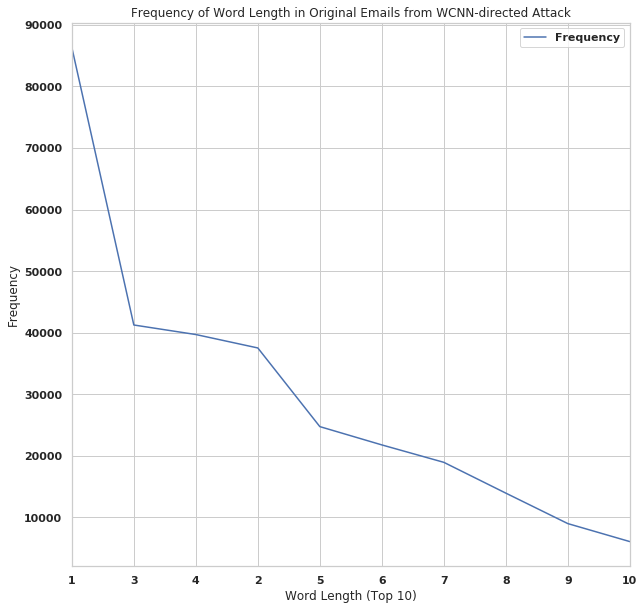

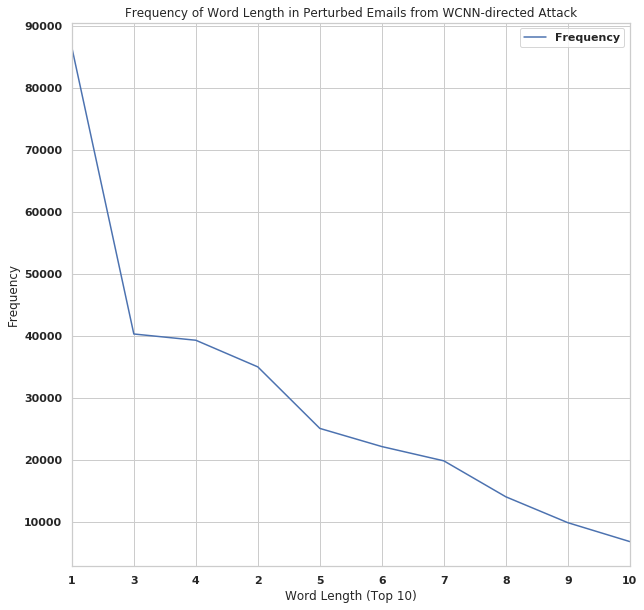

In [643]:
#Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(20,10))
plt.figure(3)
#plt.subplot(121)
Top10sort_by_Freq_wordlength_origCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.title('Frequency of Word Length in Original Emails from WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')
#plt.subplot(122)
Top10sort_by_Freq_wordlength_pertCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.title('Frequency of Word Length in Perturbed Emails from WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')

In [853]:
Top10sort_by_Freq_wordlength_origCNN

Word Length  Frequency
2            1      86336
7            3      41240
6            4      39691
5            2      37509
23           5      24732
8            6      21759
4            7      18929
20           8      13925
24           9       8975
21          10       6052

## Merging the two plots

In [856]:
x1 = ["1", "3", "4", "2", "5", "6", "7", "8", "9", "10"]
y1 = Top10sort_by_Freq_wordlength_origCNN["Frequency"].tolist()
y2 = Top10sort_by_Freq_wordlength_pertCNN["Frequency"].tolist()

<Figure size 1440x1440 with 0 Axes>

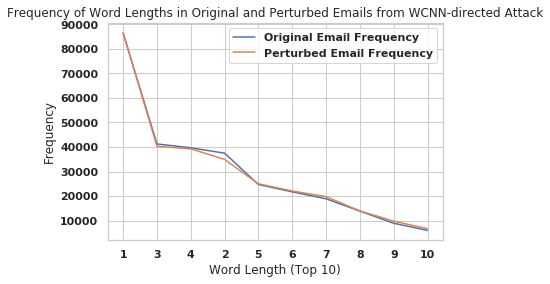

<Figure size 1440x1440 with 0 Axes>

In [864]:
#Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(20,10))
plt.figure(3)
#plt.subplot(121)
#Top10sort_by_Freq_wordlength_origCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
#Top10sort_by_Freq_wordlength_pertCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.plot(x1, y1, label = "Original Email Frequency")
plt.plot(x1, y2, label = "Perturbed Email Frequency")
#plt.figsize = (10,10)
plt.title('Frequency of Word Lengths in Original and Perturbed Emails from WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')
plt.legend()
plt.figure(figsize=(20,20))
#plt.subplot(122)

#plt.title('Frequency of Word Length in Perturbed Emails from WCNN-directed Attack')
#plt.ylabel('Frequency')
#plt.xlabel('Word Length (Top 10)')

## Dynamic Named Entity Transformations (ABANDONED, CAN BE SKIPPED OVER)

In [ ]:
def ReturnEntList(x):
    NLPtestobject = nlp(x)
    NameEntWordTest = []
    #MiniNamedEntList = []
    for ent in NLPtestobject.ents:
        #NameEntWordTest.append(ent.text)
        #MiniNamedEntList.append(ent.text)
        MiniNamedEntList = [ent.text, ent.start_char, ent.end_char, ent.label_]
        #MiniNamedEntList.append(ent.text, ent.start_char, ent.end_char, ent.label_)
        NameEntWordTest.append(MiniNamedEntList)
    
    return NameEntWordTest
    
print(ReturnEntList(wordtest))
print(ReturnEntList(wordtest2))
print(ReturnEntList(wordtest3))
print(ReturnEntList(wordtest4))
print(ReturnEntList(wordtest5))

In [656]:
# wordtest = "The"
# wordtest2 = "Benjamin made $40 and he stole from ronny"
# wordtest3 = "Billy made $40 and he stole from ronny who lives in the UK"
# wordtest4 = "Billie made $40 and he stole from ronny who lives in the UK"
# wordtest5="Berlin"

emailtest1 = CNNwholeCohenDdataframe['OriginalEmail'].iloc[0]
emailtest2 = CNNwholeCohenDdataframe['PerturbEmail'].iloc[0]

def ReturnDiffEnt(Email1, Email2):
    
    OrigEmail = nlp(Email1)
    PerturbEmail = nlp(Email2)
    
    TokensEmail1 = []
    for token in OrigEmail:
        TokenPOSpair = [token.text, token.token.pos_]
        TokensEmail1.append(TokenPOSpair)
        
    TokensEmail2 = []
    for token in PerturbEmail:
        TokenPOSpair = [token.text, token.token.pos_]
        TokensEmail2.append(TokenPOSpair)
        
        
        

[]
[['Benjamin', 0, 8, 'GPE'], ['40', 15, 17, 'MONEY']]
[['40', 12, 14, 'MONEY'], ['ronny', 33, 38, 'PERSON'], ['UK', 56, 58, 'GPE']]
[['40', 13, 15, 'MONEY'], ['UK', 57, 59, 'GPE']]
[['Berlin', 0, 6, 'GPE']]


In [ ]:
# ilocIndex = 0
# for i in range(CNNwholeCohenDdataframe.shape[0]):
    
#     ilocIndex+=1

# NOW IT IS TIME TO REPEAT ALL THE ABOVE ANALYSES BUT FOR THE LSTM

In [112]:
# reading the LSTM output
LSTMMasterList = []
with open("VladsOutputLSTM.txt", "r", errors='ignore') as file:
    TrecLines = file.readlines()
    
    LSTMSample = []
    LineCount = 0
    for line in TrecLines:
            LineCount +=1
            
            x = line.strip()
            
            if "Original Label" in x:
                if len(LSTMSample) != 0: #because for the first line, lstmsample length is zero
                    LSTMMasterList.append(LSTMSample)
                    LSTMSample = []
                    LSTMSample.append(x)
                #else: LSTMSample.append(x)
            
            else:
                LSTMSample.append(x)



print(len(LSTMMasterList))

7634


In [113]:
print(len(LSTMMasterList))

7634


In [115]:
print(LSTMMasterList[-1])

['Original Label 1', 'Original words:', 'X-MIME-Autoconverted: from quoted-printable to 8bit by flax9.uwaterloo.ca id l66B0EL9006817 Hello, as I wrote I call sqlFetch(channel,"t_studie") and this function generates in the background the concrete query. How can I view/log/... the concrete query? Regards, Bernhard > -----Original Message----- > From: DUPREZ Cdric [mailto:cedric.duprez@ifn.fr] > Sent: Friday, July 06, 2007 11:59 AM > To: Bernhard Wellhfer > Cc: r-help@stat.math.ethz.ch > Subject: RE: [R] RODBC problem > > Hello, > > The problem seems to be in the query syntax. > Can you show us the query you are trying to perform ? > > Regards, > > Cedric > > -----Message d\'origine----- > De: r-help-bounces@stat.math.ethz.ch > [mailto:r-help-bounces@stat.math.ethz.ch] De la part de > Bernhard Wellhfer > Envoy: vendredi 6 juillet 2007 11:45 > : r-help@stat.math.ethz.ch > Objet: [R] RODBC problem > > Hello, > > I use a RODBC connection to a MySQL server on a Debian > machine. The call to o

In [ ]:
# one email strangely would not add to the list, so i added it manually. It can be reconstructed from the output below if one wishes

In [124]:
lastlstmsample = []
with open("lastlstmthatwouldntadd.txt", "r", errors='ignore') as file:
    TrecLines = file.readlines()
    
    #LSTMSample = []
    LineCount = 0
    for line in TrecLines:
            LineCount +=1
            
            x = line.strip()
            lastlstmsample.append(x)
            
#             if "Original Label" in x:
#                 if len(LSTMSample) != 0: #because for the first line, lstmsample length is zero
#                     LSTMMasterList.append(LSTMSample)
#                     LSTMSample = []
#                     LSTMSample.append(x)
#                 else: LSTMSample.append(x)
            
#             else:
#                 LSTMSample.append(x)
print(lastlstmsample)

['Original Label 0', 'Original words:', 'Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAAAAgIAAgACAgICAgMDAwP8AAAD/AP//AAAA//8A/wD/ /////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMwAAZgAAmQAAzAAA/wAzAAAzMwAzZgAzmQAzzAAz/wBm AABmMwBmZgBmmQBmzABm/wCZAACZMwCZZgCZmQCZzACZ/wDMAADMMwDMZgDMmQDMzADM/wD/AAD/ MwD/ZgD/mQD/zAD//zMAADMAMzMAZjMAmTMAzDMA/zMzADMzMzMzZjMzmTMzzDMz/zNmADNmMzNm ZjNmmTNmzDNm/zOZADOZMzOZZjOZmTOZzDOZ/zPMADPMMzPMZjPMmTPMzDPM/zP/ADP/MzP/ZjP/ mTP/zDP//2YAAGYAM2YAZmYAmWYAzGYA/2YzAGYzM2YzZmYzmWYzzGYz/2ZmAGZmM2ZmZmZmmWZm zGZm/2aZAGaZM2aZZmaZmWaZzGaZ/2bMAGbMM2bMZmbMmWbMzGbM/2b/AGb/M2b/Zmb/mWb/zGb/ /5kAAJkAM5kAZpkAmZkAzJkA/5kzAJkzM5kzZpkzmZkzzJkz/5lmAJlmM5lmZplmmZlmzJlm/5mZ AJmZM5mZZpmZmZmZzJmZ/5nMAJnMM5nMZpnMmZnMzJnM/5n/AJn/M5n/Zpn/mZn/zJn//8wAAMwA M8wAZswAmcwAzMwA/8wzAMwzM8wzZswzmcwzzMwz/8xmAMxmM8xmZsxmmcxmzMxm/8yZAMyZM8yZ ZsyZmcyZzMyZ/8zMAMzMM8zMZszMmczMzMzM/8z/AMz/M8z/Zsz/mcz/zMz///8AAP8AM/8AZv8A mf8AzP8A//8zAP8zM/8zZv8

In [125]:
LSTMMasterList.append(lastlstmsample)
print(LSTMMasterList[-1])

['Original Label 0', 'Original words:', 'Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAAAAgIAAgACAgICAgMDAwP8AAAD/AP//AAAA//8A/wD/ /////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMwAAZgAAmQAAzAAA/wAzAAAzMwAzZgAzmQAzzAAz/wBm AABmMwBmZgBmmQBmzABm/wCZAACZMwCZZgCZmQCZzACZ/wDMAADMMwDMZgDMmQDMzADM/wD/AAD/ MwD/ZgD/mQD/zAD//zMAADMAMzMAZjMAmTMAzDMA/zMzADMzMzMzZjMzmTMzzDMz/zNmADNmMzNm ZjNmmTNmzDNm/zOZADOZMzOZZjOZmTOZzDOZ/zPMADPMMzPMZjPMmTPMzDPM/zP/ADP/MzP/ZjP/ mTP/zDP//2YAAGYAM2YAZmYAmWYAzGYA/2YzAGYzM2YzZmYzmWYzzGYz/2ZmAGZmM2ZmZmZmmWZm zGZm/2aZAGaZM2aZZmaZmWaZzGaZ/2bMAGbMM2bMZmbMmWbMzGbM/2b/AGb/M2b/Zmb/mWb/zGb/ /5kAAJkAM5kAZpkAmZkAzJkA/5kzAJkzM5kzZpkzmZkzzJkz/5lmAJlmM5lmZplmmZlmzJlm/5mZ AJmZM5mZZpmZmZmZzJmZ/5nMAJnMM5nMZpnMmZnMzJnM/5n/AJn/M5n/Zpn/mZn/zJn//8wAAMwA M8wAZswAmcwAzMwA/8wzAMwzM8wzZswzmcwzzMwz/8xmAMxmM8xmZsxmmcxmzMxm/8yZAMyZM8yZ ZsyZmcyZzMyZ/8zMAMzMM8zMZszMmczMzMzM/8z/AMz/M8z/Zsz/mcz/zMz///8AAP8AM/8AZv8A mf8AzP8A//8zAP8zM/8zZv8

In [126]:
print(len(LSTMMasterList))

7635


In [127]:
NewLSTMMasterWithoutEmptyElements = []
#index = 0
for i in LSTMMasterList:
    #NewCNNMasterWithoutEmptyElements.append(i)
    #for j in NewCNNMasterWithoutEmptyElements[index]:
    EachSample = []
    ChangedLabel = 0
    for j in i:
        #if "" in j: NewCNNMasterWithoutEmptyElements[index].remove('')
        if j != "" and ("Finished Attacking This Sample" not in j): # ignoring empty elements and lines with Finished Attacking This Sample
            if j == 'ChaNGed LaBEl YESSS': # indicated if the email caused misclassification
                ChangedLabel += 1
                # i do this because ChaNGed LaBEl YESSS sometimes was printed over 10+ times
                if ChangedLabel == 1: EachSample.append(j) 
            else: EachSample.append(j)
        
    NewLSTMMasterWithoutEmptyElements.append(EachSample)
    #index +=1

print(len(NewLSTMMasterWithoutEmptyElements))

7635


In [128]:
Allpossiblelengths3 = []
#index = 0
for i in NewLSTMMasterWithoutEmptyElements:
    if len(i) not in Allpossiblelengths3: Allpossiblelengths3.append(len(i))
    
print(Allpossiblelengths3) # this is like the WCNN attack (4 and 5 lengths signify failues to deploy attacks, 6 signals email was perturbed but did not cause misclassification, 7 means perturbed and caused misclassifcation)

[5, 6, 4, 7]


In [ ]:
# working out how many initially the lstm model incorrectly classified (so attack deployment was abandoned)

In [129]:
BadLabel2 = []
#countr = 0
for i in NewLSTMMasterWithoutEmptyElements:
    IndividSample = []
    for j in i:
        if "Attack failed" in i[-1]:
            IndividSample.append(i[0])
            IndividSample.append(i[-1])
            break
    if len(IndividSample) > 0: BadLabel2.append(IndividSample)
print(len(BadLabel2))

4917


In [130]:
LSTMSpamMisclassified = 0
LSTMHamMisclassified = 0

for i in BadLabel2:
    #NB 0 is spam and 1 is ham
    if (i[0] == "Original Label 0") and (i[-1] == "Attack failed:Initial predicted label was wrong"):
        LSTMSpamMisclassified +=1
    if (i[0] == "Original Label 1") and (i[-1] == "Attack failed:Initial predicted label was wrong"):
        LSTMHamMisclassified +=1
print(LSTMSpamMisclassified)
print(LSTMHamMisclassified)

20
13


In [ ]:
# numver of words changed

In [131]:
LSTMNumWordsChanged = []
LSTMMisclassify = []
for i in NewLSTMMasterWithoutEmptyElements:
    jIndex = 0
    MiniList = []
    MiniList2 = []
    for j in i:
        if "NuMBer WoRds ChaNGed " in j: # if the attack was executed
            if "NuMBer WoRds ChaNGed 0" not in j: # because on 48 occasions no words were changed at all
                if (i[0] == "Original Label 0"): #0 means spam, 1 means ham
                    MiniList.append("Spam")
                    MiniList2.append("Spam")
                    Splitj = i[jIndex].split()
                    MiniList.append(int(Splitj[-1]))
                    if 'ChaNGed LaBEl YESSS' in i: # if the attack was successful in causing misclassification
                        MiniList2.append("Yes")
                    else: MiniList2.append("No")
                else: 
                    MiniList.append("Ham")
                    MiniList2.append("Ham")
                    Splitj = i[jIndex].split()
                    MiniList.append(int(Splitj[-1]))
                    if 'ChaNGed LaBEl YESSS' in i:
                        MiniList2.append("Yes")
                    else: MiniList2.append("No")
            #NumWordsChanged.append(i[jIndex])
        jIndex +=1
     
    if len(MiniList) != 0: LSTMNumWordsChanged.append(MiniList)
    if len(MiniList2) != 0: LSTMMisclassify.append(MiniList2)
print(len(LSTMNumWordsChanged))
print(len(LSTMMisclassify))

2673
2673


In [132]:
# preparation for violin plots for number of words perturbed per email
LabelListForLSTMViolPlot = []
NumChangedListForLSTMViolPlot = []
MisclassifyListForLSTMViolPlot = []
for i in LSTMMisclassify:
    LabelListForLSTMViolPlot.append(i[0])
    MisclassifyListForLSTMViolPlot.append(i[1])
for i in LSTMNumWordsChanged:
    NumChangedListForLSTMViolPlot.append(i[1])

LSTMViolPlotDict = {
    "Original Label": LabelListForLSTMViolPlot,
    "Misclassify": MisclassifyListForLSTMViolPlot,
    "Number of Words Changed": NumChangedListForLSTMViolPlot
}

LSTMViolDF = pd.DataFrame(LSTMViolPlotDict)

In [300]:
MisclassifyListForLSTMViolPlot[:5]

['No', 'No', 'No', 'No', 'Yes']

In [138]:
indexForThis = 0
lstmlistofLessthanzero = []
for i in NumChangedListForLSTMViolPlot:
    if i < 0: lstmlistofLessthanzero.append(i)
    indexForThis +=1
print(len(lstmlistofLessthanzero))

0


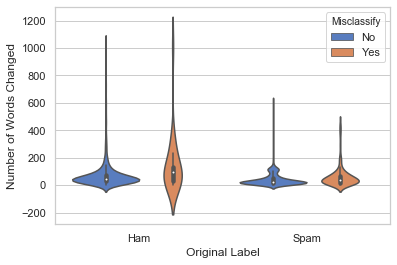

In [133]:
ax = sns.violinplot(x="Original Label", y="Number of Words Changed", hue="Misclassify",

                    data=LSTMViolDF, palette="muted")

In [298]:
LSTMNumWordsChanged[:5]

[['Ham', 18], ['Spam', 188], ['Spam', 5], ['Spam', 148], ['Spam', 19]]

In [134]:
LSTMSpamNumChangedWords = []
LSTMHamNumChangedWords = []
for i in LSTMNumWordsChanged:
    if i[0] == "Spam":
        LSTMSpamNumChangedWords.append(i[1])
    else:
        LSTMHamNumChangedWords.append(i[1])
print(len(LSTMSpamNumChangedWords))
print(len(LSTMHamNumChangedWords))

1388
1285


### total number of words perturbed, disaggregated by spam and ham

In [299]:
TotalNumLSTMWordChanged = 0
SpamNumChangeLSTM = 0
HamNumChangeLSTM = 0

for i in LSTMSpamNumChangedWords:
    TotalNumLSTMWordChanged+=i
    SpamNumChangeLSTM+=i
for i in LSTMHamNumChangedWords:
    TotalNumLSTMWordChanged+=i
    HamNumChangeLSTM+=i
print(TotalNumLSTMWordChanged)
print(SpamNumChangeLSTM)
print(HamNumChangeLSTM)

163181
64692
98489


In [ ]:
# making a list with [original email label, caused misclassification?, number of words perturbed]

In [302]:
LSTMLabelMisclassifyNumChangeList = []
#MisclassifyListForLSTMViolPlot
IndexToNavigate = 0
for i in LSTMNumWordsChanged:
    Listtoaddtolstmlist = []
    Listtoaddtolstmlist.append(i[0])
    Listtoaddtolstmlist.append(MisclassifyListForLSTMViolPlot[IndexToNavigate])
    Listtoaddtolstmlist.append(i[1])
    IndexToNavigate+=1
    LSTMLabelMisclassifyNumChangeList.append(Listtoaddtolstmlist)
print(len(LSTMLabelMisclassifyNumChangeList))

2673


In [303]:
LSTMLabelMisclassifyNumChangeList[:2]

[['Ham', 'No', 18], ['Spam', 'No', 188]]

In [ ]:
# disaggregating number of words perturbed by spam/ham, correctly classified/misclassified and then
# ham or spam causing misclassification, and perturbed ham and spam which were correctly classified

In [304]:
MisclassifyYesLSTM = []
MisclassifyNoLSTM = []

MisclassifyYesOrigSpamLSTM =[]
MisclassifyYesOrigHamLSTM =[]

MisclassifyNoOrigSpamLSTM =[]
MisclassifyNoOrigHamLSTM =[]

for i in LSTMLabelMisclassifyNumChangeList:
    #if misclassify
    if i[1] == "Yes":
        MisclassifyYesLSTM.append(i[-1])
        
        if i[0] == "Spam":
            MisclassifyYesOrigSpamLSTM.append(i[-1])
        else:
            MisclassifyYesOrigHamLSTM.append(i[-1])
        
    else:
        MisclassifyNoLSTM.append(i[-1])
        
        if i[0] == "Spam":
            MisclassifyNoOrigSpamLSTM.append(i[-1])
        else:
            MisclassifyNoOrigHamLSTM.append(i[-1])
            
print(len(MisclassifyYesLSTM)) # should be 285
print(len(MisclassifyNoLSTM)) # should be 2673-285 = 2387
print(len(MisclassifyYesOrigSpamLSTM)) # should be 261
print(len(MisclassifyYesOrigHamLSTM)) # should be 285
print(len(MisclassifyNoOrigSpamLSTM)) # should be 1127-261 = 1127
print(len(MisclassifyNoOrigHamLSTM)) #should be 1285 - 25

286
2387
261
25
1127
1260


In [ ]:
# working out means and standard deviations for the six different scenarios

In [305]:
x = statistics.mean(MisclassifyYesLSTM)
print(x)
a = statistics.stdev(MisclassifyYesLSTM)
print(a)

69.42307692307692
98.05987801396329


In [306]:
x = statistics.mean(MisclassifyYesOrigSpamLSTM)
print(x)
a = statistics.stdev(MisclassifyYesOrigSpamLSTM)
print(a)

62.206896551724135
77.36210629705076


In [307]:
x = statistics.mean(MisclassifyYesOrigHamLSTM)
print(x)
a = statistics.stdev(MisclassifyYesOrigHamLSTM)
print(a)

144.76
207.05580568210752


In [308]:
x = statistics.mean(MisclassifyNoLSTM)
print(x)
a = statistics.stdev(MisclassifyNoLSTM)
print(a)

60.04440720569753
85.12282259035243


In [309]:
x = statistics.mean(MisclassifyNoOrigSpamLSTM)
print(x)
a = statistics.stdev(MisclassifyNoOrigSpamLSTM)
print(a)

42.995563442768415
53.19331160477253


In [310]:
x = statistics.mean(MisclassifyNoOrigHamLSTM)
print(x)
a = statistics.stdev(MisclassifyNoOrigHamLSTM)
print(a)

75.2936507936508
103.48218123985951


In [136]:
print(len(LSTMMisclassify))

2673


In [135]:
LSTMSpamNumMisclassify = 0
LSTMHamNumMisclassify = 0
countr = 0
for i in LSTMMisclassify:
        countr+=1
    #for j in i:
        if countr < 5: print(i)
        if i[0] == "Spam":
            if i[1] == "Yes":
                LSTMSpamNumMisclassify +=1
        elif i[0] == "Ham":
            if i[1] == "Yes":
                LSTMHamNumMisclassify +=1
print(LSTMSpamNumMisclassify)
print(LSTMHamNumMisclassify)

['Ham', 'No']
['Spam', 'No']
['Spam', 'No']
['Spam', 'No']
261
25


In [137]:
print("this is for spam")
x = statistics.mean(LSTMSpamNumChangedWords)
print(x)

y = statistics.median(LSTMSpamNumChangedWords)
print(y)

z = statistics.mode(LSTMSpamNumChangedWords)
print(z)

a = statistics.stdev(LSTMSpamNumChangedWords)
print(a)

b = statistics.variance(LSTMSpamNumChangedWords)
print(b)

this is for spam
46.60806916426513
28.0
32
58.95226026504111
3475.368990357145


In [139]:
print("this is for ham")
x = statistics.mean(LSTMHamNumChangedWords)
print(x)

y = statistics.median(LSTMHamNumChangedWords)
print(y)

z = statistics.mode(LSTMHamNumChangedWords)
print(z)

a = statistics.stdev(LSTMHamNumChangedWords)
print(a)

b = statistics.variance(LSTMHamNumChangedWords)
print(b)

this is for ham
76.64513618677043
46
25
106.74051491819266
11393.53752500091


## Constructing [original word, perturb word, original label, misclassify?] list as done above with CNN

In [314]:
print(NewLSTMMasterWithoutEmptyElements[23])

['Original Label 0', 'Original words:', 'I Want My 500 Dollar Macy*s Gift Card I Want My 500 Dollar Macy*s Gift Card GreatAmericanGiveaways is an independent rewards program and holds no affiliation with any of the listed products or their companies. This promotion is sponsored by Great American Giveaways and is subject to participation terms and the conditions. Please see site for details. To stop receiving announcements from GreatAmericanGiveaways from GreatAmericanGiveawaysGreat American Giveaways 650 5th St. #311 San Francisco, CA 94107 ______________________________________________________ --mg_boundary-583044-180985--ChaNGed LaBEl YESSS', 'ChaNGed LaBEl YESSS', 'LeiAdvEx', 'I Want My 5000 Dollar Macy*s Gift Card I Want My 50 Dollar Macy*s Gift Card GreatAmericanGiveaways becomes an independent rewards programme or holds no. descent with any of the listed outputs or their companies. This promocion is funded for Great American Giveaways and is subject to participation terms and the

In [322]:
# a little test 
string1 = "applesnappleChaNGed LaBEl YESSS"
print(string1)
string2 = "pples"
if string2 in string1:
    print("yes")
    string1 = string1[:-19]
print(string1)

applesnappleChaNGed LaBEl YESSS
yes
applesnapple


In [320]:
#another little test
listttttest = [1, "baby", 2, "people"]
print(listttttest)
listttttest[2] = "bambino"
print(listttttest)

[1, 'baby', 2, 'people']
[1, 'baby', 'bambino', 'people']


In [323]:
for i in NewLSTMMasterWithoutEmptyElements:
    if "NuMBer WoRds ChaNGed " in i[-1]: # if attack perturbed the email
        if "NuMBer WoRds ChaNGed 0" not in i[-1]: # if there was at least one perturbation in email
            #I noticed this was an issue as I ran into errors
            if 'ChaNGed LaBEl YESSS' in i[2]: # if attack was successful in causing misclassification
                OldString = i[2]
                NewStringwithoutChaNGedLaBElYESSS = OldString[:-19] # i remove any instance of ChaNGed LaBEl YESSS at the end of a string
                i[2] = NewStringwithoutChaNGedLaBElYESSS
            if 'ChaNGed LaBEl YESSS' in i[-2]:
                OldString = i[-2]
                NewStringwithoutChaNGedLaBElYESSS = OldString[:-19]
                i[-2] = NewStringwithoutChaNGedLaBElYESSS

In [324]:
print(NewLSTMMasterWithoutEmptyElements[23])

['Original Label 0', 'Original words:', 'I Want My 500 Dollar Macy*s Gift Card I Want My 500 Dollar Macy*s Gift Card GreatAmericanGiveaways is an independent rewards program and holds no affiliation with any of the listed products or their companies. This promotion is sponsored by Great American Giveaways and is subject to participation terms and the conditions. Please see site for details. To stop receiving announcements from GreatAmericanGiveaways from GreatAmericanGiveawaysGreat American Giveaways 650 5th St. #311 San Francisco, CA 94107 ______________________________________________________ --mg_boundary-583044-180985--', 'ChaNGed LaBEl YESSS', 'LeiAdvEx', 'I Want My 5000 Dollar Macy*s Gift Card I Want My 50 Dollar Macy*s Gift Card GreatAmericanGiveaways becomes an independent rewards programme or holds no. descent with any of the listed outputs or their companies. This promocion is funded for Great American Giveaways and is subject to participation terms and the activities. Please

In [344]:
print(NewLSTMMasterWithoutEmptyElements[0])
#the first sample is missing its label for some reason

NewLSTMMasterWithoutEmptyElements[0].insert(0, "Original Label 1")
print(NewLSTMMasterWithoutEmptyElements[0])

['Original words:', 'Hi, i\'ve just updated from the gulus and I check on other mirrors. It seems there is a little typo in /debian/README file Example: http://gulus.usherbrooke.ca/debian/README ftp://ftp.fr.debian.org/debian/README "Testing, or lenny. Access this release through dists/testing. The current tested development snapshot is named etch. Packages which have been tested in unstable and passed automated tests propogate to this release." etch should be replace by lenny like in the README.html -- Yan Morin Consultant en logiciel libre yan.morin@savoirfairelinux.com 514-994-1556 -- To UNSUBSCRIBE, email to debian-mirrors-REQUEST@lists.debian.org with a subject of "unsubscribe". Trouble? Contact listmaster@lists.debian.org', 'LeiAdvEx', 'Hi, i\'ve solely discounted from the gulus and me check on various mirrors. he seems there is a little typo in /debian/README file Example: http://gulus.usherbrooke.ca/debian/README ftp://ftp.fr.debian.org/debian/README "Testing, or lenny. Access 

In [ ]:
# identifying the perturbed words 

In [345]:
OrigPerturbPairListLSTM = []

iCountr=0

for i in NewLSTMMasterWithoutEmptyElements:
    
    #PairList = []
    iCountr+=1
    print("this is sample number " + str(iCountr))
    if "NuMBer WoRds ChaNGed " in i[-1]:
        if "NuMBer WoRds ChaNGed 0" not in i[-1]:
            LabelMisclassifyList = []
            if (i[0] == "Original Label 0"): LabelMisclassifyList.append("Spam")
            else: LabelMisclassifyList.append("Ham")
            
            if 'ChaNGed LaBEl YESSS' in i: LabelMisclassifyList.append("Yes")
            else: LabelMisclassifyList.append("No")
            
            OriginalWords = i[2].split()
            PerturbWords = i[-2].split()
            WordIndex = 0
            
            for word in OriginalWords:
               # print("this is word number " + str(WordIndex))
               # print("this is the original WORD: " + word)
                # this means the words are clearly different so need to add to list
                PerturbWord = PerturbWords[WordIndex]
              #  print("this is the Perturb WORD: " + PerturbWord)
                if len(word) != len(PerturbWord):
                    PairList = []
                    PairList.append(word)
                    PairList.append(PerturbWords[WordIndex])
                    PairList2 = PairList + LabelMisclassifyList
                                      
                    OrigPerturbPairListLSTM.append(PairList2)
               #     if iCountr < 5: print(PairList2)
                #if the words are the same length
                else:
                    
                    CharIndex = 0
                    for character in word:
                        
                        if character != PerturbWord[CharIndex]:
                            PairList = []
                            PairList.append(word)
                            PairList.append(PerturbWords[WordIndex])
                            PairList2 = PairList + LabelMisclassifyList
                            OrigPerturbPairListLSTM.append(PairList2)
                 #           if iCountr < 5: print(PairList2)
                            break
                        
                        CharIndex +=1 
                        
                
                
                WordIndex +=1
    
print(len(OrigPerturbPairListLSTM)) #should be 163181 long i think

this is sample number 1
this is sample number 2
this is sample number 3
this is sample number 4
this is sample number 5
this is sample number 6
this is sample number 7
this is sample number 8
this is sample number 9
this is sample number 10
this is sample number 11
this is sample number 12
this is sample number 13
this is sample number 14
this is sample number 15
this is sample number 16
this is sample number 17
this is sample number 18
this is sample number 19
this is sample number 20
this is sample number 21
this is sample number 22
this is sample number 23
this is sample number 24
this is sample number 25
this is sample number 26
this is sample number 27
this is sample number 28
this is sample number 29
this is sample number 30
this is sample number 31
this is sample number 32
this is sample number 33
this is sample number 34
this is sample number 35
this is sample number 36
this is sample number 37
this is sample number 38
this is sample number 39
this is sample number 40
this is s

this is sample number 1585
this is sample number 1586
this is sample number 1587
this is sample number 1588
this is sample number 1589
this is sample number 1590
this is sample number 1591
this is sample number 1592
this is sample number 1593
this is sample number 1594
this is sample number 1595
this is sample number 1596
this is sample number 1597
this is sample number 1598
this is sample number 1599
this is sample number 1600
this is sample number 1601
this is sample number 1602
this is sample number 1603
this is sample number 1604
this is sample number 1605
this is sample number 1606
this is sample number 1607
this is sample number 1608
this is sample number 1609
this is sample number 1610
this is sample number 1611
this is sample number 1612
this is sample number 1613
this is sample number 1614
this is sample number 1615
this is sample number 1616
this is sample number 1617
this is sample number 1618
this is sample number 1619
this is sample number 1620
this is sample number 1621
t

this is sample number 3312
this is sample number 3313
this is sample number 3314
this is sample number 3315
this is sample number 3316
this is sample number 3317
this is sample number 3318
this is sample number 3319
this is sample number 3320
this is sample number 3321
this is sample number 3322
this is sample number 3323
this is sample number 3324
this is sample number 3325
this is sample number 3326
this is sample number 3327
this is sample number 3328
this is sample number 3329
this is sample number 3330
this is sample number 3331
this is sample number 3332
this is sample number 3333
this is sample number 3334
this is sample number 3335
this is sample number 3336
this is sample number 3337
this is sample number 3338
this is sample number 3339
this is sample number 3340
this is sample number 3341
this is sample number 3342
this is sample number 3343
this is sample number 3344
this is sample number 3345
this is sample number 3346
this is sample number 3347
this is sample number 3348
t

this is sample number 4344
this is sample number 4345
this is sample number 4346
this is sample number 4347
this is sample number 4348
this is sample number 4349
this is sample number 4350
this is sample number 4351
this is sample number 4352
this is sample number 4353
this is sample number 4354
this is sample number 4355
this is sample number 4356
this is sample number 4357
this is sample number 4358
this is sample number 4359
this is sample number 4360
this is sample number 4361
this is sample number 4362
this is sample number 4363
this is sample number 4364
this is sample number 4365
this is sample number 4366
this is sample number 4367
this is sample number 4368
this is sample number 4369
this is sample number 4370
this is sample number 4371
this is sample number 4372
this is sample number 4373
this is sample number 4374
this is sample number 4375
this is sample number 4376
this is sample number 4377
this is sample number 4378
this is sample number 4379
this is sample number 4380
t

this is sample number 5465
this is sample number 5466
this is sample number 5467
this is sample number 5468
this is sample number 5469
this is sample number 5470
this is sample number 5471
this is sample number 5472
this is sample number 5473
this is sample number 5474
this is sample number 5475
this is sample number 5476
this is sample number 5477
this is sample number 5478
this is sample number 5479
this is sample number 5480
this is sample number 5481
this is sample number 5482
this is sample number 5483
this is sample number 5484
this is sample number 5485
this is sample number 5486
this is sample number 5487
this is sample number 5488
this is sample number 5489
this is sample number 5490
this is sample number 5491
this is sample number 5492
this is sample number 5493
this is sample number 5494
this is sample number 5495
this is sample number 5496
this is sample number 5497
this is sample number 5498
this is sample number 5499
this is sample number 5500
this is sample number 5501
t

this is sample number 6256
this is sample number 6257
this is sample number 6258
this is sample number 6259
this is sample number 6260
this is sample number 6261
this is sample number 6262
this is sample number 6263
this is sample number 6264
this is sample number 6265
this is sample number 6266
this is sample number 6267
this is sample number 6268
this is sample number 6269
this is sample number 6270
this is sample number 6271
this is sample number 6272
this is sample number 6273
this is sample number 6274
this is sample number 6275
this is sample number 6276
this is sample number 6277
this is sample number 6278
this is sample number 6279
this is sample number 6280
this is sample number 6281
this is sample number 6282
this is sample number 6283
this is sample number 6284
this is sample number 6285
this is sample number 6286
this is sample number 6287
this is sample number 6288
this is sample number 6289
this is sample number 6290
this is sample number 6291
this is sample number 6292
t

this is sample number 7322
this is sample number 7323
this is sample number 7324
this is sample number 7325
this is sample number 7326
this is sample number 7327
this is sample number 7328
this is sample number 7329
this is sample number 7330
this is sample number 7331
this is sample number 7332
this is sample number 7333
this is sample number 7334
this is sample number 7335
this is sample number 7336
this is sample number 7337
this is sample number 7338
this is sample number 7339
this is sample number 7340
this is sample number 7341
this is sample number 7342
this is sample number 7343
this is sample number 7344
this is sample number 7345
this is sample number 7346
this is sample number 7347
this is sample number 7348
this is sample number 7349
this is sample number 7350
this is sample number 7351
this is sample number 7352
this is sample number 7353
this is sample number 7354
this is sample number 7355
this is sample number 7356
this is sample number 7357
this is sample number 7358
t

In [346]:
print(OrigPerturbPairListLSTM[:4])

[['just', 'solely', 'Ham', 'No'], ['updated', 'discounted', 'Ham', 'No'], ['I', 'me', 'Ham', 'No'], ['other', 'various', 'Ham', 'No']]


In [ ]:
# creating a dataframe for lstm original and perturbed individual words

In [347]:
LSTMorigwordList = []
LSTMperturwordList = []
LSTMorigLabelList = []
LSTMMisclassifyLabelList = []

for i in OrigPerturbPairListLSTM:
    LSTMorigwordList.append(i[0])
    LSTMperturwordList.append(i[1])
    LSTMorigLabelList.append(i[2])
    LSTMMisclassifyLabelList.append(i[3])
    
LSTMdictforDF = {
    "OriginalWord": LSTMorigwordList,
    "PerturbWord": LSTMperturwordList,
    "OriginalLabel": LSTMorigLabelList,
    "Misclassify": LSTMMisclassifyLabelList
    
}

LSTMdf = pd.DataFrame(LSTMdictforDF)
LSTMdf.head(20)

OriginalWord  PerturbWord OriginalLabel Misclassify
0          just       solely           Ham          No
1       updated   discounted           Ham          No
2             I           me           Ham          No
3         other      various           Ham          No
4            It           he           Ham          No
5       current      present           Ham          No
6        tested     verified           Ham          No
7         named    nicknamed           Ham          No
8          have          're           Ham          No
9        tested     verified           Ham          No
10           in       during           Ham          No
11     unstable    uncertain           Ham          No
12          and          nor           Ham          No
13       passed        voted           Ham          No
14        tests  experiences           Ham          No
15         etch  photoresist           Ham          No
16           en          per           Ham          No
17           --            ;           Ham          No
18           is      becomes          Spam          No
19           on          for          Spam          No

In [ ]:
#LengthOrig 	LengthPert 	SentimentOrig 	SentimentPert 	SyllableOrig 	SyllablePert

In [348]:
#check if ChaNGed or LaBEl or YESSS within perturb or original

#this method was got from https://stackoverflow.com/questions/21319929/how-to-determine-whether-a-pandas-column-contains-a-particular-value
print(LSTMdf[LSTMdf['OriginalWord']=='ChaNGed'].index.tolist())
print(LSTMdf[LSTMdf['OriginalWord']=='LaBEl'].index.tolist())
print(LSTMdf[LSTMdf['OriginalWord']=='YESSS'].index.tolist())

print(LSTMdf[LSTMdf['PerturbWord']=='ChaNGed'].index.tolist())
print(LSTMdf[LSTMdf['PerturbWord']=='LaBEl'].index.tolist())
print(LSTMdf[LSTMdf['PerturbWord']=='YESSS'].index.tolist())

#since 6 empty lists are printed, those words were not in there

#LeiAdvEx
print(LSTMdf[LSTMdf['OriginalWord']=='LeiAdvEx'].index.tolist())
print(LSTMdf[LSTMdf['PerturbWord']=='LeiAdvEx'].index.tolist())

[]
[]
[]
[]
[]
[]
[]
[]


In [349]:
# adding column for length of original word
LSTMdf["LengthOrig"] = LSTMdf["OriginalWord"].apply(lambda x: len(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig
0         just      solely           Ham          No           4
1      updated  discounted           Ham          No           7
2            I          me           Ham          No           1
3        other     various           Ham          No           5
4           It          he           Ham          No           2
5      current     present           Ham          No           7
6       tested    verified           Ham          No           6
7        named   nicknamed           Ham          No           5
8         have         're           Ham          No           4
9       tested    verified           Ham          No           6

In [350]:
# adding column for length of  perturbed word
LSTMdf["LengthPert"] = LSTMdf["PerturbWord"].apply(lambda x: len(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert
0         just      solely           Ham          No           4           6
1      updated  discounted           Ham          No           7          10
2            I          me           Ham          No           1           2
3        other     various           Ham          No           5           7
4           It          he           Ham          No           2           2
5      current     present           Ham          No           7           7
6       tested    verified           Ham          No           6           8
7        named   nicknamed           Ham          No           5           9
8         have         're           Ham          No           4           3
9       tested    verified           Ham          No           6           8

In [351]:
# adding column for sentiment of original  word
LSTMdf["SentimentOrig"] = LSTMdf["OriginalWord"].apply(lambda x: SentimentText(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert  \
0         just      solely           Ham          No           4           6   
1      updated  discounted           Ham          No           7          10   
2            I          me           Ham          No           1           2   
3        other     various           Ham          No           5           7   
4           It          he           Ham          No           2           2   
5      current     present           Ham          No           7           7   
6       tested    verified           Ham          No           6           8   
7        named   nicknamed           Ham          No           5           9   
8         have         're           Ham          No           4           3   
9       tested    verified           Ham          No           6           8   

   SentimentOrig  
0          0.000  
1          0.000  
2          0.000  
3         -0.125  
4          0.000  
5          0.000  
6          0.000  
7          0.000  
8          0.000  
9          0.000

In [352]:
# adding column for sentiment of perturbed  word
LSTMdf["SentimentPert"] = LSTMdf["PerturbWord"].apply(lambda x: SentimentText(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert  \
0         just      solely           Ham          No           4           6   
1      updated  discounted           Ham          No           7          10   
2            I          me           Ham          No           1           2   
3        other     various           Ham          No           5           7   
4           It          he           Ham          No           2           2   
5      current     present           Ham          No           7           7   
6       tested    verified           Ham          No           6           8   
7        named   nicknamed           Ham          No           5           9   
8         have         're           Ham          No           4           3   
9       tested    verified           Ham          No           6           8   

   SentimentOrig  SentimentPert  
0          0.000            0.0  
1          0.000            0.0  
2          0.000            0.0  
3         -0.125            0.0  
4          0.000            0.0  
5          0.000            0.0  
6          0.000            0.0  
7          0.000            0.0  
8          0.000            0.0  
9          0.000            0.0

In [353]:
# adding column for syllables within original word
LSTMdf["SyllableOrig"] = LSTMdf["OriginalWord"].apply(lambda x: syllables_count(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert  \
0         just      solely           Ham          No           4           6   
1      updated  discounted           Ham          No           7          10   
2            I          me           Ham          No           1           2   
3        other     various           Ham          No           5           7   
4           It          he           Ham          No           2           2   
5      current     present           Ham          No           7           7   
6       tested    verified           Ham          No           6           8   
7        named   nicknamed           Ham          No           5           9   
8         have         're           Ham          No           4           3   
9       tested    verified           Ham          No           6           8   

   SentimentOrig  SentimentPert  SyllableOrig  
0          0.000            0.0             1  
1          0.000            0.0             3  
2          0.000            0.0             1  
3         -0.125            0.0             2  
4          0.000            0.0             1  
5          0.000            0.0             2  
6          0.000            0.0             2  
7          0.000            0.0             1  
8          0.000            0.0             1  
9          0.000            0.0             2

In [354]:
# adding column for syllables within perturbed word
LSTMdf["SyllablePert"] = LSTMdf["PerturbWord"].apply(lambda x: syllables_count(x))
LSTMdf.head(20)

OriginalWord  PerturbWord OriginalLabel Misclassify  LengthOrig  \
0          just       solely           Ham          No           4   
1       updated   discounted           Ham          No           7   
2             I           me           Ham          No           1   
3         other      various           Ham          No           5   
4            It           he           Ham          No           2   
5       current      present           Ham          No           7   
6        tested     verified           Ham          No           6   
7         named    nicknamed           Ham          No           5   
8          have          're           Ham          No           4   
9        tested     verified           Ham          No           6   
10           in       during           Ham          No           2   
11     unstable    uncertain           Ham          No           8   
12          and          nor           Ham          No           3   
13       passed        voted           Ham          No           6   
14        tests  experiences           Ham          No           5   
15         etch  photoresist           Ham          No           4   
16           en          per           Ham          No           2   
17           --            ;           Ham          No           2   
18           is      becomes          Spam          No           2   
19           on          for          Spam          No           2   

    LengthPert  SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  
0            6          0.000            0.0             1             2  
1           10          0.000            0.0             3             3  
2            2          0.000            0.0             1             1  
3            7         -0.125            0.0             2             3  
4            2          0.000            0.0             1             1  
5            7          0.000            0.0             2             1  
6            8          0.000            0.0             2             3  
7            9          0.000            0.0             1             2  
8            3          0.000            0.0             1             1  
9            8          0.000            0.0             2             3  
10           6          0.000            0.0             1             2  
11           9          0.000            0.0             3             3  
12           3          0.000            0.0             1             1  
13           5          0.000            0.0             1             2  
14          11          0.000            0.0             1             4  
15          11          0.000            0.0             1             3  
16           3          0.000            0.0             1             1  
17           1          0.000            0.0             0             0  
18           7          0.000            0.0             1             2  
19           3          0.000            0.0             1             1

In [428]:
# adding column for subjectivity of original word
LSTMdf["SubjectivityOrig"] = LSTMdf["OriginalWord"].apply(lambda x: SubjectivityText(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert  \
0         just      solely           Ham          No           4           6   
1      updated  discounted           Ham          No           7          10   
2            I          me           Ham          No           1           2   
3        other     various           Ham          No           5           7   
4           It          he           Ham          No           2           2   
5      current     present           Ham          No           7           7   
6       tested    verified           Ham          No           6           8   
7        named   nicknamed           Ham          No           5           9   
8         have         're           Ham          No           4           3   
9       tested    verified           Ham          No           6           8   

   SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  SubjectivityOrig  
0          0.000            0.0             1             2             0.000  
1          0.000            0.0             3             3             0.000  
2          0.000            0.0             1             1             0.000  
3         -0.125            0.0             2             3             0.375  
4          0.000            0.0             1             1             0.000  
5          0.000            0.0             2             1             0.400  
6          0.000            0.0             2             3             0.000  
7          0.000            0.0             1             2             0.000  
8          0.000            0.0             1             1             0.000  
9          0.000            0.0             2             3             0.000

In [429]:
# adding column for subjectivity of perturbed word
LSTMdf["SubjectivityPert"] = LSTMdf["PerturbWord"].apply(lambda x: SubjectivityText(x))
LSTMdf.head(10)

OriginalWord PerturbWord OriginalLabel Misclassify  LengthOrig  LengthPert  \
0         just      solely           Ham          No           4           6   
1      updated  discounted           Ham          No           7          10   
2            I          me           Ham          No           1           2   
3        other     various           Ham          No           5           7   
4           It          he           Ham          No           2           2   
5      current     present           Ham          No           7           7   
6       tested    verified           Ham          No           6           8   
7        named   nicknamed           Ham          No           5           9   
8         have         're           Ham          No           4           3   
9       tested    verified           Ham          No           6           8   

   SentimentOrig  SentimentPert  SyllableOrig  SyllablePert  SubjectivityOrig  \
0          0.000            0.0             1             2             0.000   
1          0.000            0.0             3             3             0.000   
2          0.000            0.0             1             1             0.000   
3         -0.125            0.0             2             3             0.375   
4          0.000            0.0             1             1             0.000   
5          0.000            0.0             2             1             0.400   
6          0.000            0.0             2             3             0.000   
7          0.000            0.0             1             2             0.000   
8          0.000            0.0             1             1             0.000   
9          0.000            0.0             2             3             0.000   

   SubjectivityPert  
0               0.0  
1               0.0  
2               0.0  
3               0.5  
4               0.0  
5               0.0  
6               0.0  
7               0.0  
8               0.0  
9               0.0

In [430]:
# exporting dataframe to be used in R for cohen's d estimation
LSTMdf.to_csv(r'D:\Virtual Machine Backup\LSTMOrigPerturbPairDF.csv', index = False)

In [ ]:
## percentage of common words in original and perturbed words

In [355]:
numOfRowsLSTMpertorigword = LSTMdf.shape[0]

LSTMOrigCommonSeriesObj = LSTMdf.apply(lambda x: True if x['OriginalWord'] in easy_word_set else False , axis=1)
LSTMPertCommonSeriesObj = LSTMdf.apply(lambda x: True if x['PerturbWord'] in easy_word_set else False , axis=1)

LSTMorignumOfRowsWithCommon = len(LSTMOrigCommonSeriesObj[LSTMOrigCommonSeriesObj == True].index)
LSTMPercentCommonOrig = (LSTMorignumOfRowsWithCommon/numOfRowsLSTMpertorigword)*100
print(LSTMPercentCommonOrig)

LSTMpertnumOfRowsWithCommon = len(LSTMPertCommonSeriesObj[LSTMPertCommonSeriesObj == True].index)
LSTMPercentCommonPert = (LSTMpertnumOfRowsWithCommon/numOfRowsLSTMpertorigword)*100
print(LSTMPercentCommonPert)


53.73542262885997
41.08750405990894


In [ ]:
# percent of mono, di and trisyllabic words for original words

In [357]:

# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'SyllableOrig' column is 1,2 or 3
origLSTMMONOseriesObj = LSTMdf.apply(lambda x: True if x['SyllableOrig'] == 1 else False , axis=1)
origLSTMDIseriesObj = LSTMdf.apply(lambda x: True if x['SyllableOrig'] == 2 else False , axis=1)
origLSTMTRIseriesObj = LSTMdf.apply(lambda x: True if x['SyllableOrig'] == 3 else False , axis=1)
 
# Count number of True in series
numOfRowsWithMONOlstmorig = len(origLSTMMONOseriesObj[origLSTMMONOseriesObj == True].index)
PercentMONOlstmorig = (numOfRowsWithMONOlstmorig/numOfRowsLSTMpertorigword)*100
print(PercentMONOlstmorig)
numOfRowsWithDIlstmorig = len(origLSTMDIseriesObj[origLSTMDIseriesObj == True].index)
PercentDIlstmorig = (numOfRowsWithDIlstmorig/numOfRowsLSTMpertorigword)*100
print(PercentDIlstmorig)
numOfRowsWithTRIlstmorig = len(origLSTMTRIseriesObj[origLSTMTRIseriesObj == True].index)
PercentTRIlstmorig = (numOfRowsWithTRIlstmorig/numOfRowsLSTMpertorigword)*100
print(PercentTRIlstmorig)

67.2774403882805
18.64922999613926
7.431012188919054


In [ ]:
# percent of mono, di and trisyllabic words for perturbed words

In [359]:
# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'SyllablePert' column is 1,2 or 3
pertLSTMMONOseriesObj = LSTMdf.apply(lambda x: True if x['SyllablePert'] == 1 else False , axis=1)
pertLSTMDIseriesObj = LSTMdf.apply(lambda x: True if x['SyllablePert'] == 2 else False , axis=1)
pertLSTMTRIseriesObj = LSTMdf.apply(lambda x: True if x['SyllablePert'] == 3 else False , axis=1)
 
# Count number of True in series
numOfRowsWithMONOlstmpert = len(pertLSTMMONOseriesObj[pertLSTMMONOseriesObj == True].index)
PercentMONOlstmpert = (numOfRowsWithMONOlstmpert/numOfRowsLSTMpertorigword)*100
print(PercentMONOlstmpert)
numOfRowsWithDIlstmpert = len(pertLSTMDIseriesObj[pertLSTMDIseriesObj == True].index)
PercentDIlstmpert = (numOfRowsWithDIlstmpert/numOfRowsLSTMpertorigword)*100
print(PercentDIlstmpert)
numOfRowsWithTRIlstmpert = len(pertLSTMTRIseriesObj[pertLSTMTRIseriesObj == True].index)
PercentTRIlstmpert = (numOfRowsWithTRIlstmpert/numOfRowsLSTMpertorigword)*100
print(PercentTRIlstmpert)

46.73583321587685
29.705051445940395
13.597171239298692


In [369]:
#if nothing is lowercase for original

LSTMoriginalBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['OriginalWord'] in BNCWORDListnotlowercase else False , axis=1)
LSTMOrignumOfRowsWithBNClower = len(LSTMoriginalBNCseriesObjlower[LSTMoriginalBNCseriesObjlower == True].index)
LSTMOriginPercentBNClower = (LSTMOrignumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMOriginPercentBNClower)

77.32211470698182


In [370]:
#if perturbed word not lowered
LSTMpertBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['PerturbWord'] in BNCWORDListnotlowercase else False , axis=1)
LSTMpertnumOfRowsWithBNClower = len(LSTMpertBNCseriesObjlower[LSTMpertBNCseriesObjlower == True].index)
LSTMpertPercentBNClower = (LSTMpertnumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMpertPercentBNClower)

63.31987179880011


In [372]:
# if original word is lowercased
LSTMoriginalBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['OriginalWord'].lower() in BNCWORDList else False , axis=1)
LSTMOrignumOfRowsWithBNClower = len(LSTMoriginalBNCseriesObjlower[LSTMoriginalBNCseriesObjlower == True].index)
LSTMOriginPercentBNClower = (LSTMOrignumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMOriginPercentBNClower)

81.53093803812943


In [362]:
#if original word not lowered
LSTMoriginalBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['OriginalWord'] in BNCWORDList else False , axis=1)
LSTMOrignumOfRowsWithBNClower = len(LSTMoriginalBNCseriesObjlower[LSTMoriginalBNCseriesObjlower == True].index)
LSTMOriginPercentBNClower = (LSTMOrignumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMOriginPercentBNClower)

75.97636979795442


In [371]:
# if perturbed word is lowercased
LSTMpertBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['PerturbWord'].lower() in BNCWORDList else False , axis=1)
LSTMpertnumOfRowsWithBNClower = len(LSTMpertBNCseriesObjlower[LSTMpertBNCseriesObjlower == True].index)
LSTMpertPercentBNClower = (LSTMpertnumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMpertPercentBNClower)

64.25319124162739


In [363]:
#if perturbed word not lowered
LSTMpertBNCseriesObjlower = LSTMdf.apply(lambda x: True if x['PerturbWord'] in BNCWORDList else False , axis=1)
LSTMpertnumOfRowsWithBNClower = len(LSTMpertBNCseriesObjlower[LSTMpertBNCseriesObjlower == True].index)
LSTMpertPercentBNClower = (LSTMpertnumOfRowsWithBNClower/numOfRowsLSTMpertorigword)*100
print(LSTMpertPercentBNClower)

64.25319124162739


In [ ]:
# how many original-perturbed word pairs are both in the BNC word frequency list
#make sure you now go back and execute the lowercase ones (all three lowercase ie BNC, orig and pert words)

In [373]:
CountHowManyPairBothinBNClstm = 0



IndexNavigateBNC = 0
for i in LSTMoriginalBNCseriesObjlower:
    
    if (i == True) and (i == LSTMpertBNCseriesObjlower[IndexNavigateBNC]):
        CountHowManyPairBothinBNClstm+=1 
    
    IndexNavigateBNC += 1
    
print(CountHowManyPairBothinBNClstm)

102491


## Making a list containing [frequency of original word (in BNC), POS of original word (in BNC), frequency of perturbed word (in BNC), POS of perturbed word (in BNC)]

## also another version was made for stopwords which contains [original stopword POS tag, perturbed word POS tag]

In [413]:
LSTMFreqPairList = []

# print(len(BNCWORDList))
# print(len(BNCPoSList))
# print(len(BNCFreqList))
LSTMstopwordPoschangeList = []

IndexForPert = 0
for k in LSTMoriginalBNCseriesObjlower:
    
    ListToAddtoFreqPairList = []
    ListToAddtoLSTMStopWords = []
    
    if k == True: # means that element (original word) is within the BNC list
        
        
        if LSTMpertBNCseriesObjlower[IndexForPert] == True: # means that element (perturbed word) is within the BNC list
            OriginalWord = LSTMdf['OriginalWord'].iloc[IndexForPert].lower()
            PerturbWord = LSTMdf['PerturbWord'].iloc[IndexForPert].lower()
            
            #IndexOriginalPart1 = [i for i, e in enumerate(BNCWORDList) if e == OriginalWord]   
            #just in case if it appears more than once, i take the highest frequency of appearance
            #IndexOriginalPart2 = IndexOriginalPart1[0]
            IndexOriginalPart2 = BNCWORDList.index(OriginalWord)
            IndexPertPart2 = BNCWORDList.index(PerturbWord)
        
            ListToAddtoFreqPairList.append(BNCFreqList[IndexOriginalPart2])
            ListToAddtoFreqPairList.append(BNCPoSList[IndexOriginalPart2])
            
            if OriginalWord in stopwords: 
                ListToAddtoLSTMStopWords.append(BNCPoSList[IndexOriginalPart2])
                ListToAddtoLSTMStopWords.append(BNCPoSList[IndexPertPart2])
           
            #IndexPertPart1 = [i for i, e in enumerate(BNCWORDList) if e == PerturbWord]
            #IndexPertPart2 = IndexPertPart1[0]
            
            ListToAddtoFreqPairList.append(BNCFreqList[IndexPertPart2])
            ListToAddtoFreqPairList.append(BNCPoSList[IndexPertPart2])
    
    IndexForPert+=1
    #print("this is indexforpert " + str(IndexForPert))
    if len(ListToAddtoFreqPairList) > 0: LSTMFreqPairList.append(ListToAddtoFreqPairList)
    if len(ListToAddtoLSTMStopWords) > 0: LSTMstopwordPoschangeList.append(ListToAddtoLSTMStopWords)
        
print(len(LSTMFreqPairList))

102491


In [414]:
print(len(LSTMstopwordPoschangeList))
print(LSTMstopwordPoschangeList[0:5])

65877
[['Adv', 'Adv'], ['Pron', 'Pron'], ['Adj', 'Adj'], ['Pron', 'Pron'], ['Verb', 'Verb']]


In [375]:
LSTMFreqPairList[:4]

[[1277, 'Adv', 17, 'Adv'],
 [8875, 'Pron', 1364, 'Pron'],
 [1336, 'Adj', 155, 'Adj'],
 [10875, 'Pron', 6810, 'Pron']]

In [ ]:
# working out on how many scenarios was the perturbed word less, more or equal in frequency to the original word relative to appearance in the BNC word frequency list

In [376]:
LSTMPerturbMoreCommon = 0
LSTMOriginalMoreCommon = 0
LSTMPerturbOriginalTheSameFreq = 0

for i in LSTMFreqPairList:
    if i[0] < i[2]: LSTMPerturbMoreCommon+=1
    elif i[0] > i[2]: LSTMOriginalMoreCommon+=1
    elif i[0] == i[2]: LSTMPerturbOriginalTheSameFreq+=1

print(LSTMPerturbMoreCommon)
print(LSTMOriginalMoreCommon)
print(LSTMPerturbOriginalTheSameFreq)

16946
85317
228


In [383]:
IFposthesamecountLSTM = 0
IndexWhereNotTheSameLSTM = []

CountforifsamePOSLSTM = 0
for i in LSTMFreqPairList:
    if i[1] == i[3]:
            IFposthesamecountLSTM+=1  
    else: IndexWhereNotTheSameLSTM.append(CountforifsamePOSLSTM)
          
    CountforifsamePOSLSTM +=1
    
print(IFposthesamecountLSTM)
print((IFposthesamecountLSTM)/len(LSTMFreqPairList)*100)
print(len(IndexWhereNotTheSameLSTM))
print((len(IndexWhereNotTheSameLSTM)/len(LSTMFreqPairList)*100))

86030
83.9390775775434
16461
16.060922422456606


In [384]:
print(len(IndexWhereNotTheSameLSTM))
print(IndexWhereNotTheSameLSTM[:4])

16461
[12, 15, 17, 23]


In [ ]:
# Getting the POS transformation frequencies to make a sorted bar chart

In [385]:
LSTMDictForChangedPOS = {}

LSTMPOSnameList = []
LSTMPOScountList = []


for i in IndexWhereNotTheSameLSTM:
    POSstring = ""
    OriginalWordPOS = LSTMFreqPairList[i][1]
    PertWordPOS = LSTMFreqPairList[i][-1]
    POSstring = OriginalWordPOS + ">" + PertWordPOS
    #check if POSstring in DictForChangedPOS as a key
    
    if POSstring not in LSTMPOSnameList:
        LSTMPOSnameList.append(POSstring)
        LSTMPOScountList.append(1)
    else:
        IndexForcount= LSTMPOSnameList.index(POSstring)
        LSTMPOScountList[IndexForcount] +=1
    
    if POSstring not in LSTMDictForChangedPOS:
        LSTMDictForChangedPOS[POSstring] = 1
    else:
        LSTMDictForChangedPOS[POSstring] += 1
        
print(len(LSTMDictForChangedPOS))
print(LSTMDictForChangedPOS)

print(len(LSTMPOSnameList))
print(LSTMPOSnameList)

print(len(LSTMPOScountList))
print(LSTMPOScountList)

59
{'Prep>Ord': 14, 'Det>DetP': 2560, 'Prep>Inf': 332, 'Det>NoC': 271, 'Pron>Lett': 717, 'NoC>Verb': 467, 'Prep>Verb': 140, 'Inf>Prep': 5635, 'Ord>Adv': 55, 'DetP>Adj': 779, 'Conj>Adv': 541, 'Adv>Adj': 998, 'Verb>Adj': 193, 'Ex>Adv': 270, 'Ord>DetP': 131, 'Adj>Adv': 220, 'DetP>Det': 524, 'Conj>Prep': 705, 'Verb>NoC': 456, 'Adv>DetP': 88, 'Num>NoC': 62, 'DetP>Adv': 61, 'Adv>Conj': 41, 'Prep>Conj': 203, 'Pron>NoC': 72, 'NoC>Adj': 64, 'Prep>Adj': 30, 'Conj>DetP': 75, 'Adj>Verb': 58, 'Lett>Pron': 47, 'Det>Pron': 30, 'Ord>Prep': 65, 'Adv>NoC': 8, 'Adj>DetP': 121, 'Prep>Adv': 47, 'Adv>Prep': 37, 'NoP>Adj': 2, 'Adj>NoP': 1, 'Adv>Ex': 39, 'NoC>NoP-': 19, 'Adj>NoC': 46, 'Prep>NoP': 4, 'Ord>Adj': 33, 'NoC>Pron': 48, 'NoC>NoP': 8, 'Adv>Int': 1, 'NoP->NoP': 7, 'Neg>Adv': 24, 'Adv>Neg': 28, 'NoP->NoC': 3, 'DetP>Ord': 1, 'NoC>Num': 44, 'Verb>NoP': 3, 'Verb>Prep': 4, 'Conj>NoC': 3, 'Uncl>Int': 14, 'Pron>Det': 5, 'NoP>NoP-': 5, 'NoP>Verb': 2}
59
['Prep>Ord', 'Det>DetP', 'Prep>Inf', 'Det>NoC', 'Pron>Le

In [387]:
POSdictforDFLSTM = {
    "POSchange": LSTMPOSnameList,
    "Frequency": LSTMPOScountList
}
POSdataframeLSTM = pd.DataFrame(POSdictforDFLSTM)
sort_by_FreqLSTM = POSdataframeLSTM.sort_values('Frequency',ascending=False)
print(sort_by_FreqLSTM.head(n=5))

    POSchange  Frequency
7    Inf>Prep       5635
1    Det>DetP       2560
11    Adv>Adj        998
9    DetP>Adj        779
4   Pron>Lett        717


Text(0.5, 0, 'Part-of-Speech Tag Change (Before>After)')

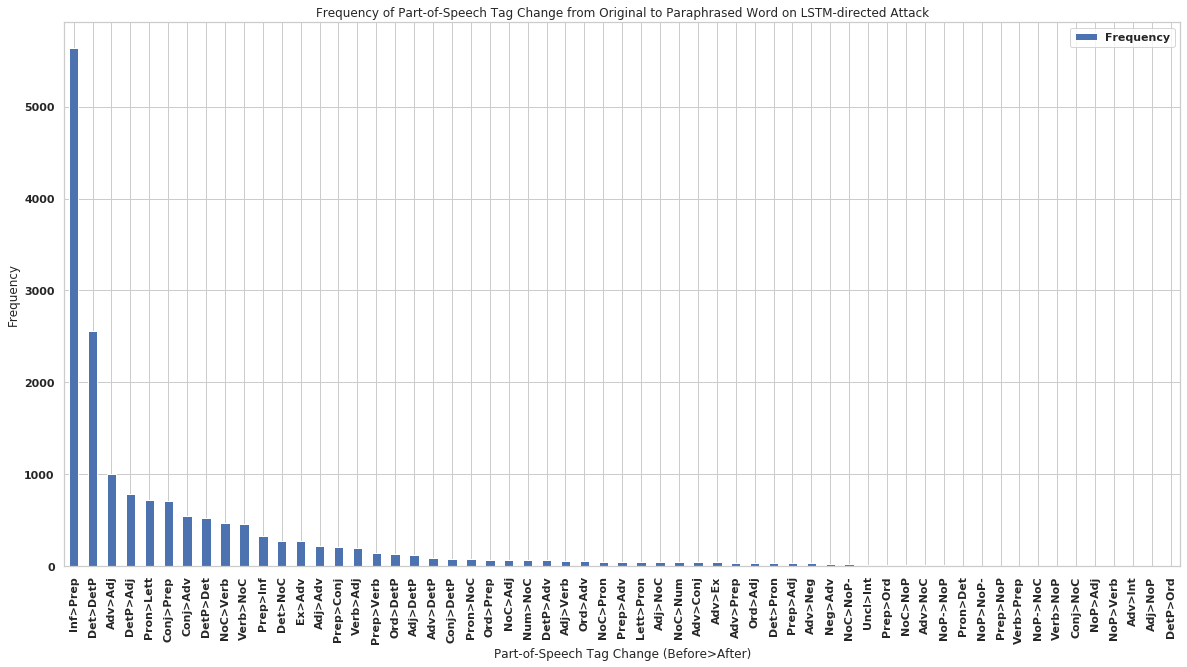

In [391]:
sort_by_FreqLSTM.plot.bar(x="POSchange", y="Frequency", figsize=(20,10))
plt.title('Frequency of Part-of-Speech Tag Change from Original to Paraphrased Word on LSTM-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag Change (Before>After)')
#ax.set_xticklabels(sort_by_Freq["Frequency"])

## Original Stopwords that were perturbed

In [412]:
#working out how many words were stopwords in the original and perturbed words

LSTMorigStopSeriesObj = LSTMdf.apply(lambda x: True if x['OriginalWord'].lower() in stopwords else False , axis=1)
LSTMpertStopSeriesObj = LSTMdf.apply(lambda x: True if x['PerturbWord'].lower() in stopwords else False , axis=1)

LSTMorignumOfRowsWithStop = len(LSTMorigStopSeriesObj[LSTMorigStopSeriesObj == True].index)
LSTMPercentStopOrig = (LSTMorignumOfRowsWithStop/numOfRowsLSTMpertorigword)*100
print(LSTMorignumOfRowsWithStop)
print(LSTMPercentStopOrig)

LSTMpertnumOfRowsWithStop = len(LSTMpertStopSeriesObj[LSTMpertStopSeriesObj == True].index)
LSTMPercentStopPert = (LSTMpertnumOfRowsWithStop/numOfRowsLSTMpertorigword)*100
print(LSTMpertnumOfRowsWithStop)
print(LSTMPercentStopPert)




70481
43.191915725482744
44287
27.139801815162308


In [ ]:
# calculating the most frequent POS tag changes for original stopwords

In [416]:
LSTMstopPOSnameList = []
LSTMstopPOScountList = []

for i in LSTMstopwordPoschangeList:
    if i[-1] not in LSTMstopPOSnameList:
        LSTMstopPOSnameList.append(i[-1])
        LSTMstopPOScountList.append(1)
    if i[-1] in LSTMstopPOSnameList:
        
        IndexForStopcount= LSTMstopPOSnameList.index(i[-1])
        #IndexForcount= POSnameList.index(POSstring)
        LSTMstopPOScountList[IndexForStopcount] +=1
        
POSdictforstopDFLSTM = {
    "POSchange": LSTMstopPOSnameList,
    "Frequency": LSTMstopPOScountList
}
POSstopdataframeLSTM = pd.DataFrame(POSdictforstopDFLSTM)
sort_by_Freq_stopLSTM = POSstopdataframeLSTM.sort_values('Frequency',ascending=False)
print(sort_by_Freq_stopLSTM.head(n=3))



  POSchange  Frequency
4      Prep      26809
5      Conj      10269
1      Pron       7863


Text(0.5, 0, 'Part-of-Speech Tag Change (Before>After)')

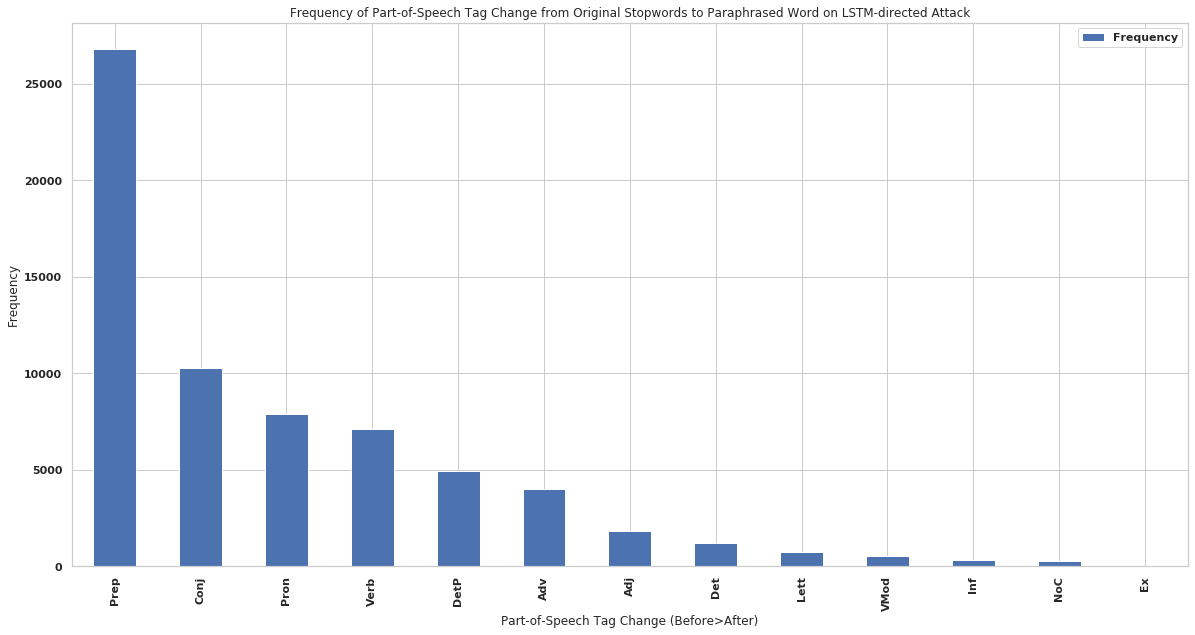

In [417]:
sort_by_Freq_stopLSTM.plot.bar(x="POSchange", y="Frequency", figsize=(20,10))
plt.title('Frequency of Part-of-Speech Tag Change from Original Stopwords to Paraphrased Word on LSTM-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Part-of-Speech Tag Change (Before>After)')

### Inspecting changes in Lemma of perturbed and original words

In [ ]:
# constucting a list containing [original word lemmatized, perturbed word lemmatized]

In [905]:
#OrigPerturbPairDF
numOfRowsLemmaLSTM = LSTMdf.shape[0]
LemmaIndex = 0

LemmOrigPertListLSTM = []

for i in range(numOfRowsLemmaLSTM):
    
    PairToAdd = []
    Orig = []
    Pert= []
    
    OriginalWord = LSTMdf["OriginalWord"].iloc[LemmaIndex].strip(string.punctuation)
    PertWord = LSTMdf["PerturbWord"].iloc[LemmaIndex].strip(string.punctuation)
    
    nlporf = nlp(OriginalWord)
    nlpPert = nlp(PertWord)
    
    for token in nlporf:
        Orig.append(token.lemma_)
        
    for token in nlpPert:
        Pert.append(token.lemma_)
        
    PairToAdd.append(Orig)
    PairToAdd.append(Pert)
    LemmOrigPertListLSTM.append(PairToAdd)
    
    LemmaIndex+=1
    
print(len(LemmOrigPertListLSTM))

163181


In [906]:
LemmOrigPertListLSTM[0]

[['just'], ['solely']]

In [907]:
# as learned in the WCNN, there are times where spacy will recognise different amount of tokens in the original and perturbed word
# so I get the index where they are different so they can be excluded
IndexDiffLengthLSTM = []

#Notsamelemma = []

IndexCountr = 0
for i in LemmOrigPertListLSTM:
    if len(i[0]) != len(i[1]):
        IndexDiffLengthLSTM.append(IndexCountr)
    IndexCountr+=1
    
print(len(IndexDiffLengthLSTM))

1257


In [909]:
# the zero lengths mean that punctuation was perturbed. So Now I wish to see on how many occasions this occured
IndexCountr = 0

ZeroLemmTokenCountLSTM = 0

for i in LemmOrigPertListLSTM:
    
    if IndexCountr not in IndexDiffLengthLSTM:
        #print(i[0], i[1])
        #if len(i[0]) not in TokenLengthsLemm: TokenLengthsLemm.append(len(i[0]))
        #if len(i[0]) == 0: ZeroLemmTokenCountLSTM+=1
        if len(i[0]) == 0 or len(i[1]) == 0: ZeroLemmTokenCountLSTM+=1
    
    IndexCountr+=1
    
print((ZeroLemmTokenCountLSTM)) 

5114


In [ ]:
# here is the calculation of how many times the lemma of original and perturbed word was different

In [910]:
IndexCountr = 0

CountLemmTheSameLSTM = 0

LEmmaTokentheSameListLSTM = []

for i in LemmOrigPertListLSTM:
    #print(i)
    #print(i[0])
    if len(i[0]) == 0 or len(i[1]) == 0:
        IndexCountr+=1
        continue #skip those which were punctuation that were perturbed
    
    if IndexCountr not in IndexDiffLengthLSTM:

        OrigTokens = i[0]
        LengthOfOrigToken = len(OrigTokens)
        print(IndexCountr)
        PertTokens = i[1]
        if len(PertTokens) != LengthOfOrigToken:
            IndexCountr+=1
            continue
        
        TokenIndex = 0
        TokenTheSameCounter = 0
        for j in OrigTokens:
            # here I check if all the tokens have the same length, for me to recognise it as having had the same lemma
            if j == PertTokens[TokenIndex]: TokenTheSameCounter+=1
            
            TokenIndex+=1 
        if TokenTheSameCounter == LengthOfOrigToken:
            LEmmaTokentheSameListLSTM.append(i)
            CountLemmTheSameLSTM+=1
    
    IndexCountr+=1
print(CountLemmTheSameLSTM)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
46
47
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
122
123
124
125
126
127
128
130
131
132
133
134
135
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282

1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2134
2135
2136
2137
2138
2139
2140


5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5448
5449
5450
5451
5452
5453
5454
5455
5457
5458
5459
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5474
5475
5476
5477
5478
5479
5480
5481
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5575
5576
5577
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596


7287
7288
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490


9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559


11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11697
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
1184

13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
1396

15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
1591

17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
1779

19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19828
19829
19830
19831
19832
19834
19837
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
1985

21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
2193

24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
2450

26244
26245
26246
26247
26248
26249
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26277
26278
26279
26280
26281
26282
26284
26286
26287
26288
26289
26290
26291
26292
26293
26294
26295
26296
26297
26298
26299
26301
26302
26303
26304
26305
26306
26307
26308
26309
26310
26311
26312
26313
26314
26315
26316
26317
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
26329
26331
26332
26333
26334
26335
26336
26338
26339
26340
26341
26342
26343
26345
26346
26347
26348
26349
26350
26351
26353
26354
26355
26356
26357
26358
26359
26360
26361
26362
26363
26365
26366
26367
26368
26369
26371
26372
26373
26374
26375
26376
26377
26379
26380
26381
26382
26384
26385
26386
26387
26389
26390
26391
26392
26393
26394
26395
26397
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26410
26411
26412
26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26424
26425
2642

28196
28197
28198
28199
28200
28201
28202
28203
28204
28205
28206
28207
28211
28212
28213
28215
28216
28217
28218
28219
28221
28222
28223
28224
28226
28227
28228
28229
28230
28231
28232
28233
28239
28241
28242
28243
28244
28245
28247
28248
28249
28250
28254
28255
28256
28258
28259
28260
28261
28262
28263
28264
28267
28268
28269
28270
28274
28275
28276
28278
28280
28282
28283
28284
28287
28290
28291
28295
28298
28299
28300
28302
28303
28304
28305
28306
28309
28311
28312
28313
28314
28315
28316
28317
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28333
28334
28335
28337
28338
28341
28342
28343
28344
28345
28346
28348
28349
28351
28352
28353
28354
28355
28356
28357
28358
28359
28361
28362
28364
28365
28366
28367
28368
28369
28371
28372
28373
28374
28375
28376
28377
28378
28379
28382
28383
28384
28385
28386
28387
28388
28389
28391
28396
28397
28398
28399
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
2842

30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
30319
30320
3032

32588
32589
32590
32591
32592
32593
32596
32597
32598
32599
32600
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
32758
32759
3276

34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
3478

36554
36555
36556
36557
36558
36559
36560
36561
36562
36563
36564
36565
36566
36567
36568
36569
36570
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
3672

38445
38446
38447
38448
38449
38450
38451
38452
38454
38455
38456
38457
38458
38459
38460
38461
38462
38463
38464
38465
38466
38467
38468
38469
38470
38471
38472
38473
38474
38475
38476
38478
38479
38480
38481
38482
38483
38484
38485
38486
38487
38488
38489
38492
38493
38494
38495
38496
38497
38498
38499
38500
38501
38502
38503
38504
38505
38506
38507
38508
38509
38510
38511
38512
38513
38514
38515
38516
38517
38518
38519
38520
38521
38522
38523
38524
38525
38526
38527
38528
38529
38530
38531
38532
38533
38534
38535
38536
38537
38538
38539
38540
38541
38542
38543
38544
38545
38546
38547
38548
38549
38550
38551
38552
38553
38554
38555
38556
38557
38558
38559
38560
38561
38562
38563
38564
38565
38566
38567
38568
38569
38570
38571
38572
38573
38574
38575
38576
38577
38578
38579
38580
38581
38582
38583
38584
38585
38586
38587
38588
38589
38590
38591
38592
38593
38594
38595
38596
38597
38598
38599
38600
38601
38602
38603
38604
38605
38606
38607
38608
38610
38611
38612
38613
38614
38615
3861

40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40472
40473
40474
40475
40476
40477
40478
40479
40480
40481
40482
40483
40484
40485
40486
40487
40488
40489
40490
40491
40492
40493
40494
40495
40496
40497
40498
40499
40500
40501
40502
40503
40504
40505
40506
40507
40508
40509
40510
40511
40512
40513
40514
40515
40516
40517
40518
40519
40520
4052

42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
42261
42264
42266
42268
42269
42271
42274
42276
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42293
42296
42297
42298
42299
42301
42302
42304
42305
42306
42307
42308
42309
42310
42311
42312
42313
42314
42315
42316
42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42329
42330
42331
42332
42333
42334
42335
42336
42337
42338
4233

44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
44569
44570
44571
44572
44573
44574
44575
44576
44577
44578
44579
44580
44581
44582
44583
44584
44585
44586
44587
44588
44589
44590
44591
44592
44593
44594
44595
44596
44597
44598
44599
44600
44601
44602
44603
44604
44605
44606
44607
44608
44609
44610
44611
44612
44613
44614
44615
44616
44617
44618
44619
44620
44621
44622
44623
44624
44625
44626
44627
44628
44629
44630
44631
44632
44633
44634
44635
44636
44637
44638
44639
44640
44641
44642
44643
44644
44645
44646
44647
44648
44649
44650
44651
44652
44653
44654
44655
44656
44657
44658
44659
44660
44661
44662
44663
44664
44665
44666
44667
44668
44669
44670
44671
44672
44673
44674
44675
44676
44677
44678
44679
44680
44681
44682
44683
4468

46451
46452
46453
46454
46455
46456
46457
46458
46459
46460
46461
46462
46463
46464
46465
46466
46467
46468
46469
46470
46471
46472
46474
46475
46476
46478
46479
46480
46481
46482
46483
46484
46485
46486
46487
46488
46489
46490
46491
46492
46493
46494
46495
46496
46497
46498
46499
46500
46501
46502
46503
46504
46505
46506
46507
46508
46509
46510
46511
46512
46513
46514
46515
46516
46517
46518
46519
46520
46521
46522
46523
46524
46525
46526
46527
46528
46529
46530
46531
46532
46533
46534
46535
46536
46537
46538
46539
46540
46541
46542
46544
46545
46546
46547
46548
46549
46550
46551
46552
46553
46554
46555
46556
46557
46558
46559
46560
46561
46562
46563
46564
46565
46567
46568
46569
46570
46571
46572
46579
46581
46582
46584
46585
46586
46588
46589
46590
46591
46592
46593
46594
46595
46596
46598
46599
46600
46601
46602
46603
46605
46606
46607
46608
46610
46611
46612
46613
46614
46615
46616
46617
46618
46619
46620
46621
46622
46623
46624
46625
46626
46627
46628
46629
46630
46631
46632
4663

48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48582
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
48604
48605
48606
48607
48608
48609
48610
48611
48612
48613
48614
48615
48616
48617
48618
48619
48620
48621
48622
48623
48624
48625
48626
48627
48628
48629
48630
48631
48632
48633
48634
48635
48636
48637
48638
48639
48640
48641
48642
48643
48644
48645
48646
48647
48648
48649
48650
48651
48652
48653
48654
48655
48656
48657
48658
48659
48660
48661
48662
48663
48664
48665
48666
48667
48668
48669
48670
48671
48672
4867

50627
50628
50629
50630
50631
50632
50633
50634
50635
50636
50637
50638
50639
50640
50641
50642
50643
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
50680
50681
50682
50683
50684
50685
50686
50687
50688
50689
50690
50691
50692
50693
50694
50695
50696
50697
50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50778
50779
50780
50781
50782
50783
50784
50785
50786
50787
50788
50789
50790
50792
50793
5079

53079
53080
53081
53082
53083
53084
53085
53086
53087
53088
53089
53090
53091
53092
53093
53094
53095
53096
53097
53098
53099
53100
53101
53102
53103
53104
53105
53106
53107
53108
53109
53110
53111
53112
53113
53114
53115
53116
53117
53118
53119
53120
53121
53122
53123
53124
53125
53126
53127
53128
53129
53130
53131
53132
53133
53134
53135
53136
53137
53138
53139
53140
53141
53142
53143
53144
53145
53146
53147
53148
53149
53150
53151
53152
53153
53154
53155
53156
53157
53158
53159
53160
53161
53162
53163
53164
53165
53166
53167
53168
53169
53170
53171
53172
53173
53174
53175
53176
53177
53178
53179
53180
53181
53182
53183
53184
53185
53186
53187
53188
53189
53190
53191
53192
53193
53194
53195
53196
53197
53198
53199
53200
53201
53202
53203
53204
53205
53206
53207
53208
53209
53210
53211
53212
53213
53214
53215
53216
53217
53218
53219
53220
53221
53222
53223
53224
53225
53226
53227
53228
53229
53230
53231
53232
53233
53234
53235
53236
53237
53238
53239
53240
53241
53242
53243
53244
5324

55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55032
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
55078
55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
5519

57478
57479
57480
57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57538
57539
57540
57541
57542
57543
57544
57545
57546
57547
57548
57549
57550
57551
57552
57553
57555
57556
57557
57558
57559
57561
57562
57563
57564
57565
57566
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
57647
57648
57649
5765

59358
59359
59360
59361
59362
59363
59364
59365
59366
59367
59368
59369
59370
59371
59372
59373
59374
59375
59376
59377
59378
59379
59380
59381
59382
59383
59384
59385
59386
59387
59388
59389
59390
59391
59392
59393
59394
59395
59396
59397
59398
59399
59400
59401
59402
59403
59404
59405
59406
59407
59408
59409
59410
59411
59412
59413
59414
59416
59417
59418
59419
59420
59421
59422
59423
59424
59426
59427
59428
59429
59430
59431
59432
59433
59434
59435
59436
59437
59438
59439
59440
59441
59442
59443
59444
59445
59446
59447
59448
59449
59450
59451
59452
59453
59454
59455
59456
59457
59458
59459
59460
59461
59462
59463
59464
59465
59466
59467
59468
59469
59470
59471
59472
59473
59474
59475
59476
59477
59478
59479
59480
59481
59482
59483
59484
59485
59486
59487
59488
59489
59490
59491
59492
59493
59494
59495
59496
59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
5952

61749
61750
61751
61752
61753
61754
61755
61756
61757
61758
61759
61760
61761
61762
61763
61764
61765
61766
61767
61768
61769
61770
61771
61772
61773
61774
61775
61776
61777
61778
61779
61780
61781
61782
61783
61784
61785
61786
61787
61788
61789
61790
61791
61792
61793
61794
61795
61796
61797
61798
61799
61800
61801
61802
61803
61804
61805
61806
61807
61808
61809
61810
61811
61812
61813
61814
61815
61816
61817
61818
61819
61820
61821
61822
61823
61824
61825
61826
61827
61828
61829
61830
61831
61832
61833
61834
61835
61836
61837
61838
61839
61840
61841
61842
61843
61845
61846
61847
61848
61849
61850
61851
61852
61853
61854
61855
61856
61857
61858
61859
61860
61861
61862
61863
61864
61865
61866
61867
61868
61870
61871
61872
61873
61874
61875
61876
61877
61878
61879
61880
61881
61882
61883
61884
61885
61886
61887
61888
61889
61890
61891
61892
61893
61894
61895
61896
61897
61898
61899
61900
61901
61902
61903
61904
61905
61906
61907
61908
61909
61910
61911
61912
61913
61914
61915
61916
6191

63675
63676
63677
63678
63679
63680
63681
63682
63684
63685
63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784
63785
63786
63787
63788
63789
63790
63791
63792
63793
63794
63795
63796
63797
63798
63799
63800
63801
63802
63803
63804
63805
63806
63807
63808
63809
63810
63811
63812
63813
63814
63815
63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
63834
63835
63836
63837
63838
63839
63840
63842
63843
63844
6384

65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65711
65712
65713
65714
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
65778
65779
65780
65781
65782
65783
65785
65787
65788
65789
65790
65791
65792
65793
65794
65795
65797
65798
65800
65801
65802
65803
65804
65805
65807
65809
65810
65811
65812
65813
65814
65815
65816
65817
65819
65821
65822
65823
65824
65825
65826
65827
65828
65830
65833
65834
65835
65836
65837
65839
65840
65841
65844
6584

67729
67730
67731
67732
67733
67734
67735
67736
67737
67738
67739
67740
67741
67742
67743
67744
67745
67746
67747
67748
67749
67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
67773
67774
67775
67776
67777
67778
67779
67780
67781
67782
67783
67784
67785
67786
67787
67788
67789
67790
67791
67792
67793
67794
67795
67796
67797
67798
67799
67800
67801
67802
67803
67804
67805
67806
67807
67808
67809
67810
67811
67812
67813
67814
67815
67816
67817
67818
67819
67820
67821
67822
67823
67824
67825
67826
67827
67828
67829
67830
67831
67833
67834
67835
67836
67837
67838
67839
67840
67841
67842
67843
67844
67845
67846
67847
67848
67849
67850
67851
67852
67853
67854
67855
67856
67857
67858
67859
67860
67861
67862
67863
67864
67865
67866
67867
67868
67869
67870
67871
67872
67873
67874
67875
67876
67877
67878
67879
67880
67881
67882
67883
67884
67885
67886
67887
67888
67889
67890
67891
67892
67893
67894
67895
6789

69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69881
69882
69883
69884
69885
69886
69887
69888
69889
69890
69891
69892
69893
69894
69895
69896
69897
69898
69899
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69941
69942
69943
69944
69945
69946
69947
69948
69949
69950
69951
69952
69954
69955
69956
69957
69958
69959
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
7001

72126
72127
72128
72129
72130
72131
72132
72133
72134
72135
72136
72137
72138
72139
72140
72141
72142
72143
72144
72145
72146
72147
72148
72149
72150
72151
72152
72153
72154
72155
72156
72157
72158
72159
72160
72161
72162
72163
72164
72165
72166
72167
72168
72169
72170
72171
72172
72173
72174
72175
72176
72177
72178
72179
72180
72181
72182
72183
72184
72185
72186
72187
72189
72190
72191
72192
72193
72194
72195
72196
72197
72198
72199
72200
72201
72202
72203
72204
72205
72206
72207
72208
72209
72210
72211
72212
72213
72214
72215
72216
72217
72218
72219
72220
72221
72222
72223
72224
72225
72226
72227
72228
72229
72230
72231
72232
72233
72234
72235
72236
72237
72238
72239
72240
72241
72242
72243
72244
72245
72246
72247
72248
72249
72251
72252
72253
72254
72255
72256
72257
72258
72259
72260
72261
72262
72263
72264
72265
72266
72267
72268
72269
72270
72271
72272
72273
72274
72275
72276
72277
72278
72279
72280
72281
72282
72283
72284
72285
72286
72287
72288
72289
72290
72291
72292
72293
7229

74120
74121
74122
74123
74124
74125
74126
74127
74128
74129
74130
74131
74132
74133
74134
74135
74136
74137
74138
74139
74140
74141
74142
74143
74144
74146
74147
74148
74149
74150
74151
74152
74153
74154
74155
74156
74157
74158
74159
74160
74161
74162
74163
74164
74165
74166
74167
74168
74169
74170
74171
74172
74173
74174
74175
74176
74177
74178
74179
74180
74181
74182
74183
74184
74185
74186
74187
74188
74189
74190
74191
74192
74195
74196
74197
74198
74199
74200
74201
74202
74203
74204
74205
74206
74207
74208
74209
74210
74211
74212
74213
74214
74215
74217
74219
74220
74221
74222
74223
74224
74225
74226
74227
74228
74229
74230
74231
74232
74233
74234
74235
74236
74237
74238
74239
74240
74241
74242
74244
74245
74246
74247
74248
74249
74251
74252
74253
74254
74255
74256
74257
74258
74259
74260
74262
74263
74264
74265
74266
74267
74268
74269
74270
74271
74272
74273
74274
74275
74277
74278
74279
74280
74281
74282
74283
74284
74285
74286
74287
74288
74289
74290
74291
74292
74293
74294
7429

76240
76241
76242
76243
76244
76245
76246
76247
76248
76249
76250
76251
76252
76253
76254
76255
76256
76257
76258
76259
76260
76261
76262
76263
76264
76265
76266
76267
76268
76269
76270
76271
76272
76274
76275
76276
76277
76278
76279
76280
76281
76282
76283
76284
76285
76286
76287
76288
76289
76290
76291
76292
76293
76294
76295
76296
76297
76299
76300
76301
76302
76303
76304
76305
76306
76307
76308
76309
76310
76311
76312
76313
76314
76315
76316
76317
76318
76319
76320
76322
76323
76324
76325
76326
76327
76328
76329
76330
76331
76332
76333
76334
76335
76336
76337
76338
76339
76340
76341
76342
76343
76344
76345
76346
76347
76348
76349
76350
76351
76352
76353
76354
76355
76356
76357
76358
76359
76360
76361
76362
76363
76364
76365
76366
76367
76368
76369
76370
76371
76372
76373
76374
76375
76376
76377
76378
76379
76380
76381
76382
76383
76384
76385
76386
76387
76388
76389
76390
76391
76392
76393
76394
76395
76396
76397
76398
76399
76400
76401
76402
76403
76404
76405
76406
76407
76408
7640

78500
78501
78502
78503
78504
78505
78506
78507
78508
78510
78511
78512
78513
78514
78515
78516
78517
78518
78519
78520
78521
78522
78523
78524
78525
78526
78527
78528
78529
78530
78531
78532
78533
78534
78535
78536
78537
78538
78539
78540
78541
78542
78543
78544
78545
78546
78547
78548
78549
78550
78551
78552
78553
78554
78555
78556
78557
78558
78559
78560
78561
78562
78563
78564
78565
78566
78567
78568
78569
78570
78571
78572
78573
78574
78575
78576
78577
78578
78579
78580
78581
78582
78583
78584
78585
78586
78587
78588
78589
78590
78591
78592
78593
78594
78595
78596
78597
78598
78599
78600
78601
78602
78603
78604
78605
78606
78607
78608
78609
78610
78611
78612
78613
78614
78615
78616
78617
78618
78619
78620
78621
78622
78623
78624
78625
78626
78627
78628
78629
78630
78631
78632
78633
78634
78635
78636
78637
78638
78639
78640
78641
78642
78643
78644
78645
78646
78647
78648
78649
78650
78651
78652
78653
78655
78656
78657
78658
78659
78660
78662
78664
78665
78666
78667
78668
78669
7867

80594
80595
80596
80597
80598
80599
80600
80601
80602
80603
80604
80605
80606
80607
80608
80609
80610
80611
80612
80613
80614
80615
80616
80617
80618
80619
80620
80621
80622
80623
80624
80625
80626
80627
80628
80629
80630
80631
80635
80636
80637
80638
80639
80640
80641
80642
80643
80644
80645
80646
80647
80648
80649
80650
80651
80652
80653
80654
80655
80656
80657
80658
80659
80660
80661
80662
80663
80664
80665
80666
80667
80668
80669
80670
80671
80672
80673
80674
80675
80676
80677
80678
80679
80680
80681
80682
80683
80684
80685
80686
80687
80688
80689
80690
80691
80692
80693
80694
80695
80696
80697
80698
80699
80700
80701
80702
80703
80704
80705
80706
80707
80708
80709
80710
80711
80715
80716
80717
80718
80719
80720
80721
80722
80723
80724
80725
80726
80727
80728
80729
80730
80731
80732
80733
80734
80735
80736
80737
80738
80739
80740
80741
80742
80744
80745
80746
80747
80748
80749
80750
80751
80752
80753
80754
80755
80756
80757
80758
80759
80760
80761
80762
80763
80764
80765
80766
8076

83174
83175
83176
83177
83178
83179
83180
83181
83182
83183
83184
83185
83186
83187
83188
83189
83190
83191
83192
83193
83194
83195
83196
83197
83198
83199
83200
83201
83202
83203
83204
83205
83206
83207
83208
83209
83210
83211
83212
83213
83214
83215
83216
83217
83218
83219
83220
83221
83223
83224
83225
83226
83228
83229
83230
83231
83232
83233
83234
83235
83236
83237
83238
83239
83240
83241
83242
83243
83244
83245
83246
83247
83248
83249
83250
83251
83252
83253
83254
83255
83256
83257
83258
83259
83260
83261
83262
83263
83264
83265
83266
83267
83268
83269
83270
83271
83272
83273
83274
83275
83276
83277
83278
83279
83280
83281
83282
83283
83284
83285
83286
83287
83288
83289
83290
83291
83292
83293
83294
83295
83296
83297
83298
83299
83300
83301
83302
83303
83304
83305
83306
83307
83308
83309
83310
83311
83312
83313
83314
83315
83316
83317
83318
83319
83320
83321
83322
83323
83324
83325
83326
83327
83328
83329
83330
83331
83332
83333
83334
83335
83336
83337
83338
83339
83340
83341
8334

85014
85015
85016
85017
85018
85019
85020
85021
85022
85023
85024
85025
85026
85027
85028
85029
85030
85031
85032
85033
85034
85035
85036
85037
85038
85039
85040
85041
85042
85043
85044
85045
85046
85047
85048
85049
85050
85051
85052
85053
85054
85055
85056
85057
85058
85059
85060
85061
85062
85063
85064
85065
85066
85067
85068
85069
85070
85071
85072
85073
85074
85075
85076
85077
85078
85079
85080
85081
85082
85083
85084
85085
85086
85087
85088
85089
85090
85091
85092
85093
85094
85095
85096
85097
85098
85099
85100
85101
85102
85103
85104
85105
85106
85107
85108
85109
85110
85111
85112
85113
85114
85115
85116
85117
85118
85119
85120
85121
85122
85123
85124
85125
85126
85127
85128
85129
85130
85131
85132
85133
85134
85135
85136
85137
85138
85139
85140
85142
85143
85144
85145
85146
85147
85148
85149
85150
85151
85152
85153
85154
85155
85156
85157
85158
85159
85160
85161
85162
85163
85164
85165
85166
85167
85168
85169
85170
85171
85172
85173
85174
85175
85176
85177
85178
85179
85180
8518

87054
87055
87056
87057
87058
87059
87060
87061
87062
87063
87065
87066
87067
87068
87069
87070
87071
87072
87073
87074
87075
87076
87077
87078
87079
87080
87081
87082
87083
87084
87085
87086
87087
87088
87089
87092
87093
87094
87096
87097
87098
87099
87100
87101
87102
87103
87104
87105
87106
87107
87108
87109
87110
87111
87112
87113
87114
87115
87116
87117
87118
87119
87120
87121
87122
87123
87124
87125
87126
87127
87128
87129
87130
87131
87132
87133
87134
87135
87136
87137
87138
87139
87140
87141
87142
87143
87144
87145
87146
87147
87148
87149
87150
87152
87153
87154
87155
87156
87157
87158
87161
87162
87163
87164
87165
87166
87167
87168
87169
87170
87171
87172
87173
87174
87175
87176
87177
87178
87179
87180
87181
87182
87183
87184
87185
87186
87187
87188
87189
87190
87191
87192
87193
87194
87195
87196
87197
87198
87199
87200
87201
87202
87203
87204
87205
87206
87207
87208
87209
87210
87212
87213
87214
87215
87216
87217
87218
87219
87220
87221
87222
87223
87224
87225
87226
87227
8722

89332
89333
89334
89336
89338
89339
89341
89342
89343
89344
89345
89346
89347
89348
89349
89350
89351
89352
89353
89354
89355
89356
89357
89358
89359
89360
89361
89362
89363
89364
89365
89366
89367
89368
89369
89370
89371
89372
89373
89374
89375
89376
89377
89378
89379
89380
89381
89382
89383
89384
89385
89387
89388
89390
89391
89392
89393
89394
89395
89396
89397
89398
89399
89400
89401
89402
89403
89404
89405
89406
89407
89408
89409
89410
89411
89412
89413
89414
89415
89416
89417
89418
89419
89420
89421
89422
89423
89424
89425
89426
89427
89428
89429
89430
89431
89432
89433
89434
89435
89436
89437
89438
89439
89440
89441
89442
89443
89444
89445
89447
89448
89449
89450
89451
89452
89453
89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
89491
89492
89493
89494
89495
89496
89497
89498
89499
89500
89501
89502
89503
8950

91856
91857
91858
91859
91860
91861
91862
91863
91864
91865
91866
91867
91868
91869
91870
91871
91872
91873
91874
91875
91876
91877
91878
91879
91880
91881
91882
91883
91884
91885
91887
91888
91889
91890
91891
91892
91893
91894
91895
91896
91897
91898
91899
91900
91901
91902
91904
91905
91906
91907
91908
91909
91910
91911
91912
91913
91914
91915
91916
91917
91918
91919
91920
91921
91922
91923
91924
91925
91926
91927
91928
91929
91930
91931
91932
91933
91934
91935
91936
91937
91938
91939
91940
91941
91942
91943
91944
91945
91946
91947
91949
91950
91951
91952
91953
91954
91955
91956
91957
91958
91959
91960
91961
91962
91963
91964
91965
91966
91967
91968
91969
91970
91971
91972
91973
91974
91975
91976
91977
91978
91979
91980
91981
91982
91983
91984
91985
91986
91987
91988
91989
91990
91991
91992
91993
91994
91995
91996
91997
91998
91999
92000
92001
92002
92003
92004
92005
92006
92007
92008
92009
92010
92011
92012
92014
92015
92016
92017
92018
92019
92020
92021
92022
92023
92024
92025
9202

93695
93696
93697
93698
93699
93700
93701
93702
93703
93704
93705
93706
93707
93708
93709
93710
93711
93712
93713
93714
93715
93716
93717
93718
93719
93720
93721
93722
93723
93724
93725
93726
93727
93728
93729
93730
93731
93732
93733
93734
93735
93736
93737
93738
93739
93740
93741
93742
93743
93744
93745
93746
93747
93748
93749
93750
93751
93752
93753
93754
93755
93756
93757
93758
93759
93760
93761
93762
93763
93764
93765
93766
93767
93768
93769
93770
93771
93772
93773
93774
93775
93776
93777
93778
93779
93780
93781
93782
93783
93784
93785
93786
93787
93788
93789
93790
93791
93792
93793
93794
93795
93796
93797
93798
93799
93800
93801
93802
93803
93804
93805
93806
93807
93808
93809
93810
93811
93812
93813
93814
93815
93816
93817
93818
93819
93820
93821
93822
93823
93824
93825
93826
93827
93828
93829
93830
93831
93832
93833
93834
93835
93836
93837
93838
93839
93840
93841
93842
93843
93844
93845
93846
93847
93848
93849
93850
93851
93852
93853
93854
93855
93856
93857
93858
93859
93860
9386

95981
95982
95983
95984
95985
95986
95987
95988
95989
95990
95991
95992
95993
95994
95995
95996
95997
95998
95999
96000
96001
96002
96003
96004
96005
96006
96007
96008
96010
96011
96012
96013
96014
96015
96016
96017
96018
96019
96020
96021
96022
96023
96024
96025
96026
96027
96028
96029
96030
96031
96032
96033
96034
96035
96036
96037
96038
96039
96040
96041
96042
96043
96044
96045
96046
96047
96048
96049
96050
96051
96052
96053
96054
96055
96056
96057
96058
96059
96060
96061
96062
96063
96064
96065
96066
96067
96068
96069
96070
96071
96072
96073
96074
96075
96076
96077
96078
96079
96080
96081
96082
96083
96084
96085
96086
96087
96088
96089
96090
96091
96092
96093
96094
96095
96096
96097
96098
96099
96100
96101
96102
96103
96104
96105
96106
96107
96108
96109
96110
96111
96112
96113
96114
96115
96116
96117
96118
96119
96120
96121
96122
96123
96124
96125
96126
96127
96129
96130
96131
96132
96133
96134
96135
96136
96137
96138
96139
96140
96141
96142
96143
96144
96145
96146
96147
96148
9614

97934
97936
97937
97938
97939
97940
97941
97942
97943
97944
97945
97946
97947
97950
97951
97952
97955
97957
97958
97959
97960
97963
97964
97965
97966
97967
97968
97969
97970
97971
97973
97974
97975
97976
97977
97978
97979
97980
97981
97982
97983
97984
97985
97986
97987
97988
97989
97990
97991
97993
97994
97995
97996
97997
97998
97999
98001
98002
98003
98004
98005
98006
98007
98008
98009
98010
98011
98012
98013
98014
98015
98016
98017
98018
98019
98020
98021
98022
98023
98024
98025
98026
98027
98028
98029
98030
98031
98032
98033
98034
98035
98036
98037
98038
98039
98040
98041
98042
98043
98044
98045
98046
98048
98049
98050
98051
98052
98053
98054
98055
98056
98057
98058
98060
98061
98062
98063
98064
98065
98066
98067
98068
98069
98070
98071
98072
98073
98074
98075
98076
98077
98078
98079
98080
98081
98082
98083
98085
98086
98087
98088
98089
98090
98091
98092
98093
98094
98095
98096
98097
98098
98099
98100
98101
98102
98103
98104
98105
98106
98107
98108
98109
98110
98111
98112
98113
9811

100187
100188
100189
100190
100191
100192
100193
100194
100195
100197
100198
100199
100201
100202
100203
100204
100205
100206
100207
100208
100209
100210
100211
100214
100217
100218
100220
100221
100222
100223
100224
100225
100226
100227
100228
100229
100230
100231
100232
100234
100235
100236
100237
100239
100240
100241
100242
100243
100244
100245
100246
100247
100248
100249
100250
100251
100252
100254
100256
100257
100258
100259
100260
100261
100262
100263
100264
100265
100266
100267
100268
100269
100270
100271
100274
100275
100276
100277
100278
100279
100280
100281
100282
100283
100284
100285
100286
100287
100288
100289
100290
100291
100292
100293
100294
100296
100297
100298
100299
100300
100301
100302
100303
100304
100305
100306
100307
100308
100309
100310
100311
100312
100313
100314
100315
100316
100317
100318
100319
100320
100321
100322
100323
100324
100325
100326
100327
100328
100329
100330
100331
100332
100333
100334
100335
100336
100337
100338
100339
100340
100341
100342
100343

102212
102213
102214
102215
102216
102217
102218
102219
102220
102221
102222
102223
102224
102225
102226
102227
102228
102229
102230
102231
102232
102233
102234
102235
102236
102237
102238
102239
102240
102241
102242
102243
102244
102245
102246
102247
102248
102249
102250
102251
102252
102253
102254
102255
102256
102257
102258
102259
102260
102261
102262
102263
102264
102265
102266
102267
102268
102269
102270
102271
102272
102273
102274
102275
102276
102277
102278
102279
102280
102281
102282
102283
102284
102285
102286
102287
102288
102289
102290
102291
102292
102293
102294
102295
102296
102297
102298
102299
102300
102301
102302
102303
102304
102305
102306
102307
102308
102309
102310
102311
102312
102313
102314
102315
102316
102317
102318
102319
102320
102321
102322
102323
102324
102325
102326
102327
102328
102329
102330
102331
102332
102333
102334
102335
102336
102337
102338
102339
102340
102341
102342
102343
102344
102345
102346
102347
102348
102349
102350
102351
102352
102353
102354

104250
104251
104252
104253
104254
104256
104257
104258
104259
104260
104261
104262
104263
104264
104265
104266
104267
104268
104269
104270
104271
104272
104273
104274
104275
104276
104277
104278
104279
104280
104282
104283
104284
104285
104286
104287
104288
104289
104290
104291
104292
104293
104294
104295
104296
104297
104298
104299
104300
104301
104302
104303
104304
104305
104306
104307
104308
104309
104310
104311
104312
104314
104315
104316
104317
104318
104319
104320
104321
104322
104324
104325
104326
104327
104328
104329
104330
104331
104332
104333
104334
104335
104336
104337
104338
104339
104340
104341
104342
104343
104344
104345
104346
104347
104348
104349
104350
104351
104352
104353
104354
104355
104356
104357
104358
104359
104360
104361
104362
104363
104364
104365
104366
104367
104368
104369
104370
104371
104372
104373
104374
104375
104376
104377
104378
104379
104380
104381
104382
104383
104384
104385
104386
104387
104388
104389
104390
104391
104392
104393
104394
104395
104396

106773
106774
106775
106777
106778
106779
106780
106781
106782
106783
106784
106785
106786
106787
106788
106789
106790
106791
106792
106793
106794
106795
106796
106797
106799
106800
106801
106802
106803
106804
106806
106807
106808
106809
106810
106811
106812
106813
106814
106815
106816
106817
106818
106819
106820
106821
106822
106823
106824
106825
106826
106827
106828
106829
106830
106831
106832
106833
106834
106835
106837
106838
106839
106840
106841
106842
106843
106844
106845
106846
106847
106848
106849
106850
106851
106852
106854
106855
106856
106857
106858
106859
106860
106861
106862
106863
106864
106865
106866
106867
106868
106869
106870
106871
106872
106873
106874
106875
106876
106877
106878
106879
106880
106881
106882
106883
106884
106885
106887
106888
106889
106890
106891
106892
106893
106894
106895
106896
106897
106898
106899
106900
106901
106902
106903
106904
106905
106906
106907
106908
106909
106910
106911
106912
106914
106915
106916
106917
106918
106920
106921
106922
106923

108918
108919
108920
108921
108922
108923
108924
108925
108926
108927
108928
108929
108930
108931
108932
108933
108934
108935
108936
108937
108938
108939
108940
108941
108942
108943
108944
108945
108946
108947
108949
108950
108951
108952
108953
108954
108955
108956
108957
108958
108959
108960
108961
108962
108963
108964
108965
108966
108967
108968
108969
108970
108971
108972
108973
108974
108975
108976
108977
108978
108979
108980
108981
108982
108983
108984
108985
108986
108987
108988
108989
108990
108991
108992
108993
108994
108995
108996
108997
108998
108999
109000
109001
109002
109003
109004
109005
109006
109007
109008
109009
109010
109011
109012
109013
109014
109015
109016
109017
109018
109019
109020
109021
109022
109023
109024
109025
109026
109027
109028
109029
109030
109031
109032
109033
109034
109035
109036
109037
109038
109039
109040
109041
109042
109043
109044
109045
109046
109047
109048
109049
109050
109051
109052
109053
109054
109055
109056
109057
109058
109059
109060
109061

111149
111150
111151
111152
111153
111155
111156
111157
111158
111159
111160
111161
111162
111163
111164
111165
111166
111167
111168
111169
111170
111171
111172
111173
111174
111175
111176
111177
111178
111179
111180
111181
111182
111183
111184
111185
111186
111187
111188
111189
111190
111191
111192
111193
111194
111195
111196
111197
111198
111199
111200
111201
111202
111203
111204
111205
111206
111207
111208
111209
111210
111211
111212
111213
111214
111215
111216
111217
111218
111219
111220
111221
111222
111223
111224
111225
111226
111227
111228
111229
111230
111231
111232
111233
111234
111235
111236
111237
111238
111239
111240
111241
111242
111243
111244
111245
111246
111247
111248
111249
111250
111251
111252
111253
111254
111255
111256
111257
111258
111259
111260
111261
111262
111263
111264
111265
111266
111267
111268
111269
111270
111271
111272
111273
111274
111275
111276
111277
111278
111279
111280
111281
111282
111283
111284
111285
111286
111287
111288
111289
111290
111291
111292

113248
113249
113250
113251
113252
113253
113254
113255
113256
113257
113258
113259
113260
113261
113262
113264
113265
113266
113267
113268
113269
113270
113271
113272
113273
113274
113275
113276
113277
113278
113279
113280
113281
113282
113283
113284
113285
113286
113287
113288
113289
113290
113291
113292
113293
113294
113295
113296
113297
113298
113299
113300
113301
113302
113303
113304
113305
113306
113307
113308
113309
113310
113311
113312
113313
113314
113315
113316
113317
113319
113320
113321
113322
113323
113324
113325
113326
113327
113328
113329
113330
113331
113332
113333
113334
113335
113336
113337
113338
113339
113340
113341
113342
113343
113344
113345
113346
113347
113348
113349
113350
113351
113352
113354
113355
113356
113357
113358
113359
113360
113361
113362
113363
113364
113365
113366
113367
113368
113369
113370
113371
113372
113373
113374
113375
113376
113377
113378
113379
113380
113381
113382
113383
113384
113385
113386
113387
113388
113389
113390
113391
113392
113393

115919
115920
115922
115923
115924
115925
115926
115927
115928
115929
115930
115931
115932
115934
115935
115936
115937
115938
115939
115940
115941
115942
115943
115944
115945
115946
115947
115948
115949
115950
115951
115952
115953
115955
115956
115957
115959
115960
115961
115962
115963
115964
115965
115966
115968
115969
115970
115972
115973
115974
115975
115976
115977
115979
115980
115981
115982
115983
115984
115985
115986
115987
115988
115989
115990
115991
115992
115993
115994
115995
115996
115997
115998
115999
116000
116001
116002
116003
116004
116005
116006
116007
116008
116009
116010
116012
116013
116014
116015
116016
116017
116018
116019
116020
116021
116022
116023
116024
116025
116026
116027
116028
116029
116030
116031
116032
116033
116034
116035
116036
116037
116038
116039
116040
116041
116042
116043
116044
116045
116046
116047
116048
116049
116050
116051
116052
116053
116054
116055
116056
116058
116059
116060
116061
116062
116063
116064
116065
116066
116067
116068
116069
116070

117561
117562
117563
117564
117565
117566
117567
117568
117569
117570
117571
117572
117573
117574
117575
117576
117577
117578
117579
117580
117581
117582
117583
117584
117585
117586
117587
117588
117589
117590
117591
117592
117593
117594
117595
117596
117597
117598
117599
117600
117601
117602
117603
117604
117605
117606
117607
117608
117609
117610
117611
117612
117613
117614
117615
117616
117617
117618
117619
117620
117621
117622
117623
117624
117625
117626
117627
117628
117629
117630
117631
117632
117633
117634
117635
117636
117637
117639
117640
117641
117642
117643
117644
117645
117646
117647
117648
117649
117650
117652
117653
117654
117655
117656
117657
117658
117659
117660
117661
117662
117663
117664
117665
117666
117667
117668
117669
117670
117671
117672
117673
117674
117675
117676
117677
117678
117679
117680
117681
117682
117683
117684
117685
117686
117687
117688
117689
117690
117691
117692
117693
117694
117695
117696
117697
117698
117699
117700
117701
117702
117703
117704
117705

119817
119818
119819
119820
119821
119822
119823
119824
119825
119826
119827
119828
119829
119830
119831
119832
119833
119834
119835
119836
119837
119838
119839
119840
119841
119842
119843
119844
119845
119847
119848
119849
119850
119851
119852
119853
119854
119855
119856
119857
119858
119859
119860
119861
119862
119863
119864
119865
119866
119867
119868
119869
119870
119871
119872
119873
119874
119875
119876
119877
119878
119879
119880
119881
119882
119883
119884
119885
119886
119887
119888
119889
119890
119891
119892
119893
119894
119895
119896
119897
119898
119899
119900
119901
119902
119903
119904
119905
119906
119907
119908
119909
119910
119911
119912
119913
119914
119915
119916
119917
119918
119919
119920
119921
119922
119923
119924
119925
119926
119927
119928
119929
119930
119931
119932
119933
119934
119935
119936
119937
119938
119939
119940
119941
119942
119943
119944
119945
119946
119947
119948
119949
119950
119951
119952
119953
119954
119955
119956
119957
119958
119959
119960

121846
121847
121848
121849
121850
121851
121852
121853
121854
121855
121856
121857
121858
121859
121860
121861
121862
121863
121864
121865
121866
121867
121868
121869
121870
121871
121872
121873
121874
121875
121876
121877
121878
121879
121880
121881
121882
121883
121884
121885
121886
121887
121888
121889
121890
121891
121892
121893
121894
121895
121896
121897
121898
121899
121900
121901
121902
121903
121904
121905
121906
121907
121908
121909
121910
121911
121912
121913
121914
121915
121916
121917
121918
121919
121920
121921
121922
121923
121924
121925
121926
121927
121928
121929
121930
121931
121932
121933
121934
121935
121936
121937
121938
121939
121940
121941
121942
121943
121944
121945
121946
121947
121948
121949
121950
121951
121952
121953
121954
121955
121956
121957
121958
121959
121960
121961
121962
121963
121964
121965
121966
121967
121968
121969
121970
121971
121972
121973
121974
121975
121976
121977
121978
121979
121980
121981
121982
121983
121984
121985
121986
121987
121988

123808
123809
123810
123811
123812
123813
123814
123815
123816
123817
123818
123819
123820
123821
123822
123823
123824
123825
123826
123827
123828
123829
123830
123831
123832
123833
123834
123835
123836
123837
123838
123839
123840
123841
123842
123843
123844
123845
123846
123847
123848
123850
123851
123852
123853
123854
123855
123856
123857
123858
123859
123860
123861
123862
123863
123864
123865
123866
123867
123868
123869
123870
123871
123872
123873
123874
123875
123876
123877
123878
123879
123880
123881
123882
123883
123884
123885
123886
123887
123888
123889
123890
123891
123892
123893
123894
123895
123896
123897
123899
123900
123901
123902
123903
123904
123905
123907
123908
123909
123910
123911
123912
123913
123914
123915
123916
123917
123918
123919
123920
123921
123922
123923
123924
123925
123926
123927
123928
123929
123930
123931
123932
123933
123934
123935
123936
123937
123938
123939
123940
123941
123942
123943
123944
123945
123946
123947
123948
123949
123950
123951
123952
123953

126072
126073
126074
126075
126076
126077
126078
126079
126080
126081
126082
126083
126084
126085
126086
126087
126088
126089
126090
126091
126092
126093
126094
126095
126096
126097
126098
126099
126101
126102
126103
126104
126105
126106
126107
126108
126109
126110
126111
126112
126113
126114
126115
126116
126117
126118
126119
126120
126121
126122
126123
126124
126125
126126
126127
126128
126129
126130
126131
126132
126133
126134
126135
126136
126137
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149
126150
126151
126152
126153
126154
126155
126156
126157
126158
126159
126160
126161
126162
126163
126164
126165
126166
126167
126168
126169
126170
126171
126172
126173
126174
126175
126176
126177
126178
126179
126180
126181
126182
126183
126184
126185
126186
126187
126188
126189
126190
126191
126192
126193
126194
126195
126196
126197
126198
126199
126200
126201
126202
126203
126204
126205
126206
126207
126208
126209
126210
126211
126212
126213
126214
126215

128147
128148
128149
128150
128151
128152
128158
128159
128160
128161
128162
128163
128164
128165
128166
128167
128168
128169
128170
128171
128172
128173
128174
128175
128176
128177
128178
128179
128180
128181
128182
128183
128184
128185
128186
128187
128188
128189
128190
128191
128192
128193
128194
128195
128196
128197
128198
128199
128200
128201
128202
128203
128204
128205
128206
128207
128208
128209
128210
128211
128212
128213
128214
128215
128216
128217
128218
128219
128220
128221
128222
128223
128224
128225
128226
128227
128228
128229
128230
128231
128232
128233
128234
128235
128236
128237
128238
128239
128240
128241
128242
128243
128244
128245
128246
128247
128248
128249
128250
128251
128252
128253
128254
128255
128256
128257
128258
128259
128260
128261
128262
128263
128264
128265
128266
128267
128268
128269
128270
128271
128272
128273
128274
128275
128276
128277
128278
128279
128280
128281
128282
128283
128284
128285
128286
128287
128288
128289
128290
128291
128292
128293
128294

130556
130557
130558
130559
130560
130561
130562
130563
130564
130565
130566
130567
130568
130569
130570
130571
130572
130573
130574
130575
130576
130577
130578
130579
130580
130581
130582
130583
130584
130585
130586
130587
130588
130589
130590
130591
130592
130593
130594
130595
130596
130597
130598
130599
130600
130601
130602
130603
130604
130605
130606
130607
130608
130609
130610
130611
130612
130613
130614
130615
130616
130617
130618
130619
130620
130621
130622
130623
130624
130625
130626
130627
130628
130629
130630
130631
130632
130633
130634
130635
130636
130637
130638
130639
130640
130641
130642
130643
130644
130645
130646
130647
130648
130649
130650
130651
130652
130653
130654
130655
130656
130657
130658
130659
130660
130661
130662
130663
130664
130665
130666
130667
130668
130669
130670
130671
130672
130673
130674
130675
130676
130677
130678
130679
130680
130681
130682
130683
130684
130685
130686
130687
130688
130689
130690
130691
130692
130693
130694
130695
130696
130697
130698

132498
132499
132500
132501
132502
132503
132504
132505
132506
132507
132508
132509
132510
132511
132512
132513
132514
132515
132516
132517
132518
132519
132520
132521
132522
132523
132524
132525
132526
132527
132528
132529
132530
132531
132532
132533
132534
132535
132536
132537
132538
132539
132540
132541
132542
132543
132544
132545
132546
132547
132548
132549
132550
132551
132552
132553
132554
132555
132556
132557
132558
132559
132560
132561
132562
132563
132564
132565
132566
132567
132568
132569
132570
132571
132572
132573
132574
132575
132576
132577
132578
132579
132580
132581
132582
132583
132584
132585
132586
132587
132588
132589
132590
132591
132592
132593
132594
132595
132596
132597
132598
132599
132600
132601
132603
132604
132605
132606
132607
132608
132609
132610
132611
132612
132613
132614
132615
132616
132617
132618
132619
132620
132621
132622
132623
132624
132625
132626
132627
132628
132629
132630
132631
132632
132633
132634
132635
132636
132637
132638
132639
132640
132641

134877
134878
134879
134880
134881
134882
134883
134884
134885
134886
134887
134888
134889
134890
134891
134892
134893
134894
134895
134896
134897
134898
134899
134900
134901
134902
134903
134904
134905
134906
134907
134908
134909
134910
134911
134912
134913
134914
134915
134916
134917
134918
134919
134920
134921
134922
134923
134924
134925
134926
134927
134928
134929
134930
134931
134932
134933
134934
134935
134936
134937
134938
134939
134940
134941
134942
134943
134944
134945
134946
134947
134948
134949
134950
134951
134952
134953
134954
134955
134956
134957
134958
134959
134960
134961
134962
134963
134964
134965
134966
134967
134968
134969
134970
134971
134972
134973
134974
134975
134976
134977
134978
134979
134981
134982
134983
134984
134985
134986
134987
134988
134989
134990
134992
134993
134994
134995
134996
134997
134998
135000
135001
135002
135003
135004
135005
135006
135007
135008
135009
135010
135011
135013
135014
135015
135016
135017
135018
135019
135020
135021
135022
135023

137229
137230
137232
137233
137234
137235
137236
137237
137238
137239
137240
137241
137242
137243
137244
137245
137246
137247
137248
137249
137250
137251
137252
137253
137254
137255
137256
137257
137258
137259
137260
137261
137262
137263
137264
137265
137266
137268
137269
137270
137271
137272
137273
137274
137275
137276
137277
137278
137279
137280
137281
137282
137283
137284
137285
137286
137287
137288
137290
137291
137292
137293
137294
137295
137296
137297
137298
137299
137300
137301
137302
137303
137304
137305
137306
137307
137308
137309
137310
137311
137312
137313
137314
137315
137316
137317
137318
137319
137320
137321
137322
137323
137324
137325
137326
137327
137328
137329
137330
137331
137332
137333
137334
137335
137336
137337
137338
137339
137340
137341
137343
137344
137345
137346
137347
137348
137349
137350
137351
137352
137353
137354
137355
137356
137358
137359
137360
137361
137362
137364
137365
137366
137367
137368
137369
137370
137371
137372
137373
137374
137375
137376
137377

139381
139382
139383
139384
139385
139386
139387
139388
139389
139390
139391
139392
139393
139394
139395
139396
139397
139398
139399
139400
139401
139402
139403
139404
139405
139406
139407
139408
139409
139410
139411
139412
139413
139414
139415
139416
139417
139418
139419
139420
139421
139422
139423
139424
139425
139426
139428
139429
139430
139431
139432
139433
139434
139435
139436
139437
139438
139439
139440
139441
139442
139443
139444
139445
139446
139447
139448
139449
139450
139451
139452
139453
139454
139455
139456
139457
139458
139459
139460
139461
139462
139463
139464
139465
139466
139467
139468
139469
139470
139471
139472
139473
139474
139475
139476
139477
139478
139479
139480
139481
139482
139483
139484
139485
139486
139487
139488
139489
139490
139491
139492
139493
139494
139495
139496
139497
139498
139499
139500
139501
139502
139503
139504
139505
139506
139507
139508
139509
139510
139511
139512
139513
139514
139515
139516
139517
139518
139519
139520
139521
139522
139523
139524

141396
141397
141398
141399
141400
141401
141402
141403
141404
141405
141406
141407
141408
141409
141410
141411
141412
141413
141414
141415
141416
141417
141418
141419
141420
141421
141422
141423
141424
141425
141426
141427
141428
141429
141430
141431
141432
141433
141434
141435
141436
141437
141438
141441
141443
141444
141445
141446
141447
141448
141449
141452
141453
141454
141455
141456
141457
141458
141459
141460
141461
141462
141463
141464
141465
141466
141467
141468
141469
141470
141471
141472
141473
141474
141475
141476
141477
141478
141479
141480
141481
141482
141483
141484
141485
141486
141487
141488
141489
141490
141491
141492
141493
141494
141495
141496
141497
141498
141499
141500
141501
141502
141503
141504
141505
141506
141507
141508
141509
141510
141511
141512
141513
141514
141515
141516
141517
141518
141519
141520
141521
141522
141523
141524
141525
141526
141527
141528
141529
141530
141531
141532
141533
141534
141535
141536
141537
141538
141539
141540
141541
141542
141543

144162
144163
144164
144165
144166
144167
144168
144169
144170
144171
144172
144173
144174
144175
144176
144177
144178
144179
144180
144181
144182
144183
144184
144185
144186
144187
144188
144189
144190
144191
144192
144193
144194
144195
144196
144197
144198
144199
144200
144201
144202
144203
144204
144205
144206
144207
144208
144209
144210
144211
144212
144213
144214
144215
144216
144217
144218
144219
144220
144221
144222
144223
144224
144225
144226
144227
144228
144229
144230
144231
144232
144233
144234
144235
144236
144237
144238
144239
144240
144241
144242
144243
144244
144245
144246
144247
144248
144249
144250
144251
144252
144253
144254
144255
144256
144257
144258
144259
144260
144261
144262
144263
144264
144265
144266
144267
144268
144269
144270
144271
144272
144273
144274
144275
144276
144277
144278
144279
144280
144281
144282
144283
144284
144285
144286
144287
144288
144289
144290
144291
144292
144293
144294
144295
144296
144297
144298
144299
144300
144301
144302
144303
144304

146372
146373
146374
146375
146376
146377
146378
146379
146380
146381
146382
146383
146384
146385
146386
146387
146388
146389
146390
146391
146393
146394
146395
146396
146397
146398
146399
146400
146401
146402
146403
146404
146405
146406
146407
146408
146409
146410
146411
146412
146413
146414
146415
146416
146417
146418
146419
146420
146421
146422
146423
146424
146425
146426
146427
146428
146429
146430
146431
146432
146433
146434
146435
146436
146437
146438
146439
146440
146441
146442
146443
146444
146445
146446
146447
146448
146449
146450
146451
146452
146453
146454
146455
146456
146457
146458
146459
146460
146461
146462
146463
146464
146465
146466
146467
146468
146469
146470
146471
146472
146473
146474
146475
146476
146477
146478
146479
146480
146481
146482
146483
146484
146485
146486
146487
146488
146489
146490
146491
146492
146493
146494
146495
146496
146497
146498
146499
146500
146501
146502
146503
146504
146505
146506
146507
146508
146509
146510
146511
146512
146513
146514
146515

148853
148854
148855
148856
148857
148858
148859
148860
148861
148862
148863
148864
148865
148866
148867
148868
148869
148870
148871
148872
148873
148874
148875
148876
148877
148878
148879
148880
148881
148882
148883
148884
148885
148886
148887
148888
148889
148890
148891
148892
148893
148894
148895
148896
148897
148898
148899
148900
148901
148902
148903
148904
148905
148906
148907
148908
148910
148911
148912
148913
148914
148915
148916
148917
148918
148919
148920
148921
148922
148923
148924
148925
148926
148927
148928
148929
148930
148931
148932
148933
148934
148935
148937
148938
148939
148940
148941
148942
148944
148945
148946
148947
148948
148949
148950
148951
148952
148953
148954
148955
148956
148957
148958
148959
148960
148961
148962
148963
148964
148965
148966
148967
148968
148969
148970
148971
148972
148973
148974
148975
148976
148977
148978
148979
148980
148981
148982
148983
148984
148985
148986
148987
148988
148989
148990
148991
148992
148993
148994
148995
148996
148997
148998

151353
151354
151355
151356
151357
151358
151359
151360
151361
151362
151363
151364
151365
151366
151367
151368
151369
151370
151371
151372
151373
151374
151375
151376
151377
151378
151379
151380
151381
151382
151383
151384
151385
151386
151387
151388
151389
151390
151391
151392
151393
151394
151395
151396
151397
151398
151399
151400
151401
151403
151404
151405
151406
151407
151408
151409
151410
151411
151412
151414
151415
151416
151417
151418
151419
151420
151421
151422
151423
151424
151425
151426
151427
151428
151429
151430
151431
151432
151433
151434
151435
151436
151437
151438
151439
151440
151441
151442
151443
151444
151445
151446
151447
151448
151449
151450
151451
151452
151453
151454
151455
151457
151458
151459
151460
151461
151462
151463
151464
151465
151466
151467
151468
151469
151470
151471
151473
151474
151475
151476
151477
151478
151480
151482
151484
151486
151487
151488
151489
151490
151491
151492
151493
151494
151495
151496
151497
151498
151499
151500
151501
151502
151503

153891
153892
153893
153894
153895
153896
153897
153898
153899
153900
153901
153902
153903
153904
153905
153906
153907
153908
153910
153911
153912
153913
153914
153915
153916
153917
153918
153919
153920
153921
153922
153923
153924
153925
153926
153927
153928
153929
153931
153932
153934
153935
153936
153937
153938
153939
153940
153941
153942
153943
153944
153945
153946
153947
153948
153949
153950
153951
153952
153953
153954
153955
153956
153957
153958
153959
153960
153961
153962
153963
153965
153966
153967
153968
153969
153970
153971
153972
153973
153974
153975
153976
153977
153978
153979
153980
153981
153982
153984
153986
153987
153988
153989
153990
153991
153992
153993
153994
153995
153996
153997
153998
153999
154000
154001
154002
154003
154004
154005
154006
154007
154008
154009
154010
154011
154012
154013
154014
154015
154016
154017
154018
154019
154020
154021
154022
154023
154024
154025
154026
154027
154028
154029
154030
154031
154032
154033
154034
154035
154036
154037
154038
154039

155912
155913
155915
155916
155917
155918
155919
155920
155921
155922
155923
155924
155925
155926
155927
155928
155929
155930
155931
155932
155933
155934
155935
155936
155937
155938
155939
155940
155941
155942
155943
155944
155945
155946
155947
155948
155949
155950
155951
155952
155953
155954
155955
155956
155957
155958
155959
155960
155961
155962
155963
155964
155965
155966
155967
155968
155969
155970
155971
155972
155973
155974
155977
155979
155980
155982
155984
155985
155987
155988
155990
155991
155993
155994
155995
155997
156000
156001
156003
156007
156009
156013
156016
156017
156018
156021
156023
156025
156026
156027
156028
156029
156030
156031
156033
156036
156037
156038
156039
156040
156041
156042
156044
156045
156049
156052
156057
156058
156059
156060
156061
156062
156063
156064
156065
156066
156067
156068
156069
156071
156072
156073
156074
156075
156076
156077
156078
156079
156080
156082
156083
156084
156085
156086
156087
156088
156089
156090
156091
156092
156093
156094
156095

158308
158309
158310
158311
158312
158313
158314
158315
158316
158317
158318
158319
158320
158321
158322
158323
158324
158325
158326
158327
158328
158329
158330
158331
158332
158333
158334
158335
158336
158337
158338
158339
158340
158341
158342
158343
158344
158345
158346
158347
158348
158349
158350
158351
158352
158353
158354
158355
158356
158357
158358
158359
158360
158361
158362
158363
158364
158365
158366
158367
158368
158369
158370
158371
158372
158373
158374
158375
158376
158377
158378
158379
158380
158381
158382
158383
158384
158385
158386
158387
158388
158389
158390
158392
158393
158394
158395
158396
158397
158398
158399
158400
158401
158402
158403
158404
158405
158406
158407
158408
158409
158410
158412
158413
158414
158415
158416
158417
158418
158419
158420
158421
158422
158423
158425
158427
158428
158430
158435
158437
158438
158439
158440
158442
158444
158447
158448
158449
158450
158451
158452
158453
158454
158455
158456
158457
158458
158459
158460
158461
158462
158463
158464

160941
160942
160943
160944
160945
160946
160947
160948
160949
160950
160951
160952
160953
160954
160955
160956
160957
160958
160959
160960
160961
160962
160963
160964
160965
160966
160967
160968
160970
160971
160972
160973
160974
160975
160976
160977
160978
160979
160980
160981
160982
160983
160984
160985
160986
160987
160988
160989
160990
160991
160992
160993
160994
160995
160996
160997
160998
160999
161000
161001
161002
161003
161004
161005
161006
161007
161010
161011
161012
161013
161014
161015
161016
161017
161018
161019
161020
161021
161022
161023
161024
161025
161026
161027
161028
161029
161030
161031
161032
161033
161034
161035
161036
161037
161038
161039
161040
161041
161042
161043
161046
161047
161048
161049
161050
161051
161052
161053
161054
161055
161056
161057
161058
161059
161060
161061
161062
161063
161064
161065
161066
161067
161068
161069
161070
161071
161072
161073
161074
161075
161076
161077
161078
161079
161080
161081
161082
161083
161084
161085
161086
161087
161088

In [ ]:
# as the above shows on 10550 occasions the original and perturbed word had the same underlying lemma

In [912]:
LEmmaTokentheSameListLSTM[0:5]

[[['-PRON-'], ['-PRON-']],
 [['-PRON-'], ['-PRON-']],
 [['no'], ['no']],
 [['be'], ['be']],
 [['be'], ['be']]]

## Whole Email analysis

In [580]:
LSTMwholeOriginalEmail = []
LSTMwholePerturbEmail = []
LSTMwholeOrigLabel = []
LSTMwholeMisclassify = []

for i in NewLSTMMasterWithoutEmptyElements:
      
        
    if "NuMBer WoRds ChaNGed" in i[-1]:
        if "NuMBer WoRds ChaNGed 0" not in i[-1]:
            LSTMwholeOriginalEmail.append(i[2])
            LSTMwholePerturbEmail.append(i[-2])
            if "ChaNGed LaBEl YESSS" in i:
                LSTMwholeMisclassify.append("Yes")
            else:LSTMwholeMisclassify.append("No")
            if (i[0] == "Original Label 0"): LSTMwholeOrigLabel.append("Spam")
            else: LSTMwholeOrigLabel.append("Ham") 
            
print(len(LSTMwholeOriginalEmail)) 
print(len(LSTMwholePerturbEmail))
print(len(LSTMwholeOrigLabel))
print(len(LSTMwholeMisclassify))

2673
2673
2673
2673


In [581]:
LSTMwholeOrigPertDict = {
   "OriginalEmail": LSTMwholeOriginalEmail,
   "PerturbEmail": LSTMwholePerturbEmail,
   "OriginalLabel": LSTMwholeOrigLabel,
   "Misclassify":LSTMwholeMisclassify 
}

LSTMwholeCohenDdataframe = pd.DataFrame(LSTMwholeOrigPertDict)
LSTMwholeCohenDdataframe.head(10)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   
5  251839499 Ovenbirds are also the [[Furnariidae...   
6  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...   
7  oh commit sorry my? wish whom oh fail.SICK and...   
8  On Sun, 8 Apr 2007, hadley wickham wrote: > On...   
9  = Hello dear friend! My name is Yuliya. I am 2...   

                                        PerturbEmail OriginalLabel Misclassify  
0  Hi, i've solely discounted from the gulus and ...           Ham          No  
1  251839499 Sayreville becomes a borough located...          Spam          No  
2  Hey bro, handsome talking to doyou the other t...          Spam          No  
3  251839499// color fleur appellation Fig wasps ...          Spam          No  
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam         Yes  
5  251839499 Ovenbirds exist moreover the [[Furna...          Spam          No  
6  >Ô±Î¿Î¿Ð»Ð»Ö§Ö£ Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡Ô¡...          Spam         Yes  
7  uh-oh devote sorry. my? wish who uh-oh fail.SI...          Spam         Yes  
8  at Sun, 8 Apr 2007, hadley wickham wrote: > On...           Ham          No  
9  = hey dear friend! My appellation becomes Yuli...          Spam         Yes

In [582]:
# adding columns for email length
LSTMwholeCohenDdataframe['LengthOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: len(x) - x.count(" "))
LSTMwholeCohenDdataframe['LengthPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: len(x) - x.count(" "))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  
0          No         626         658  
1          No        4973        5147  
2          No         150         157  
3          No        4275        4531  
4         Yes         514         509

In [583]:
# adding columns for characters per sentence
LSTMwholeCohenDdataframe['CharSentOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: CharPerSentence(x))
LSTMwholeCohenDdataframe['CharSentPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: CharPerSentence(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  
0          No         626         658     62.600000     82.250000  
1          No        4973        5147     62.949367     58.488636  
2          No         150         157     75.000000     78.500000  
3          No        4275        4531     45.478723     45.767677  
4         Yes         514         509     85.666667     63.625000

In [584]:
# adding columns for characters per word
LSTMwholeCohenDdataframe['CharWordOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: CharPerWord(x))
LSTMwholeCohenDdataframe['CharWordPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: CharPerWord(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  
0      6.955556      7.311111  
1      5.313034      5.498932  
2     10.000000     10.466667  
3      5.800543      6.147897  
4      6.675325      6.610390

In [585]:
# adding columns for total number of syllables in original and perturbed emails
LSTMwholeCohenDdataframe['SyllOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: syllables_count(x))
LSTMwholeCohenDdataframe['SyllPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: syllables_count(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  
0      6.955556      7.311111       158       169  
1      5.313034      5.498932      1423      1459  
2     10.000000     10.466667        36        40  
3      5.800543      6.147897      1236      1291  
4      6.675325      6.610390       131       131

In [586]:
# adding columnes for syllables per sentence
LSTMwholeCohenDdataframe['SyllSentOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SyllPerSent(x))
LSTMwholeCohenDdataframe['SyllSentPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SyllPerSent(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  
0      6.955556      7.311111       158       169     15.800000     21.125000  
1      5.313034      5.498932      1423      1459     18.012658     16.579545  
2     10.000000     10.466667        36        40     18.000000     20.000000  
3      5.800543      6.147897      1236      1291     13.148936     13.040404  
4      6.675325      6.610390       131       131     21.833333     16.375000

In [587]:
# adding columns for syllables per word in original and perturbed emails
LSTMwholeCohenDdataframe['SyllWordOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SyllPerWord(x))
LSTMwholeCohenDdataframe['SyllWordPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SyllPerWord(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0      6.955556      7.311111       158       169     15.800000     21.125000   
1      5.313034      5.498932      1423      1459     18.012658     16.579545   
2     10.000000     10.466667        36        40     18.000000     20.000000   
3      5.800543      6.147897      1236      1291     13.148936     13.040404   
4      6.675325      6.610390       131       131     21.833333     16.375000   

   SyllWordOrig  SyllWordPert  
0      1.755556      1.877778  
1      1.520299      1.558761  
2      2.400000      2.666667  
3      1.677069      1.751696  
4      1.701299      1.701299

In [588]:
# calculating % of monosyllabic words
LSTMwholeCohenDdataframe['PercentMonoOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentMonoWords(x))
LSTMwholeCohenDdataframe['PercentMonoPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentMonoWords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0      6.955556      7.311111       158       169     15.800000     21.125000   
1      5.313034      5.498932      1423      1459     18.012658     16.579545   
2     10.000000     10.466667        36        40     18.000000     20.000000   
3      5.800543      6.147897      1236      1291     13.148936     13.040404   
4      6.675325      6.610390       131       131     21.833333     16.375000   

   SyllWordOrig  SyllWordPert  PercentMonoOrig  PercentMonoPert  
0      1.755556      1.877778        56.666667        51.111111  
1      1.520299      1.558761        65.384615        63.568376  
2      2.400000      2.666667        66.666667        46.666667  
3      1.677069      1.751696        59.701493        55.902307  
4      1.701299      1.701299        62.337662        59.740260

In [589]:
# calculating % of disyllabic words
LSTMwholeCohenDdataframe['PercentDiOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentDiWords(x))
LSTMwholeCohenDdataframe['PercentDiPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentDiWords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  SyllOrig  SyllPert  SyllSentOrig  SyllSentPert  \
0      6.955556      7.311111       158       169     15.800000     21.125000   
1      5.313034      5.498932      1423      1459     18.012658     16.579545   
2     10.000000     10.466667        36        40     18.000000     20.000000   
3      5.800543      6.147897      1236      1291     13.148936     13.040404   
4      6.675325      6.610390       131       131     21.833333     16.375000   

   SyllWordOrig  SyllWordPert  PercentMonoOrig  PercentMonoPert  \
0      1.755556      1.877778        56.666667        51.111111   
1      1.520299      1.558761        65.384615        63.568376   
2      2.400000      2.666667        66.666667        46.666667   
3      1.677069      1.751696        59.701493        55.902307   
4      1.701299      1.701299        62.337662        59.740260   

   PercentDiOrig  PercentDiPert  
0      23.333333      23.333333  
1      20.085470      20.085470  
2      13.333333      26.666667  
3      20.217096      21.031208  
4      16.883117      20.779221

In [590]:
# calculating % of trisyllabic words
LSTMwholeCohenDdataframe['PercentTriOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentTriWords(x))
LSTMwholeCohenDdataframe['PercentTriPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentTriWords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  SyllSentOrig  SyllSentPert  SyllWordOrig  \
0      6.955556      7.311111  ...     15.800000     21.125000      1.755556   
1      5.313034      5.498932  ...     18.012658     16.579545      1.520299   
2     10.000000     10.466667  ...     18.000000     20.000000      2.400000   
3      5.800543      6.147897  ...     13.148936     13.040404      1.677069   
4      6.675325      6.610390  ...     21.833333     16.375000      1.701299   

   SyllWordPert  PercentMonoOrig  PercentMonoPert  PercentDiOrig  \
0      1.877778        56.666667        51.111111      23.333333   
1      1.558761        65.384615        63.568376      20.085470   
2      2.666667        66.666667        46.666667      13.333333   
3      1.751696        59.701493        55.902307      20.217096   
4      1.701299        62.337662        59.740260      16.883117   

   PercentDiPert  PercentTriOrig  PercentTriPert  
0      23.333333       10.000000       14.444444  
1      20.085470        6.730769        8.119658  
2      26.666667        0.000000        6.666667  
3      21.031208       12.483039       14.925373  
4      20.779221       11.688312       10.389610  

[5 rows x 22 columns]

In [591]:
# calculating % of words with 4 or more syllables in original and perturbed emails
LSTMwholeCohenDdataframe['Percent4Orig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Percent4orMoreWords(x))
LSTMwholeCohenDdataframe['Percent4Pert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Percent4orMoreWords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  SyllWordOrig  SyllWordPert  \
0      6.955556      7.311111  ...      1.755556      1.877778   
1      5.313034      5.498932  ...      1.520299      1.558761   
2     10.000000     10.466667  ...      2.400000      2.666667   
3      5.800543      6.147897  ...      1.677069      1.751696   
4      6.675325      6.610390  ...      1.701299      1.701299   

   PercentMonoOrig  PercentMonoPert  PercentDiOrig  PercentDiPert  \
0        56.666667        51.111111      23.333333      23.333333   
1        65.384615        63.568376      20.085470      20.085470   
2        66.666667        46.666667      13.333333      26.666667   
3        59.701493        55.902307      20.217096      21.031208   
4        62.337662        59.740260      16.883117      20.779221   

   PercentTriOrig  PercentTriPert  Percent4Orig  Percent4Pert  
0       10.000000       14.444444      7.777778      8.888889  
1        6.730769        8.119658      5.662393      6.089744  
2        0.000000        6.666667     20.000000     20.000000  
3       12.483039       14.925373      6.512890      7.055631  
4       11.688312       10.389610      7.792208      7.792208  

[5 rows x 24 columns]

In [592]:
# adding columns for sentiment of emails
LSTMwholeCohenDdataframe['SentimentOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SentimentText(x))
LSTMwholeCohenDdataframe['SentimentPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SentimentText(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentMonoOrig  PercentMonoPert  \
0      6.955556      7.311111  ...        56.666667        51.111111   
1      5.313034      5.498932  ...        65.384615        63.568376   
2     10.000000     10.466667  ...        66.666667        46.666667   
3      5.800543      6.147897  ...        59.701493        55.902307   
4      6.675325      6.610390  ...        62.337662        59.740260   

   PercentDiOrig  PercentDiPert  PercentTriOrig  PercentTriPert  Percent4Orig  \
0      23.333333      23.333333       10.000000       14.444444      7.777778   
1      20.085470      20.085470        6.730769        8.119658      5.662393   
2      13.333333      26.666667        0.000000        6.666667     20.000000   
3      20.217096      21.031208       12.483039       14.925373      6.512890   
4      16.883117      20.779221       11.688312       10.389610      7.792208   

   Percent4Pert  SentimentOrig  SentimentPert  
0      8.888889      -0.135833      -0.110833  
1      6.089744       0.085680       0.078726  
2     20.000000       0.237500       0.187500  
3      7.055631       0.050242       0.067394  
4      7.792208       0.126667       0.126667  

[5 rows x 26 columns]

In [593]:
#adding columns for subjectivity of emails
LSTMwholeCohenDdataframe['SubjectivityOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: SubjectivityText(x))
LSTMwholeCohenDdataframe['SubjectivityPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: SubjectivityText(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentDiOrig  PercentDiPert  \
0      6.955556      7.311111  ...      23.333333      23.333333   
1      5.313034      5.498932  ...      20.085470      20.085470   
2     10.000000     10.466667  ...      13.333333      26.666667   
3      5.800543      6.147897  ...      20.217096      21.031208   
4      6.675325      6.610390  ...      16.883117      20.779221   

   PercentTriOrig  PercentTriPert  Percent4Orig  Percent4Pert  SentimentOrig  \
0       10.000000       14.444444      7.777778      8.888889      -0.135833   
1        6.730769        8.119658      5.662393      6.089744       0.085680   
2        0.000000        6.666667     20.000000     20.000000       0.237500   
3       12.483039       14.925373      6.512890      7.055631       0.050242   
4       11.688312       10.389610      7.792208      7.792208       0.126667   

   SentimentPert  SubjectivityOrig  SubjectivityPert  
0      -0.110833          0.361667          0.306667  
1       0.078726          0.382483          0.327211  
2       0.187500          0.687500          0.687500  
3       0.067394          0.291354          0.266424  
4       0.126667          0.241667          0.241667  

[5 rows x 28 columns]

In [594]:
# adding columns for readability of emails
LSTMwholeCohenDdataframe['ReadOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Readbility(x))
LSTMwholeCohenDdataframe['ReadPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Readbility(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentTriOrig  PercentTriPert  \
0      6.955556      7.311111  ...       10.000000       14.444444   
1      5.313034      5.498932  ...        6.730769        8.119658   
2     10.000000     10.466667  ...        0.000000        6.666667   
3      5.800543      6.147897  ...       12.483039       14.925373   
4      6.675325      6.610390  ...       11.688312       10.389610   

   Percent4Orig  Percent4Pert  SentimentOrig  SentimentPert  SubjectivityOrig  \
0      7.777778      8.888889      -0.135833      -0.110833          0.361667   
1      5.662393      6.089744       0.085680       0.078726          0.382483   
2     20.000000     20.000000       0.237500       0.187500          0.687500   
3      6.512890      7.055631       0.050242       0.067394          0.291354   
4      7.792208      7.792208       0.126667       0.126667          0.241667   

   SubjectivityPert  ReadOrig  ReadPert  
0          0.306667     36.69     23.77  
1          0.327211     42.45     37.07  
2          0.687500    -11.44    -36.82  
3          0.266424     44.03     34.56  
4          0.241667     43.73     43.73  

[5 rows x 30 columns]

In [595]:
# adding columns for percentage of words in original and perturbed emails that are in easy_word_set
LSTMwholeCohenDdataframe['PercentCommonOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentCommonWords(x))
LSTMwholeCohenDdataframe['PercentCommonPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentCommonWords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  Percent4Orig  Percent4Pert  SentimentOrig  \
0      6.955556      7.311111  ...      7.777778      8.888889      -0.135833   
1      5.313034      5.498932  ...      5.662393      6.089744       0.085680   
2     10.000000     10.466667  ...     20.000000     20.000000       0.237500   
3      5.800543      6.147897  ...      6.512890      7.055631       0.050242   
4      6.675325      6.610390  ...      7.792208      7.792208       0.126667   

   SentimentPert  SubjectivityOrig  SubjectivityPert  ReadOrig  ReadPert  \
0      -0.110833          0.361667          0.306667     36.69     23.77   
1       0.078726          0.382483          0.327211     42.45     37.07   
2       0.187500          0.687500          0.687500    -11.44    -36.82   
3       0.067394          0.291354          0.266424     44.03     34.56   
4       0.126667          0.241667          0.241667     43.73     43.73   

   PercentCommonOrig  PercentCommonPert  
0          34.745763          33.050847  
1          37.419355          35.602576  
2          52.941176          41.176471  
3          40.468909          38.148525  
4          29.710145          29.629630  

[5 rows x 32 columns]

In [596]:
#adding columns for lexical diversity
LSTMwholeCohenDdataframe['LexRichOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: Richness(x))
LSTMwholeCohenDdataframe['LexRichPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: Richness(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  SentimentOrig  SentimentPert  \
0      6.955556      7.311111  ...      -0.135833      -0.110833   
1      5.313034      5.498932  ...       0.085680       0.078726   
2     10.000000     10.466667  ...       0.237500       0.187500   
3      5.800543      6.147897  ...       0.050242       0.067394   
4      6.675325      6.610390  ...       0.126667       0.126667   

   SubjectivityOrig  SubjectivityPert  ReadOrig  ReadPert  PercentCommonOrig  \
0          0.361667          0.306667     36.69     23.77          34.745763   
1          0.382483          0.327211     42.45     37.07          37.419355   
2          0.687500          0.687500    -11.44    -36.82          52.941176   
3          0.291354          0.266424     44.03     34.56          40.468909   
4          0.241667          0.241667     43.73     43.73          29.710145   

   PercentCommonPert  LexRichOrig  LexRichPert  
0          33.050847   100.326923   123.210000  
1          35.602576    33.752333    40.009341  
2          41.176471    19.000000    19.000000  
3          38.148525    66.390409    81.227864  
4          29.629630    66.067719    62.998275  

[5 rows x 34 columns]

In [597]:
# adding columns for number of words in original and perturbed emails that were stopwords
LSTMwholeCohenDdataframe['PercentStopOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentStopwords(x))
LSTMwholeCohenDdataframe['PercentStopPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentStopwords(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  SubjectivityOrig  SubjectivityPert  \
0      6.955556      7.311111  ...          0.361667          0.306667   
1      5.313034      5.498932  ...          0.382483          0.327211   
2     10.000000     10.466667  ...          0.687500          0.687500   
3      5.800543      6.147897  ...          0.291354          0.266424   
4      6.675325      6.610390  ...          0.241667          0.241667   

   ReadOrig  ReadPert  PercentCommonOrig  PercentCommonPert  LexRichOrig  \
0     36.69     23.77          34.745763          33.050847   100.326923   
1     42.45     37.07          37.419355          35.602576    33.752333   
2    -11.44    -36.82          52.941176          41.176471    19.000000   
3     44.03     34.56          40.468909          38.148525    66.390409   
4     43.73     43.73          29.710145          29.629630    66.067719   

   LexRichPert  PercentStopOrig  PercentStopPert  
0   123.210000        29.661017        27.118644  
1    40.009341        25.898618        22.447102  
2    19.000000        35.294118        29.411765  
3    81.227864        28.134557        23.804680  
4    62.998275        18.840580        18.518519  

[5 rows x 36 columns]

In [598]:
# adding columns for percent of words in original and perturbed emails that were verbs
LSTMwholeCohenDdataframe['PercentVerbsOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentVerbs(x))
LSTMwholeCohenDdataframe['PercentVerbsPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentVerbs(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  ReadOrig  ReadPert  PercentCommonOrig  \
0      6.955556      7.311111  ...     36.69     23.77          34.745763   
1      5.313034      5.498932  ...     42.45     37.07          37.419355   
2     10.000000     10.466667  ...    -11.44    -36.82          52.941176   
3      5.800543      6.147897  ...     44.03     34.56          40.468909   
4      6.675325      6.610390  ...     43.73     43.73          29.710145   

   PercentCommonPert  LexRichOrig  LexRichPert  PercentStopOrig  \
0          33.050847   100.326923   123.210000        29.661017   
1          35.602576    33.752333    40.009341        25.898618   
2          41.176471    19.000000    19.000000        35.294118   
3          38.148525    66.390409    81.227864        28.134557   
4          29.629630    66.067719    62.998275        18.840580   

   PercentStopPert  PercentVerbsOrig  PercentVerbsPert  
0        27.118644         10.169492         10.169492  
1        22.447102          3.225806          4.875805  
2        29.411765         11.764706         17.647059  
3        23.804680          7.346939          8.350305  
4        18.518519          5.755396          7.352941  

[5 rows x 38 columns]

In [599]:
# adding columns for percent of words in original and perturbed emails that were adverbs
LSTMwholeCohenDdataframe['PercentAdverbsOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentAdverbs(x))
LSTMwholeCohenDdataframe['PercentAdverbsPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentAdverbs(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentCommonOrig  PercentCommonPert  \
0      6.955556      7.311111  ...          34.745763          33.050847   
1      5.313034      5.498932  ...          37.419355          35.602576   
2     10.000000     10.466667  ...          52.941176          41.176471   
3      5.800543      6.147897  ...          40.468909          38.148525   
4      6.675325      6.610390  ...          29.710145          29.629630   

   LexRichOrig  LexRichPert  PercentStopOrig  PercentStopPert  \
0   100.326923   123.210000        29.661017        27.118644   
1    33.752333    40.009341        25.898618        22.447102   
2    19.000000    19.000000        35.294118        29.411765   
3    66.390409    81.227864        28.134557        23.804680   
4    66.067719    62.998275        18.840580        18.518519   

   PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  PercentAdverbsPert  
0         10.169492         10.169492            0.847458            0.847458  
1          3.225806          4.875805            1.198157            1.195952  
2         11.764706         17.647059            0.000000            0.000000  
3          7.346939          8.350305            3.163265            3.258656  
4          5.755396          7.352941            0.000000            0.000000  

[5 rows x 40 columns]

In [600]:
# adding columns for percent of words in original and perturbed emails that were nouns
LSTMwholeCohenDdataframe['PercentNounsOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentNouns(x))
LSTMwholeCohenDdataframe['PercentNounsPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentNouns(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  LexRichOrig  LexRichPert  PercentStopOrig  \
0      6.955556      7.311111  ...   100.326923   123.210000        29.661017   
1      5.313034      5.498932  ...    33.752333    40.009341        25.898618   
2     10.000000     10.466667  ...    19.000000    19.000000        35.294118   
3      5.800543      6.147897  ...    66.390409    81.227864        28.134557   
4      6.675325      6.610390  ...    66.067719    62.998275        18.840580   

   PercentStopPert  PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  \
0        27.118644         10.169492         10.169492            0.847458   
1        22.447102          3.225806          4.875805            1.198157   
2        29.411765         11.764706         17.647059            0.000000   
3        23.804680          7.346939          8.350305            3.163265   
4        18.518519          5.755396          7.352941            0.000000   

   PercentAdverbsPert  PercentNounsOrig  PercentNounsPert  
0            0.847458         32.203390         32.203390  
1            1.195952         39.447005         39.282429  
2            0.000000         23.529412         23.529412  
3            3.258656         30.102041         30.244399  
4            0.000000         61.870504         59.558824  

[5 rows x 42 columns]

In [601]:
# adding columns for percent of words in original and perturbed emails that were pronouns
LSTMwholeCohenDdataframe['PercentPronounsOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPronouns(x))
LSTMwholeCohenDdataframe['PercentPronounsPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPronouns(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentStopOrig  PercentStopPert  \
0      6.955556      7.311111  ...        29.661017        27.118644   
1      5.313034      5.498932  ...        25.898618        22.447102   
2     10.000000     10.466667  ...        35.294118        29.411765   
3      5.800543      6.147897  ...        28.134557        23.804680   
4      6.675325      6.610390  ...        18.840580        18.518519   

   PercentVerbsOrig  PercentVerbsPert  PercentAdverbsOrig  PercentAdverbsPert  \
0         10.169492         10.169492            0.847458            0.847458   
1          3.225806          4.875805            1.198157            1.195952   
2         11.764706         17.647059            0.000000            0.000000   
3          7.346939          8.350305            3.163265            3.258656   
4          5.755396          7.352941            0.000000            0.000000   

   PercentNounsOrig  PercentNounsPert  PercentPronounsOrig  \
0         32.203390         32.203390             3.389831   
1         39.447005         39.282429             1.290323   
2         23.529412         23.529412            11.764706   
3         30.102041         30.244399             1.938776   
4         61.870504         59.558824             3.597122   

   PercentPronounsPert  
0             3.389831  
1             1.195952  
2             5.882353  
3             2.036660  
4             3.676471  

[5 rows x 44 columns]

In [602]:
# adding columns for percent of words in original and perturbed emails that were adjectives
LSTMwholeCohenDdataframe['PercentAdjOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentAdjectives(x))
LSTMwholeCohenDdataframe['PercentAdjPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentAdjectives(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentVerbsOrig  PercentVerbsPert  \
0      6.955556      7.311111  ...         10.169492         10.169492   
1      5.313034      5.498932  ...          3.225806          4.875805   
2     10.000000     10.466667  ...         11.764706         17.647059   
3      5.800543      6.147897  ...          7.346939          8.350305   
4      6.675325      6.610390  ...          5.755396          7.352941   

   PercentAdverbsOrig  PercentAdverbsPert  PercentNounsOrig  PercentNounsPert  \
0            0.847458            0.847458         32.203390         32.203390   
1            1.198157            1.195952         39.447005         39.282429   
2            0.000000            0.000000         23.529412         23.529412   
3            3.163265            3.258656         30.102041         30.244399   
4            0.000000            0.000000         61.870504         59.558824   

   PercentPronounsOrig  PercentPronounsPert  PercentAdjOrig  PercentAdjPert  
0             3.389831             3.389831        4.237288        4.237288  
1             1.290323             1.195952        3.410138        3.863845  
2            11.764706             5.882353       17.647059       17.647059  
3             1.938776             2.036660        6.122449        5.702648  
4             3.597122             3.676471        2.158273        2.205882  

[5 rows x 46 columns]

In [603]:
# adding columns for percent of words in original and perturbed emails that were determiners
LSTMwholeCohenDdataframe['PercentDetrOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentDeterminer(x))
LSTMwholeCohenDdataframe['PercentDetrPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentDeterminer(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentAdverbsOrig  PercentAdverbsPert  \
0      6.955556      7.311111  ...            0.847458            0.847458   
1      5.313034      5.498932  ...            1.198157            1.195952   
2     10.000000     10.466667  ...            0.000000            0.000000   
3      5.800543      6.147897  ...            3.163265            3.258656   
4      6.675325      6.610390  ...            0.000000            0.000000   

   PercentNounsOrig  PercentNounsPert  PercentPronounsOrig  \
0         32.203390         32.203390             3.389831   
1         39.447005         39.282429             1.290323   
2         23.529412         23.529412            11.764706   
3         30.102041         30.244399             1.938776   
4         61.870504         59.558824             3.597122   

   PercentPronounsPert  PercentAdjOrig  PercentAdjPert  PercentDetrOrig  \
0             3.389831        4.237288        4.237288         6.779661   
1             1.195952        3.410138        3.863845         6.267281   
2             5.882353       17.647059       17.647059        11.764706   
3             2.036660        6.122449        5.702648        10.408163   
4             3.676471        2.158273        2.205882         6.474820   

   PercentDetrPert  
0         6.779661  
1         6.255750  
2        11.764706  
3        10.386965  
4         5.882353  

[5 rows x 48 columns]

In [604]:
# adding columns for percent of words in original and perturbed emails that were conjunctions
LSTMwholeCohenDdataframe['PercentConjOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentConjunction(x))
LSTMwholeCohenDdataframe['PercentConjPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentConjunction(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentNounsOrig  PercentNounsPert  \
0      6.955556      7.311111  ...         32.203390         32.203390   
1      5.313034      5.498932  ...         39.447005         39.282429   
2     10.000000     10.466667  ...         23.529412         23.529412   
3      5.800543      6.147897  ...         30.102041         30.244399   
4      6.675325      6.610390  ...         61.870504         59.558824   

   PercentPronounsOrig  PercentPronounsPert  PercentAdjOrig  PercentAdjPert  \
0             3.389831             3.389831        4.237288        4.237288   
1             1.290323             1.195952        3.410138        3.863845   
2            11.764706             5.882353       17.647059       17.647059   
3             1.938776             2.036660        6.122449        5.702648   
4             3.597122             3.676471        2.158273        2.205882   

   PercentDetrOrig  PercentDetrPert  PercentConjOrig  PercentConjPert  
0         6.779661         6.779661        13.559322        13.559322  
1         6.267281         6.255750        12.258065        12.051518  
2        11.764706        11.764706        11.764706         5.882353  
3        10.408163        10.386965         9.285714         9.470468  
4         6.474820         5.882353         7.913669         7.352941  

[5 rows x 50 columns]

In [605]:
# adding columns for percent of words in original and perturbed emails that were named entities
LSTMwholeCohenDdataframe['PercentNamedEntOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentNamedEntity(x))
LSTMwholeCohenDdataframe['PercentNamedEntPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentNamedEntity(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentPronounsOrig  PercentPronounsPert  \
0      6.955556      7.311111  ...             3.389831             3.389831   
1      5.313034      5.498932  ...             1.290323             1.195952   
2     10.000000     10.466667  ...            11.764706             5.882353   
3      5.800543      6.147897  ...             1.938776             2.036660   
4      6.675325      6.610390  ...             3.597122             3.676471   

   PercentAdjOrig  PercentAdjPert  PercentDetrOrig  PercentDetrPert  \
0        4.237288        4.237288         6.779661         6.779661   
1        3.410138        3.863845         6.267281         6.255750   
2       17.647059       17.647059        11.764706        11.764706   
3        6.122449        5.702648        10.408163        10.386965   
4        2.158273        2.205882         6.474820         5.882353   

   PercentConjOrig  PercentConjPert  PercentNamedEntOrig  PercentNamedEntPert  
0        13.559322        13.559322             5.084746             5.084746  
1        12.258065        12.051518            17.603687            17.939282  
2        11.764706         5.882353             5.882353             0.000000  
3         9.285714         9.470468             4.897959             4.887984  
4         7.913669         7.352941             7.194245             6.617647  

[5 rows x 52 columns]

In [606]:
# adding columns for percent of words in original and perturbed emails that were past tense verbs
LSTMwholeCohenDdataframe['PercentPastVerbOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPastVerbTense(x))
LSTMwholeCohenDdataframe['PercentPastVerbPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPastVerbTense(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentAdjOrig  PercentAdjPert  \
0      6.955556      7.311111  ...        4.237288        4.237288   
1      5.313034      5.498932  ...        3.410138        3.863845   
2     10.000000     10.466667  ...       17.647059       17.647059   
3      5.800543      6.147897  ...        6.122449        5.702648   
4      6.675325      6.610390  ...        2.158273        2.205882   

   PercentDetrOrig  PercentDetrPert  PercentConjOrig  PercentConjPert  \
0         6.779661         6.779661        13.559322        13.559322   
1         6.267281         6.255750        12.258065        12.051518   
2        11.764706        11.764706        11.764706         5.882353   
3        10.408163        10.386965         9.285714         9.470468   
4         6.474820         5.882353         7.913669         7.352941   

   PercentNamedEntOrig  PercentNamedEntPert  PercentPastVerbOrig  \
0             5.084746             5.084746             5.932203   
1            17.603687            17.939282             4.700461   
2             5.882353             0.000000             0.000000   
3             4.897959             4.887984             1.734694   
4             7.194245             6.617647             1.438849   

   PercentPastVerbPert  
0             5.932203  
1             4.599816  
2             0.000000  
3             1.731161  
4             1.470588  

[5 rows x 54 columns]

In [607]:
# adding columns for percent of words in original and perturbed emails that were present tense verbs
LSTMwholeCohenDdataframe['PercentPresentVerbOrig'] = LSTMwholeCohenDdataframe['OriginalEmail'].apply(lambda x: PercentPresentVerbTense(x))
LSTMwholeCohenDdataframe['PercentPresentVerbPert'] = LSTMwholeCohenDdataframe['PerturbEmail'].apply(lambda x: PercentPresentVerbTense(x))
LSTMwholeCohenDdataframe.head(5)

OriginalEmail  \
0  Hi, i've just updated from the gulus and I che...   
1  251839499 Sayreville is a borough located on t...   
2  Hey bro, nice talking to you the other day. ht...   
3  251839499// color pink name Fig wasps image Bl...   
4  I Want My 500 Dollar Macy*s Gift Card I Want M...   

                                        PerturbEmail OriginalLabel  \
0  Hi, i've solely discounted from the gulus and ...           Ham   
1  251839499 Sayreville becomes a borough located...          Spam   
2  Hey bro, handsome talking to doyou the other t...          Spam   
3  251839499// color fleur appellation Fig wasps ...          Spam   
4  I Want My 5000 Dollar Macy*s Gift Card I Want ...          Spam   

  Misclassify  LengthOrig  LengthPert  CharSentOrig  CharSentPert  \
0          No         626         658     62.600000     82.250000   
1          No        4973        5147     62.949367     58.488636   
2          No         150         157     75.000000     78.500000   
3          No        4275        4531     45.478723     45.767677   
4         Yes         514         509     85.666667     63.625000   

   CharWordOrig  CharWordPert  ...  PercentDetrOrig  PercentDetrPert  \
0      6.955556      7.311111  ...         6.779661         6.779661   
1      5.313034      5.498932  ...         6.267281         6.255750   
2     10.000000     10.466667  ...        11.764706        11.764706   
3      5.800543      6.147897  ...        10.408163        10.386965   
4      6.675325      6.610390  ...         6.474820         5.882353   

   PercentConjOrig  PercentConjPert  PercentNamedEntOrig  PercentNamedEntPert  \
0        13.559322        13.559322             5.084746             5.084746   
1        12.258065        12.051518            17.603687            17.939282   
2        11.764706         5.882353             5.882353             0.000000   
3         9.285714         9.470468             4.897959             4.887984   
4         7.913669         7.352941             7.194245             6.617647   

   PercentPastVerbOrig  PercentPastVerbPert  PercentPresentVerbOrig  \
0             5.932203             5.932203                5.084746   
1             4.700461             4.599816                2.672811   
2             0.000000             0.000000                5.882353   
3             1.734694             1.731161                6.734694   
4             1.438849             1.470588                5.035971   

   PercentPresentVerbPert  
0                5.084746  
1                2.759890  
2                5.882353  
3                6.822811  
4                5.147059  

[5 rows x 56 columns]

In [608]:
LSTMwholeCohenDdataframe.describe()

LengthOrig    LengthPert  CharSentOrig  CharSentPert  CharWordOrig  \
count   2673.000000   2673.000000   2673.000000   2673.000000   2673.000000   
mean    1831.485223   1912.029181     49.558562     51.267365      5.984581   
std     2965.374427   3066.716304     26.648556     25.075514      1.328681   
min       69.000000     78.000000      3.435811      3.437710      3.124736   
25%      602.000000    628.000000     34.568627     35.627907      5.178218   
50%     1101.000000   1145.000000     45.846154     47.833333      5.706383   
75%     1992.000000   2070.000000     58.851852     61.571429      6.467416   
max    49738.000000  50088.000000    674.083333    624.846154     29.848708   

       CharWordPert      SyllOrig      SyllPert  SyllSentOrig  SyllSentPert  \
count   2673.000000   2673.000000   2673.000000   2673.000000   2673.000000   
mean       6.257558    495.421998    516.887767     13.150920     13.630480   
std        1.337581    829.437078    855.504300      6.773652      6.582240   
min        3.359408     18.000000     16.000000      0.594595      0.595960   
25%        5.465969    158.000000    166.000000      8.833333      9.200000   
50%        5.979021    291.000000    303.000000     12.000000     12.478261   
75%        6.754939    539.000000    563.000000     15.769231     16.676471   
max       29.974170  16090.000000  16119.000000    115.833333    107.846154   

       ...  PercentDetrOrig  PercentDetrPert  PercentConjOrig  \
count  ...      2673.000000      2673.000000      2673.000000   
mean   ...         6.546420         6.549502         8.283299   
std    ...         3.048200         3.072445         3.127953   
min    ...         0.000000         0.000000         0.000000   
25%    ...         4.388715         4.402516         6.106870   
50%    ...         6.437768         6.389776         7.997194   
75%    ...         8.624709         8.633094        10.614525   
max    ...        20.000000        20.000000        20.207254   

       PercentConjPert  PercentNamedEntOrig  PercentNamedEntPert  \
count      2673.000000          2673.000000          2673.000000   
mean          8.491520             6.206031             6.316476   
std           3.053648             4.048200             4.056217   
min           0.000000             0.000000             0.000000   
25%           6.415094             3.461538             3.553299   
50%           8.247423             5.370844             5.384615   
75%          10.555556             7.894737             8.139535   
max          20.207254            26.380368            25.609756   

       PercentPastVerbOrig  PercentPastVerbPert  PercentPresentVerbOrig  \
count          2673.000000          2673.000000             2673.000000   
mean              2.445558             2.449821                4.517338   
std               1.697203             1.681270                2.346746   
min               0.000000             0.000000                0.000000   
25%               1.335878             1.338200                2.807018   
50%               2.189781             2.197802                4.411765   
75%               3.189493             3.206413                6.043956   
max              15.384615            15.384615               18.518519   

       PercentPresentVerbPert  
count             2673.000000  
mean                 4.560462  
std                  2.355872  
min                  0.000000  
25%                  2.857143  
50%                  4.395604  
75%                  6.094183  
max                 18.518519  

[8 rows x 52 columns]

In [609]:
#exporting the dataframe as a csv to be analysed with cohen's d tests in R
LSTMwholeCohenDdataframe.to_csv(r'D:\Virtual Machine Backup\LSTMWholeEmailCohen.csv', index = False)

## Mendenhall Curve

In [ ]:
# creating lists for frequencies of words in emails that are of particular word lengths

In [610]:
XValuesWordLengthOrig = []
YValuesFreqOrig = []

XValuesWordLengthPert = []
YValuesFreqPert = []

ilocIndex = 0
for i in range(LSTMwholeCohenDdataframe.shape[0]):
    OriginalWords = LSTMwholeCohenDdataframe['OriginalEmail'].iloc[ilocIndex]
    OriginalWords = OriginalWords.strip(string.punctuation)
    PertWords = LSTMwholeCohenDdataframe['PerturbEmail'].iloc[ilocIndex]
    PertWords = PertWords.strip(string.punctuation)
    
    Orignlp = nlp(OriginalWords)
    Pertnlp = nlp(PertWords)
    
    for token in Orignlp:
        LengthToken = len(token.text)
        if LengthToken not in XValuesWordLengthOrig:
            XValuesWordLengthOrig.append(LengthToken)
            YValuesFreqOrig.append(1)
            
        else:
            Index = XValuesWordLengthOrig.index(LengthToken)
            YValuesFreqOrig[Index] += 1
            
    for token in Pertnlp:
        LengthToken = len(token.text)
        if LengthToken not in XValuesWordLengthPert:
            XValuesWordLengthPert.append(LengthToken)
            YValuesFreqPert.append(1)
            
        else:
            Index = XValuesWordLengthPert.index(LengthToken)
            YValuesFreqPert[Index] += 1        
    
    
    ilocIndex+=1
    
print(XValuesWordLengthOrig, YValuesFreqOrig)
print(XValuesWordLengthPert, YValuesFreqPert)

[2, 1, 3, 4, 7, 5, 6, 41, 23, 11, 8, 9, 10, 30, 39, 27, 12, 14, 13, 21, 18, 19, 22, 16, 28, 24, 70, 17, 29, 15, 20, 77, 25, 33, 26, 34, 32, 31, 45, 44, 43, 47, 62, 53, 68, 69, 60, 61, 58, 57, 63, 40, 51, 52, 42, 55, 56, 86, 81, 59, 66, 74, 87, 54, 49, 36, 104, 65, 100, 73, 78, 50, 82, 76, 38, 67, 48, 37, 46, 35, 64, 75, 72, 97, 110, 96, 90, 93, 71, 79, 120, 102, 95, 94, 112, 99, 89, 111, 98, 108, 185, 109, 92, 101, 261, 487, 129, 136, 142, 106, 91, 116, 113, 128, 117, 107, 139, 83, 84, 80, 114, 85, 124, 88, 133, 123, 183, 224, 163, 574, 118, 115, 119, 138, 105, 193, 181, 125, 103, 134, 208, 294, 141, 376] [140245, 362701, 153302, 147248, 67554, 89946, 73637, 72, 667, 13015, 44468, 31788, 23596, 627, 97, 532, 8196, 3182, 5158, 876, 1256, 714, 1357, 1312, 506, 446, 31, 1005, 527, 2091, 695, 25, 1271, 164, 408, 138, 150, 390, 91, 547, 405, 72, 130, 88, 214, 451, 147, 67, 81, 102, 35, 68, 79, 58, 68, 112, 74, 9, 10, 70, 25, 18, 13, 107, 38, 124, 5, 57, 7, 40, 13, 77, 14, 28, 186, 36, 126, 

In [620]:
# sorting the most common word lengths
WordLengthdictforDFOrig = {
    "Word Length": XValuesWordLengthOrig,
    "Frequency": YValuesFreqOrig
}
WordLengthdataframeOrig = pd.DataFrame(WordLengthdictforDFOrig)
sort_by_Freq_wordlength_orig = WordLengthdataframeOrig.sort_values('Frequency',ascending=False)
print(sort_by_Freq_wordlength_orig.head(n=3))

   Word Length  Frequency
1            1     362701
2            3     153302
3            4     147248


In [623]:
sort_by_Freq_wordlength_orig[0:20]

Word Length  Frequency
1             1     362701
2             3     153302
3             4     147248
0             2     140245
5             5      89946
6             6      73637
4             7      67554
10            8      44468
11            9      31788
12           10      23596
9            11      13015
16           12       8196
18           13       5158
17           14       3182
29           15       2091
22           22       1357
23           16       1312
32           25       1271
20           18       1256
27           17       1005

In [626]:
#sort_by_Freq_wordlength_orig = WordLengthdataframeOrig.sort_values('Frequency',ascending=False)
print(type(sort_by_Freq_wordlength_orig['Word Length'].iloc[0]))

<class 'numpy.int64'>


In [630]:
Top20sort_by_Freq_wordlength_orig = sort_by_Freq_wordlength_orig[0:10]
RowIndex = 0
for row in range(Top20sort_by_Freq_wordlength_orig.shape[0]):
    Top20sort_by_Freq_wordlength_orig['Word Length'].iloc[0] = str(Top20sort_by_Freq_wordlength_orig['Word Length'].iloc[0])
print(type(Top20sort_by_Freq_wordlength_orig['Word Length'].iloc[0]))

<class 'str'>


D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 0, 'Word Length (Top 20)')

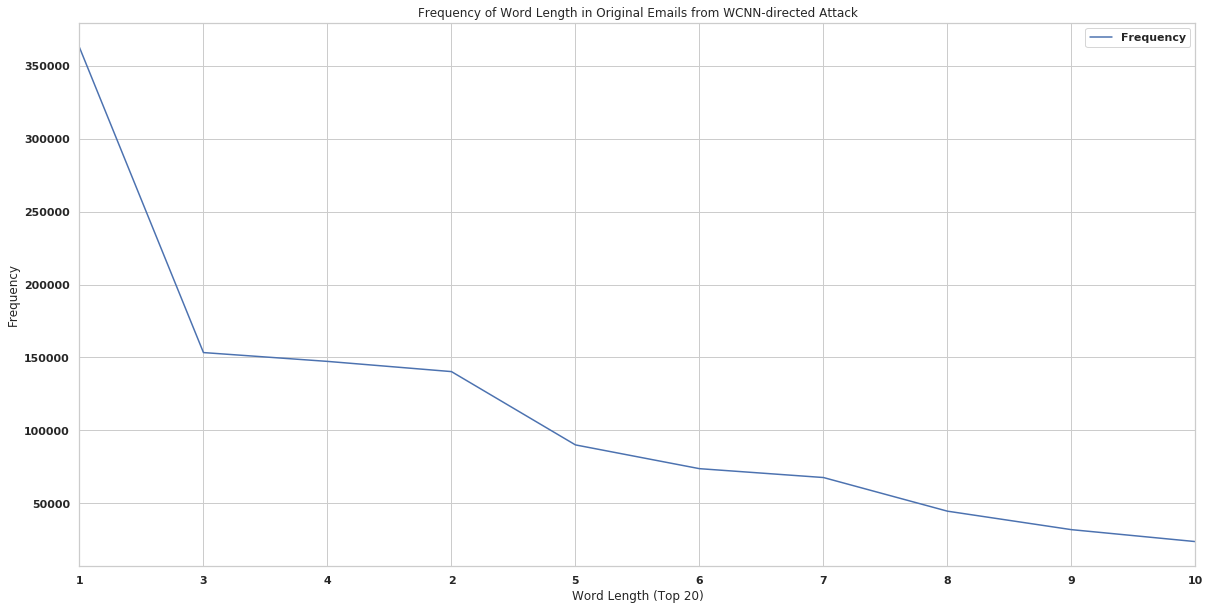

In [631]:
Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(20,10))
plt.title('Frequency of Word Length in Original Emails from WCNN-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 20)')

In [621]:
WordLengthdictforDFPert = {
    "Word Length": XValuesWordLengthPert,
    "Frequency": YValuesFreqPert
}
WordLengthdataframePert = pd.DataFrame(WordLengthdictforDFPert)
sort_by_Freq_wordlength_pert = WordLengthdataframePert.sort_values('Frequency',ascending=False)
print(sort_by_Freq_wordlength_pert.head(n=3))

   Word Length  Frequency
1            1     361855
2            3     147740
5            4     140046


In [632]:
Top20sort_by_Freq_wordlength_pert = sort_by_Freq_wordlength_pert[0:10]
RowIndex = 0
for row in range(Top20sort_by_Freq_wordlength_pert.shape[0]):
    Top20sort_by_Freq_wordlength_pert['Word Length'].iloc[0] = str(Top20sort_by_Freq_wordlength_pert['Word Length'].iloc[0])
print(type(Top20sort_by_Freq_wordlength_pert['Word Length'].iloc[0]))

<class 'str'>


D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


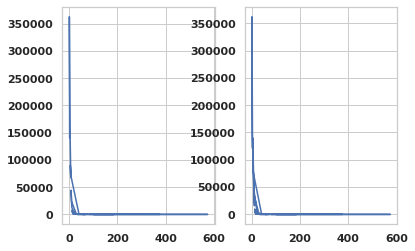

In [618]:
plt.figure(1)
plt.subplot(121)
plt.plot(XValuesWordLengthOrig, YValuesFreqOrig)
plt.subplot(122)
plt.plot(XValuesWordLengthPert, YValuesFreqPert)
#plt.figure(figsize=(20,20))

Text(0.5, 0, 'Word Length (Top 10)')

<Figure size 432x288 with 0 Axes>

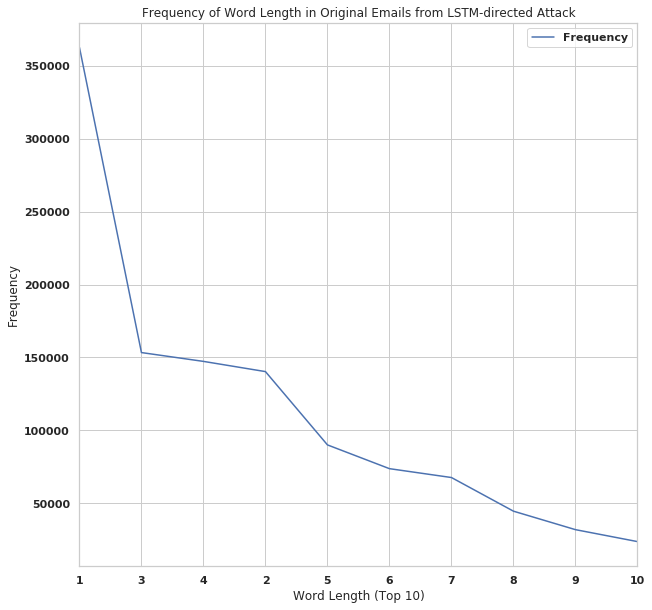

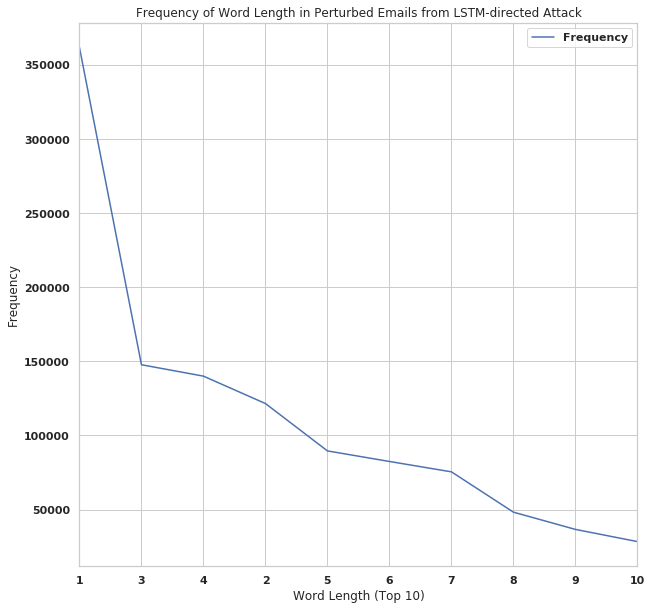

In [638]:
#Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(20,10))
plt.figure(2)
#plt.subplot(121)
Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.title('Frequency of Word Length in Original Emails from LSTM-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')
#plt.subplot(122)
Top20sort_by_Freq_wordlength_pert.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.title('Frequency of Word Length in Perturbed Emails from LSTM-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')

## Merging both Mendenhall curves

In [866]:
x1lstm = ["1", "3", "4", "2", "5", "6", "7", "8", "9", "10"]
y1lstm = Top20sort_by_Freq_wordlength_orig["Frequency"].tolist()
y2lstm = Top20sort_by_Freq_wordlength_pert["Frequency"].tolist()

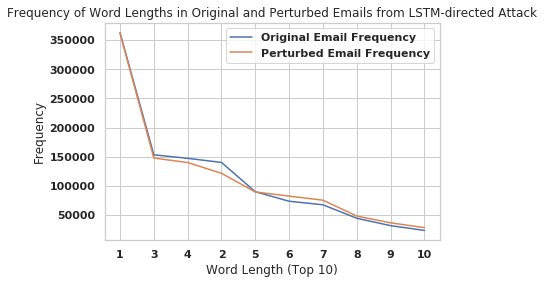

<Figure size 2000x2000 with 0 Axes>

In [871]:
#Top20sort_by_Freq_wordlength_orig.plot.line(x="Word Length", y="Frequency", figsize=(20,10))
#plt.figure(4)
#plt.subplot(121)
#Top10sort_by_Freq_wordlength_origCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
#Top10sort_by_Freq_wordlength_pertCNN.plot.line(x="Word Length", y="Frequency", figsize=(10,10))
plt.plot(x1lstm, y1lstm, label = "Original Email Frequency")
plt.plot(x1lstm, y2lstm, label = "Perturbed Email Frequency")
#plt.figsize = (10,10)
plt.title('Frequency of Word Lengths in Original and Perturbed Emails from LSTM-directed Attack')
plt.ylabel('Frequency')
plt.xlabel('Word Length (Top 10)')
plt.legend()
#plt.figure(figsize=(20,20))
plt.figure(figsize=(20,20), dpi=100, facecolor='w', edgecolor='k')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.subplot(122)
plt.show()

#plt.title('Frequency of Word Length in Perturbed Emails from WCNN-directed Attack')
#plt.ylabel('Frequency')
#plt.xlabel('Word Length (Top 10)')

# Making a dataframe to be used in R for classification
## This will be composed of a dataframe with the emails in the first column and then calculating linguistic features in other columns (mostly the same as those used in the cohen's tests but some additional ones)

In [660]:
ClassificationEmails = [] # stores emails
ClassificationOrigCNNorLSTM = [] # stores if email is original, perturbed from WCNN attack or perturbed from LSTM attack
ClassificationOrigOrPert = [] # stores if email is original or perturbed

for i in NewCNNMasterWithoutEmptyElements: # first I do this for the CNN emails
        
        if "NuMBer WoRds ChaNGed" in i[-1]: # if attack perturbed the email
            if "NuMBer WoRds ChaNGed 0" not in i[-1]: # if the attack perturbed at least 1 word

                
                ClassificationEmails.append(i[2]) #append original email
                ClassificationEmails.append(i[-2]) #append perturbed email
                ClassificationOrigCNNorLSTM.append("Original") 
                ClassificationOrigCNNorLSTM.append("CNNpert")
                ClassificationOrigOrPert.append("Original")
                ClassificationOrigOrPert.append("Perturbed")
                

            else:
                #if no words were changed, I would classify that as only needing to add the original email 
                ClassificationEmails.append(i[2])
                ClassificationOrigCNNorLSTM.append("Original")
                ClassificationOrigOrPert.append("Original")
        else:
            
            ClassificationEmails.append(i[2])
            ClassificationOrigCNNorLSTM.append("Original")
            ClassificationOrigOrPert.append("Original")
            
 
print(len(ClassificationEmails))
print(len(ClassificationOrigCNNorLSTM))
print(len(ClassificationOrigOrPert))
# Need to do it for LSTM and just concatenate the two lists JustLSTM

8710
8710
8710


In [661]:
for i in NewLSTMMasterWithoutEmptyElements: # Now i repeat the same process but for LSTM emails
        if "NuMBer WoRds ChaNGed" in i[-1]:
            if "NuMBer WoRds ChaNGed 0" not in i[-1]:

                
                #ClassificationEmails.append(i[2]) #append original email
                ClassificationEmails.append(i[-2]) #append perturbed email
                #ClassificationOrigCNNorLSTM.append("Original") 
                ClassificationOrigCNNorLSTM.append("LSTMpert")
                #ClassificationOrigOrPert.append("Original")
                ClassificationOrigOrPert.append("Perturbed")
                

#             else:
#                 #if no words were changed, I would classify that as only needing to add the original email 
#                 ClassificationEmails.append(i[2])
#                 ClassificationOrigCNNorLSTM.append("Original")
#                 ClassificationOrigOrPert.append("Original")
#         else:
            
#             ClassificationEmails.append(i[2])
#             ClassificationOrigCNNorLSTM.append("Original")
#             ClassificationOrigOrPert.append("Original")
            
print(len(ClassificationEmails))
print(len(ClassificationOrigCNNorLSTM))
print(len(ClassificationOrigOrPert))

11383
11383
11383


In [ ]:
# checking to see if i have the expected number of originals and perturbed emails

In [664]:
countorig1 = 0
countlstmpert = 0
countcnnpert = 0
for i in ClassificationOrigCNNorLSTM:
    if i == "LSTMpert": countlstmpert+=1
    elif i == "CNNpert":countcnnpert+=1
    elif i == "Original":countorig1+=1
countorig2 = 0
countpert = 0
for i in ClassificationOrigOrPert:
    if i == "Original": countorig2+=1
    elif i == "Perturbed":countpert+=1
        
print(countorig1)
print(countlstmpert)
print(countcnnpert)
print(countorig2)
print(countpert)


7637
2673
1073
7637
3746


In [662]:
ClassificationDictforDF = {
    "Email": ClassificationEmails,
    "OrigLSTMorCNN":ClassificationOrigCNNorLSTM,
    "OrigorPert": ClassificationOrigOrPert
    
}
ClassificationDF= pd.DataFrame(ClassificationDictforDF)
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original
1  Hi, i've just updated from the gulus and I che...      Original   Original
2  251839499 Sayreville is a borough located on t...      Original   Original
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original
4  Become = Fit For Life! HGH is a very complex m...      Original   Original

In [666]:
#adding column for email length
ClassificationDF['Length'] = ClassificationDF['Email'].apply(lambda x: len(x) - x.count(" "))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  
0   16587  
1     626  
2    4973  
3     122  
4     527

In [667]:
# function returning the percent of characters in the text that are punctuation
def Percent_Punctuation(input):
    count_perc = sum([1 for char in input if char in string.punctuation])
    length_input = len(input) - input.count(" ")
    if length_input == 0:
        return 0
    return round((count_perc/length_input), 3)*100

In [672]:
## function returning the percent of characters in the text that letters
def Percent_Letters(x):
    count = 0
    LengthString = len(x) - x.count(" ")
    for character in x:
        if (character.isalpha()) == True: 
            count+=1 
    if LengthString == 0:
        return 0
    return (count/LengthString)*100

In [674]:
# checking if it works
print(Percent_Letters("aaaaaaaaa3"))
print(Percent_Letters("aa3"))

90.0
66.66666666666666


In [677]:
# function returning the percent of characters in the text that are numbers
def Percent_Numbers(x):
    count = 0
    LengthString = len(x) - x.count(" ")
    for character in x:
        if (character.isnumeric()) == True: 
            count+=1 
    if LengthString == 0:
        return 0
    return (count/LengthString)*100

In [678]:
print(Percent_Numbers("aaaaaaaaa3"))
print(Percent_Numbers("aa3"))

10.0
33.33333333333333


In [668]:
# adding column for % punctuation
ClassificationDF['PercPunct'] = ClassificationDF['Email'].apply(lambda x: Percent_Punctuation(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  
0   16587        3.4  
1     626        8.3  
2    4973        6.0  
3     122       16.4  
4     527        7.8

In [679]:
# adding column for % letters
ClassificationDF['PercLetters'] = ClassificationDF['Email'].apply(lambda x: Percent_Letters(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  
0   16587        3.4    81.865316  
1     626        8.3    90.095847  
2    4973        6.0    83.893022  
3     122       16.4    68.852459  
4     527        7.8    88.994307

In [680]:
# adding column for % numbers
ClassificationDF['PercNumbers'] = ClassificationDF['Email'].apply(lambda x: Percent_Numbers(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  
0   16587        3.4    81.865316    14.758546  
1     626        8.3    90.095847     1.597444  
2    4973        6.0    83.893022    10.134728  
3     122       16.4    68.852459    14.754098  
4     527        7.8    88.994307     3.225806

In [681]:
# adding column for characters per sentence
ClassificationDF['CharPerSent'] = ClassificationDF['Email'].apply(lambda x: CharPerSentence(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  
0   16587        3.4    81.865316    14.758546   161.038835  
1     626        8.3    90.095847     1.597444    62.600000  
2    4973        6.0    83.893022    10.134728    62.949367  
3     122       16.4    68.852459    14.754098    15.250000  
4     527        7.8    88.994307     3.225806    65.875000

In [682]:
# adding column for characters per word
ClassificationDF['CharPerWord'] = ClassificationDF['Email'].apply(lambda x: CharPerWord(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  
0   16587        3.4    81.865316    14.758546   161.038835    75.395455  
1     626        8.3    90.095847     1.597444    62.600000     6.955556  
2    4973        6.0    83.893022    10.134728    62.949367     5.313034  
3     122       16.4    68.852459    14.754098    15.250000     5.083333  
4     527        7.8    88.994307     3.225806    65.875000     5.217822

In [683]:
# adding column for number of syllables
ClassificationDF['SyllablesTotal'] = ClassificationDF['Email'].apply(lambda x: syllables_count(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  
0            2642  
1             158  
2            1423  
3              29  
4             149

In [684]:
# adding column for number of syllables per sentence
ClassificationDF['SyllPerSent'] = ClassificationDF['Email'].apply(lambda x: SyllPerSent(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  
0            2642    25.650485  
1             158    15.800000  
2            1423    18.012658  
3              29     3.625000  
4             149    18.625000

In [685]:
# adding column for number of syllables per word
ClassificationDF['SyllPerWord'] = ClassificationDF['Email'].apply(lambda x: SyllPerWord(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  
0            2642    25.650485    12.009091  
1             158    15.800000     1.755556  
2            1423    18.012658     1.520299  
3              29     3.625000     1.208333  
4             149    18.625000     1.475248

In [686]:
# adding column for percent of words in email that are monosyllabic
ClassificationDF['PercentMono'] = ClassificationDF['Email'].apply(lambda x: PercentMonoWords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  
0            2642    25.650485    12.009091     0.454545  
1             158    15.800000     1.755556    56.666667  
2            1423    18.012658     1.520299    65.384615  
3              29     3.625000     1.208333    79.166667  
4             149    18.625000     1.475248    62.376238

In [687]:
# adding column for percent of words in email that are disyllabic
ClassificationDF['PercentDi'] = ClassificationDF['Email'].apply(lambda x: PercentDiWords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  
0            2642    25.650485    12.009091     0.454545   0.909091  
1             158    15.800000     1.755556    56.666667  23.333333  
2            1423    18.012658     1.520299    65.384615  20.085470  
3              29     3.625000     1.208333    79.166667  12.500000  
4             149    18.625000     1.475248    62.376238  18.811881

In [688]:
# adding column for percent of words in email that are trisyllabic
ClassificationDF['PercentTri'] = ClassificationDF['Email'].apply(lambda x: PercentTriWords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  
0    0.000000  
1   10.000000  
2    6.730769  
3    4.166667  
4    9.900990

In [689]:
# adding column for percent of words in email that are 4 or more syllables
ClassificationDF['Percent4orMoreSyll'] = ClassificationDF['Email'].apply(lambda x: Percent4orMoreWords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  Percent4orMoreSyll  
0    0.000000           98.636364  
1   10.000000            7.777778  
2    6.730769            5.662393  
3    4.166667            0.000000  
4    9.900990            2.970297

In [690]:
# adding column for email readability
ClassificationDF['FleschReadability'] = ClassificationDF['Email'].apply(lambda x: Readbility(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  Percent4orMoreSyll  FleschReadability  
0    0.000000           98.636364           -1031.67  
1   10.000000            7.777778              36.69  
2    6.730769            5.662393              42.45  
3    4.166667            0.000000              73.51  
4    9.900990            2.970297              55.44

In [691]:
# adding column for email sentiment polarity
ClassificationDF['Sentiment'] = ClassificationDF['Email'].apply(lambda x: SentimentText(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  Percent4orMoreSyll  FleschReadability  Sentiment  
0    0.000000           98.636364           -1031.67   0.000000  
1   10.000000            7.777778              36.69  -0.135833  
2    6.730769            5.662393              42.45   0.085680  
3    4.166667            0.000000              73.51   0.000000  
4    9.900990            2.970297              55.44   0.123333

In [692]:
# adding column for email subjectivity score
ClassificationDF['Subjectivity'] = ClassificationDF['Email'].apply(lambda x: SubjectivityText(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  Percent4orMoreSyll  FleschReadability  Sentiment  Subjectivity  
0    0.000000           98.636364           -1031.67   0.000000      0.000000  
1   10.000000            7.777778              36.69  -0.135833      0.361667  
2    6.730769            5.662393              42.45   0.085680      0.382483  
3    4.166667            0.000000              73.51   0.000000      0.000000  
4    9.900990            2.970297              55.44   0.123333      0.505000

In [693]:
# adding column for percent of words in email that are in easy_word_set
ClassificationDF['PercentCommonWords'] = ClassificationDF['Email'].apply(lambda x: PercentCommonWords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  PercentDi  \
0            2642    25.650485    12.009091     0.454545   0.909091   
1             158    15.800000     1.755556    56.666667  23.333333   
2            1423    18.012658     1.520299    65.384615  20.085470   
3              29     3.625000     1.208333    79.166667  12.500000   
4             149    18.625000     1.475248    62.376238  18.811881   

   PercentTri  Percent4orMoreSyll  FleschReadability  Sentiment  Subjectivity  \
0    0.000000           98.636364           -1031.67   0.000000      0.000000   
1   10.000000            7.777778              36.69  -0.135833      0.361667   
2    6.730769            5.662393              42.45   0.085680      0.382483   
3    4.166667            0.000000              73.51   0.000000      0.000000   
4    9.900990            2.970297              55.44   0.123333      0.505000   

   PercentCommonWords  
0            0.000000  
1           34.745763  
2           37.419355  
3           37.037037  
4           48.717949

In [694]:
#Adding column for lexical diversity in email
ClassificationDF['LexRich'] = ClassificationDF['Email'].apply(lambda x: Richness(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  SyllPerWord  PercentMono  PercentDi  PercentTri  \
0            2642  ...    12.009091     0.454545   0.909091    0.000000   
1             158  ...     1.755556    56.666667  23.333333   10.000000   
2            1423  ...     1.520299    65.384615  20.085470    6.730769   
3              29  ...     1.208333    79.166667  12.500000    4.166667   
4             149  ...     1.475248    62.376238  18.811881    9.900990   

   Percent4orMoreSyll  FleschReadability  Sentiment  Subjectivity  \
0           98.636364           -1031.67   0.000000      0.000000   
1            7.777778              36.69  -0.135833      0.361667   
2            5.662393              42.45   0.085680      0.382483   
3            0.000000              73.51   0.000000      0.000000   
4            2.970297              55.44   0.123333      0.505000   

   PercentCommonWords      LexRich  
0            0.000000  5023.727692  
1           34.745763   100.326923  
2           37.419355    33.752333  
3           37.037037    30.000000  
4           48.717949    73.437100  

[5 rows x 21 columns]

In [695]:
# adding column for percent of words in email that are stopwords
ClassificationDF['PercentStopWords'] = ClassificationDF['Email'].apply(lambda x: PercentStopwords(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentMono  PercentDi  PercentTri  \
0            2642  ...     0.454545   0.909091    0.000000   
1             158  ...    56.666667  23.333333   10.000000   
2            1423  ...    65.384615  20.085470    6.730769   
3              29  ...    79.166667  12.500000    4.166667   
4             149  ...    62.376238  18.811881    9.900990   

   Percent4orMoreSyll  FleschReadability  Sentiment  Subjectivity  \
0           98.636364           -1031.67   0.000000      0.000000   
1            7.777778              36.69  -0.135833      0.361667   
2            5.662393              42.45   0.085680      0.382483   
3            0.000000              73.51   0.000000      0.000000   
4            2.970297              55.44   0.123333      0.505000   

   PercentCommonWords      LexRich  PercentStopWords  
0            0.000000  5023.727692          0.161290  
1           34.745763   100.326923         29.661017  
2           37.419355    33.752333         25.898618  
3           37.037037    30.000000         37.037037  
4           48.717949    73.437100         35.042735  

[5 rows x 22 columns]

In [696]:
# adding column for percent of words in email that are verbs
ClassificationDF['PercentVerbs'] = ClassificationDF['Email'].apply(lambda x: PercentVerbs(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentDi  PercentTri  Percent4orMoreSyll  \
0            2642  ...   0.909091    0.000000           98.636364   
1             158  ...  23.333333   10.000000            7.777778   
2            1423  ...  20.085470    6.730769            5.662393   
3              29  ...  12.500000    4.166667            0.000000   
4             149  ...  18.811881    9.900990            2.970297   

   FleschReadability  Sentiment  Subjectivity  PercentCommonWords  \
0           -1031.67   0.000000      0.000000            0.000000   
1              36.69  -0.135833      0.361667           34.745763   
2              42.45   0.085680      0.382483           37.419355   
3              73.51   0.000000      0.000000           37.037037   
4              55.44   0.123333      0.505000           48.717949   

       LexRich  PercentStopWords  PercentVerbs  
0  5023.727692          0.161290      0.642055  
1   100.326923         29.661017     10.169492  
2    33.752333         25.898618      3.225806  
3    30.000000         37.037037      6.896552  
4    73.437100         35.042735     10.256410  

[5 rows x 23 columns]

In [697]:
# adding column for percent of words in email that are adverbs
ClassificationDF['PercentAdverbs'] = ClassificationDF['Email'].apply(lambda x: PercentAdverbs(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentTri  Percent4orMoreSyll  FleschReadability  \
0            2642  ...    0.000000           98.636364           -1031.67   
1             158  ...   10.000000            7.777778              36.69   
2            1423  ...    6.730769            5.662393              42.45   
3              29  ...    4.166667            0.000000              73.51   
4             149  ...    9.900990            2.970297              55.44   

   Sentiment  Subjectivity  PercentCommonWords      LexRich  PercentStopWords  \
0   0.000000      0.000000            0.000000  5023.727692          0.161290   
1  -0.135833      0.361667           34.745763   100.326923         29.661017   
2   0.085680      0.382483           37.419355    33.752333         25.898618   
3   0.000000      0.000000           37.037037    30.000000         37.037037   
4   0.123333      0.505000           48.717949    73.437100         35.042735   

   PercentVerbs  PercentAdverbs  
0      0.642055        0.481541  
1     10.169492        0.847458  
2      3.225806        1.198157  
3      6.896552        0.000000  
4     10.256410        2.564103  

[5 rows x 24 columns]

In [698]:
# adding column for percent of words in email that are nouns
ClassificationDF['PercentNouns'] = ClassificationDF['Email'].apply(lambda x: PercentNouns(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  Percent4orMoreSyll  FleschReadability  Sentiment  \
0            2642  ...           98.636364           -1031.67   0.000000   
1             158  ...            7.777778              36.69  -0.135833   
2            1423  ...            5.662393              42.45   0.085680   
3              29  ...            0.000000              73.51   0.000000   
4             149  ...            2.970297              55.44   0.123333   

   Subjectivity  PercentCommonWords      LexRich  PercentStopWords  \
0      0.000000            0.000000  5023.727692          0.161290   
1      0.361667           34.745763   100.326923         29.661017   
2      0.382483           37.419355    33.752333         25.898618   
3      0.000000           37.037037    30.000000         37.037037   
4      0.505000           48.717949    73.437100         35.042735   

   PercentVerbs  PercentAdverbs  PercentNouns  
0      0.642055        0.481541     58.426966  
1     10.169492        0.847458     32.203390  
2      3.225806        1.198157     39.447005  
3      6.896552        0.000000     41.379310  
4     10.256410        2.564103     29.914530  

[5 rows x 25 columns]

In [699]:
# adding column for percent of words in email that are pronouns
ClassificationDF['PercentPronouns'] = ClassificationDF['Email'].apply(lambda x: PercentPronouns(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  FleschReadability  Sentiment  Subjectivity  \
0            2642  ...           -1031.67   0.000000      0.000000   
1             158  ...              36.69  -0.135833      0.361667   
2            1423  ...              42.45   0.085680      0.382483   
3              29  ...              73.51   0.000000      0.000000   
4             149  ...              55.44   0.123333      0.505000   

   PercentCommonWords      LexRich  PercentStopWords  PercentVerbs  \
0            0.000000  5023.727692          0.161290      0.642055   
1           34.745763   100.326923         29.661017     10.169492   
2           37.419355    33.752333         25.898618      3.225806   
3           37.037037    30.000000         37.037037      6.896552   
4           48.717949    73.437100         35.042735     10.256410   

   PercentAdverbs  PercentNouns  PercentPronouns  
0        0.481541     58.426966         0.000000  
1        0.847458     32.203390         3.389831  
2        1.198157     39.447005         1.290323  
3        0.000000     41.379310        10.344828  
4        2.564103     29.914530         4.273504  

[5 rows x 26 columns]

In [700]:
# adding column for percent of words in email that are adjectives
ClassificationDF['PercentAdjectives'] = ClassificationDF['Email'].apply(lambda x: PercentAdjectives(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  Sentiment  Subjectivity  PercentCommonWords  \
0            2642  ...   0.000000      0.000000            0.000000   
1             158  ...  -0.135833      0.361667           34.745763   
2            1423  ...   0.085680      0.382483           37.419355   
3              29  ...   0.000000      0.000000           37.037037   
4             149  ...   0.123333      0.505000           48.717949   

       LexRich  PercentStopWords  PercentVerbs  PercentAdverbs  PercentNouns  \
0  5023.727692          0.161290      0.642055        0.481541     58.426966   
1   100.326923         29.661017     10.169492        0.847458     32.203390   
2    33.752333         25.898618      3.225806        1.198157     39.447005   
3    30.000000         37.037037      6.896552        0.000000     41.379310   
4    73.437100         35.042735     10.256410        2.564103     29.914530   

   PercentPronouns  PercentAdjectives  
0         0.000000           1.123596  
1         3.389831           4.237288  
2         1.290323           3.410138  
3        10.344828           0.000000  
4         4.273504           5.128205  

[5 rows x 27 columns]

In [701]:
# adding column for percent of words in email that are determiners
ClassificationDF['PercentDeterminer'] = ClassificationDF['Email'].apply(lambda x: PercentDeterminer(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  Subjectivity  PercentCommonWords      LexRich  \
0            2642  ...      0.000000            0.000000  5023.727692   
1             158  ...      0.361667           34.745763   100.326923   
2            1423  ...      0.382483           37.419355    33.752333   
3              29  ...      0.000000           37.037037    30.000000   
4             149  ...      0.505000           48.717949    73.437100   

   PercentStopWords  PercentVerbs  PercentAdverbs  PercentNouns  \
0          0.161290      0.642055        0.481541     58.426966   
1         29.661017     10.169492        0.847458     32.203390   
2         25.898618      3.225806        1.198157     39.447005   
3         37.037037      6.896552        0.000000     41.379310   
4         35.042735     10.256410        2.564103     29.914530   

   PercentPronouns  PercentAdjectives  PercentDeterminer  
0         0.000000           1.123596           0.000000  
1         3.389831           4.237288           6.779661  
2         1.290323           3.410138           6.267281  
3        10.344828           0.000000          10.344828  
4         4.273504           5.128205          10.256410  

[5 rows x 28 columns]

In [702]:
# adding column for percent of words in email that are conjunctions
ClassificationDF['PercentConjunction'] = ClassificationDF['Email'].apply(lambda x: PercentConjunction(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentCommonWords      LexRich  PercentStopWords  \
0            2642  ...            0.000000  5023.727692          0.161290   
1             158  ...           34.745763   100.326923         29.661017   
2            1423  ...           37.419355    33.752333         25.898618   
3              29  ...           37.037037    30.000000         37.037037   
4             149  ...           48.717949    73.437100         35.042735   

   PercentVerbs  PercentAdverbs  PercentNouns  PercentPronouns  \
0      0.642055        0.481541     58.426966         0.000000   
1     10.169492        0.847458     32.203390         3.389831   
2      3.225806        1.198157     39.447005         1.290323   
3      6.896552        0.000000     41.379310        10.344828   
4     10.256410        2.564103     29.914530         4.273504   

   PercentAdjectives  PercentDeterminer  PercentConjunction  
0           1.123596           0.000000            0.642055  
1           4.237288           6.779661           13.559322  
2           3.410138           6.267281           12.258065  
3           0.000000          10.344828            3.448276  
4           5.128205          10.256410           12.820513  

[5 rows x 29 columns]

In [703]:
# adding column for percent of words in email that are named entities
ClassificationDF['PercentNamedEntity'] = ClassificationDF['Email'].apply(lambda x: PercentNamedEntity(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...      LexRich  PercentStopWords  PercentVerbs  \
0            2642  ...  5023.727692          0.161290      0.642055   
1             158  ...   100.326923         29.661017     10.169492   
2            1423  ...    33.752333         25.898618      3.225806   
3              29  ...    30.000000         37.037037      6.896552   
4             149  ...    73.437100         35.042735     10.256410   

   PercentAdverbs  PercentNouns  PercentPronouns  PercentAdjectives  \
0        0.481541     58.426966         0.000000           1.123596   
1        0.847458     32.203390         3.389831           4.237288   
2        1.198157     39.447005         1.290323           3.410138   
3        0.000000     41.379310        10.344828           0.000000   
4        2.564103     29.914530         4.273504           5.128205   

   PercentDeterminer  PercentConjunction  PercentNamedEntity  
0           0.000000            0.642055            3.852327  
1           6.779661           13.559322            5.084746  
2           6.267281           12.258065           17.603687  
3          10.344828            3.448276            0.000000  
4          10.256410           12.820513            3.418803  

[5 rows x 30 columns]

In [704]:
# adding column for percent of words in email that are past verbs
ClassificationDF['PercentPastVerbTense'] = ClassificationDF['Email'].apply(lambda x: PercentPastVerbTense(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentStopWords  PercentVerbs  PercentAdverbs  \
0            2642  ...          0.161290      0.642055        0.481541   
1             158  ...         29.661017     10.169492        0.847458   
2            1423  ...         25.898618      3.225806        1.198157   
3              29  ...         37.037037      6.896552        0.000000   
4             149  ...         35.042735     10.256410        2.564103   

   PercentNouns  PercentPronouns  PercentAdjectives  PercentDeterminer  \
0     58.426966         0.000000           1.123596           0.000000   
1     32.203390         3.389831           4.237288           6.779661   
2     39.447005         1.290323           3.410138           6.267281   
3     41.379310        10.344828           0.000000          10.344828   
4     29.914530         4.273504           5.128205          10.256410   

   PercentConjunction  PercentNamedEntity  PercentPastVerbTense  
0            0.642055            3.852327              0.321027  
1           13.559322            5.084746              5.932203  
2           12.258065           17.603687              4.700461  
3            3.448276            0.000000              0.000000  
4           12.820513            3.418803              2.564103  

[5 rows x 31 columns]

In [705]:
# adding column for percent of words in email that are present verbs
ClassificationDF['PercentPresentVerbTense'] = ClassificationDF['Email'].apply(lambda x: PercentPresentVerbTense(x))
ClassificationDF.head()

Email OrigLSTMorCNN OrigorPert  \
0  Content-ID: R0lGODlhFQKPAfcAAAAAAIAAAACAAICAAA...      Original   Original   
1  Hi, i've just updated from the gulus and I che...      Original   Original   
2  251839499 Sayreville is a borough located on t...      Original   Original   
3  Mega authenticV I A G R A $ DISCOUNT priceC I ...      Original   Original   
4  Become = Fit For Life! HGH is a very complex m...      Original   Original   

   Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  ...  PercentVerbs  PercentAdverbs  PercentNouns  \
0            2642  ...      0.642055        0.481541     58.426966   
1             158  ...     10.169492        0.847458     32.203390   
2            1423  ...      3.225806        1.198157     39.447005   
3              29  ...      6.896552        0.000000     41.379310   
4             149  ...     10.256410        2.564103     29.914530   

   PercentPronouns  PercentAdjectives  PercentDeterminer  PercentConjunction  \
0         0.000000           1.123596           0.000000            0.642055   
1         3.389831           4.237288           6.779661           13.559322   
2         1.290323           3.410138           6.267281           12.258065   
3        10.344828           0.000000          10.344828            3.448276   
4         4.273504           5.128205          10.256410           12.820513   

   PercentNamedEntity  PercentPastVerbTense  PercentPresentVerbTense  
0            3.852327              0.321027                 0.321027  
1            5.084746              5.932203                 5.084746  
2           17.603687              4.700461                 2.672811  
3            0.000000              0.000000                 3.448276  
4            3.418803              2.564103                10.256410  

[5 rows x 32 columns]

In [707]:
# exporting this dataframe to get the TF-IDF weighted tokens of the emails in R
ClassificationDF.to_csv(r'D:\Virtual Machine Backup\ClassificationDataFrame.csv', index = False)

# Random Forest Classifier (Section 3.3 of Dissertation)

In [800]:
OrigOrPertData = pd.read_csv("OrigorPertDF.csv")

In [801]:
OrigOrPertData.head(5)

OrigorPert  Length  PercPunct  PercLetters  PercNumbers  CharPerSent  \
0   Original   16587        3.4    81.865316    14.758546   161.038835   
1   Original     626        8.3    90.095847     1.597444    62.600000   
2   Original    4973        6.0    83.893022    10.134728    62.949367   
3   Original     122       16.4    68.852459    14.754098    15.250000   
4   Original     527        7.8    88.994307     3.225806    65.875000   

   CharPerWord  SyllablesTotal  SyllPerSent  SyllPerWord  ...  \
0    75.395455            2642    25.650485    12.009091  ...   
1     6.955556             158    15.800000     1.755556  ...   
2     5.313034            1423    18.012658     1.520299  ...   
3     5.083333              29     3.625000     1.208333  ...   
4     5.217822             149    18.625000     1.475248  ...   

   j-chkmail.ensmp.fr_x-virus-scanned_clamav  x-virus-scanned_clamav_version  \
0                                        0.0                             0.0   
1                                        0.0                             0.0   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   

   on_localhost_x-virus-status  localhost_x-virus-status_clean  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   x-virus-status_clean_x-uuid  additional  ourselves  the_world  due  due_to  
0                          0.0         0.0        0.0        0.0  0.0     0.0  
1                          0.0         0.0        0.0        0.0  0.0     0.0  
2                          0.0         0.0        0.0        0.0  0.0     0.0  
3                          0.0         0.0        0.0        0.0  0.0     0.0  
4                          0.0         0.0        0.0        0.0  0.0     0.0  

[5 rows x 546 columns]

In [802]:
# extracting the y labels 
OrigOrPertYLabels = OrigOrPertData["OrigorPert"]
OrigOrPertYLabels.head()
print(type(OrigOrPertYLabels))
OrigOrPertYLabels.to_frame()

<class 'pandas.core.series.Series'>


OrigorPert
0       Original
1       Original
2       Original
3       Original
4       Original
...          ...
11378  Perturbed
11379  Perturbed
11380  Perturbed
11381  Perturbed
11382  Perturbed

[11383 rows x 1 columns]

In [805]:

for i in OrigOrPertYLabels:
    print(i)

Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Origina

Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed


Perturbed
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Perturbed
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Origi

Original
Original
Perturbed
Original
Original
Perturbed
Original
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Perturbed
Original
Perturbed
Original
Perturbed
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Perturbed
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Ori

Perturbed
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Perturbed
Original
Original
Perturbed
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Perturbed
Original
Perturbed
Original
Original
Original
Perturbed
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Perturbed
Original
Original
Original
Original
Original
Original
Original
Perturbed
Original
Perturbed
Original
Original
Original
Perturbed
Original
Perturbed
Original
Pertu

Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed
Perturbed


In [782]:
# OrigOrPertYLabels[0]

'Original'

In [784]:
# OrigOrPertYLabelsv2 = OrigOrPertYLabels
# OrigOrPertYLabelsv2[0]

'Original'

In [786]:
# index = 0
# for i in OrigOrPertYLabelsv2:
#     #print(i)
#     if i == "Original": OrigOrPertYLabelsv2[index] = 0
#     else: OrigOrPertYLabelsv2[index] = 1
#     index+= 1
# OrigOrPertYLabelsv2.head()

D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Python 3.7.0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    0
1    0
2    0
3    0
4    0
Name: OrigorPert, dtype: object

In [956]:
print(type(OrigOrPertYLabelsv2))

<class 'pandas.core.series.Series'>


In [793]:
OrigOrPertYLabelsv2.to_frame()

OrigorPert
0              0
1              0
2              0
3              0
4              0
...          ...
11378          1
11379          1
11380          1
11381          1
11382          1

[11383 rows x 1 columns]

In [723]:
OrigOrPertXFeatures = OrigOrPertData.drop(columns="OrigorPert")
OrigOrPertXFeatures.head()

Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  ...  \
0            2642    25.650485    12.009091     0.454545  ...   
1             158    15.800000     1.755556    56.666667  ...   
2            1423    18.012658     1.520299    65.384615  ...   
3              29     3.625000     1.208333    79.166667  ...   
4             149    18.625000     1.475248    62.376238  ...   

   j-chkmail.ensmp.fr_x-virus-scanned_clamav  x-virus-scanned_clamav_version  \
0                                        0.0                             0.0   
1                                        0.0                             0.0   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   

   on_localhost_x-virus-status  localhost_x-virus-status_clean  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   x-virus-status_clean_x-uuid  additional  ourselves  the_world  due  due_to  
0                          0.0         0.0        0.0        0.0  0.0     0.0  
1                          0.0         0.0        0.0        0.0  0.0     0.0  
2                          0.0         0.0        0.0        0.0  0.0     0.0  
3                          0.0         0.0        0.0        0.0  0.0     0.0  
4                          0.0         0.0        0.0        0.0  0.0     0.0  

[5 rows x 545 columns]

In [710]:
from sklearn.ensemble import RandomForestClassifier

In [715]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [713]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

In [ ]:
#rfPertorOrig = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_depth=20) #n_jobs allows processes to be run in parrallel
#so it will have 50 decision trees, each with max depth of 20
#f_fold_10 = KFold(n_splits=10)
#cross_vale_score = (model, input features, label, data splitting method (cv = k_fold_10), scoring metric, n_jobs=-1)
#note for input features, must remove label column
#cross_val_score = (rfPertorOrig)

In [806]:
rfPertorOrig = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_depth=20, random_state=2)

In [807]:
X_train, X_test, y_train, y_test = train_test_split(OrigOrPertXFeatures, OrigOrPertYLabels, test_size=0.2)

In [794]:
#train_test_split(X_features, labels, test_size (what percent of the original dataset do we want to allocate to the test and train sets))
#train_test_split outputs four datasets 
X_trainBIN, X_testBIN, y_trainBIN, y_testBIN = train_test_split(OrigOrPertXFeatures, OrigOrPertYLabelsv2, test_size=0.2)

In [808]:
rfPertorOrig_model = rfPertorOrig.fit(X_train, y_train)

In [809]:
sorted(zip(rfPertorOrig_model.feature_importances_, X_train.columns), reverse = True)[0:10]

[(0.09904836638547322, 'nor'),
 (0.05767259959430995, 'among'),
 (0.045396719673625976, 'during'),
 (0.042893919879701786, 'becomes'),
 (0.03906290422949747, 'doyou'),
 (0.034064143269032544, 'ourselves'),
 (0.03323431804861506, 'another'),
 (0.03175216757019169, 'across'),
 (0.02727594435349207, 'per'),
 (0.025996128950377215, 're')]

In [ ]:
#note feature importance is stochastic, so other times, different features can come up as most important

In [810]:
y_pred_model2 = rfPertorOrig_model.predict(X_test)
#score(y_lables, y predictions, positive_label (what label are you interested in predicting?), average="binary")
precisionPert, recallPert, fscorePert, supportPert = score(y_test, y_pred_model2, pos_label="Perturbed", average="binary")

In [811]:
print(precisionPert, recallPert, fscorePert)
#now print accuracy 
print((y_pred_model2==y_test).sum()/len(y_pred_model2))

0.9720176730486009 0.8882907133243607 0.9282700421940929
0.9552042160737813


In [812]:
precisionOrig, recallOrig, fscoreOrig, supportOrig = score(y_test, y_pred_model2, pos_label="Original", average="binary")

In [813]:
print(precisionOrig, recallOrig, fscoreOrig)
#now print accuracy 
print((y_pred_model2==y_test).sum()/len(y_pred_model2))

0.9480600750938674 0.9876140808344198 0.9674329501915708
0.9552042160737813


In [814]:
print(y_pred_model2)

['Perturbed' 'Original' 'Perturbed' ... 'Original' 'Original' 'Original']


In [815]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [816]:
y_test.to_frame()

OrigorPert
6886   Perturbed
7       Original
10574  Perturbed
6784    Original
5295    Original
...          ...
3041    Original
2123    Original
5653    Original
8477    Original
6469    Original

[2277 rows x 1 columns]

In [746]:
y_test[2395]

'Original'

In [753]:
print(len(y_test))

2277


In [817]:
YtestLabels = []

for i in y_test:
    #print(type(i))
    YtestLabels.append(i)

In [ ]:
# calculating the classification matrix

In [818]:
indexforNavpred = 0

TruePositiveModel2 = 0
TrueNegativeModel2 = 0
FalsePositiveModel2 = 0
FalseNegativeModel2 = 0

for i in y_pred_model2:
    
    if i == "Perturbed":
        if YtestLabels[indexforNavpred] == "Original": FalsePositiveModel2+=1
            
        elif YtestLabels[indexforNavpred] == "Perturbed": TruePositiveModel2+=1
        
    elif i == "Original":
         if YtestLabels[indexforNavpred] == "Original": TrueNegativeModel2+=1
            
         elif YtestLabels[indexforNavpred] == "Perturbed": FalseNegativeModel2+=1
    
    indexforNavpred+=1
    
print(TruePositiveModel2)
print(TrueNegativeModel2)
print(FalsePositiveModel2)
print(FalseNegativeModel2)

660
1515
19
83


In [819]:
probs = rfPertorOrig_model.predict_proba(X_test) # the probabilities for predictions

In [820]:
print(probs)

[[0.14419596 0.85580404]
 [0.76467678 0.23532322]
 [0.14       0.86      ]
 ...
 [0.93767282 0.06232718]
 [0.95261412 0.04738588]
 [0.91668729 0.08331271]]


In [ ]:
# getting the ROC score for the Random Forest classifier on this binary task

In [821]:
new_probs = probs[:, 1]

In [822]:
rf_auc = roc_auc_score(y_test, new_probs)

In [823]:
print('Logistic: ROC AUC=%.3f' % (rf_auc))

Logistic: ROC AUC=0.982


In [825]:
print(rf_auc)
roundedauc = round(rf_auc, 3)
print(roundedauc)

0.9817194291439791
0.982


In [ ]:
# making a random (no skill) model for comparison

In [833]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label="Perturbed")

No Skill: ROC AUC=0.500


In [ ]:
# plotting ROC curve

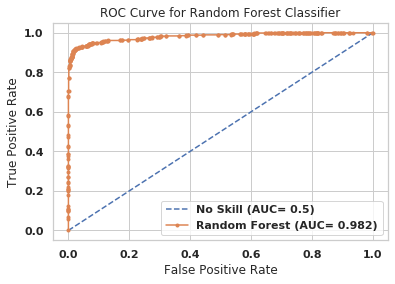

In [847]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# calculate roc curves
#ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, new_probs, pos_label="Perturbed")
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC= 0.5)')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC= 0.982)')
plt.title('ROC Curve for Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [837]:
from sklearn.metrics import precision_recall_curve

In [841]:
from sklearn.metrics import auc

In [839]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, new_probs, pos_label="Perturbed")

In [ ]:
# making a precision-recall curve

In [842]:
#lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
rf_auc = auc(rf_recall, rf_precision)
print(rf_auc)

0.9757447216624419


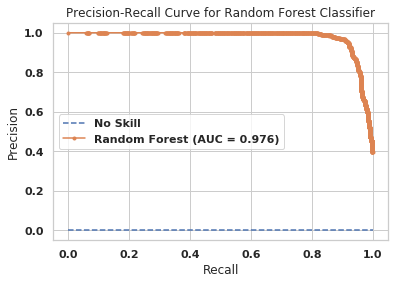

In [846]:
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest (AUC = 0.976)')
plt.title('Precision-Recall Curve for Random Forest Classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [774]:
from sklearn.metrics import plot_roc_curve

In [779]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Machine learning detection of original, perturbed from LSTM, perturbed from CNN. 

In [752]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [754]:
OrigOrCNNPertorLSTMPertData = pd.read_csv("OrigorCNNPertorLSTMPertDF.csv")

In [755]:
OrigOrCNNPertorLSTMPertData.head()

OrigLSTMorCNN  Length  PercPunct  PercLetters  PercNumbers  CharPerSent  \
0      Original   16587        3.4    81.865316    14.758546   161.038835   
1      Original     626        8.3    90.095847     1.597444    62.600000   
2      Original    4973        6.0    83.893022    10.134728    62.949367   
3      Original     122       16.4    68.852459    14.754098    15.250000   
4      Original     527        7.8    88.994307     3.225806    65.875000   

   CharPerWord  SyllablesTotal  SyllPerSent  SyllPerWord  ...  \
0    75.395455            2642    25.650485    12.009091  ...   
1     6.955556             158    15.800000     1.755556  ...   
2     5.313034            1423    18.012658     1.520299  ...   
3     5.083333              29     3.625000     1.208333  ...   
4     5.217822             149    18.625000     1.475248  ...   

   j-chkmail.ensmp.fr_x-virus-scanned_clamav  x-virus-scanned_clamav_version  \
0                                        0.0                             0.0   
1                                        0.0                             0.0   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   

   on_localhost_x-virus-status  localhost_x-virus-status_clean  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   x-virus-status_clean_x-uuid  additional  ourselves  the_world  due  due_to  
0                          0.0         0.0        0.0        0.0  0.0     0.0  
1                          0.0         0.0        0.0        0.0  0.0     0.0  
2                          0.0         0.0        0.0        0.0  0.0     0.0  
3                          0.0         0.0        0.0        0.0  0.0     0.0  
4                          0.0         0.0        0.0        0.0  0.0     0.0  

[5 rows x 546 columns]

In [756]:
# getting the y values 
OrigOrCNNPertorLSTMPertYLabels = OrigOrCNNPertorLSTMPertData["OrigLSTMorCNN"]
OrigOrCNNPertorLSTMPertYLabels.head()
print(type(OrigOrCNNPertorLSTMPertYLabels))
OrigOrCNNPertorLSTMPertYLabels.to_frame()

<class 'pandas.core.series.Series'>


OrigLSTMorCNN
0          Original
1          Original
2          Original
3          Original
4          Original
...             ...
11378      LSTMpert
11379      LSTMpert
11380      LSTMpert
11381      LSTMpert
11382      LSTMpert

[11383 rows x 1 columns]

In [757]:
# dropping the leaky column
OrigOrCNNPertorLSTMPertXFeatures = OrigOrCNNPertorLSTMPertData.drop(columns="OrigLSTMorCNN")
OrigOrCNNPertorLSTMPertXFeatures.head()

Length  PercPunct  PercLetters  PercNumbers  CharPerSent  CharPerWord  \
0   16587        3.4    81.865316    14.758546   161.038835    75.395455   
1     626        8.3    90.095847     1.597444    62.600000     6.955556   
2    4973        6.0    83.893022    10.134728    62.949367     5.313034   
3     122       16.4    68.852459    14.754098    15.250000     5.083333   
4     527        7.8    88.994307     3.225806    65.875000     5.217822   

   SyllablesTotal  SyllPerSent  SyllPerWord  PercentMono  ...  \
0            2642    25.650485    12.009091     0.454545  ...   
1             158    15.800000     1.755556    56.666667  ...   
2            1423    18.012658     1.520299    65.384615  ...   
3              29     3.625000     1.208333    79.166667  ...   
4             149    18.625000     1.475248    62.376238  ...   

   j-chkmail.ensmp.fr_x-virus-scanned_clamav  x-virus-scanned_clamav_version  \
0                                        0.0                             0.0   
1                                        0.0                             0.0   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   

   on_localhost_x-virus-status  localhost_x-virus-status_clean  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   x-virus-status_clean_x-uuid  additional  ourselves  the_world  due  due_to  
0                          0.0         0.0        0.0        0.0  0.0     0.0  
1                          0.0         0.0        0.0        0.0  0.0     0.0  
2                          0.0         0.0        0.0        0.0  0.0     0.0  
3                          0.0         0.0        0.0        0.0  0.0     0.0  
4                          0.0         0.0        0.0        0.0  0.0     0.0  

[5 rows x 545 columns]

In [758]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(OrigOrCNNPertorLSTMPertXFeatures, OrigOrCNNPertorLSTMPertYLabels, test_size=0.2)

In [759]:
rfPertorOrig_model2 = rfPertorOrig.fit(X_train2, y_train2)

In [760]:
# here are the top 10 feaures for the random forest classifier. These were not reported in the dissertation because
# the top tf-idf features were reported from R and also, these features are stochastic, so they can be different
# if the model is fitted again
sorted(zip(rfPertorOrig_model2.feature_importances_, X_train2.columns), reverse = True)[0:10]

[(0.06639420561466548, 'nor'),
 (0.04797446262117557, 'among'),
 (0.04598599180368413, 'during'),
 (0.043773038653995774, 'across'),
 (0.04178208740217879, 'ourselves'),
 (0.029604082856146068, 'doyou'),
 (0.02818792672317108, 'another'),
 (0.02497884103332959, "n't"),
 (0.023390630064550763, 'becomes'),
 (0.019936953502326125, 'per')]

In [761]:
# getting predictions for the multilabel classification task
y_pred_model_three_labels = rfPertorOrig_model2.predict(X_test2)
#score(y_lables, y predictions, positive_label (what label are you interested in predicting?), average="binary")
#precisionPert, recallPert, fscorePert, supportPert = score(y_test, y_pred_model2, pos_label="Perturbed", average="binary")

In [763]:
print(type(y_pred_model_three_labels))
print(y_pred_model_three_labels)

<class 'numpy.ndarray'>
['CNNpert' 'Original' 'Original' ... 'LSTMpert' 'Original' 'Original']


In [764]:
print(y_test2) # these are the original multilabel labels

8484     CNNpert
3291    Original
6449    Original
439     Original
1420    Original
          ...   
8152     CNNpert
4748    Original
9709    LSTMpert
5271    Original
246     Original
Name: OrigLSTMorCNN, Length: 2277, dtype: object


In [765]:
y_true = []
y_pred = []

for i in y_test2:
    y_true.append(i)
    
for i in y_pred_model_three_labels:
    y_pred.append(i)
    
print(len(y_true))
print(len(y_pred))

2277
2277


In [766]:
target_names = ['CNNpert', 'LSTMpert', 'Original']

In [773]:
# performance metrics for the multilabel classification task
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

     CNNpert     0.8878    0.4223    0.5724       206
    LSTMpert     0.9096    0.8990    0.9043       515
    Original     0.9269    0.9949    0.9597      1556

    accuracy                         0.9214      2277
   macro avg     0.9081    0.7721    0.8121      2277
weighted avg     0.9195    0.9214    0.9121      2277



In [768]:
# confusion matrix for the multilabel classification
multilabel_confusion_matrix(y_true, y_pred, labels=target_names)

array([[[2060,   11],
        [ 119,   87]],

       [[1716,   46],
        [  52,  463]],

       [[ 599,  122],
        [   8, 1548]]], dtype=int64)

### Here I check the performance metrics by using the confusion matrix

In [769]:

recallorig = 1548/(1548+8)
precisionorig = 1548/(1548+122)
f1orig = 2*((recallorig*precisionorig)/(recallorig + precisionorig))
print(recallorig)
print(precisionorig)
print(f1orig)

0.9948586118251928
0.9269461077844311
0.9597024178549287


In [770]:
recallcnn = 87/(119+87)
precisioncnn = 87/(87+11)
f1cnn = 2*((recallcnn*precisioncnn)/(recallcnn + precisioncnn))
print(recallcnn)
print(precisioncnn)
print(f1cnn)

0.4223300970873786
0.8877551020408163
0.5723684210526315


In [772]:
recalllstm = 463/(463+52)
precisionlstm = 463/(463+46)
f1lstm = 2*((recalllstm*precisionlstm)/(recalllstm + precisionlstm))
print(recalllstm)
print(precisionlstm)
print(f1lstm)

0.8990291262135922
0.9096267190569745
0.9042968749999999
